In [1]:
#import needed packages
import glob
from bioverse.util import compute_t_ref
from bioverse.survey import TransitSurvey
from bioverse.generator import Generator
from atmos_to_PSG import atmosatm, psgspec
import pyatmos
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

In [2]:
curr_dir=os.getcwd()

In [3]:
#set atmos pathway and initiate it
atmos = pyatmos.Simulation(code_path='~/atmos-master', DEBUG=True)
atmos.start()

Initialization complete: 2024-01-29 11:15:29
pyatmos is ready to go! 


In [3]:
#create parameter list--in this case, O2 flux
O2_flux_list=[5.0E+8,5.0E+8,8.0E+8,1.0E+9,2.5E+9,3.5E+9,5.0E+9,6.0E+9,7.5E+9,8.5E+9,1.00E+10,5.0E+10,9.0E+10,1.50E+11,2.50E+11,
              3.0E+11,3.25E+11,3.5E+11,3.95E+11,4.2E+11,5.50E+11,1.0E+12,5.0E+12,9.0E+12,2.4E+13,5.0E+13,6.0E+13]


In [5]:
#run PyAtmos over the range of parameters
for i in range(len(O2_flux_list)):
	O2_flux=O2_flux_list[i]
	print(O2_flux)
	output_dir=curr_dir+'/sample_atmos_results/O2_test_{n}'.format(n=i)
	args = {
		'species_fluxes': {'O2' :O2_flux},
		'max_photochem_iterations' : 50000, 
		'max_clima_steps' : 10, 
		'output_directory' : output_dir}
	
	
	atmos.run(**args)

500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp3_kkmbkg
_write_container_file(): cp /tmp/tmpgxtrccny ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.842965960547637     
 CALLING RATES...
 NW =                   750    WAVELENGTH GRID:   1176.5000000000000       -   10000.000000000000       Angstroms
 PSTAR is our sun
 using Atlas 1 spectrum for the sun

   

 N =    3  EMAX = 5.13E-08 FOR O       AT Z = 1.25E+05 U = 6.97E-17 RHS = 3.58E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 6.06E-08 FOR H       AT Z = 2.72E+06 U = 1.18E-18 RHS = 7.12E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 8.37E-08 FOR H       AT Z = 2.72E+06 U = 1.18E-18 RHS = 9.84E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.81E-08 FOR SO      AT Z = 1.68E+06 U = 3.05E-19 RHS = 2.08E-26  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.33E-07 FOR SO      AT Z = 1.68E+06 U = 3.05E-19 RHS = 1.02E-25  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.49E-06 FOR SO      AT Z = 1.68E+06 U = 3.05E-19 RHS = 4.56E-25  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.81E-06 FOR SO      AT Z = 1.72E+06 U = 4.53E-19 RHS = 2.18E-24  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 6.77E-06 FOR SO      AT Z = 1.88E+06 U = 1.14E-18 RHS = 7.72E-24  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 3.01E-06 FOR SO      AT Z = 2.62E+06 U = 2.90E-17 RHS = 8.72E-

 N =   77  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 2.08E-20 RHS =-2.08E-20  DT = 1.03E+08  TIME = 1.84E+12
 N =   78  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 7.19E+07  TIME = 1.84E+12
 N =   79  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 5.03E+07  TIME = 1.84E+12
 N =   80  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 3.52E+07  TIME = 1.84E+12
 N =   81  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 2.47E+07  TIME = 1.84E+12
 N =   82  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 1.73E+07  TIME = 1.84E+12
 N =   83  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 1.21E+07  TIME = 1.84E+12
 N =   84  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.20E-20  DT = 8.46E+06  TIME = 1.84E+12
 N =   85  EMAX = 9.98E-01 FOR S2      AT Z = 5.25E+05 U = 3.20E-20 RHS =-3.19E-

 N =  153  EMAX = 1.13E-01 FOR N       AT Z = 2.78E+06 U = 1.90E-20 RHS = 2.14E-21  DT = 4.39E+10  TIME = 2.11E+12
 N =  154  EMAX = 1.24E-01 FOR N       AT Z = 2.78E+06 U = 2.11E-20 RHS = 2.63E-21  DT = 4.82E+10  TIME = 2.15E+12
 N =  155  EMAX = 1.37E-01 FOR N       AT Z = 2.78E+06 U = 2.37E-20 RHS = 3.25E-21  DT = 5.31E+10  TIME = 2.20E+12
 N =  156  EMAX = 1.51E-01 FOR N       AT Z = 2.78E+06 U = 2.70E-20 RHS = 4.08E-21  DT = 5.31E+10  TIME = 2.25E+12
 N =  157  EMAX = 1.78E-01 FOR N       AT Z = 2.72E+06 U = 1.12E-20 RHS = 1.99E-21  DT = 5.31E+10  TIME = 2.31E+12
 N =  158  EMAX = 1.75E-01 FOR N       AT Z = 2.72E+06 U = 1.32E-20 RHS = 2.30E-21  DT = 5.31E+10  TIME = 2.36E+12
 N =  159  EMAX = 1.74E-01 FOR N       AT Z = 2.72E+06 U = 1.55E-20 RHS = 2.69E-21  DT = 5.31E+10  TIME = 2.41E+12
 N =  160  EMAX = 1.74E-01 FOR N       AT Z = 2.72E+06 U = 1.81E-20 RHS = 3.16E-21  DT = 5.31E+10  TIME = 2.47E+12
 N =  161  EMAX = 1.72E-01 FOR N       AT Z = 2.72E+06 U = 2.13E-20 RHS = 3.67E-

 N =  228  EMAX = 7.26E-03 FOR C2H6    AT Z = 5.22E+06 U = 1.79E-17 RHS =-1.30E-19  DT = 1.68E+06  TIME = 2.52E+12
 N =  229  EMAX = 9.55E-03 FOR C2H6    AT Z = 5.52E+06 U = 7.67E-18 RHS =-7.33E-20  DT = 2.35E+06  TIME = 2.52E+12
 N =  230  EMAX = 7.30E-03 FOR C2H6    AT Z = 5.78E+06 U = 4.91E-18 RHS =-3.59E-20  DT = 4.71E+06  TIME = 2.52E+12
 N =  231  EMAX = 7.38E-03 FOR H2S     AT Z = 2.08E+06 U = 1.57E-18 RHS = 1.16E-20  DT = 9.42E+06  TIME = 2.52E+12
 N =  232  EMAX = 7.08E-03 FOR H2S     AT Z = 2.08E+06 U = 1.58E-18 RHS = 1.12E-20  DT = 1.88E+07  TIME = 2.52E+12
 N =  233  EMAX = 5.67E-03 FOR C2H6    AT Z = 9.98E+06 U = 1.19E-18 RHS =-6.76E-21  DT = 3.77E+07  TIME = 2.52E+12
 N =  234  EMAX = 3.90E-03 FOR C2H6    AT Z = 5.18E+06 U = 2.09E-17 RHS = 8.14E-20  DT = 1.13E+08  TIME = 2.52E+12
 N =  235  EMAX = 3.15E-03 FOR OCS     AT Z = 4.32E+06 U = 5.42E-19 RHS = 1.71E-21  DT = 3.39E+08  TIME = 2.52E+12
 N =  236  EMAX = 3.73E-03 FOR C2H6    AT Z = 9.98E+06 U = 1.18E-18 RHS = 4.41E-

 N =  301  EMAX = 9.94E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.39E-19  DT = 1.60E+06  TIME = 3.80E+12
 N =  302  EMAX = 9.92E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.39E-19  DT = 1.12E+06  TIME = 3.80E+12
 N =  303  EMAX = 9.88E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.38E-19  DT = 7.84E+05  TIME = 3.80E+12
 N =  304  EMAX = 9.83E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.38E-19  DT = 5.49E+05  TIME = 3.80E+12
 N =  305  EMAX = 9.76E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.37E-19  DT = 3.84E+05  TIME = 3.80E+12
 N =  306  EMAX = 9.66E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.35E-19  DT = 2.69E+05  TIME = 3.80E+12
 N =  307  EMAX = 9.53E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.33E-19  DT = 1.88E+05  TIME = 3.80E+12
 N =  308  EMAX = 9.34E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.31E-19  DT = 1.32E+05  TIME = 3.80E+12
 N =  309  EMAX = 9.09E-01 FOR S2      AT Z = 3.75E+05 U = 1.40E-19 RHS =-1.27E-

 N =  375  EMAX = 1.65E-01 FOR N       AT Z = 2.42E+06 U = 1.19E-20 RHS = 1.97E-21  DT = 4.21E+10  TIME = 4.12E+12
 N =  376  EMAX = 1.80E-01 FOR N       AT Z = 2.42E+06 U = 1.39E-20 RHS = 2.51E-21  DT = 4.21E+10  TIME = 4.17E+12
 N =  377  EMAX = 1.78E-01 FOR N       AT Z = 2.42E+06 U = 1.64E-20 RHS = 2.92E-21  DT = 4.21E+10  TIME = 4.21E+12
 N =  378  EMAX = 1.78E-01 FOR N       AT Z = 2.42E+06 U = 1.94E-20 RHS = 3.45E-21  DT = 4.21E+10  TIME = 4.25E+12
 N =  379  EMAX = 1.77E-01 FOR N       AT Z = 2.42E+06 U = 2.28E-20 RHS = 4.04E-21  DT = 4.21E+10  TIME = 4.29E+12
 N =  380  EMAX = 1.77E-01 FOR N       AT Z = 2.42E+06 U = 2.68E-20 RHS = 4.76E-21  DT = 4.21E+10  TIME = 4.33E+12
 N =  381  EMAX = 1.89E-01 FOR N       AT Z = 2.38E+06 U = 1.18E-20 RHS = 2.22E-21  DT = 4.21E+10  TIME = 4.38E+12
 N =  382  EMAX = 1.90E-01 FOR N       AT Z = 2.38E+06 U = 1.40E-20 RHS = 2.66E-21  DT = 4.21E+10  TIME = 4.42E+12
 N =  383  EMAX = 1.89E-01 FOR N       AT Z = 2.38E+06 U = 1.67E-20 RHS = 3.15E-

 N =  450  EMAX = 9.94E-03 FOR HO2NO2  AT Z = 7.28E+06 U = 4.01E-19 RHS = 3.99E-21  DT = 8.62E+03  TIME = 4.88E+12
 N =  451  EMAX = 1.08E-02 FOR HO2NO2  AT Z = 7.38E+06 U = 2.33E-19 RHS = 2.51E-21  DT = 1.03E+04  TIME = 4.88E+12
 N =  452  EMAX = 8.63E-03 FOR HO2NO2  AT Z = 7.42E+06 U = 1.66E-19 RHS = 1.43E-21  DT = 1.45E+04  TIME = 4.88E+12
 N =  453  EMAX = 6.85E-03 FOR HO2NO2  AT Z = 7.48E+06 U = 9.98E-20 RHS = 6.84E-22  DT = 2.90E+04  TIME = 4.88E+12
 N =  454  EMAX = 6.18E-03 FOR HNO3    AT Z = 7.52E+06 U = 4.18E-18 RHS = 2.58E-20  DT = 5.79E+04  TIME = 4.88E+12
 N =  455  EMAX = 1.14E-02 FOR OCS     AT Z = 4.02E+06 U = 2.18E-19 RHS =-2.48E-21  DT = 6.95E+04  TIME = 4.88E+12
 N =  456  EMAX = 1.31E-02 FOR OCS     AT Z = 4.12E+06 U = 2.26E-20 RHS =-2.98E-22  DT = 8.34E+04  TIME = 4.88E+12
 N =  457  EMAX = 1.47E-02 FOR OCS     AT Z = 4.12E+06 U = 2.23E-20 RHS =-3.28E-22  DT = 1.00E+05  TIME = 4.88E+12
 N =  458  EMAX = 1.55E-02 FOR OCS     AT Z = 4.12E+06 U = 2.20E-20 RHS =-3.40E-

 N =  526  EMAX = 5.59E-01 FOR S2      AT Z = 1.75E+05 U = 5.21E-20 RHS =-2.91E-20  DT = 1.52E+04  TIME = 4.95E+12
 N =  527  EMAX = 4.75E-01 FOR S2      AT Z = 1.75E+05 U = 5.21E-20 RHS =-2.48E-20  DT = 1.06E+04  TIME = 4.95E+12
 N =  528  EMAX = 3.94E-01 FOR S2      AT Z = 1.75E+05 U = 5.21E-20 RHS =-2.05E-20  DT = 7.45E+03  TIME = 4.95E+12
 N =  529  EMAX = 3.17E-01 FOR S2      AT Z = 1.75E+05 U = 5.21E-20 RHS =-1.65E-20  DT = 5.21E+03  TIME = 4.95E+12
 N =  530  EMAX = 2.50E-01 FOR S2      AT Z = 1.75E+05 U = 5.21E-20 RHS =-1.30E-20  DT = 3.65E+03  TIME = 4.95E+12
 N =  531  EMAX = 1.79E-01 FOR S2      AT Z = 1.75E+05 U = 3.91E-20 RHS =-7.02E-21  DT = 3.65E+03  TIME = 4.95E+12
 N =  532  EMAX = 1.72E-01 FOR S2      AT Z = 1.75E+05 U = 3.21E-20 RHS =-5.50E-21  DT = 3.65E+03  TIME = 4.95E+12
 N =  533  EMAX = 1.65E-01 FOR S2      AT Z = 1.75E+05 U = 2.66E-20 RHS =-4.39E-21  DT = 3.65E+03  TIME = 4.95E+12
 N =  534  EMAX = 1.60E-01 FOR S2      AT Z = 1.75E+05 U = 2.22E-20 RHS =-3.54E-

 N =  600  EMAX = 9.97E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.60E-19  DT = 4.40E+06  TIME = 5.29E+12
 N =  601  EMAX = 9.96E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.60E-19  DT = 3.08E+06  TIME = 5.29E+12
 N =  602  EMAX = 9.95E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.60E-19  DT = 2.16E+06  TIME = 5.29E+12
 N =  603  EMAX = 9.92E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.60E-19  DT = 1.51E+06  TIME = 5.29E+12
 N =  604  EMAX = 9.89E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.59E-19  DT = 1.06E+06  TIME = 5.29E+12
 N =  605  EMAX = 9.84E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.58E-19  DT = 7.40E+05  TIME = 5.29E+12
 N =  606  EMAX = 9.78E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.57E-19  DT = 5.18E+05  TIME = 5.29E+12
 N =  607  EMAX = 9.69E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.56E-19  DT = 3.62E+05  TIME = 5.29E+12
 N =  608  EMAX = 9.56E-01 FOR S2      AT Z = 1.25E+05 U = 1.61E-19 RHS =-1.54E-

 N =  672  EMAX = 4.23E-02 FOR OCS     AT Z = 4.02E+06 U = 2.11E-20 RHS =-8.94E-22  DT = 1.02E+10  TIME = 5.33E+12
 N =  673  EMAX = 5.05E-02 FOR OCS     AT Z = 4.02E+06 U = 2.03E-20 RHS =-1.02E-21  DT = 1.22E+10  TIME = 5.34E+12
 N =  674  EMAX = 6.12E-02 FOR OCS     AT Z = 4.02E+06 U = 1.92E-20 RHS =-1.18E-21  DT = 1.46E+10  TIME = 5.35E+12
 N =  675  EMAX = 7.24E-02 FOR N       AT Z = 2.12E+06 U = 1.18E-20 RHS = 8.58E-22  DT = 1.61E+10  TIME = 5.37E+12
 N =  676  EMAX = 9.13E-02 FOR OCS     AT Z = 4.02E+06 U = 1.68E-20 RHS =-1.53E-21  DT = 1.77E+10  TIME = 5.38E+12
 N =  677  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.73E-20 RHS =-1.73E-20  DT = 1.77E+10  TIME = 5.40E+12
 N =  678  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-2.52E-20  DT = 1.24E+10  TIME = 5.39E+12
 N =  679  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.73E-20 RHS =-1.73E-20  DT = 8.68E+09  TIME = 5.39E+12
 N =  680  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-2.52E-

 N =  747  EMAX = 7.53E-03 FOR SO2     AT Z = 9.98E+06 U = 1.58E-16 RHS =-1.19E-18  DT = 7.33E+07  TIME = 5.38E+12
 N =  748  EMAX = 3.79E-03 FOR SO3     AT Z = 9.98E+06 U = 4.24E-20 RHS =-1.61E-22  DT = 2.20E+08  TIME = 5.38E+12
 N =  749  EMAX = 1.35E-03 FOR SO3     AT Z = 9.98E+06 U = 4.22E-20 RHS =-5.71E-23  DT = 6.60E+08  TIME = 5.38E+12
 N =  750  EMAX = 2.88E-03 FOR N2O5    AT Z = 3.88E+06 U = 1.45E-16 RHS =-4.18E-19  DT = 1.98E+09  TIME = 5.38E+12
 N =  751  EMAX = 7.48E-03 FOR N2O5    AT Z = 3.92E+06 U = 7.47E-17 RHS =-5.58E-19  DT = 3.96E+09  TIME = 5.38E+12
 N =  752  EMAX = 1.50E-02 FOR N2O5    AT Z = 3.92E+06 U = 7.41E-17 RHS =-1.11E-18  DT = 4.75E+09  TIME = 5.39E+12
 N =  753  EMAX = 2.71E-02 FOR OCS     AT Z = 4.02E+06 U = 1.38E-20 RHS =-3.75E-22  DT = 5.70E+09  TIME = 5.39E+12
 N =  754  EMAX = 2.86E-02 FOR OCS     AT Z = 4.02E+06 U = 1.35E-20 RHS =-3.85E-22  DT = 6.84E+09  TIME = 5.40E+12
 N =  755  EMAX = 3.69E-02 FOR OCS     AT Z = 4.02E+06 U = 1.31E-20 RHS =-4.83E-

 N =  821  EMAX = 4.59E-03 FOR HSO     AT Z = 4.78E+06 U = 1.32E-19 RHS =-6.05E-22  DT = 2.16E+07  TIME = 5.42E+12
 N =  822  EMAX = 5.88E-03 FOR HSO     AT Z = 7.58E+06 U = 1.75E-19 RHS =-1.03E-21  DT = 4.31E+07  TIME = 5.42E+12
 N =  823  EMAX = 5.17E-03 FOR SO3     AT Z = 9.98E+06 U = 3.75E-20 RHS =-1.94E-22  DT = 8.62E+07  TIME = 5.42E+12
 N =  824  EMAX = 2.39E-03 FOR SO3     AT Z = 9.98E+06 U = 3.73E-20 RHS =-8.91E-23  DT = 2.59E+08  TIME = 5.42E+12
 N =  825  EMAX = 1.17E-03 FOR N2O5    AT Z = 3.88E+06 U = 1.19E-16 RHS =-1.40E-19  DT = 7.76E+08  TIME = 5.42E+12
 N =  826  EMAX = 3.16E-03 FOR N2O5    AT Z = 3.92E+06 U = 6.15E-17 RHS =-1.95E-19  DT = 2.33E+09  TIME = 5.42E+12
 N =  827  EMAX = 8.59E-03 FOR N2O5    AT Z = 3.92E+06 U = 6.13E-17 RHS =-5.27E-19  DT = 3.26E+09  TIME = 5.43E+12
 N =  828  EMAX = 1.72E-02 FOR OCS     AT Z = 4.02E+06 U = 1.08E-20 RHS =-1.85E-22  DT = 3.91E+09  TIME = 5.43E+12
 N =  829  EMAX = 2.06E-02 FOR OCS     AT Z = 4.02E+06 U = 1.06E-20 RHS =-2.19E-

 N =  893  EMAX = 2.52E-01 FOR S2      AT Z = 1.25E+05 U = 8.45E-20 RHS =-2.13E-20  DT = 2.92E+03  TIME = 5.75E+12
 N =  894  EMAX = 1.95E-01 FOR S2      AT Z = 1.25E+05 U = 8.45E-20 RHS =-1.65E-20  DT = 2.05E+03  TIME = 5.75E+12
 N =  895  EMAX = 1.37E-01 FOR S2      AT Z = 1.25E+05 U = 6.80E-20 RHS =-9.34E-21  DT = 2.25E+03  TIME = 5.75E+12
 N =  896  EMAX = 1.41E-01 FOR S2      AT Z = 1.25E+05 U = 5.86E-20 RHS =-8.27E-21  DT = 2.48E+03  TIME = 5.75E+12
 N =  897  EMAX = 1.45E-01 FOR S2      AT Z = 1.25E+05 U = 5.04E-20 RHS =-7.29E-21  DT = 2.72E+03  TIME = 5.75E+12
 N =  898  EMAX = 1.49E-01 FOR S2      AT Z = 1.25E+05 U = 4.31E-20 RHS =-6.41E-21  DT = 3.00E+03  TIME = 5.75E+12
 N =  899  EMAX = 1.53E-01 FOR S2      AT Z = 1.25E+05 U = 3.67E-20 RHS =-5.61E-21  DT = 3.00E+03  TIME = 5.75E+12
 N =  900  EMAX = 1.46E-01 FOR S2      AT Z = 1.25E+05 U = 3.11E-20 RHS =-4.53E-21  DT = 3.29E+03  TIME = 5.75E+12
 N =  901  EMAX = 1.51E-01 FOR S2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-4.02E-

 N =  968  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 1.80E-20 RHS =-1.80E-20  DT = 5.67E+08  TIME = 5.98E+12
 N =  969  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 3.97E+08  TIME = 5.98E+12
 N =  970  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 2.78E+08  TIME = 5.98E+12
 N =  971  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 1.95E+08  TIME = 5.98E+12
 N =  972  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 1.36E+08  TIME = 5.98E+12
 N =  973  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 9.54E+07  TIME = 5.98E+12
 N =  974  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 6.68E+07  TIME = 5.98E+12
 N =  975  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-20  DT = 4.67E+07  TIME = 5.98E+12
 N =  976  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 4.91E-20 RHS =-4.91E-

 N = 1042  EMAX = 1.97E-03 FOR SO3     AT Z = 9.78E+06 U = 1.05E-20 RHS =-2.07E-23  DT = 4.68E+08  TIME = 5.98E+12
 N = 1043  EMAX = 3.53E-03 FOR N2O5    AT Z = 3.62E+06 U = 1.52E-16 RHS =-5.37E-19  DT = 1.40E+09  TIME = 5.98E+12
 N = 1044  EMAX = 8.71E-03 FOR N2O5    AT Z = 3.68E+06 U = 7.41E-17 RHS =-6.45E-19  DT = 1.96E+09  TIME = 5.99E+12
 N = 1045  EMAX = 1.45E-02 FOR OCS     AT Z = 3.82E+06 U = 1.64E-20 RHS =-2.38E-22  DT = 2.36E+09  TIME = 5.99E+12
 N = 1046  EMAX = 1.88E-02 FOR OCS     AT Z = 3.82E+06 U = 1.61E-20 RHS =-3.04E-22  DT = 2.83E+09  TIME = 5.99E+12
 N = 1047  EMAX = 2.33E-02 FOR OCS     AT Z = 3.82E+06 U = 1.58E-20 RHS =-3.69E-22  DT = 3.39E+09  TIME = 5.99E+12
 N = 1048  EMAX = 2.81E-02 FOR OCS     AT Z = 3.82E+06 U = 1.55E-20 RHS =-4.34E-22  DT = 4.07E+09  TIME = 6.00E+12
 N = 1049  EMAX = 3.40E-02 FOR OCS     AT Z = 3.82E+06 U = 1.50E-20 RHS =-5.11E-22  DT = 4.89E+09  TIME = 6.00E+12
 N = 1050  EMAX = 4.07E-02 FOR OCS     AT Z = 3.82E+06 U = 1.45E-20 RHS =-5.91E-

 N = 1117  EMAX = 3.03E-03 FOR HNO3    AT Z = 7.62E+06 U = 1.90E-20 RHS =-5.77E-23  DT = 3.01E+04  TIME = 6.05E+12
 N = 1118  EMAX = 3.51E-03 FOR H2O2    AT Z = 7.88E+06 U = 6.25E-14 RHS =-2.19E-16  DT = 9.04E+04  TIME = 6.05E+12
 N = 1119  EMAX = 9.02E-03 FOR OCS     AT Z = 3.68E+06 U = 3.64E-19 RHS =-3.28E-21  DT = 1.27E+05  TIME = 6.05E+12
 N = 1120  EMAX = 1.17E-02 FOR OCS     AT Z = 3.78E+06 U = 3.21E-20 RHS =-3.76E-22  DT = 1.52E+05  TIME = 6.05E+12
 N = 1121  EMAX = 1.22E-02 FOR OCS     AT Z = 3.78E+06 U = 3.17E-20 RHS =-3.89E-22  DT = 1.82E+05  TIME = 6.05E+12
 N = 1122  EMAX = 1.18E-02 FOR OCS     AT Z = 3.78E+06 U = 3.13E-20 RHS =-3.69E-22  DT = 2.19E+05  TIME = 6.05E+12
 N = 1123  EMAX = 1.05E-02 FOR OCS     AT Z = 3.78E+06 U = 3.10E-20 RHS =-3.25E-22  DT = 2.62E+05  TIME = 6.05E+12
 N = 1124  EMAX = 8.81E-03 FOR OCS     AT Z = 3.78E+06 U = 3.06E-20 RHS =-2.70E-22  DT = 3.67E+05  TIME = 6.05E+12
 N = 1125  EMAX = 7.74E-03 FOR OCS     AT Z = 3.78E+06 U = 3.04E-20 RHS =-2.35E-

 N = 1192  EMAX = 1.71E-01 FOR S2      AT Z = 2.50E+04 U = 3.45E-20 RHS =-5.90E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1193  EMAX = 1.67E-01 FOR S2      AT Z = 2.50E+04 U = 2.86E-20 RHS =-4.78E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1194  EMAX = 1.64E-01 FOR S2      AT Z = 2.50E+04 U = 2.38E-20 RHS =-3.90E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1195  EMAX = 1.61E-01 FOR S2      AT Z = 2.50E+04 U = 1.99E-20 RHS =-3.21E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1196  EMAX = 1.58E-01 FOR S2      AT Z = 2.50E+04 U = 1.67E-20 RHS =-2.65E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1197  EMAX = 1.56E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-2.20E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1198  EMAX = 1.55E-01 FOR S2      AT Z = 2.50E+04 U = 1.19E-20 RHS =-1.84E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1199  EMAX = 1.53E-01 FOR S2      AT Z = 2.50E+04 U = 1.00E-20 RHS =-1.54E-21  DT = 4.11E+03  TIME = 6.09E+12
 N = 1200  EMAX = 1.10E-03 FOR HNO3    AT Z = 7.62E+06 U = 1.50E-20 RHS =-1.65E-

 N = 1267  EMAX = 9.85E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.95E-20  DT = 7.14E+05  TIME = 6.25E+12
 N = 1268  EMAX = 9.79E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.90E-20  DT = 5.00E+05  TIME = 6.25E+12
 N = 1269  EMAX = 9.71E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.84E-20  DT = 3.50E+05  TIME = 6.25E+12
 N = 1270  EMAX = 9.59E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.76E-20  DT = 2.45E+05  TIME = 6.25E+12
 N = 1271  EMAX = 9.42E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.64E-20  DT = 1.71E+05  TIME = 6.25E+12
 N = 1272  EMAX = 9.19E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.48E-20  DT = 1.20E+05  TIME = 6.25E+12
 N = 1273  EMAX = 8.89E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-6.27E-20  DT = 8.40E+04  TIME = 6.25E+12
 N = 1274  EMAX = 8.49E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-5.98E-20  DT = 5.88E+04  TIME = 6.25E+12
 N = 1275  EMAX = 7.98E-01 FOR S2      AT Z = 5.25E+05 U = 7.05E-20 RHS =-5.63E-

 N = 1342  EMAX = 1.36E-01 FOR OCS     AT Z = 3.68E+06 U = 1.37E-20 RHS =-1.86E-21  DT = 1.19E+10  TIME = 6.33E+12
 N = 1343  EMAX = 1.49E-01 FOR OCS     AT Z = 3.68E+06 U = 1.18E-20 RHS =-1.76E-21  DT = 1.31E+10  TIME = 6.35E+12
 N = 1344  EMAX = 1.67E-01 FOR OCS     AT Z = 3.68E+06 U = 1.01E-20 RHS =-1.67E-21  DT = 1.31E+10  TIME = 6.36E+12
 N = 1345  EMAX = 1.83E-01 FOR OCS     AT Z = 3.62E+06 U = 2.97E-20 RHS =-5.41E-21  DT = 1.31E+10  TIME = 6.37E+12
 N = 1346  EMAX = 1.81E-01 FOR OCS     AT Z = 3.62E+06 U = 2.42E-20 RHS =-4.39E-21  DT = 1.31E+10  TIME = 6.38E+12
 N = 1347  EMAX = 1.90E-01 FOR OCS     AT Z = 3.62E+06 U = 1.98E-20 RHS =-3.77E-21  DT = 1.31E+10  TIME = 6.40E+12
 N = 1348  EMAX = 1.91E-01 FOR OCS     AT Z = 3.62E+06 U = 1.61E-20 RHS =-3.07E-21  DT = 1.31E+10  TIME = 6.41E+12
 N = 1349  EMAX = 1.97E-01 FOR OCS     AT Z = 3.62E+06 U = 1.30E-20 RHS =-2.57E-21  DT = 1.31E+10  TIME = 6.42E+12
 N = 1350  EMAX = 2.00E-01 FOR OCS     AT Z = 3.62E+06 U = 1.04E-20 RHS =-2.09E-

 N = 1414  EMAX = 8.15E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-9.10E-21  DT = 5.59E+04  TIME = 6.57E+12
 N = 1415  EMAX = 7.56E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-8.45E-21  DT = 3.91E+04  TIME = 6.57E+12
 N = 1416  EMAX = 6.87E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-7.67E-21  DT = 2.74E+04  TIME = 6.57E+12
 N = 1417  EMAX = 6.09E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-6.80E-21  DT = 1.92E+04  TIME = 6.57E+12
 N = 1418  EMAX = 5.25E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-5.86E-21  DT = 1.34E+04  TIME = 6.57E+12
 N = 1419  EMAX = 4.40E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-4.91E-21  DT = 9.40E+03  TIME = 6.57E+12
 N = 1420  EMAX = 3.58E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-4.00E-21  DT = 6.58E+03  TIME = 6.57E+12
 N = 1421  EMAX = 2.84E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-3.17E-21  DT = 4.60E+03  TIME = 6.57E+12
 N = 1422  EMAX = 2.20E-01 FOR S2      AT Z = 2.50E+04 U = 1.12E-20 RHS =-2.45E-

 N = 1489  EMAX = 4.01E-03 FOR SO3     AT Z = 5.22E+06 U = 2.26E-19 RHS =-9.07E-22  DT = 3.57E+07  TIME = 6.58E+12
 N = 1490  EMAX = 4.69E-03 FOR SO2     AT Z = 9.98E+06 U = 1.95E-19 RHS =-9.15E-22  DT = 7.14E+07  TIME = 6.58E+12
 N = 1491  EMAX = 3.19E-03 FOR SO2     AT Z = 9.98E+06 U = 1.94E-19 RHS =-6.20E-22  DT = 2.14E+08  TIME = 6.58E+12
 N = 1492  EMAX = 2.65E-03 FOR N2O5    AT Z = 3.32E+06 U = 2.86E-17 RHS =-7.58E-20  DT = 6.43E+08  TIME = 6.58E+12
 N = 1493  EMAX = 7.70E-03 FOR N2O5    AT Z = 3.32E+06 U = 2.85E-17 RHS =-2.20E-19  DT = 1.29E+09  TIME = 6.58E+12
 N = 1494  EMAX = 1.65E-02 FOR N2O5    AT Z = 3.32E+06 U = 2.83E-17 RHS =-4.67E-19  DT = 1.54E+09  TIME = 6.58E+12
 N = 1495  EMAX = 3.07E-02 FOR OCS     AT Z = 3.48E+06 U = 1.89E-20 RHS =-5.81E-22  DT = 1.85E+09  TIME = 6.58E+12
 N = 1496  EMAX = 3.39E-02 FOR OCS     AT Z = 3.48E+06 U = 1.83E-20 RHS =-6.21E-22  DT = 2.22E+09  TIME = 6.58E+12
 N = 1497  EMAX = 4.37E-02 FOR OCS     AT Z = 3.48E+06 U = 1.77E-20 RHS =-7.74E-

 N = 1562  EMAX = 2.24E-03 FOR SO2     AT Z = 9.98E+06 U = 1.61E-19 RHS =-3.61E-22  DT = 3.62E+08  TIME = 6.59E+12
 N = 1563  EMAX = 4.79E-03 FOR N2O5    AT Z = 3.32E+06 U = 2.29E-17 RHS =-1.10E-19  DT = 7.24E+08  TIME = 6.59E+12
 N = 1564  EMAX = 9.86E-03 FOR N2O5    AT Z = 3.32E+06 U = 2.28E-17 RHS =-2.25E-19  DT = 1.01E+09  TIME = 6.59E+12
 N = 1565  EMAX = 1.77E-02 FOR OCS     AT Z = 3.48E+06 U = 1.38E-20 RHS =-2.44E-22  DT = 1.22E+09  TIME = 6.59E+12
 N = 1566  EMAX = 2.41E-02 FOR OCS     AT Z = 3.48E+06 U = 1.35E-20 RHS =-3.26E-22  DT = 1.46E+09  TIME = 6.59E+12
 N = 1567  EMAX = 2.88E-02 FOR OCS     AT Z = 3.48E+06 U = 1.32E-20 RHS =-3.81E-22  DT = 1.75E+09  TIME = 6.60E+12
 N = 1568  EMAX = 3.52E-02 FOR OCS     AT Z = 3.48E+06 U = 1.28E-20 RHS =-4.52E-22  DT = 2.10E+09  TIME = 6.60E+12
 N = 1569  EMAX = 4.21E-02 FOR OCS     AT Z = 3.48E+06 U = 1.24E-20 RHS =-5.20E-22  DT = 2.52E+09  TIME = 6.60E+12
 N = 1570  EMAX = 5.07E-02 FOR OCS     AT Z = 3.48E+06 U = 1.18E-20 RHS =-6.00E-

 N = 1637  EMAX = 8.11E-03 FOR SO3     AT Z = 3.52E+06 U = 2.32E-18 RHS =-1.88E-20  DT = 1.37E+06  TIME = 6.63E+12
 N = 1638  EMAX = 7.43E-03 FOR SO3     AT Z = 3.68E+06 U = 1.55E-18 RHS =-1.15E-20  DT = 2.74E+06  TIME = 6.63E+12
 N = 1639  EMAX = 7.97E-03 FOR SO3     AT Z = 3.92E+06 U = 9.90E-19 RHS =-7.89E-21  DT = 5.47E+06  TIME = 6.63E+12
 N = 1640  EMAX = 8.04E-03 FOR SO3     AT Z = 4.28E+06 U = 5.11E-19 RHS =-4.11E-21  DT = 7.66E+06  TIME = 6.63E+12
 N = 1641  EMAX = 6.85E-03 FOR SO3     AT Z = 4.82E+06 U = 1.89E-19 RHS =-1.30E-21  DT = 1.53E+07  TIME = 6.63E+12
 N = 1642  EMAX = 9.08E-03 FOR HSO     AT Z = 6.58E+06 U = 1.08E-20 RHS =-9.81E-23  DT = 2.15E+07  TIME = 6.63E+12
 N = 1643  EMAX = 8.81E-03 FOR SO2     AT Z = 9.98E+06 U = 9.30E-20 RHS =-8.19E-22  DT = 3.00E+07  TIME = 6.63E+12
 N = 1644  EMAX = 6.13E-03 FOR SO2     AT Z = 9.98E+06 U = 9.22E-20 RHS =-5.65E-22  DT = 6.01E+07  TIME = 6.63E+12
 N = 1645  EMAX = 3.49E-03 FOR SO2     AT Z = 9.98E+06 U = 9.16E-20 RHS =-3.20E-

 N = 1712  EMAX = 1.12E-01 FOR OCS     AT Z = 3.18E+06 U = 2.04E-20 RHS =-2.29E-21  DT = 2.90E+09  TIME = 6.83E+12
 N = 1713  EMAX = 1.24E-01 FOR OCS     AT Z = 3.18E+06 U = 1.81E-20 RHS =-2.23E-21  DT = 3.19E+09  TIME = 6.83E+12
 N = 1714  EMAX = 1.37E-01 FOR OCS     AT Z = 3.18E+06 U = 1.58E-20 RHS =-2.18E-21  DT = 3.50E+09  TIME = 6.83E+12
 N = 1715  EMAX = 1.52E-01 FOR OCS     AT Z = 3.18E+06 U = 1.37E-20 RHS =-2.07E-21  DT = 3.50E+09  TIME = 6.84E+12
 N = 1716  EMAX = 1.69E-01 FOR OCS     AT Z = 3.18E+06 U = 1.16E-20 RHS =-1.95E-21  DT = 3.50E+09  TIME = 6.84E+12
 N = 1717  EMAX = 1.66E-01 FOR OCS     AT Z = 3.12E+06 U = 4.07E-20 RHS =-6.76E-21  DT = 3.50E+09  TIME = 6.84E+12
 N = 1718  EMAX = 1.73E-01 FOR OCS     AT Z = 3.12E+06 U = 3.39E-20 RHS =-5.87E-21  DT = 3.50E+09  TIME = 6.85E+12
 N = 1719  EMAX = 1.74E-01 FOR OCS     AT Z = 3.12E+06 U = 2.80E-20 RHS =-4.89E-21  DT = 3.50E+09  TIME = 6.85E+12
 N = 1720  EMAX = 1.79E-01 FOR OCS     AT Z = 3.12E+06 U = 2.32E-20 RHS =-4.14E-

 N = 1786  EMAX = 2.21E-01 FOR OCS     AT Z = 2.82E+06 U = 2.03E-20 RHS =-4.49E-21  DT = 2.01E+09  TIME = 6.97E+12
 N = 1787  EMAX = 2.25E-01 FOR OCS     AT Z = 2.82E+06 U = 1.59E-20 RHS =-3.57E-21  DT = 2.01E+09  TIME = 6.97E+12
 N = 1788  EMAX = 2.30E-01 FOR OCS     AT Z = 2.82E+06 U = 1.23E-20 RHS =-2.83E-21  DT = 2.01E+09  TIME = 6.97E+12
 N = 1789  EMAX = 2.31E-01 FOR OCS     AT Z = 2.78E+06 U = 4.69E-20 RHS =-1.08E-20  DT = 2.01E+09  TIME = 6.97E+12
 N = 1790  EMAX = 2.37E-01 FOR OCS     AT Z = 2.78E+06 U = 3.61E-20 RHS =-8.54E-21  DT = 2.01E+09  TIME = 6.97E+12
 N = 1791  EMAX = 2.42E-01 FOR OCS     AT Z = 2.78E+06 U = 2.75E-20 RHS =-6.66E-21  DT = 2.01E+09  TIME = 6.98E+12
 N = 1792  EMAX = 2.47E-01 FOR OCS     AT Z = 2.78E+06 U = 2.09E-20 RHS =-5.17E-21  DT = 2.01E+09  TIME = 6.98E+12
 N = 1793  EMAX = 2.53E-01 FOR OCS     AT Z = 2.78E+06 U = 1.57E-20 RHS =-3.98E-21  DT = 2.01E+09  TIME = 6.98E+12
 N = 1794  EMAX = 2.53E-01 FOR OCS     AT Z = 2.78E+06 U = 1.57E-20 RHS =-3.98E-

 N = 1861  EMAX = 1.73E-02 FOR OCS     AT Z = 2.52E+06 U = 5.38E-20 RHS =-9.30E-22  DT = 1.09E+08  TIME = 7.01E+12
 N = 1862  EMAX = 2.22E-02 FOR OCS     AT Z = 2.52E+06 U = 5.28E-20 RHS =-1.17E-21  DT = 1.31E+08  TIME = 7.01E+12
 N = 1863  EMAX = 2.58E-02 FOR OCS     AT Z = 2.52E+06 U = 5.17E-20 RHS =-1.33E-21  DT = 1.57E+08  TIME = 7.01E+12
 N = 1864  EMAX = 3.14E-02 FOR OCS     AT Z = 2.52E+06 U = 5.03E-20 RHS =-1.58E-21  DT = 1.88E+08  TIME = 7.01E+12
 N = 1865  EMAX = 3.75E-02 FOR OCS     AT Z = 2.52E+06 U = 4.88E-20 RHS =-1.83E-21  DT = 2.26E+08  TIME = 7.01E+12
 N = 1866  EMAX = 4.51E-02 FOR OCS     AT Z = 2.52E+06 U = 4.69E-20 RHS =-2.12E-21  DT = 2.71E+08  TIME = 7.01E+12
 N = 1867  EMAX = 5.41E-02 FOR OCS     AT Z = 2.52E+06 U = 4.48E-20 RHS =-2.43E-21  DT = 3.25E+08  TIME = 7.01E+12
 N = 1868  EMAX = 6.49E-02 FOR OCS     AT Z = 2.52E+06 U = 4.24E-20 RHS =-2.75E-21  DT = 3.90E+08  TIME = 7.01E+12
 N = 1869  EMAX = 7.79E-02 FOR OCS     AT Z = 2.52E+06 U = 3.96E-20 RHS =-3.09E-

 N = 1936  EMAX = 2.19E-01 FOR OCS     AT Z = 2.22E+06 U = 4.63E-20 RHS =-1.01E-20  DT = 4.33E+08  TIME = 7.04E+12
 N = 1937  EMAX = 2.23E-01 FOR OCS     AT Z = 2.22E+06 U = 3.62E-20 RHS =-8.06E-21  DT = 4.33E+08  TIME = 7.04E+12
 N = 1938  EMAX = 2.27E-01 FOR OCS     AT Z = 2.22E+06 U = 2.81E-20 RHS =-6.39E-21  DT = 4.33E+08  TIME = 7.04E+12
 N = 1939  EMAX = 2.32E-01 FOR OCS     AT Z = 2.22E+06 U = 2.17E-20 RHS =-5.04E-21  DT = 4.33E+08  TIME = 7.05E+12
 N = 1940  EMAX = 2.36E-01 FOR OCS     AT Z = 2.22E+06 U = 1.67E-20 RHS =-3.95E-21  DT = 4.33E+08  TIME = 7.05E+12
 N = 1941  EMAX = 2.41E-01 FOR OCS     AT Z = 2.22E+06 U = 1.28E-20 RHS =-3.07E-21  DT = 4.33E+08  TIME = 7.05E+12
 N = 1942  EMAX = 2.42E-01 FOR OCS     AT Z = 2.18E+06 U = 6.89E-20 RHS =-1.66E-20  DT = 4.33E+08  TIME = 7.05E+12
 N = 1943  EMAX = 2.47E-01 FOR OCS     AT Z = 2.18E+06 U = 5.22E-20 RHS =-1.29E-20  DT = 4.33E+08  TIME = 7.05E+12
 N = 1944  EMAX = 2.53E-01 FOR OCS     AT Z = 2.18E+06 U = 3.93E-20 RHS =-9.93E-

 N = 2011  EMAX = 1.81E-01 FOR OCS     AT Z = 1.98E+06 U = 2.70E-20 RHS =-4.89E-21  DT = 1.41E+08  TIME = 7.06E+12
 N = 2012  EMAX = 1.84E-01 FOR OCS     AT Z = 1.98E+06 U = 2.21E-20 RHS =-4.07E-21  DT = 1.41E+08  TIME = 7.06E+12
 N = 2013  EMAX = 1.88E-01 FOR OCS     AT Z = 1.98E+06 U = 1.80E-20 RHS =-3.38E-21  DT = 1.41E+08  TIME = 7.06E+12
 N = 2014  EMAX = 1.91E-01 FOR OCS     AT Z = 1.98E+06 U = 1.46E-20 RHS =-2.80E-21  DT = 1.41E+08  TIME = 7.06E+12
 N = 2015  EMAX = 1.94E-01 FOR OCS     AT Z = 1.98E+06 U = 1.18E-20 RHS =-2.30E-21  DT = 1.41E+08  TIME = 7.06E+12
 N = 2016  EMAX = 1.94E-01 FOR OCS     AT Z = 1.92E+06 U = 7.38E-20 RHS =-1.43E-20  DT = 1.41E+08  TIME = 7.06E+12
 N = 2017  EMAX = 1.98E-01 FOR OCS     AT Z = 1.92E+06 U = 5.95E-20 RHS =-1.18E-20  DT = 1.41E+08  TIME = 7.06E+12
 N = 2018  EMAX = 2.01E-01 FOR OCS     AT Z = 1.92E+06 U = 4.77E-20 RHS =-9.60E-21  DT = 1.41E+08  TIME = 7.06E+12
 N = 2019  EMAX = 2.05E-01 FOR OCS     AT Z = 1.92E+06 U = 3.81E-20 RHS =-7.82E-

 N = 2086  EMAX = 2.04E-01 FOR C2H6    AT Z = 2.88E+06 U = 6.19E-20 RHS = 1.26E-20  DT = 8.77E+07  TIME = 7.06E+12
 N = 2087  EMAX = 2.31E-01 FOR C2H6    AT Z = 2.82E+06 U = 6.56E-20 RHS = 1.51E-20  DT = 8.77E+07  TIME = 7.06E+12
 N = 2088  EMAX = 2.64E-01 FOR C2H6    AT Z = 2.82E+06 U = 8.07E-20 RHS = 2.13E-20  DT = 8.77E+07  TIME = 7.06E+12
 N = 2089  EMAX = 2.64E-01 FOR C2H6    AT Z = 2.82E+06 U = 8.07E-20 RHS = 2.13E-20  DT = 6.14E+07  TIME = 7.06E+12
 N = 2090  EMAX = 1.90E-01 FOR C2H6    AT Z = 2.82E+06 U = 8.07E-20 RHS = 1.53E-20  DT = 4.30E+07  TIME = 7.06E+12
 N = 2091  EMAX = 1.39E-01 FOR C2H6    AT Z = 2.82E+06 U = 9.60E-20 RHS = 1.33E-20  DT = 4.73E+07  TIME = 7.06E+12
 N = 2092  EMAX = 1.53E-01 FOR C2H6    AT Z = 2.78E+06 U = 9.57E-20 RHS = 1.46E-20  DT = 4.73E+07  TIME = 7.06E+12
 N = 2093  EMAX = 1.72E-01 FOR C2H6    AT Z = 2.78E+06 U = 1.10E-19 RHS = 1.89E-20  DT = 4.73E+07  TIME = 7.06E+12
 N = 2094  EMAX = 1.90E-01 FOR C2H6    AT Z = 2.78E+06 U = 1.29E-19 RHS = 2.46E-

 N = 2161  EMAX = 2.21E-01 FOR S2      AT Z = 2.50E+04 U = 1.13E-19 RHS = 2.50E-20  DT = 5.02E+04  TIME = 7.06E+12
 N = 2162  EMAX = 2.73E-01 FOR S2      AT Z = 2.50E+04 U = 1.38E-19 RHS = 3.77E-20  DT = 5.02E+04  TIME = 7.06E+12
 N = 2163  EMAX = 2.73E-01 FOR S2      AT Z = 2.50E+04 U = 1.38E-19 RHS = 3.77E-20  DT = 3.52E+04  TIME = 7.06E+12
 N = 2164  EMAX = 2.01E-01 FOR S2      AT Z = 2.50E+04 U = 1.38E-19 RHS = 2.78E-20  DT = 2.46E+04  TIME = 7.06E+12
 N = 2165  EMAX = 1.63E-01 FOR S2      AT Z = 2.50E+04 U = 1.66E-19 RHS = 2.70E-20  DT = 2.46E+04  TIME = 7.06E+12
 N = 2166  EMAX = 1.72E-01 FOR S2      AT Z = 2.50E+04 U = 1.93E-19 RHS = 3.32E-20  DT = 2.46E+04  TIME = 7.06E+12
 N = 2167  EMAX = 2.00E-01 FOR S2      AT Z = 2.50E+04 U = 2.26E-19 RHS = 4.52E-20  DT = 2.46E+04  TIME = 7.06E+12
 N = 2168  EMAX = 2.40E-01 FOR S2      AT Z = 2.50E+04 U = 2.72E-19 RHS = 6.52E-20  DT = 2.46E+04  TIME = 7.06E+12
 N = 2169  EMAX = 2.98E-01 FOR S2      AT Z = 2.50E+04 U = 3.37E-19 RHS = 1.00E-

 N = 2235  EMAX = 1.49E-01 FOR O3      AT Z = 7.50E+04 U = 4.04E-15 RHS =-6.01E-16  DT = 4.05E+03  TIME = 7.06E+12
 N = 2236  EMAX = 1.59E-01 FOR O3      AT Z = 7.50E+04 U = 3.43E-15 RHS =-5.47E-16  DT = 4.05E+03  TIME = 7.06E+12
 N = 2237  EMAX = 1.54E-01 FOR O3      AT Z = 7.50E+04 U = 2.89E-15 RHS =-4.44E-16  DT = 4.05E+03  TIME = 7.06E+12
 N = 2238  EMAX = 1.49E-01 FOR O3      AT Z = 7.50E+04 U = 2.44E-15 RHS =-3.64E-16  DT = 4.45E+03  TIME = 7.06E+12
 N = 2239  EMAX = 1.59E-01 FOR O3      AT Z = 7.50E+04 U = 2.08E-15 RHS =-3.30E-16  DT = 4.45E+03  TIME = 7.06E+12
 N = 2240  EMAX = 1.52E-01 FOR O3      AT Z = 7.50E+04 U = 1.75E-15 RHS =-2.66E-16  DT = 4.45E+03  TIME = 7.06E+12
 N = 2241  EMAX = 1.47E-01 FOR O3      AT Z = 7.50E+04 U = 1.48E-15 RHS =-2.18E-16  DT = 4.90E+03  TIME = 7.06E+12
 N = 2242  EMAX = 1.56E-01 FOR O3      AT Z = 7.50E+04 U = 1.26E-15 RHS =-1.98E-16  DT = 4.90E+03  TIME = 7.06E+12
 N = 2243  EMAX = 1.50E-01 FOR O3      AT Z = 7.50E+04 U = 1.07E-15 RHS =-1.60E-

 N = 2307  EMAX = 1.66E-01 FOR O3      AT Z = 2.25E+05 U = 2.54E-15 RHS =-4.21E-16  DT = 1.27E+04  TIME = 7.06E+12
 N = 2308  EMAX = 1.64E-01 FOR O3      AT Z = 2.25E+05 U = 2.12E-15 RHS =-3.47E-16  DT = 1.27E+04  TIME = 7.06E+12
 N = 2309  EMAX = 1.61E-01 FOR O3      AT Z = 2.25E+05 U = 1.77E-15 RHS =-2.86E-16  DT = 1.27E+04  TIME = 7.06E+12
 N = 2310  EMAX = 1.59E-01 FOR O3      AT Z = 2.25E+05 U = 1.49E-15 RHS =-2.36E-16  DT = 1.27E+04  TIME = 7.06E+12
 N = 2311  EMAX = 1.56E-01 FOR O3      AT Z = 2.25E+05 U = 1.25E-15 RHS =-1.95E-16  DT = 1.27E+04  TIME = 7.06E+12
 N = 2312  EMAX = 1.53E-01 FOR O3      AT Z = 2.25E+05 U = 1.06E-15 RHS =-1.61E-16  DT = 1.27E+04  TIME = 7.06E+12
 N = 2313  EMAX = 1.50E-01 FOR O3      AT Z = 2.25E+05 U = 8.95E-16 RHS =-1.34E-16  DT = 1.40E+04  TIME = 7.06E+12
 N = 2314  EMAX = 1.67E-01 FOR O2      AT Z = 7.50E+04 U = 7.78E-14 RHS =-1.30E-14  DT = 1.40E+04  TIME = 7.06E+12
 N = 2315  EMAX = 1.81E-01 FOR O2      AT Z = 7.50E+04 U = 6.49E-14 RHS =-1.18E-

 N = 2382  EMAX = 3.24E-01 FOR O2      AT Z = 7.50E+04 U = 3.86E-18 RHS =-1.25E-18  DT = 2.68E+00  TIME = 7.06E+12
 N = 2383  EMAX = 3.24E-01 FOR O2      AT Z = 7.50E+04 U = 3.86E-18 RHS =-1.25E-18  DT = 1.87E+00  TIME = 7.06E+12
 N = 2384  EMAX = 2.27E-01 FOR O2      AT Z = 7.50E+04 U = 3.86E-18 RHS =-8.75E-19  DT = 1.31E+00  TIME = 7.06E+12
 N = 2385  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 2.99E-18 RHS =-6.13E-19  DT = 1.31E+00  TIME = 7.06E+12
 N = 2386  EMAX = 2.58E-01 FOR O2      AT Z = 7.50E+04 U = 2.38E-18 RHS =-6.13E-19  DT = 1.31E+00  TIME = 7.06E+12
 N = 2387  EMAX = 2.58E-01 FOR O2      AT Z = 7.50E+04 U = 2.38E-18 RHS =-6.13E-19  DT = 9.18E-01  TIME = 7.06E+12
 N = 2388  EMAX = 1.80E-01 FOR O2      AT Z = 7.50E+04 U = 2.38E-18 RHS =-4.29E-19  DT = 6.43E-01  TIME = 7.06E+12
 N = 2389  EMAX = 1.54E-01 FOR O2      AT Z = 7.50E+04 U = 1.95E-18 RHS =-3.00E-19  DT = 6.43E-01  TIME = 7.06E+12
 N = 2390  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 1.65E-18 RHS =-3.00E-

 N = 2457  EMAX = 3.57E+00 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-1.51E-19  DT = 2.26E-01  TIME = 7.06E+12
 N = 2458  EMAX = 2.50E+00 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-1.06E-19  DT = 1.58E-01  TIME = 7.06E+12
 N = 2459  EMAX = 1.75E+00 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-7.40E-20  DT = 1.11E-01  TIME = 7.06E+12
 N = 2460  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-5.18E-20  DT = 7.77E-02  TIME = 7.06E+12
 N = 2461  EMAX = 8.56E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-3.63E-20  DT = 5.44E-02  TIME = 7.06E+12
 N = 2462  EMAX = 5.99E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-2.54E-20  DT = 3.81E-02  TIME = 7.06E+12
 N = 2463  EMAX = 4.19E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-1.78E-20  DT = 2.66E-02  TIME = 7.06E+12
 N = 2464  EMAX = 2.94E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-1.24E-20  DT = 1.86E-02  TIME = 7.06E+12
 N = 2465  EMAX = 2.06E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-8.71E-

 N = 2532  EMAX = 6.31E-01 FOR O2      AT Z = 7.50E+04 U = 5.01E-20 RHS =-3.16E-20  DT = 4.73E-02  TIME = 7.06E+12
 N = 2533  EMAX = 4.42E-01 FOR O2      AT Z = 7.50E+04 U = 5.01E-20 RHS =-2.21E-20  DT = 3.31E-02  TIME = 7.06E+12
 N = 2534  EMAX = 3.09E-01 FOR O2      AT Z = 7.50E+04 U = 5.01E-20 RHS =-1.55E-20  DT = 2.32E-02  TIME = 7.06E+12
 N = 2535  EMAX = 2.16E-01 FOR O2      AT Z = 7.50E+04 U = 5.01E-20 RHS =-1.08E-20  DT = 1.62E-02  TIME = 7.06E+12
 N = 2536  EMAX = 1.93E-01 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-7.58E-21  DT = 1.62E-02  TIME = 7.06E+12
 N = 2537  EMAX = 2.40E-01 FOR O2      AT Z = 7.50E+04 U = 3.17E-20 RHS =-7.58E-21  DT = 1.62E-02  TIME = 7.06E+12
 N = 2538  EMAX = 3.15E-01 FOR O2      AT Z = 7.50E+04 U = 2.41E-20 RHS =-7.58E-21  DT = 1.62E-02  TIME = 7.06E+12
 N = 2539  EMAX = 3.15E-01 FOR O2      AT Z = 7.50E+04 U = 2.41E-20 RHS =-7.58E-21  DT = 1.14E-02  TIME = 7.06E+12
 N = 2540  EMAX = 2.20E-01 FOR O2      AT Z = 7.50E+04 U = 2.41E-20 RHS =-5.31E-

 N = 2607  EMAX = 2.51E-01 FOR O2      AT Z = 7.50E+04 U = 3.76E-20 RHS =-9.43E-21  DT = 1.41E-02  TIME = 7.06E+12
 N = 2608  EMAX = 1.76E-01 FOR O2      AT Z = 7.50E+04 U = 3.76E-20 RHS =-6.60E-21  DT = 9.89E-03  TIME = 7.06E+12
 N = 2609  EMAX = 1.49E-01 FOR O2      AT Z = 7.50E+04 U = 3.10E-20 RHS =-4.62E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 2610  EMAX = 1.93E-01 FOR O2      AT Z = 7.50E+04 U = 2.64E-20 RHS =-5.08E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 2611  EMAX = 2.39E-01 FOR O2      AT Z = 7.50E+04 U = 2.13E-20 RHS =-5.08E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 2612  EMAX = 3.13E-01 FOR O2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-5.08E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 2613  EMAX = 3.13E-01 FOR O2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-5.08E-21  DT = 7.61E-03  TIME = 7.06E+12
 N = 2614  EMAX = 2.19E-01 FOR O2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-3.56E-21  DT = 5.33E-03  TIME = 7.06E+12
 N = 2615  EMAX = 1.97E-01 FOR O2      AT Z = 7.50E+04 U = 1.27E-20 RHS =-2.49E-

 N = 2682  EMAX = 2.98E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-6.32E-21  DT = 1.35E-02  TIME = 7.06E+12
 N = 2683  EMAX = 2.98E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-6.32E-21  DT = 9.47E-03  TIME = 7.06E+12
 N = 2684  EMAX = 2.09E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-4.43E-21  DT = 6.63E-03  TIME = 7.06E+12
 N = 2685  EMAX = 1.84E-01 FOR O2      AT Z = 7.50E+04 U = 1.68E-20 RHS =-3.10E-21  DT = 6.63E-03  TIME = 7.06E+12
 N = 2686  EMAX = 2.26E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-3.10E-21  DT = 6.63E-03  TIME = 7.06E+12
 N = 2687  EMAX = 2.92E-01 FOR O2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-3.10E-21  DT = 6.63E-03  TIME = 7.06E+12
 N = 2688  EMAX = 2.92E-01 FOR O2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-3.10E-21  DT = 4.64E-03  TIME = 7.06E+12
 N = 2689  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-2.17E-21  DT = 3.25E-03  TIME = 7.06E+12
 N = 2690  EMAX = 3.69E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.43E-

 N = 2757  EMAX = 2.52E-01 FOR O2      AT Z = 7.50E+04 U = 1.53E-20 RHS =-3.85E-21  DT = 5.77E-03  TIME = 7.06E+12
 N = 2758  EMAX = 1.76E-01 FOR O2      AT Z = 7.50E+04 U = 1.53E-20 RHS =-2.70E-21  DT = 4.04E-03  TIME = 7.06E+12
 N = 2759  EMAX = 1.50E-01 FOR O2      AT Z = 7.50E+04 U = 1.26E-20 RHS =-1.89E-21  DT = 4.44E-03  TIME = 7.06E+12
 N = 2760  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 1.07E-20 RHS =-2.08E-21  DT = 4.44E-03  TIME = 7.06E+12
 N = 2761  EMAX = 5.05E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.69E-22  DT = 2.22E-02  TIME = 7.06E+12
 N = 2762  EMAX = 2.53E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.34E-21  DT = 1.11E-01  TIME = 7.06E+12
 N = 2763  EMAX = 1.26E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.17E-20  DT = 5.55E-01  TIME = 7.06E+12
 N = 2764  EMAX = 5.40E+00 FOR O2      AT Z = 7.50E+04 U = 4.81E-20 RHS =-2.60E-19  DT = 5.55E-01  TIME = 7.06E+12
 N = 2765  EMAX = 5.40E+00 FOR O2      AT Z = 7.50E+04 U = 4.81E-20 RHS =-2.60E-

 N = 2832  EMAX = 1.57E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.46E-20  DT = 6.91E-01  TIME = 7.06E+12
 N = 2833  EMAX = 5.48E+00 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-3.23E-19  DT = 6.91E-01  TIME = 7.06E+12
 N = 2834  EMAX = 5.48E+00 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-3.23E-19  DT = 4.83E-01  TIME = 7.06E+12
 N = 2835  EMAX = 3.84E+00 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-2.26E-19  DT = 3.38E-01  TIME = 7.06E+12
 N = 2836  EMAX = 2.69E+00 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-1.58E-19  DT = 2.37E-01  TIME = 7.06E+12
 N = 2837  EMAX = 1.88E+00 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-1.11E-19  DT = 1.66E-01  TIME = 7.06E+12
 N = 2838  EMAX = 1.32E+00 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-7.75E-20  DT = 1.16E-01  TIME = 7.06E+12
 N = 2839  EMAX = 9.21E-01 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-5.43E-20  DT = 8.12E-02  TIME = 7.06E+12
 N = 2840  EMAX = 6.45E-01 FOR O2      AT Z = 7.50E+04 U = 5.89E-20 RHS =-3.80E-

 N = 2905  EMAX = 9.57E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-8.88E-21  DT = 4.21E-01  TIME = 7.06E+12
 N = 2906  EMAX = 5.15E+00 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-1.97E-19  DT = 4.21E-01  TIME = 7.06E+12
 N = 2907  EMAX = 5.15E+00 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-1.97E-19  DT = 2.95E-01  TIME = 7.06E+12
 N = 2908  EMAX = 3.61E+00 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-1.38E-19  DT = 2.06E-01  TIME = 7.06E+12
 N = 2909  EMAX = 2.53E+00 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-9.64E-20  DT = 1.44E-01  TIME = 7.06E+12
 N = 2910  EMAX = 1.77E+00 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-6.75E-20  DT = 1.01E-01  TIME = 7.06E+12
 N = 2911  EMAX = 1.24E+00 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-4.73E-20  DT = 7.07E-02  TIME = 7.06E+12
 N = 2912  EMAX = 8.66E-01 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-3.31E-20  DT = 4.95E-02  TIME = 7.06E+12
 N = 2913  EMAX = 6.06E-01 FOR O2      AT Z = 7.50E+04 U = 3.82E-20 RHS =-2.32E-

 N = 2980  EMAX = 3.74E+00 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-1.89E-19  DT = 2.82E-01  TIME = 7.06E+12
 N = 2981  EMAX = 2.62E+00 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-1.32E-19  DT = 1.97E-01  TIME = 7.06E+12
 N = 2982  EMAX = 1.83E+00 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-9.24E-20  DT = 1.38E-01  TIME = 7.06E+12
 N = 2983  EMAX = 1.28E+00 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-6.47E-20  DT = 9.67E-02  TIME = 7.06E+12
 N = 2984  EMAX = 8.98E-01 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-4.53E-20  DT = 6.77E-02  TIME = 7.06E+12
 N = 2985  EMAX = 6.29E-01 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-3.17E-20  DT = 4.74E-02  TIME = 7.06E+12
 N = 2986  EMAX = 4.40E-01 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-2.22E-20  DT = 3.32E-02  TIME = 7.06E+12
 N = 2987  EMAX = 3.08E-01 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-1.55E-20  DT = 2.32E-02  TIME = 7.06E+12
 N = 2988  EMAX = 2.16E-01 FOR O2      AT Z = 7.50E+04 U = 5.04E-20 RHS =-1.09E-

 N = 3053  EMAX = 9.25E-01 FOR O2      AT Z = 7.50E+04 U = 6.09E-20 RHS =-5.63E-20  DT = 8.42E-02  TIME = 7.06E+12
 N = 3054  EMAX = 6.48E-01 FOR O2      AT Z = 7.50E+04 U = 6.09E-20 RHS =-3.94E-20  DT = 5.89E-02  TIME = 7.06E+12
 N = 3055  EMAX = 4.53E-01 FOR O2      AT Z = 7.50E+04 U = 6.09E-20 RHS =-2.76E-20  DT = 4.13E-02  TIME = 7.06E+12
 N = 3056  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 6.09E-20 RHS =-1.93E-20  DT = 2.89E-02  TIME = 7.06E+12
 N = 3057  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 6.09E-20 RHS =-1.35E-20  DT = 2.02E-02  TIME = 7.06E+12
 N = 3058  EMAX = 2.00E-01 FOR O2      AT Z = 7.50E+04 U = 4.73E-20 RHS =-9.46E-21  DT = 2.02E-02  TIME = 7.06E+12
 N = 3059  EMAX = 2.50E-01 FOR O2      AT Z = 7.50E+04 U = 3.79E-20 RHS =-9.46E-21  DT = 2.02E-02  TIME = 7.06E+12
 N = 3060  EMAX = 3.33E-01 FOR O2      AT Z = 7.50E+04 U = 2.84E-20 RHS =-9.46E-21  DT = 2.02E-02  TIME = 7.06E+12
 N = 3061  EMAX = 3.33E-01 FOR O2      AT Z = 7.50E+04 U = 2.84E-20 RHS =-9.46E-

 N = 3128  EMAX = 6.09E-01 FOR O2      AT Z = 7.50E+04 U = 3.94E-20 RHS =-2.40E-20  DT = 3.59E-02  TIME = 7.06E+12
 N = 3129  EMAX = 4.26E-01 FOR O2      AT Z = 7.50E+04 U = 3.94E-20 RHS =-1.68E-20  DT = 2.51E-02  TIME = 7.06E+12
 N = 3130  EMAX = 2.99E-01 FOR O2      AT Z = 7.50E+04 U = 3.94E-20 RHS =-1.18E-20  DT = 1.76E-02  TIME = 7.06E+12
 N = 3131  EMAX = 2.09E-01 FOR O2      AT Z = 7.50E+04 U = 3.94E-20 RHS =-8.24E-21  DT = 1.23E-02  TIME = 7.06E+12
 N = 3132  EMAX = 1.85E-01 FOR O2      AT Z = 7.50E+04 U = 3.12E-20 RHS =-5.77E-21  DT = 1.23E-02  TIME = 7.06E+12
 N = 3133  EMAX = 2.27E-01 FOR O2      AT Z = 7.50E+04 U = 2.54E-20 RHS =-5.77E-21  DT = 1.23E-02  TIME = 7.06E+12
 N = 3134  EMAX = 2.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-5.77E-21  DT = 1.23E-02  TIME = 7.06E+12
 N = 3135  EMAX = 2.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-5.77E-21  DT = 8.62E-03  TIME = 7.06E+12
 N = 3136  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-4.04E-

 N = 3203  EMAX = 2.15E-01 FOR O2      AT Z = 7.50E+04 U = 4.76E-20 RHS =-1.02E-20  DT = 1.53E-02  TIME = 7.06E+12
 N = 3204  EMAX = 1.92E-01 FOR O2      AT Z = 7.50E+04 U = 3.74E-20 RHS =-7.17E-21  DT = 1.53E-02  TIME = 7.06E+12
 N = 3205  EMAX = 2.37E-01 FOR O2      AT Z = 7.50E+04 U = 3.02E-20 RHS =-7.17E-21  DT = 1.53E-02  TIME = 7.06E+12
 N = 3206  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 2.30E-20 RHS =-7.17E-21  DT = 1.53E-02  TIME = 7.06E+12
 N = 3207  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 2.30E-20 RHS =-7.17E-21  DT = 1.07E-02  TIME = 7.06E+12
 N = 3208  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.30E-20 RHS =-5.02E-21  DT = 7.51E-03  TIME = 7.06E+12
 N = 3209  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 1.80E-20 RHS =-3.52E-21  DT = 7.51E-03  TIME = 7.06E+12
 N = 3210  EMAX = 2.42E-01 FOR O2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-3.52E-21  DT = 7.51E-03  TIME = 7.06E+12
 N = 3211  EMAX = 3.20E-01 FOR O2      AT Z = 7.50E+04 U = 1.10E-20 RHS =-3.52E-

 N = 3278  EMAX = 2.11E-01 FOR O2      AT Z = 7.50E+04 U = 2.07E-20 RHS =-4.37E-21  DT = 9.33E-03  TIME = 7.06E+12
 N = 3279  EMAX = 2.68E-01 FOR O2      AT Z = 7.50E+04 U = 1.63E-20 RHS =-4.37E-21  DT = 9.33E-03  TIME = 7.06E+12
 N = 3280  EMAX = 2.68E-01 FOR O2      AT Z = 7.50E+04 U = 1.63E-20 RHS =-4.37E-21  DT = 6.53E-03  TIME = 7.06E+12
 N = 3281  EMAX = 1.88E-01 FOR O2      AT Z = 7.50E+04 U = 1.63E-20 RHS =-3.06E-21  DT = 4.57E-03  TIME = 7.06E+12
 N = 3282  EMAX = 1.62E-01 FOR O2      AT Z = 7.50E+04 U = 1.32E-20 RHS =-2.14E-21  DT = 4.57E-03  TIME = 7.06E+12
 N = 3283  EMAX = 1.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.11E-20 RHS =-2.14E-21  DT = 4.57E-03  TIME = 7.06E+12
 N = 3284  EMAX = 5.20E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.82E-22  DT = 2.29E-02  TIME = 7.06E+12
 N = 3285  EMAX = 2.60E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.41E-21  DT = 1.14E-01  TIME = 7.06E+12
 N = 3286  EMAX = 1.30E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.21E-

 N = 3353  EMAX = 2.07E-01 FOR O2      AT Z = 7.50E+04 U = 1.41E-20 RHS =-2.93E-21  DT = 6.26E-03  TIME = 7.06E+12
 N = 3354  EMAX = 2.61E-01 FOR O2      AT Z = 7.50E+04 U = 1.12E-20 RHS =-2.93E-21  DT = 6.26E-03  TIME = 7.06E+12
 N = 3355  EMAX = 2.61E-01 FOR O2      AT Z = 7.50E+04 U = 1.12E-20 RHS =-2.93E-21  DT = 4.38E-03  TIME = 7.06E+12
 N = 3356  EMAX = 1.83E-01 FOR O2      AT Z = 7.50E+04 U = 1.12E-20 RHS =-2.05E-21  DT = 3.07E-03  TIME = 7.06E+12
 N = 3357  EMAX = 3.49E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.23E-22  DT = 1.53E-02  TIME = 7.06E+12
 N = 3358  EMAX = 1.74E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.62E-21  DT = 7.66E-02  TIME = 7.06E+12
 N = 3359  EMAX = 8.72E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-8.08E-21  DT = 3.83E-01  TIME = 7.06E+12
 N = 3360  EMAX = 5.08E+00 FOR O2      AT Z = 7.50E+04 U = 3.54E-20 RHS =-1.80E-19  DT = 3.83E-01  TIME = 7.06E+12
 N = 3361  EMAX = 5.08E+00 FOR O2      AT Z = 7.50E+04 U = 3.54E-20 RHS =-1.80E-

 N = 3428  EMAX = 4.77E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.42E-22  DT = 2.10E-02  TIME = 7.06E+12
 N = 3429  EMAX = 2.38E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.21E-21  DT = 1.05E-01  TIME = 7.06E+12
 N = 3430  EMAX = 1.19E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.11E-20  DT = 5.24E-01  TIME = 7.06E+12
 N = 3431  EMAX = 5.39E+00 FOR O2      AT Z = 7.50E+04 U = 4.56E-20 RHS =-2.46E-19  DT = 5.24E-01  TIME = 7.06E+12
 N = 3432  EMAX = 5.39E+00 FOR O2      AT Z = 7.50E+04 U = 4.56E-20 RHS =-2.46E-19  DT = 3.67E-01  TIME = 7.06E+12
 N = 3433  EMAX = 3.77E+00 FOR O2      AT Z = 7.50E+04 U = 4.56E-20 RHS =-1.72E-19  DT = 2.57E-01  TIME = 7.06E+12
 N = 3434  EMAX = 2.64E+00 FOR O2      AT Z = 7.50E+04 U = 4.56E-20 RHS =-1.20E-19  DT = 1.80E-01  TIME = 7.06E+12
 N = 3435  EMAX = 1.85E+00 FOR O2      AT Z = 7.50E+04 U = 4.56E-20 RHS =-8.43E-20  DT = 1.26E-01  TIME = 7.06E+12
 N = 3436  EMAX = 1.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.56E-20 RHS =-5.90E-

 N = 3503  EMAX = 5.12E+00 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-1.65E-19  DT = 3.51E-01  TIME = 7.06E+12
 N = 3504  EMAX = 5.12E+00 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-1.65E-19  DT = 2.46E-01  TIME = 7.06E+12
 N = 3505  EMAX = 3.58E+00 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-1.15E-19  DT = 1.72E-01  TIME = 7.06E+12
 N = 3506  EMAX = 2.51E+00 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-8.07E-20  DT = 1.21E-01  TIME = 7.06E+12
 N = 3507  EMAX = 1.75E+00 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-5.65E-20  DT = 8.44E-02  TIME = 7.06E+12
 N = 3508  EMAX = 1.23E+00 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-3.95E-20  DT = 5.90E-02  TIME = 7.06E+12
 N = 3509  EMAX = 8.60E-01 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-2.77E-20  DT = 4.13E-02  TIME = 7.06E+12
 N = 3510  EMAX = 6.02E-01 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-1.94E-20  DT = 2.89E-02  TIME = 7.06E+12
 N = 3511  EMAX = 4.21E-01 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-1.36E-

 N = 3577  EMAX = 2.59E+00 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-1.10E-19  DT = 1.65E-01  TIME = 7.06E+12
 N = 3578  EMAX = 1.82E+00 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-7.73E-20  DT = 1.15E-01  TIME = 7.06E+12
 N = 3579  EMAX = 1.27E+00 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-5.41E-20  DT = 8.08E-02  TIME = 7.06E+12
 N = 3580  EMAX = 8.90E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-3.79E-20  DT = 5.65E-02  TIME = 7.06E+12
 N = 3581  EMAX = 6.23E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-2.65E-20  DT = 3.96E-02  TIME = 7.06E+12
 N = 3582  EMAX = 4.36E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-1.86E-20  DT = 2.77E-02  TIME = 7.06E+12
 N = 3583  EMAX = 3.05E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-1.30E-20  DT = 1.94E-02  TIME = 7.06E+12
 N = 3584  EMAX = 2.14E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-9.09E-21  DT = 1.36E-02  TIME = 7.06E+12
 N = 3585  EMAX = 1.90E-01 FOR O2      AT Z = 7.50E+04 U = 3.35E-20 RHS =-6.36E-

 N = 3652  EMAX = 6.40E-01 FOR O2      AT Z = 7.50E+04 U = 5.15E-20 RHS =-3.30E-20  DT = 4.92E-02  TIME = 7.06E+12
 N = 3653  EMAX = 4.48E-01 FOR O2      AT Z = 7.50E+04 U = 5.15E-20 RHS =-2.31E-20  DT = 3.45E-02  TIME = 7.06E+12
 N = 3654  EMAX = 3.13E-01 FOR O2      AT Z = 7.50E+04 U = 5.15E-20 RHS =-1.62E-20  DT = 2.41E-02  TIME = 7.06E+12
 N = 3655  EMAX = 2.19E-01 FOR O2      AT Z = 7.50E+04 U = 5.15E-20 RHS =-1.13E-20  DT = 1.69E-02  TIME = 7.06E+12
 N = 3656  EMAX = 1.97E-01 FOR O2      AT Z = 7.50E+04 U = 4.02E-20 RHS =-7.92E-21  DT = 1.69E-02  TIME = 7.06E+12
 N = 3657  EMAX = 2.45E-01 FOR O2      AT Z = 7.50E+04 U = 3.23E-20 RHS =-7.92E-21  DT = 1.69E-02  TIME = 7.06E+12
 N = 3658  EMAX = 3.24E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-7.92E-21  DT = 1.69E-02  TIME = 7.06E+12
 N = 3659  EMAX = 3.24E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-7.92E-21  DT = 1.18E-02  TIME = 7.06E+12
 N = 3660  EMAX = 2.27E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-5.54E-

 N = 3726  EMAX = 2.03E-01 FOR O2      AT Z = 7.50E+04 U = 4.85E-20 RHS =-9.85E-21  DT = 2.10E-02  TIME = 7.06E+12
 N = 3727  EMAX = 2.55E-01 FOR O2      AT Z = 7.50E+04 U = 3.86E-20 RHS =-9.85E-21  DT = 2.10E-02  TIME = 7.06E+12
 N = 3728  EMAX = 2.55E-01 FOR O2      AT Z = 7.50E+04 U = 3.86E-20 RHS =-9.85E-21  DT = 1.47E-02  TIME = 7.06E+12
 N = 3729  EMAX = 1.79E-01 FOR O2      AT Z = 7.50E+04 U = 3.86E-20 RHS =-6.89E-21  DT = 1.03E-02  TIME = 7.06E+12
 N = 3730  EMAX = 1.52E-01 FOR O2      AT Z = 7.50E+04 U = 3.17E-20 RHS =-4.82E-21  DT = 1.03E-02  TIME = 7.06E+12
 N = 3731  EMAX = 1.79E-01 FOR O2      AT Z = 7.50E+04 U = 2.69E-20 RHS =-4.82E-21  DT = 1.03E-02  TIME = 7.06E+12
 N = 3732  EMAX = 2.19E-01 FOR O2      AT Z = 7.50E+04 U = 2.21E-20 RHS =-4.82E-21  DT = 1.03E-02  TIME = 7.06E+12
 N = 3733  EMAX = 2.80E-01 FOR O2      AT Z = 7.50E+04 U = 1.72E-20 RHS =-4.82E-21  DT = 1.03E-02  TIME = 7.06E+12
 N = 3734  EMAX = 2.80E-01 FOR O2      AT Z = 7.50E+04 U = 1.72E-20 RHS =-4.82E-

 N = 3800  EMAX = 2.12E-01 FOR O2      AT Z = 7.50E+04 U = 4.04E-20 RHS =-8.57E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 3801  EMAX = 1.88E-01 FOR O2      AT Z = 7.50E+04 U = 3.18E-20 RHS =-6.00E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 3802  EMAX = 2.32E-01 FOR O2      AT Z = 7.50E+04 U = 2.58E-20 RHS =-6.00E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 3803  EMAX = 3.02E-01 FOR O2      AT Z = 7.50E+04 U = 1.98E-20 RHS =-6.00E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 3804  EMAX = 3.02E-01 FOR O2      AT Z = 7.50E+04 U = 1.98E-20 RHS =-6.00E-21  DT = 8.95E-03  TIME = 7.06E+12
 N = 3805  EMAX = 2.12E-01 FOR O2      AT Z = 7.50E+04 U = 1.98E-20 RHS =-4.20E-21  DT = 6.27E-03  TIME = 7.06E+12
 N = 3806  EMAX = 1.88E-01 FOR O2      AT Z = 7.50E+04 U = 1.56E-20 RHS =-2.94E-21  DT = 6.27E-03  TIME = 7.06E+12
 N = 3807  EMAX = 2.32E-01 FOR O2      AT Z = 7.50E+04 U = 1.27E-20 RHS =-2.94E-21  DT = 6.27E-03  TIME = 7.06E+12
 N = 3808  EMAX = 7.13E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-6.61E-

 N = 3875  EMAX = 3.19E-01 FOR O2      AT Z = 7.50E+04 U = 2.34E-20 RHS =-7.46E-21  DT = 1.59E-02  TIME = 7.06E+12
 N = 3876  EMAX = 3.19E-01 FOR O2      AT Z = 7.50E+04 U = 2.34E-20 RHS =-7.46E-21  DT = 1.11E-02  TIME = 7.06E+12
 N = 3877  EMAX = 2.24E-01 FOR O2      AT Z = 7.50E+04 U = 2.34E-20 RHS =-5.23E-21  DT = 7.79E-03  TIME = 7.06E+12
 N = 3878  EMAX = 2.02E-01 FOR O2      AT Z = 7.50E+04 U = 1.81E-20 RHS =-3.66E-21  DT = 7.79E-03  TIME = 7.06E+12
 N = 3879  EMAX = 2.52E-01 FOR O2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-3.66E-21  DT = 7.79E-03  TIME = 7.06E+12
 N = 3880  EMAX = 2.52E-01 FOR O2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-3.66E-21  DT = 5.46E-03  TIME = 7.06E+12
 N = 3881  EMAX = 1.77E-01 FOR O2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-2.56E-21  DT = 3.82E-03  TIME = 7.06E+12
 N = 3882  EMAX = 1.50E-01 FOR O2      AT Z = 7.50E+04 U = 1.19E-20 RHS =-1.79E-21  DT = 3.82E-03  TIME = 7.06E+12
 N = 3883  EMAX = 1.77E-01 FOR O2      AT Z = 7.50E+04 U = 1.01E-20 RHS =-1.79E-

 N = 3949  EMAX = 2.15E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-4.55E-21  DT = 9.69E-03  TIME = 7.06E+12
 N = 3950  EMAX = 2.74E-01 FOR O2      AT Z = 7.50E+04 U = 1.66E-20 RHS =-4.55E-21  DT = 9.69E-03  TIME = 7.06E+12
 N = 3951  EMAX = 2.74E-01 FOR O2      AT Z = 7.50E+04 U = 1.66E-20 RHS =-4.55E-21  DT = 6.78E-03  TIME = 7.06E+12
 N = 3952  EMAX = 1.92E-01 FOR O2      AT Z = 7.50E+04 U = 1.66E-20 RHS =-3.18E-21  DT = 4.75E-03  TIME = 7.06E+12
 N = 3953  EMAX = 1.66E-01 FOR O2      AT Z = 7.50E+04 U = 1.34E-20 RHS =-2.23E-21  DT = 4.75E-03  TIME = 7.06E+12
 N = 3954  EMAX = 1.99E-01 FOR O2      AT Z = 7.50E+04 U = 1.12E-20 RHS =-2.23E-21  DT = 4.75E-03  TIME = 7.06E+12
 N = 3955  EMAX = 5.40E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.01E-22  DT = 2.37E-02  TIME = 7.06E+12
 N = 3956  EMAX = 2.70E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.50E-21  DT = 1.19E-01  TIME = 7.06E+12
 N = 3957  EMAX = 1.35E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.25E-

 N = 4024  EMAX = 2.25E-01 FOR O2      AT Z = 7.50E+04 U = 1.23E-20 RHS =-2.77E-21  DT = 5.91E-03  TIME = 7.06E+12
 N = 4025  EMAX = 6.72E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-6.23E-22  DT = 2.95E-02  TIME = 7.06E+12
 N = 4026  EMAX = 3.36E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.11E-21  DT = 1.48E-01  TIME = 7.06E+12
 N = 4027  EMAX = 1.68E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.56E-20  DT = 7.38E-01  TIME = 7.06E+12
 N = 4028  EMAX = 5.57E+00 FOR O2      AT Z = 7.50E+04 U = 6.22E-20 RHS =-3.47E-19  DT = 7.38E-01  TIME = 7.06E+12
 N = 4029  EMAX = 5.57E+00 FOR O2      AT Z = 7.50E+04 U = 6.22E-20 RHS =-3.47E-19  DT = 5.17E-01  TIME = 7.06E+12
 N = 4030  EMAX = 3.90E+00 FOR O2      AT Z = 7.50E+04 U = 6.22E-20 RHS =-2.43E-19  DT = 3.62E-01  TIME = 7.06E+12
 N = 4031  EMAX = 2.73E+00 FOR O2      AT Z = 7.50E+04 U = 6.22E-20 RHS =-1.70E-19  DT = 2.53E-01  TIME = 7.06E+12
 N = 4032  EMAX = 1.91E+00 FOR O2      AT Z = 7.50E+04 U = 6.22E-20 RHS =-1.19E-

 N = 4099  EMAX = 2.29E-01 FOR O2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-2.41E-21  DT = 3.60E-03  TIME = 7.06E+12
 N = 4100  EMAX = 4.09E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.80E-22  DT = 1.80E-02  TIME = 7.06E+12
 N = 4101  EMAX = 2.05E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.90E-21  DT = 9.00E-02  TIME = 7.06E+12
 N = 4102  EMAX = 1.02E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-9.49E-21  DT = 4.50E-01  TIME = 7.06E+12
 N = 4103  EMAX = 5.25E+00 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-2.11E-19  DT = 4.50E-01  TIME = 7.06E+12
 N = 4104  EMAX = 5.25E+00 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-2.11E-19  DT = 3.15E-01  TIME = 7.06E+12
 N = 4105  EMAX = 3.67E+00 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-1.48E-19  DT = 2.20E-01  TIME = 7.06E+12
 N = 4106  EMAX = 2.57E+00 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-1.04E-19  DT = 1.54E-01  TIME = 7.06E+12
 N = 4107  EMAX = 1.80E+00 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-7.25E-

 N = 4174  EMAX = 1.27E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.18E-20  DT = 5.59E-01  TIME = 7.06E+12
 N = 4175  EMAX = 5.39E+00 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-2.63E-19  DT = 5.59E-01  TIME = 7.06E+12
 N = 4176  EMAX = 5.39E+00 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-2.63E-19  DT = 3.92E-01  TIME = 7.06E+12
 N = 4177  EMAX = 3.77E+00 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-1.84E-19  DT = 2.74E-01  TIME = 7.06E+12
 N = 4178  EMAX = 2.64E+00 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-1.29E-19  DT = 1.92E-01  TIME = 7.06E+12
 N = 4179  EMAX = 1.85E+00 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-9.01E-20  DT = 1.34E-01  TIME = 7.06E+12
 N = 4180  EMAX = 1.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-6.31E-20  DT = 9.40E-02  TIME = 7.06E+12
 N = 4181  EMAX = 9.06E-01 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-4.42E-20  DT = 6.58E-02  TIME = 7.06E+12
 N = 4182  EMAX = 6.34E-01 FOR O2      AT Z = 7.50E+04 U = 4.88E-20 RHS =-3.09E-

 N = 4249  EMAX = 5.08E+00 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-1.76E-19  DT = 2.62E-01  TIME = 7.06E+12
 N = 4250  EMAX = 3.56E+00 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-1.23E-19  DT = 1.84E-01  TIME = 7.06E+12
 N = 4251  EMAX = 2.49E+00 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-8.63E-20  DT = 1.29E-01  TIME = 7.06E+12
 N = 4252  EMAX = 1.74E+00 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-6.04E-20  DT = 9.00E-02  TIME = 7.06E+12
 N = 4253  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-4.23E-20  DT = 6.30E-02  TIME = 7.06E+12
 N = 4254  EMAX = 8.54E-01 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-2.96E-20  DT = 4.41E-02  TIME = 7.06E+12
 N = 4255  EMAX = 5.98E-01 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-2.07E-20  DT = 3.09E-02  TIME = 7.06E+12
 N = 4256  EMAX = 4.18E-01 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-1.45E-20  DT = 2.16E-02  TIME = 7.06E+12
 N = 4257  EMAX = 2.93E-01 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-1.02E-

 N = 4324  EMAX = 1.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.48E-20 RHS =-5.79E-20  DT = 8.62E-02  TIME = 7.06E+12
 N = 4325  EMAX = 9.05E-01 FOR O2      AT Z = 7.50E+04 U = 4.48E-20 RHS =-4.05E-20  DT = 6.03E-02  TIME = 7.06E+12
 N = 4326  EMAX = 6.34E-01 FOR O2      AT Z = 7.50E+04 U = 4.48E-20 RHS =-2.84E-20  DT = 4.22E-02  TIME = 7.06E+12
 N = 4327  EMAX = 4.44E-01 FOR O2      AT Z = 7.50E+04 U = 4.48E-20 RHS =-1.99E-20  DT = 2.96E-02  TIME = 7.06E+12
 N = 4328  EMAX = 3.10E-01 FOR O2      AT Z = 7.50E+04 U = 4.48E-20 RHS =-1.39E-20  DT = 2.07E-02  TIME = 7.06E+12
 N = 4329  EMAX = 2.17E-01 FOR O2      AT Z = 7.50E+04 U = 4.48E-20 RHS =-9.73E-21  DT = 1.45E-02  TIME = 7.06E+12
 N = 4330  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.50E-20 RHS =-6.81E-21  DT = 1.45E-02  TIME = 7.06E+12
 N = 4331  EMAX = 2.41E-01 FOR O2      AT Z = 7.50E+04 U = 2.82E-20 RHS =-6.81E-21  DT = 1.45E-02  TIME = 7.06E+12
 N = 4332  EMAX = 3.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.14E-20 RHS =-6.81E-

 N = 4399  EMAX = 4.22E-01 FOR O2      AT Z = 7.50E+04 U = 3.16E-20 RHS =-1.33E-20  DT = 1.98E-02  TIME = 7.06E+12
 N = 4400  EMAX = 2.95E-01 FOR O2      AT Z = 7.50E+04 U = 3.16E-20 RHS =-9.32E-21  DT = 1.39E-02  TIME = 7.06E+12
 N = 4401  EMAX = 2.07E-01 FOR O2      AT Z = 7.50E+04 U = 3.16E-20 RHS =-6.52E-21  DT = 9.71E-03  TIME = 7.06E+12
 N = 4402  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 2.50E-20 RHS =-4.56E-21  DT = 9.71E-03  TIME = 7.06E+12
 N = 4403  EMAX = 2.23E-01 FOR O2      AT Z = 7.50E+04 U = 2.05E-20 RHS =-4.56E-21  DT = 9.71E-03  TIME = 7.06E+12
 N = 4404  EMAX = 2.87E-01 FOR O2      AT Z = 7.50E+04 U = 1.59E-20 RHS =-4.56E-21  DT = 9.71E-03  TIME = 7.06E+12
 N = 4405  EMAX = 2.87E-01 FOR O2      AT Z = 7.50E+04 U = 1.59E-20 RHS =-4.56E-21  DT = 6.80E-03  TIME = 7.06E+12
 N = 4406  EMAX = 2.01E-01 FOR O2      AT Z = 7.50E+04 U = 1.59E-20 RHS =-3.20E-21  DT = 4.76E-03  TIME = 7.06E+12
 N = 4407  EMAX = 1.76E-01 FOR O2      AT Z = 7.50E+04 U = 1.27E-20 RHS =-2.24E-

 N = 4474  EMAX = 2.83E-01 FOR O2      AT Z = 7.50E+04 U = 2.21E-20 RHS =-6.25E-21  DT = 1.33E-02  TIME = 7.06E+12
 N = 4475  EMAX = 2.83E-01 FOR O2      AT Z = 7.50E+04 U = 2.21E-20 RHS =-6.25E-21  DT = 9.30E-03  TIME = 7.06E+12
 N = 4476  EMAX = 1.98E-01 FOR O2      AT Z = 7.50E+04 U = 2.21E-20 RHS =-4.37E-21  DT = 6.51E-03  TIME = 7.06E+12
 N = 4477  EMAX = 1.73E-01 FOR O2      AT Z = 7.50E+04 U = 1.77E-20 RHS =-3.06E-21  DT = 6.51E-03  TIME = 7.06E+12
 N = 4478  EMAX = 2.09E-01 FOR O2      AT Z = 7.50E+04 U = 1.46E-20 RHS =-3.06E-21  DT = 6.51E-03  TIME = 7.06E+12
 N = 4479  EMAX = 2.64E-01 FOR O2      AT Z = 7.50E+04 U = 1.16E-20 RHS =-3.06E-21  DT = 6.51E-03  TIME = 7.06E+12
 N = 4480  EMAX = 2.64E-01 FOR O2      AT Z = 7.50E+04 U = 1.16E-20 RHS =-3.06E-21  DT = 4.55E-03  TIME = 7.06E+12
 N = 4481  EMAX = 1.85E-01 FOR O2      AT Z = 7.50E+04 U = 1.16E-20 RHS =-2.14E-21  DT = 3.19E-03  TIME = 7.06E+12
 N = 4482  EMAX = 3.63E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.36E-

 N = 4549  EMAX = 3.30E-01 FOR O2      AT Z = 7.50E+04 U = 1.15E-20 RHS =-3.81E-21  DT = 8.09E-03  TIME = 7.06E+12
 N = 4550  EMAX = 3.30E-01 FOR O2      AT Z = 7.50E+04 U = 1.15E-20 RHS =-3.81E-21  DT = 5.66E-03  TIME = 7.06E+12
 N = 4551  EMAX = 2.31E-01 FOR O2      AT Z = 7.50E+04 U = 1.15E-20 RHS =-2.66E-21  DT = 3.96E-03  TIME = 7.06E+12
 N = 4552  EMAX = 4.51E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.18E-22  DT = 1.98E-02  TIME = 7.06E+12
 N = 4553  EMAX = 2.25E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.09E-21  DT = 9.91E-02  TIME = 7.06E+12
 N = 4554  EMAX = 1.13E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.05E-20  DT = 4.96E-01  TIME = 7.06E+12
 N = 4555  EMAX = 5.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.43E-20 RHS =-2.33E-19  DT = 4.96E-01  TIME = 7.06E+12
 N = 4556  EMAX = 5.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.43E-20 RHS =-2.33E-19  DT = 3.47E-01  TIME = 7.06E+12
 N = 4557  EMAX = 3.68E+00 FOR O2      AT Z = 7.50E+04 U = 4.43E-20 RHS =-1.63E-

 N = 4624  EMAX = 3.08E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.86E-21  DT = 1.36E-01  TIME = 7.06E+12
 N = 4625  EMAX = 1.54E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.43E-20  DT = 6.78E-01  TIME = 7.06E+12
 N = 4626  EMAX = 5.67E+00 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-3.19E-19  DT = 6.78E-01  TIME = 7.06E+12
 N = 4627  EMAX = 5.67E+00 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-3.19E-19  DT = 4.75E-01  TIME = 7.06E+12
 N = 4628  EMAX = 3.97E+00 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-2.23E-19  DT = 3.32E-01  TIME = 7.06E+12
 N = 4629  EMAX = 2.78E+00 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-1.56E-19  DT = 2.33E-01  TIME = 7.06E+12
 N = 4630  EMAX = 1.94E+00 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-1.09E-19  DT = 1.63E-01  TIME = 7.06E+12
 N = 4631  EMAX = 1.36E+00 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-7.66E-20  DT = 1.14E-01  TIME = 7.06E+12
 N = 4632  EMAX = 9.53E-01 FOR O2      AT Z = 7.50E+04 U = 5.63E-20 RHS =-5.36E-

 N = 4699  EMAX = 5.10E+00 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-1.94E-19  DT = 4.13E-01  TIME = 7.06E+12
 N = 4700  EMAX = 5.10E+00 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-1.94E-19  DT = 2.89E-01  TIME = 7.06E+12
 N = 4701  EMAX = 3.57E+00 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-1.36E-19  DT = 2.02E-01  TIME = 7.06E+12
 N = 4702  EMAX = 2.50E+00 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-9.53E-20  DT = 1.42E-01  TIME = 7.06E+12
 N = 4703  EMAX = 1.75E+00 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-6.67E-20  DT = 9.92E-02  TIME = 7.06E+12
 N = 4704  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-4.67E-20  DT = 6.94E-02  TIME = 7.06E+12
 N = 4705  EMAX = 8.57E-01 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-3.27E-20  DT = 4.86E-02  TIME = 7.06E+12
 N = 4706  EMAX = 6.00E-01 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-2.29E-20  DT = 3.40E-02  TIME = 7.06E+12
 N = 4707  EMAX = 4.20E-01 FOR O2      AT Z = 7.50E+04 U = 3.81E-20 RHS =-1.60E-

 N = 4774  EMAX = 1.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.52E-20 RHS =-5.81E-20  DT = 8.63E-02  TIME = 7.06E+12
 N = 4775  EMAX = 9.00E-01 FOR O2      AT Z = 7.50E+04 U = 4.52E-20 RHS =-4.06E-20  DT = 6.04E-02  TIME = 7.06E+12
 N = 4776  EMAX = 6.30E-01 FOR O2      AT Z = 7.50E+04 U = 4.52E-20 RHS =-2.84E-20  DT = 4.23E-02  TIME = 7.06E+12
 N = 4777  EMAX = 4.41E-01 FOR O2      AT Z = 7.50E+04 U = 4.52E-20 RHS =-1.99E-20  DT = 2.96E-02  TIME = 7.06E+12
 N = 4778  EMAX = 3.09E-01 FOR O2      AT Z = 7.50E+04 U = 4.52E-20 RHS =-1.39E-20  DT = 2.07E-02  TIME = 7.06E+12
 N = 4779  EMAX = 2.16E-01 FOR O2      AT Z = 7.50E+04 U = 4.52E-20 RHS =-9.76E-21  DT = 1.45E-02  TIME = 7.06E+12
 N = 4780  EMAX = 1.93E-01 FOR O2      AT Z = 7.50E+04 U = 3.54E-20 RHS =-6.83E-21  DT = 1.45E-02  TIME = 7.06E+12
 N = 4781  EMAX = 2.39E-01 FOR O2      AT Z = 7.50E+04 U = 2.86E-20 RHS =-6.83E-21  DT = 1.45E-02  TIME = 7.06E+12
 N = 4782  EMAX = 3.14E-01 FOR O2      AT Z = 7.50E+04 U = 2.17E-20 RHS =-6.83E-

 N = 4849  EMAX = 3.16E-01 FOR O2      AT Z = 7.50E+04 U = 5.48E-20 RHS =-1.73E-20  DT = 2.58E-02  TIME = 7.06E+12
 N = 4850  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 5.48E-20 RHS =-1.21E-20  DT = 1.80E-02  TIME = 7.06E+12
 N = 4851  EMAX = 1.99E-01 FOR O2      AT Z = 7.50E+04 U = 4.27E-20 RHS =-8.50E-21  DT = 1.80E-02  TIME = 7.06E+12
 N = 4852  EMAX = 2.49E-01 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-8.50E-21  DT = 1.80E-02  TIME = 7.06E+12
 N = 4853  EMAX = 3.31E-01 FOR O2      AT Z = 7.50E+04 U = 2.57E-20 RHS =-8.50E-21  DT = 1.80E-02  TIME = 7.06E+12
 N = 4854  EMAX = 3.31E-01 FOR O2      AT Z = 7.50E+04 U = 2.57E-20 RHS =-8.50E-21  DT = 1.26E-02  TIME = 7.06E+12
 N = 4855  EMAX = 2.32E-01 FOR O2      AT Z = 7.50E+04 U = 2.57E-20 RHS =-5.95E-21  DT = 8.84E-03  TIME = 7.06E+12
 N = 4856  EMAX = 2.11E-01 FOR O2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-4.16E-21  DT = 8.84E-03  TIME = 7.06E+12
 N = 4857  EMAX = 2.68E-01 FOR O2      AT Z = 7.50E+04 U = 1.56E-20 RHS =-4.16E-

 N = 4924  EMAX = 1.79E-01 FOR O2      AT Z = 7.50E+04 U = 3.19E-20 RHS =-5.70E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 4925  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.62E-20 RHS =-5.70E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 4926  EMAX = 2.78E-01 FOR O2      AT Z = 7.50E+04 U = 2.05E-20 RHS =-5.70E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 4927  EMAX = 2.78E-01 FOR O2      AT Z = 7.50E+04 U = 2.05E-20 RHS =-5.70E-21  DT = 8.47E-03  TIME = 7.06E+12
 N = 4928  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 2.05E-20 RHS =-3.99E-21  DT = 5.93E-03  TIME = 7.06E+12
 N = 4929  EMAX = 1.69E-01 FOR O2      AT Z = 7.50E+04 U = 1.65E-20 RHS =-2.79E-21  DT = 5.93E-03  TIME = 7.06E+12
 N = 4930  EMAX = 2.04E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-2.79E-21  DT = 5.93E-03  TIME = 7.06E+12
 N = 4931  EMAX = 2.56E-01 FOR O2      AT Z = 7.50E+04 U = 1.09E-20 RHS =-2.79E-21  DT = 5.93E-03  TIME = 7.06E+12
 N = 4932  EMAX = 2.56E-01 FOR O2      AT Z = 7.50E+04 U = 1.09E-20 RHS =-2.79E-

 N = 4999  EMAX = 2.03E-01 FOR O2      AT Z = 7.50E+04 U = 1.71E-20 RHS =-3.47E-21  DT = 7.37E-03  TIME = 7.06E+12
 N = 5000  EMAX = 2.54E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-3.47E-21  DT = 7.37E-03  TIME = 7.06E+12
 N = 5001  EMAX = 2.54E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-3.47E-21  DT = 5.16E-03  TIME = 7.06E+12
 N = 5002  EMAX = 1.78E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-2.43E-21  DT = 3.61E-03  TIME = 7.06E+12
 N = 5003  EMAX = 1.51E-01 FOR O2      AT Z = 7.50E+04 U = 1.12E-20 RHS =-1.70E-21  DT = 3.61E-03  TIME = 7.06E+12
 N = 5004  EMAX = 4.11E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.81E-22  DT = 1.81E-02  TIME = 7.06E+12
 N = 5005  EMAX = 2.05E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.90E-21  DT = 9.03E-02  TIME = 7.06E+12
 N = 5006  EMAX = 1.03E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-9.52E-21  DT = 4.51E-01  TIME = 7.06E+12
 N = 5007  EMAX = 5.08E+00 FOR O2      AT Z = 7.50E+04 U = 4.19E-20 RHS =-2.13E-

 N = 5074  EMAX = 5.11E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.74E-22  DT = 2.25E-02  TIME = 7.06E+12
 N = 5075  EMAX = 2.55E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.37E-21  DT = 1.12E-01  TIME = 7.06E+12
 N = 5076  EMAX = 1.28E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.18E-20  DT = 5.61E-01  TIME = 7.06E+12
 N = 5077  EMAX = 5.37E+00 FOR O2      AT Z = 7.50E+04 U = 4.92E-20 RHS =-2.64E-19  DT = 5.61E-01  TIME = 7.06E+12
 N = 5078  EMAX = 5.37E+00 FOR O2      AT Z = 7.50E+04 U = 4.92E-20 RHS =-2.64E-19  DT = 3.93E-01  TIME = 7.06E+12
 N = 5079  EMAX = 3.76E+00 FOR O2      AT Z = 7.50E+04 U = 4.92E-20 RHS =-1.85E-19  DT = 2.75E-01  TIME = 7.06E+12
 N = 5080  EMAX = 2.63E+00 FOR O2      AT Z = 7.50E+04 U = 4.92E-20 RHS =-1.30E-19  DT = 1.93E-01  TIME = 7.06E+12
 N = 5081  EMAX = 1.84E+00 FOR O2      AT Z = 7.50E+04 U = 4.92E-20 RHS =-9.07E-20  DT = 1.35E-01  TIME = 7.06E+12
 N = 5082  EMAX = 1.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.92E-20 RHS =-6.35E-

 N = 5149  EMAX = 2.71E+00 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-1.61E-19  DT = 2.39E-01  TIME = 7.06E+12
 N = 5150  EMAX = 1.90E+00 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-1.13E-19  DT = 1.68E-01  TIME = 7.06E+12
 N = 5151  EMAX = 1.33E+00 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-7.90E-20  DT = 1.17E-01  TIME = 7.06E+12
 N = 5152  EMAX = 9.29E-01 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-5.53E-20  DT = 8.21E-02  TIME = 7.06E+12
 N = 5153  EMAX = 6.50E-01 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-3.87E-20  DT = 5.75E-02  TIME = 7.06E+12
 N = 5154  EMAX = 4.55E-01 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-2.71E-20  DT = 4.02E-02  TIME = 7.06E+12
 N = 5155  EMAX = 3.19E-01 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-1.90E-20  DT = 2.82E-02  TIME = 7.06E+12
 N = 5156  EMAX = 2.23E-01 FOR O2      AT Z = 7.50E+04 U = 5.95E-20 RHS =-1.33E-20  DT = 1.97E-02  TIME = 7.06E+12
 N = 5157  EMAX = 2.01E-01 FOR O2      AT Z = 7.50E+04 U = 4.62E-20 RHS =-9.29E-

 N = 5224  EMAX = 1.79E+00 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-7.56E-20  DT = 1.12E-01  TIME = 7.06E+12
 N = 5225  EMAX = 1.25E+00 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-5.30E-20  DT = 7.86E-02  TIME = 7.06E+12
 N = 5226  EMAX = 8.75E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-3.71E-20  DT = 5.50E-02  TIME = 7.06E+12
 N = 5227  EMAX = 6.13E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-2.59E-20  DT = 3.85E-02  TIME = 7.06E+12
 N = 5228  EMAX = 4.29E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-1.82E-20  DT = 2.70E-02  TIME = 7.06E+12
 N = 5229  EMAX = 3.00E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-1.27E-20  DT = 1.89E-02  TIME = 7.06E+12
 N = 5230  EMAX = 2.10E-01 FOR O2      AT Z = 7.50E+04 U = 4.24E-20 RHS =-8.90E-21  DT = 1.32E-02  TIME = 7.06E+12
 N = 5231  EMAX = 1.86E-01 FOR O2      AT Z = 7.50E+04 U = 3.35E-20 RHS =-6.23E-21  DT = 1.32E-02  TIME = 7.06E+12
 N = 5232  EMAX = 2.29E-01 FOR O2      AT Z = 7.50E+04 U = 2.72E-20 RHS =-6.23E-

 N = 5298  EMAX = 4.43E-01 FOR O2      AT Z = 7.50E+04 U = 5.10E-20 RHS =-2.26E-20  DT = 3.35E-02  TIME = 7.06E+12
 N = 5299  EMAX = 3.10E-01 FOR O2      AT Z = 7.50E+04 U = 5.10E-20 RHS =-1.58E-20  DT = 2.35E-02  TIME = 7.06E+12
 N = 5300  EMAX = 2.17E-01 FOR O2      AT Z = 7.50E+04 U = 5.10E-20 RHS =-1.11E-20  DT = 1.64E-02  TIME = 7.06E+12
 N = 5301  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.99E-20 RHS =-7.75E-21  DT = 1.64E-02  TIME = 7.06E+12
 N = 5302  EMAX = 2.41E-01 FOR O2      AT Z = 7.50E+04 U = 3.22E-20 RHS =-7.75E-21  DT = 1.64E-02  TIME = 7.06E+12
 N = 5303  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-7.75E-21  DT = 1.64E-02  TIME = 7.06E+12
 N = 5304  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-7.75E-21  DT = 1.15E-02  TIME = 7.06E+12
 N = 5305  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-5.42E-21  DT = 8.05E-03  TIME = 7.06E+12
 N = 5306  EMAX = 2.00E-01 FOR O2      AT Z = 7.50E+04 U = 1.90E-20 RHS =-3.80E-

 N = 5373  EMAX = 2.03E-01 FOR O2      AT Z = 7.50E+04 U = 4.02E-20 RHS =-8.16E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 5374  EMAX = 1.78E-01 FOR O2      AT Z = 7.50E+04 U = 3.20E-20 RHS =-5.71E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 5375  EMAX = 2.17E-01 FOR O2      AT Z = 7.50E+04 U = 2.63E-20 RHS =-5.71E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 5376  EMAX = 2.77E-01 FOR O2      AT Z = 7.50E+04 U = 2.06E-20 RHS =-5.71E-21  DT = 1.21E-02  TIME = 7.06E+12
 N = 5377  EMAX = 2.77E-01 FOR O2      AT Z = 7.50E+04 U = 2.06E-20 RHS =-5.71E-21  DT = 8.48E-03  TIME = 7.06E+12
 N = 5378  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 2.06E-20 RHS =-4.00E-21  DT = 5.94E-03  TIME = 7.06E+12
 N = 5379  EMAX = 1.69E-01 FOR O2      AT Z = 7.50E+04 U = 1.66E-20 RHS =-2.80E-21  DT = 5.94E-03  TIME = 7.06E+12
 N = 5380  EMAX = 2.03E-01 FOR O2      AT Z = 7.50E+04 U = 1.38E-20 RHS =-2.80E-21  DT = 5.94E-03  TIME = 7.06E+12
 N = 5381  EMAX = 2.55E-01 FOR O2      AT Z = 7.50E+04 U = 1.10E-20 RHS =-2.80E-

 N = 5447  EMAX = 3.21E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-7.82E-21  DT = 1.16E-02  TIME = 7.06E+12
 N = 5448  EMAX = 2.25E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-5.47E-21  DT = 8.12E-03  TIME = 7.06E+12
 N = 5449  EMAX = 2.03E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-3.83E-21  DT = 8.12E-03  TIME = 7.06E+12
 N = 5450  EMAX = 2.54E-01 FOR O2      AT Z = 7.50E+04 U = 1.51E-20 RHS =-3.83E-21  DT = 8.12E-03  TIME = 7.06E+12
 N = 5451  EMAX = 2.54E-01 FOR O2      AT Z = 7.50E+04 U = 1.51E-20 RHS =-3.83E-21  DT = 5.68E-03  TIME = 7.06E+12
 N = 5452  EMAX = 1.78E-01 FOR O2      AT Z = 7.50E+04 U = 1.51E-20 RHS =-2.68E-21  DT = 3.98E-03  TIME = 7.06E+12
 N = 5453  EMAX = 1.52E-01 FOR O2      AT Z = 7.50E+04 U = 1.24E-20 RHS =-1.88E-21  DT = 3.98E-03  TIME = 7.06E+12
 N = 5454  EMAX = 1.79E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-1.88E-21  DT = 3.98E-03  TIME = 7.06E+12
 N = 5455  EMAX = 4.53E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.20E-

 N = 5522  EMAX = 2.75E-01 FOR O2      AT Z = 7.50E+04 U = 1.73E-20 RHS =-4.76E-21  DT = 7.07E-03  TIME = 7.06E+12
 N = 5523  EMAX = 1.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.73E-20 RHS =-3.34E-21  DT = 4.95E-03  TIME = 7.06E+12
 N = 5524  EMAX = 1.67E-01 FOR O2      AT Z = 7.50E+04 U = 1.40E-20 RHS =-2.33E-21  DT = 4.95E-03  TIME = 7.06E+12
 N = 5525  EMAX = 2.01E-01 FOR O2      AT Z = 7.50E+04 U = 1.16E-20 RHS =-2.33E-21  DT = 4.95E-03  TIME = 7.06E+12
 N = 5526  EMAX = 5.63E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.22E-22  DT = 2.47E-02  TIME = 7.06E+12
 N = 5527  EMAX = 2.81E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.61E-21  DT = 1.24E-01  TIME = 7.06E+12
 N = 5528  EMAX = 1.41E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.30E-20  DT = 6.18E-01  TIME = 7.06E+12
 N = 5529  EMAX = 5.44E+00 FOR O2      AT Z = 7.50E+04 U = 5.37E-20 RHS =-2.92E-19  DT = 6.18E-01  TIME = 7.06E+12
 N = 5530  EMAX = 5.44E+00 FOR O2      AT Z = 7.50E+04 U = 5.37E-20 RHS =-2.92E-

 N = 5596  EMAX = 7.00E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-6.49E-22  DT = 3.08E-02  TIME = 7.06E+12
 N = 5597  EMAX = 3.50E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.24E-21  DT = 1.54E-01  TIME = 7.06E+12
 N = 5598  EMAX = 1.75E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.62E-20  DT = 7.69E-01  TIME = 7.06E+12
 N = 5599  EMAX = 5.58E+00 FOR O2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-3.63E-19  DT = 7.69E-01  TIME = 7.06E+12
 N = 5600  EMAX = 5.58E+00 FOR O2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-3.63E-19  DT = 5.38E-01  TIME = 7.06E+12
 N = 5601  EMAX = 3.90E+00 FOR O2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-2.54E-19  DT = 3.77E-01  TIME = 7.06E+12
 N = 5602  EMAX = 2.73E+00 FOR O2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-1.78E-19  DT = 2.64E-01  TIME = 7.06E+12
 N = 5603  EMAX = 1.91E+00 FOR O2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-1.25E-19  DT = 1.85E-01  TIME = 7.06E+12
 N = 5604  EMAX = 1.34E+00 FOR O2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-8.72E-

 N = 5671  EMAX = 4.26E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.95E-22  DT = 1.87E-02  TIME = 7.06E+12
 N = 5672  EMAX = 2.13E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.98E-21  DT = 9.37E-02  TIME = 7.06E+12
 N = 5673  EMAX = 1.07E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-9.88E-21  DT = 4.69E-01  TIME = 7.06E+12
 N = 5674  EMAX = 5.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.21E-20 RHS =-2.21E-19  DT = 4.69E-01  TIME = 7.06E+12
 N = 5675  EMAX = 5.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.21E-20 RHS =-2.21E-19  DT = 3.28E-01  TIME = 7.06E+12
 N = 5676  EMAX = 3.68E+00 FOR O2      AT Z = 7.50E+04 U = 4.21E-20 RHS =-1.55E-19  DT = 2.30E-01  TIME = 7.06E+12
 N = 5677  EMAX = 2.58E+00 FOR O2      AT Z = 7.50E+04 U = 4.21E-20 RHS =-1.08E-19  DT = 1.61E-01  TIME = 7.06E+12
 N = 5678  EMAX = 1.80E+00 FOR O2      AT Z = 7.50E+04 U = 4.21E-20 RHS =-7.59E-20  DT = 1.13E-01  TIME = 7.06E+12
 N = 5679  EMAX = 1.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.21E-20 RHS =-5.31E-

 N = 5745  EMAX = 5.42E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-3.03E-19  DT = 4.49E-01  TIME = 7.06E+12
 N = 5746  EMAX = 3.79E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-2.12E-19  DT = 3.14E-01  TIME = 7.06E+12
 N = 5747  EMAX = 2.66E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-1.48E-19  DT = 2.20E-01  TIME = 7.06E+12
 N = 5748  EMAX = 1.86E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-1.04E-19  DT = 1.54E-01  TIME = 7.06E+12
 N = 5749  EMAX = 1.30E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-7.27E-20  DT = 1.08E-01  TIME = 7.06E+12
 N = 5750  EMAX = 9.11E-01 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-5.09E-20  DT = 7.54E-02  TIME = 7.06E+12
 N = 5751  EMAX = 6.38E-01 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-3.56E-20  DT = 5.28E-02  TIME = 7.06E+12
 N = 5752  EMAX = 4.46E-01 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-2.49E-20  DT = 3.70E-02  TIME = 7.06E+12
 N = 5753  EMAX = 3.13E-01 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-1.75E-

 N = 5819  EMAX = 3.55E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.29E-19  DT = 1.91E-01  TIME = 7.06E+12
 N = 5820  EMAX = 2.48E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-9.04E-20  DT = 1.34E-01  TIME = 7.06E+12
 N = 5821  EMAX = 1.74E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-6.33E-20  DT = 9.38E-02  TIME = 7.06E+12
 N = 5822  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-4.43E-20  DT = 6.56E-02  TIME = 7.06E+12
 N = 5823  EMAX = 8.52E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-3.10E-20  DT = 4.60E-02  TIME = 7.06E+12
 N = 5824  EMAX = 5.96E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-2.17E-20  DT = 3.22E-02  TIME = 7.06E+12
 N = 5825  EMAX = 4.17E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.52E-20  DT = 2.25E-02  TIME = 7.06E+12
 N = 5826  EMAX = 2.92E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.06E-20  DT = 1.58E-02  TIME = 7.06E+12
 N = 5827  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-7.45E-

 N = 5894  EMAX = 6.20E-01 FOR O2      AT Z = 7.50E+04 U = 4.35E-20 RHS =-2.70E-20  DT = 4.00E-02  TIME = 7.06E+12
 N = 5895  EMAX = 4.34E-01 FOR O2      AT Z = 7.50E+04 U = 4.35E-20 RHS =-1.89E-20  DT = 2.80E-02  TIME = 7.06E+12
 N = 5896  EMAX = 3.04E-01 FOR O2      AT Z = 7.50E+04 U = 4.35E-20 RHS =-1.32E-20  DT = 1.96E-02  TIME = 7.06E+12
 N = 5897  EMAX = 2.13E-01 FOR O2      AT Z = 7.50E+04 U = 4.35E-20 RHS =-9.26E-21  DT = 1.37E-02  TIME = 7.06E+12
 N = 5898  EMAX = 1.89E-01 FOR O2      AT Z = 7.50E+04 U = 3.43E-20 RHS =-6.48E-21  DT = 1.37E-02  TIME = 7.06E+12
 N = 5899  EMAX = 2.33E-01 FOR O2      AT Z = 7.50E+04 U = 2.78E-20 RHS =-6.48E-21  DT = 1.37E-02  TIME = 7.06E+12
 N = 5900  EMAX = 3.04E-01 FOR O2      AT Z = 7.50E+04 U = 2.13E-20 RHS =-6.48E-21  DT = 1.37E-02  TIME = 7.06E+12
 N = 5901  EMAX = 3.04E-01 FOR O2      AT Z = 7.50E+04 U = 2.13E-20 RHS =-6.48E-21  DT = 9.60E-03  TIME = 7.06E+12
 N = 5902  EMAX = 2.13E-01 FOR O2      AT Z = 7.50E+04 U = 2.13E-20 RHS =-4.54E-

 N = 5966  EMAX = 4.68E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-2.59E-20  DT = 3.83E-02  TIME = 7.06E+12
 N = 5967  EMAX = 3.27E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-1.81E-20  DT = 2.68E-02  TIME = 7.06E+12
 N = 5968  EMAX = 2.29E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-1.27E-20  DT = 1.88E-02  TIME = 7.06E+12
 N = 5969  EMAX = 2.08E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-8.87E-21  DT = 1.88E-02  TIME = 7.06E+12
 N = 5970  EMAX = 2.63E-01 FOR O2      AT Z = 7.50E+04 U = 3.38E-20 RHS =-8.87E-21  DT = 1.88E-02  TIME = 7.06E+12
 N = 5971  EMAX = 2.63E-01 FOR O2      AT Z = 7.50E+04 U = 3.38E-20 RHS =-8.87E-21  DT = 1.31E-02  TIME = 7.06E+12
 N = 5972  EMAX = 1.84E-01 FOR O2      AT Z = 7.50E+04 U = 3.38E-20 RHS =-6.21E-21  DT = 9.20E-03  TIME = 7.06E+12
 N = 5973  EMAX = 1.58E-01 FOR O2      AT Z = 7.50E+04 U = 2.75E-20 RHS =-4.35E-21  DT = 9.20E-03  TIME = 7.06E+12
 N = 5974  EMAX = 1.87E-01 FOR O2      AT Z = 7.50E+04 U = 2.32E-20 RHS =-4.35E-

 N = 6040  EMAX = 2.95E-01 FOR O2      AT Z = 7.50E+04 U = 3.74E-20 RHS =-1.10E-20  DT = 1.63E-02  TIME = 7.06E+12
 N = 6041  EMAX = 2.06E-01 FOR O2      AT Z = 7.50E+04 U = 3.74E-20 RHS =-7.72E-21  DT = 1.14E-02  TIME = 7.06E+12
 N = 6042  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 2.97E-20 RHS =-5.41E-21  DT = 1.14E-02  TIME = 7.06E+12
 N = 6043  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-5.41E-21  DT = 1.14E-02  TIME = 7.06E+12
 N = 6044  EMAX = 2.86E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-5.41E-21  DT = 1.14E-02  TIME = 7.06E+12
 N = 6045  EMAX = 2.86E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-5.41E-21  DT = 8.00E-03  TIME = 7.06E+12
 N = 6046  EMAX = 2.00E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-3.78E-21  DT = 5.60E-03  TIME = 7.06E+12
 N = 6047  EMAX = 1.75E-01 FOR O2      AT Z = 7.50E+04 U = 1.51E-20 RHS =-2.65E-21  DT = 5.60E-03  TIME = 7.06E+12
 N = 6048  EMAX = 2.12E-01 FOR O2      AT Z = 7.50E+04 U = 1.25E-20 RHS =-2.65E-

 N = 6113  EMAX = 1.90E-01 FOR O2      AT Z = 7.50E+04 U = 3.53E-20 RHS =-6.72E-21  DT = 1.42E-02  TIME = 7.06E+12
 N = 6114  EMAX = 2.35E-01 FOR O2      AT Z = 7.50E+04 U = 2.86E-20 RHS =-6.72E-21  DT = 1.42E-02  TIME = 7.06E+12
 N = 6115  EMAX = 3.07E-01 FOR O2      AT Z = 7.50E+04 U = 2.19E-20 RHS =-6.72E-21  DT = 1.42E-02  TIME = 7.06E+12
 N = 6116  EMAX = 3.07E-01 FOR O2      AT Z = 7.50E+04 U = 2.19E-20 RHS =-6.72E-21  DT = 9.95E-03  TIME = 7.06E+12
 N = 6117  EMAX = 2.15E-01 FOR O2      AT Z = 7.50E+04 U = 2.19E-20 RHS =-4.71E-21  DT = 6.97E-03  TIME = 7.06E+12
 N = 6118  EMAX = 1.92E-01 FOR O2      AT Z = 7.50E+04 U = 1.72E-20 RHS =-3.29E-21  DT = 6.97E-03  TIME = 7.06E+12
 N = 6119  EMAX = 2.37E-01 FOR O2      AT Z = 7.50E+04 U = 1.39E-20 RHS =-3.29E-21  DT = 6.97E-03  TIME = 7.06E+12
 N = 6120  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-3.29E-21  DT = 6.97E-03  TIME = 7.06E+12
 N = 6121  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-3.29E-

 N = 6188  EMAX = 2.27E-01 FOR O2      AT Z = 7.50E+04 U = 2.57E-20 RHS =-5.85E-21  DT = 8.66E-03  TIME = 7.06E+12
 N = 6189  EMAX = 2.06E-01 FOR O2      AT Z = 7.50E+04 U = 1.99E-20 RHS =-4.10E-21  DT = 8.66E-03  TIME = 7.06E+12
 N = 6190  EMAX = 2.59E-01 FOR O2      AT Z = 7.50E+04 U = 1.58E-20 RHS =-4.10E-21  DT = 8.66E-03  TIME = 7.06E+12
 N = 6191  EMAX = 2.59E-01 FOR O2      AT Z = 7.50E+04 U = 1.58E-20 RHS =-4.10E-21  DT = 6.07E-03  TIME = 7.06E+12
 N = 6192  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 1.58E-20 RHS =-2.87E-21  DT = 4.25E-03  TIME = 7.06E+12
 N = 6193  EMAX = 1.55E-01 FOR O2      AT Z = 7.50E+04 U = 1.29E-20 RHS =-2.01E-21  DT = 4.25E-03  TIME = 7.06E+12
 N = 6194  EMAX = 1.84E-01 FOR O2      AT Z = 7.50E+04 U = 1.09E-20 RHS =-2.01E-21  DT = 4.25E-03  TIME = 7.06E+12
 N = 6195  EMAX = 4.83E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.48E-22  DT = 2.12E-02  TIME = 7.06E+12
 N = 6196  EMAX = 2.41E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.24E-

 N = 6263  EMAX = 2.10E-01 FOR O2      AT Z = 7.50E+04 U = 1.19E-20 RHS =-2.50E-21  DT = 5.28E-03  TIME = 7.06E+12
 N = 6264  EMAX = 6.00E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.57E-22  DT = 2.64E-02  TIME = 7.06E+12
 N = 6265  EMAX = 3.00E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.78E-21  DT = 1.32E-01  TIME = 7.06E+12
 N = 6266  EMAX = 1.50E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.39E-20  DT = 6.60E-01  TIME = 7.06E+12
 N = 6267  EMAX = 5.49E+00 FOR O2      AT Z = 7.50E+04 U = 5.68E-20 RHS =-3.12E-19  DT = 6.60E-01  TIME = 7.06E+12
 N = 6268  EMAX = 5.49E+00 FOR O2      AT Z = 7.50E+04 U = 5.68E-20 RHS =-3.12E-19  DT = 4.62E-01  TIME = 7.06E+12
 N = 6269  EMAX = 3.85E+00 FOR O2      AT Z = 7.50E+04 U = 5.68E-20 RHS =-2.19E-19  DT = 3.23E-01  TIME = 7.06E+12
 N = 6270  EMAX = 2.69E+00 FOR O2      AT Z = 7.50E+04 U = 5.68E-20 RHS =-1.53E-19  DT = 2.26E-01  TIME = 7.06E+12
 N = 6271  EMAX = 1.88E+00 FOR O2      AT Z = 7.50E+04 U = 5.68E-20 RHS =-1.07E-

 N = 6338  EMAX = 3.66E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.39E-22  DT = 1.61E-02  TIME = 7.06E+12
 N = 6339  EMAX = 1.83E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.70E-21  DT = 8.04E-02  TIME = 7.06E+12
 N = 6340  EMAX = 9.15E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-8.48E-21  DT = 4.02E-01  TIME = 7.06E+12
 N = 6341  EMAX = 5.17E+00 FOR O2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-1.90E-19  DT = 4.02E-01  TIME = 7.06E+12
 N = 6342  EMAX = 5.17E+00 FOR O2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-1.90E-19  DT = 2.81E-01  TIME = 7.06E+12
 N = 6343  EMAX = 3.62E+00 FOR O2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-1.33E-19  DT = 1.97E-01  TIME = 7.06E+12
 N = 6344  EMAX = 2.53E+00 FOR O2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-9.32E-20  DT = 1.38E-01  TIME = 7.06E+12
 N = 6345  EMAX = 1.77E+00 FOR O2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-6.53E-20  DT = 9.65E-02  TIME = 7.06E+12
 N = 6346  EMAX = 1.24E+00 FOR O2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-4.57E-

 N = 6413  EMAX = 5.32E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-2.37E-19  DT = 5.00E-01  TIME = 7.06E+12
 N = 6414  EMAX = 5.32E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-2.37E-19  DT = 3.50E-01  TIME = 7.06E+12
 N = 6415  EMAX = 3.72E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-1.66E-19  DT = 2.45E-01  TIME = 7.06E+12
 N = 6416  EMAX = 2.61E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-1.16E-19  DT = 1.72E-01  TIME = 7.06E+12
 N = 6417  EMAX = 1.82E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-8.12E-20  DT = 1.20E-01  TIME = 7.06E+12
 N = 6418  EMAX = 1.28E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-5.68E-20  DT = 8.40E-02  TIME = 7.06E+12
 N = 6419  EMAX = 8.94E-01 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-3.98E-20  DT = 5.88E-02  TIME = 7.06E+12
 N = 6420  EMAX = 6.26E-01 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-2.78E-20  DT = 4.12E-02  TIME = 7.06E+12
 N = 6421  EMAX = 4.38E-01 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-1.95E-

 N = 6488  EMAX = 1.87E+00 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-1.01E-19  DT = 1.49E-01  TIME = 7.06E+12
 N = 6489  EMAX = 1.31E+00 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-7.07E-20  DT = 1.05E-01  TIME = 7.06E+12
 N = 6490  EMAX = 9.18E-01 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-4.95E-20  DT = 7.32E-02  TIME = 7.06E+12
 N = 6491  EMAX = 6.42E-01 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-3.46E-20  DT = 5.12E-02  TIME = 7.06E+12
 N = 6492  EMAX = 4.50E-01 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-2.42E-20  DT = 3.58E-02  TIME = 7.06E+12
 N = 6493  EMAX = 3.15E-01 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-1.70E-20  DT = 2.51E-02  TIME = 7.06E+12
 N = 6494  EMAX = 2.20E-01 FOR O2      AT Z = 7.50E+04 U = 5.39E-20 RHS =-1.19E-20  DT = 1.76E-02  TIME = 7.06E+12
 N = 6495  EMAX = 1.98E-01 FOR O2      AT Z = 7.50E+04 U = 4.20E-20 RHS =-8.32E-21  DT = 1.76E-02  TIME = 7.06E+12
 N = 6496  EMAX = 2.47E-01 FOR O2      AT Z = 7.50E+04 U = 3.37E-20 RHS =-8.32E-

 N = 6561  EMAX = 6.58E-01 FOR O2      AT Z = 7.50E+04 U = 6.55E-20 RHS =-4.31E-20  DT = 6.37E-02  TIME = 7.06E+12
 N = 6562  EMAX = 4.61E-01 FOR O2      AT Z = 7.50E+04 U = 6.55E-20 RHS =-3.02E-20  DT = 4.46E-02  TIME = 7.06E+12
 N = 6563  EMAX = 3.23E-01 FOR O2      AT Z = 7.50E+04 U = 6.55E-20 RHS =-2.11E-20  DT = 3.12E-02  TIME = 7.06E+12
 N = 6564  EMAX = 2.26E-01 FOR O2      AT Z = 7.50E+04 U = 6.55E-20 RHS =-1.48E-20  DT = 2.18E-02  TIME = 7.06E+12
 N = 6565  EMAX = 2.04E-01 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-1.03E-20  DT = 2.18E-02  TIME = 7.06E+12
 N = 6566  EMAX = 2.56E-01 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-1.03E-20  DT = 2.18E-02  TIME = 7.06E+12
 N = 6567  EMAX = 2.56E-01 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-1.03E-20  DT = 1.53E-02  TIME = 7.06E+12
 N = 6568  EMAX = 1.80E-01 FOR O2      AT Z = 7.50E+04 U = 4.03E-20 RHS =-7.24E-21  DT = 1.07E-02  TIME = 7.06E+12
 N = 6569  EMAX = 1.53E-01 FOR O2      AT Z = 7.50E+04 U = 3.31E-20 RHS =-5.07E-

 N = 6635  EMAX = 1.30E+00 FOR O2      AT Z = 7.50E+04 U = 4.55E-20 RHS =-5.89E-20  DT = 8.71E-02  TIME = 7.06E+12
 N = 6636  EMAX = 9.07E-01 FOR O2      AT Z = 7.50E+04 U = 4.55E-20 RHS =-4.13E-20  DT = 6.10E-02  TIME = 7.06E+12
 N = 6637  EMAX = 6.35E-01 FOR O2      AT Z = 7.50E+04 U = 4.55E-20 RHS =-2.89E-20  DT = 4.27E-02  TIME = 7.06E+12
 N = 6638  EMAX = 4.44E-01 FOR O2      AT Z = 7.50E+04 U = 4.55E-20 RHS =-2.02E-20  DT = 2.99E-02  TIME = 7.06E+12
 N = 6639  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 4.55E-20 RHS =-1.42E-20  DT = 2.09E-02  TIME = 7.06E+12
 N = 6640  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 4.55E-20 RHS =-9.91E-21  DT = 1.46E-02  TIME = 7.06E+12
 N = 6641  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 3.56E-20 RHS =-6.93E-21  DT = 1.46E-02  TIME = 7.06E+12
 N = 6642  EMAX = 2.42E-01 FOR O2      AT Z = 7.50E+04 U = 2.87E-20 RHS =-6.93E-21  DT = 1.46E-02  TIME = 7.06E+12
 N = 6643  EMAX = 3.19E-01 FOR O2      AT Z = 7.50E+04 U = 2.17E-20 RHS =-6.93E-

 N = 6707  EMAX = 4.52E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-2.51E-20  DT = 3.72E-02  TIME = 7.06E+12
 N = 6708  EMAX = 3.16E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-1.76E-20  DT = 2.60E-02  TIME = 7.06E+12
 N = 6709  EMAX = 2.21E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-1.23E-20  DT = 1.82E-02  TIME = 7.06E+12
 N = 6710  EMAX = 1.99E-01 FOR O2      AT Z = 7.50E+04 U = 4.34E-20 RHS =-8.63E-21  DT = 1.82E-02  TIME = 7.06E+12
 N = 6711  EMAX = 2.48E-01 FOR O2      AT Z = 7.50E+04 U = 3.47E-20 RHS =-8.63E-21  DT = 1.82E-02  TIME = 7.06E+12
 N = 6712  EMAX = 3.30E-01 FOR O2      AT Z = 7.50E+04 U = 2.61E-20 RHS =-8.63E-21  DT = 1.82E-02  TIME = 7.06E+12
 N = 6713  EMAX = 3.30E-01 FOR O2      AT Z = 7.50E+04 U = 2.61E-20 RHS =-8.63E-21  DT = 1.27E-02  TIME = 7.06E+12
 N = 6714  EMAX = 2.31E-01 FOR O2      AT Z = 7.50E+04 U = 2.61E-20 RHS =-6.04E-21  DT = 8.92E-03  TIME = 7.06E+12
 N = 6715  EMAX = 2.10E-01 FOR O2      AT Z = 7.50E+04 U = 2.01E-20 RHS =-4.23E-

 N = 6782  EMAX = 2.98E-01 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-1.30E-20  DT = 1.92E-02  TIME = 7.06E+12
 N = 6783  EMAX = 2.09E-01 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-9.09E-21  DT = 1.34E-02  TIME = 7.06E+12
 N = 6784  EMAX = 1.84E-01 FOR O2      AT Z = 7.50E+04 U = 3.45E-20 RHS =-6.36E-21  DT = 1.34E-02  TIME = 7.06E+12
 N = 6785  EMAX = 2.26E-01 FOR O2      AT Z = 7.50E+04 U = 2.81E-20 RHS =-6.36E-21  DT = 1.34E-02  TIME = 7.06E+12
 N = 6786  EMAX = 2.92E-01 FOR O2      AT Z = 7.50E+04 U = 2.18E-20 RHS =-6.36E-21  DT = 1.34E-02  TIME = 7.06E+12
 N = 6787  EMAX = 2.92E-01 FOR O2      AT Z = 7.50E+04 U = 2.18E-20 RHS =-6.36E-21  DT = 9.40E-03  TIME = 7.06E+12
 N = 6788  EMAX = 2.04E-01 FOR O2      AT Z = 7.50E+04 U = 2.18E-20 RHS =-4.45E-21  DT = 6.58E-03  TIME = 7.06E+12
 N = 6789  EMAX = 1.80E-01 FOR O2      AT Z = 7.50E+04 U = 1.73E-20 RHS =-3.12E-21  DT = 6.58E-03  TIME = 7.06E+12
 N = 6790  EMAX = 2.19E-01 FOR O2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-3.12E-

 N = 6857  EMAX = 1.49E-01 FOR O2      AT Z = 7.50E+04 U = 2.61E-20 RHS =-3.88E-21  DT = 9.00E-03  TIME = 7.06E+12
 N = 6858  EMAX = 1.92E-01 FOR O2      AT Z = 7.50E+04 U = 2.22E-20 RHS =-4.26E-21  DT = 9.00E-03  TIME = 7.06E+12
 N = 6859  EMAX = 2.38E-01 FOR O2      AT Z = 7.50E+04 U = 1.79E-20 RHS =-4.26E-21  DT = 9.00E-03  TIME = 7.06E+12
 N = 6860  EMAX = 3.12E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-4.26E-21  DT = 9.00E-03  TIME = 7.06E+12
 N = 6861  EMAX = 3.12E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-4.26E-21  DT = 6.30E-03  TIME = 7.06E+12
 N = 6862  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-2.98E-21  DT = 4.41E-03  TIME = 7.06E+12
 N = 6863  EMAX = 1.96E-01 FOR O2      AT Z = 7.50E+04 U = 1.07E-20 RHS =-2.09E-21  DT = 4.41E-03  TIME = 7.06E+12
 N = 6864  EMAX = 5.01E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.65E-22  DT = 2.20E-02  TIME = 7.06E+12
 N = 6865  EMAX = 2.51E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.32E-

 N = 6929  EMAX = 2.81E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-5.30E-21  DT = 7.83E-03  TIME = 7.06E+12
 N = 6930  EMAX = 1.96E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-3.71E-21  DT = 5.48E-03  TIME = 7.06E+12
 N = 6931  EMAX = 1.71E-01 FOR O2      AT Z = 7.50E+04 U = 1.52E-20 RHS =-2.60E-21  DT = 5.48E-03  TIME = 7.06E+12
 N = 6932  EMAX = 2.06E-01 FOR O2      AT Z = 7.50E+04 U = 1.26E-20 RHS =-2.60E-21  DT = 5.48E-03  TIME = 7.06E+12
 N = 6933  EMAX = 6.23E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.78E-22  DT = 2.74E-02  TIME = 7.06E+12
 N = 6934  EMAX = 3.12E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.89E-21  DT = 1.37E-01  TIME = 7.06E+12
 N = 6935  EMAX = 1.56E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.44E-20  DT = 6.85E-01  TIME = 7.06E+12
 N = 6936  EMAX = 5.47E+00 FOR O2      AT Z = 7.50E+04 U = 5.94E-20 RHS =-3.25E-19  DT = 6.85E-01  TIME = 7.06E+12
 N = 6937  EMAX = 5.47E+00 FOR O2      AT Z = 7.50E+04 U = 5.94E-20 RHS =-3.25E-

 N = 7004  EMAX = 3.03E-01 FOR O2      AT Z = 7.50E+04 U = 1.07E-20 RHS =-3.23E-21  DT = 4.77E-03  TIME = 7.06E+12
 N = 7005  EMAX = 2.12E-01 FOR O2      AT Z = 7.50E+04 U = 1.07E-20 RHS =-2.26E-21  DT = 3.34E-03  TIME = 7.06E+12
 N = 7006  EMAX = 3.80E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.52E-22  DT = 1.67E-02  TIME = 7.06E+12
 N = 7007  EMAX = 1.90E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.76E-21  DT = 8.35E-02  TIME = 7.06E+12
 N = 7008  EMAX = 9.50E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-8.80E-21  DT = 4.17E-01  TIME = 7.06E+12
 N = 7009  EMAX = 5.14E+00 FOR O2      AT Z = 7.50E+04 U = 3.85E-20 RHS =-1.98E-19  DT = 4.17E-01  TIME = 7.06E+12
 N = 7010  EMAX = 5.14E+00 FOR O2      AT Z = 7.50E+04 U = 3.85E-20 RHS =-1.98E-19  DT = 2.92E-01  TIME = 7.06E+12
 N = 7011  EMAX = 3.60E+00 FOR O2      AT Z = 7.50E+04 U = 3.85E-20 RHS =-1.39E-19  DT = 2.05E-01  TIME = 7.06E+12
 N = 7012  EMAX = 2.52E+00 FOR O2      AT Z = 7.50E+04 U = 3.85E-20 RHS =-9.70E-

 N = 7079  EMAX = 2.60E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.41E-21  DT = 1.14E-01  TIME = 7.06E+12
 N = 7080  EMAX = 1.30E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.20E-20  DT = 5.71E-01  TIME = 7.06E+12
 N = 7081  EMAX = 5.34E+00 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-2.71E-19  DT = 5.71E-01  TIME = 7.06E+12
 N = 7082  EMAX = 5.34E+00 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-2.71E-19  DT = 4.00E-01  TIME = 7.06E+12
 N = 7083  EMAX = 3.74E+00 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-1.90E-19  DT = 2.80E-01  TIME = 7.06E+12
 N = 7084  EMAX = 2.62E+00 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-1.33E-19  DT = 1.96E-01  TIME = 7.06E+12
 N = 7085  EMAX = 1.83E+00 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-9.29E-20  DT = 1.37E-01  TIME = 7.06E+12
 N = 7086  EMAX = 1.28E+00 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-6.50E-20  DT = 9.60E-02  TIME = 7.06E+12
 N = 7087  EMAX = 8.97E-01 FOR O2      AT Z = 7.50E+04 U = 5.07E-20 RHS =-4.55E-

 N = 7154  EMAX = 5.04E+00 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-1.65E-19  DT = 2.44E-01  TIME = 7.06E+12
 N = 7155  EMAX = 3.53E+00 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-1.16E-19  DT = 1.71E-01  TIME = 7.06E+12
 N = 7156  EMAX = 2.47E+00 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-8.09E-20  DT = 1.19E-01  TIME = 7.06E+12
 N = 7157  EMAX = 1.73E+00 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-5.66E-20  DT = 8.35E-02  TIME = 7.06E+12
 N = 7158  EMAX = 1.21E+00 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-3.96E-20  DT = 5.85E-02  TIME = 7.06E+12
 N = 7159  EMAX = 8.47E-01 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-2.77E-20  DT = 4.09E-02  TIME = 7.06E+12
 N = 7160  EMAX = 5.93E-01 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-1.94E-20  DT = 2.87E-02  TIME = 7.06E+12
 N = 7161  EMAX = 4.15E-01 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-1.36E-20  DT = 2.01E-02  TIME = 7.06E+12
 N = 7162  EMAX = 2.91E-01 FOR O2      AT Z = 7.50E+04 U = 3.28E-20 RHS =-9.52E-

 N = 7228  EMAX = 1.26E+00 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-4.93E-20  DT = 7.27E-02  TIME = 7.06E+12
 N = 7229  EMAX = 8.81E-01 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-3.45E-20  DT = 5.09E-02  TIME = 7.06E+12
 N = 7230  EMAX = 6.17E-01 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-2.42E-20  DT = 3.56E-02  TIME = 7.06E+12
 N = 7231  EMAX = 4.32E-01 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-1.69E-20  DT = 2.49E-02  TIME = 7.06E+12
 N = 7232  EMAX = 3.02E-01 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-1.18E-20  DT = 1.75E-02  TIME = 7.06E+12
 N = 7233  EMAX = 2.12E-01 FOR O2      AT Z = 7.50E+04 U = 3.92E-20 RHS =-8.29E-21  DT = 1.22E-02  TIME = 7.06E+12
 N = 7234  EMAX = 1.88E-01 FOR O2      AT Z = 7.50E+04 U = 3.09E-20 RHS =-5.80E-21  DT = 1.22E-02  TIME = 7.06E+12
 N = 7235  EMAX = 2.31E-01 FOR O2      AT Z = 7.50E+04 U = 2.51E-20 RHS =-5.80E-21  DT = 1.22E-02  TIME = 7.06E+12
 N = 7236  EMAX = 3.01E-01 FOR O2      AT Z = 7.50E+04 U = 1.93E-20 RHS =-5.80E-

 N = 7303  EMAX = 4.43E-01 FOR O2      AT Z = 7.50E+04 U = 4.74E-20 RHS =-2.10E-20  DT = 3.10E-02  TIME = 7.06E+12
 N = 7304  EMAX = 3.10E-01 FOR O2      AT Z = 7.50E+04 U = 4.74E-20 RHS =-1.47E-20  DT = 2.17E-02  TIME = 7.06E+12
 N = 7305  EMAX = 2.17E-01 FOR O2      AT Z = 7.50E+04 U = 4.74E-20 RHS =-1.03E-20  DT = 1.52E-02  TIME = 7.06E+12
 N = 7306  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.71E-20 RHS =-7.22E-21  DT = 1.52E-02  TIME = 7.06E+12
 N = 7307  EMAX = 2.41E-01 FOR O2      AT Z = 7.50E+04 U = 2.99E-20 RHS =-7.22E-21  DT = 1.52E-02  TIME = 7.06E+12
 N = 7308  EMAX = 3.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.27E-20 RHS =-7.22E-21  DT = 1.52E-02  TIME = 7.06E+12
 N = 7309  EMAX = 3.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.27E-20 RHS =-7.22E-21  DT = 1.06E-02  TIME = 7.06E+12
 N = 7310  EMAX = 2.23E-01 FOR O2      AT Z = 7.50E+04 U = 2.27E-20 RHS =-5.05E-21  DT = 7.45E-03  TIME = 7.06E+12
 N = 7311  EMAX = 2.00E-01 FOR O2      AT Z = 7.50E+04 U = 1.76E-20 RHS =-3.54E-

 N = 7378  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 2.65E-20 RHS =-4.84E-21  DT = 1.02E-02  TIME = 7.06E+12
 N = 7379  EMAX = 2.23E-01 FOR O2      AT Z = 7.50E+04 U = 2.17E-20 RHS =-4.84E-21  DT = 1.02E-02  TIME = 7.06E+12
 N = 7380  EMAX = 2.87E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-4.84E-21  DT = 1.02E-02  TIME = 7.06E+12
 N = 7381  EMAX = 2.87E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-4.84E-21  DT = 7.13E-03  TIME = 7.06E+12
 N = 7382  EMAX = 2.01E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-3.39E-21  DT = 4.99E-03  TIME = 7.06E+12
 N = 7383  EMAX = 1.76E-01 FOR O2      AT Z = 7.50E+04 U = 1.35E-20 RHS =-2.37E-21  DT = 4.99E-03  TIME = 7.06E+12
 N = 7384  EMAX = 2.14E-01 FOR O2      AT Z = 7.50E+04 U = 1.11E-20 RHS =-2.37E-21  DT = 4.99E-03  TIME = 7.06E+12
 N = 7385  EMAX = 5.68E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.26E-22  DT = 2.50E-02  TIME = 7.06E+12
 N = 7386  EMAX = 2.84E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.63E-

 N = 7453  EMAX = 2.15E-01 FOR O2      AT Z = 7.50E+04 U = 2.15E-20 RHS =-4.63E-21  DT = 6.83E-03  TIME = 7.06E+12
 N = 7454  EMAX = 1.92E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-3.24E-21  DT = 6.83E-03  TIME = 7.06E+12
 N = 7455  EMAX = 2.37E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-3.24E-21  DT = 6.83E-03  TIME = 7.06E+12
 N = 7456  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 1.04E-20 RHS =-3.24E-21  DT = 6.83E-03  TIME = 7.06E+12
 N = 7457  EMAX = 3.11E-01 FOR O2      AT Z = 7.50E+04 U = 1.04E-20 RHS =-3.24E-21  DT = 4.78E-03  TIME = 7.06E+12
 N = 7458  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 1.04E-20 RHS =-2.27E-21  DT = 3.35E-03  TIME = 7.06E+12
 N = 7459  EMAX = 3.81E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.53E-22  DT = 1.67E-02  TIME = 7.06E+12
 N = 7460  EMAX = 1.90E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.76E-21  DT = 8.36E-02  TIME = 7.06E+12
 N = 7461  EMAX = 9.51E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-8.82E-

 N = 7528  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 1.55E-20 RHS =-2.82E-21  DT = 4.16E-03  TIME = 7.06E+12
 N = 7529  EMAX = 1.55E-01 FOR O2      AT Z = 7.50E+04 U = 1.27E-20 RHS =-1.98E-21  DT = 4.16E-03  TIME = 7.06E+12
 N = 7530  EMAX = 1.84E-01 FOR O2      AT Z = 7.50E+04 U = 1.07E-20 RHS =-1.98E-21  DT = 4.16E-03  TIME = 7.06E+12
 N = 7531  EMAX = 4.73E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.39E-22  DT = 2.08E-02  TIME = 7.06E+12
 N = 7532  EMAX = 2.37E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.19E-21  DT = 1.04E-01  TIME = 7.06E+12
 N = 7533  EMAX = 1.18E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.10E-20  DT = 5.20E-01  TIME = 7.06E+12
 N = 7534  EMAX = 5.33E+00 FOR O2      AT Z = 7.50E+04 U = 4.63E-20 RHS =-2.47E-19  DT = 5.20E-01  TIME = 7.06E+12
 N = 7535  EMAX = 5.33E+00 FOR O2      AT Z = 7.50E+04 U = 4.63E-20 RHS =-2.47E-19  DT = 3.64E-01  TIME = 7.06E+12
 N = 7536  EMAX = 3.73E+00 FOR O2      AT Z = 7.50E+04 U = 4.63E-20 RHS =-1.73E-

 N = 7603  EMAX = 2.94E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.73E-21  DT = 1.29E-01  TIME = 7.06E+12
 N = 7604  EMAX = 1.47E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.36E-20  DT = 6.47E-01  TIME = 7.06E+12
 N = 7605  EMAX = 5.47E+00 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-3.07E-19  DT = 6.47E-01  TIME = 7.06E+12
 N = 7606  EMAX = 5.47E+00 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-3.07E-19  DT = 4.53E-01  TIME = 7.06E+12
 N = 7607  EMAX = 3.83E+00 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-2.15E-19  DT = 3.17E-01  TIME = 7.06E+12
 N = 7608  EMAX = 2.68E+00 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-1.51E-19  DT = 2.22E-01  TIME = 7.06E+12
 N = 7609  EMAX = 1.88E+00 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-1.05E-19  DT = 1.55E-01  TIME = 7.06E+12
 N = 7610  EMAX = 1.31E+00 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-7.38E-20  DT = 1.09E-01  TIME = 7.06E+12
 N = 7611  EMAX = 9.20E-01 FOR O2      AT Z = 7.50E+04 U = 5.62E-20 RHS =-5.16E-

 N = 7678  EMAX = 5.14E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.87E-19  DT = 3.94E-01  TIME = 7.06E+12
 N = 7679  EMAX = 5.14E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.87E-19  DT = 2.76E-01  TIME = 7.06E+12
 N = 7680  EMAX = 3.60E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.31E-19  DT = 1.93E-01  TIME = 7.06E+12
 N = 7681  EMAX = 2.52E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-9.18E-20  DT = 1.35E-01  TIME = 7.06E+12
 N = 7682  EMAX = 1.76E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-6.42E-20  DT = 9.46E-02  TIME = 7.06E+12
 N = 7683  EMAX = 1.23E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-4.50E-20  DT = 6.62E-02  TIME = 7.06E+12
 N = 7684  EMAX = 8.64E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-3.15E-20  DT = 4.64E-02  TIME = 7.06E+12
 N = 7685  EMAX = 6.05E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-2.20E-20  DT = 3.25E-02  TIME = 7.06E+12
 N = 7686  EMAX = 4.23E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.54E-

 N = 7751  EMAX = 3.72E+00 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-1.79E-19  DT = 2.64E-01  TIME = 7.06E+12
 N = 7752  EMAX = 2.60E+00 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-1.26E-19  DT = 1.85E-01  TIME = 7.06E+12
 N = 7753  EMAX = 1.82E+00 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-8.79E-20  DT = 1.29E-01  TIME = 7.06E+12
 N = 7754  EMAX = 1.28E+00 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-6.15E-20  DT = 9.06E-02  TIME = 7.06E+12
 N = 7755  EMAX = 8.93E-01 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-4.31E-20  DT = 6.34E-02  TIME = 7.06E+12
 N = 7756  EMAX = 6.25E-01 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-3.01E-20  DT = 4.44E-02  TIME = 7.06E+12
 N = 7757  EMAX = 4.38E-01 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-2.11E-20  DT = 3.11E-02  TIME = 7.06E+12
 N = 7758  EMAX = 3.06E-01 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-1.48E-20  DT = 2.18E-02  TIME = 7.06E+12
 N = 7759  EMAX = 2.14E-01 FOR O2      AT Z = 7.50E+04 U = 4.82E-20 RHS =-1.03E-

 N = 7824  EMAX = 9.21E-01 FOR O2      AT Z = 7.50E+04 U = 5.82E-20 RHS =-5.36E-20  DT = 7.89E-02  TIME = 7.06E+12
 N = 7825  EMAX = 6.44E-01 FOR O2      AT Z = 7.50E+04 U = 5.82E-20 RHS =-3.75E-20  DT = 5.52E-02  TIME = 7.06E+12
 N = 7826  EMAX = 4.51E-01 FOR O2      AT Z = 7.50E+04 U = 5.82E-20 RHS =-2.62E-20  DT = 3.86E-02  TIME = 7.06E+12
 N = 7827  EMAX = 3.16E-01 FOR O2      AT Z = 7.50E+04 U = 5.82E-20 RHS =-1.84E-20  DT = 2.70E-02  TIME = 7.06E+12
 N = 7828  EMAX = 2.21E-01 FOR O2      AT Z = 7.50E+04 U = 5.82E-20 RHS =-1.29E-20  DT = 1.89E-02  TIME = 7.06E+12
 N = 7829  EMAX = 1.99E-01 FOR O2      AT Z = 7.50E+04 U = 4.53E-20 RHS =-9.00E-21  DT = 1.89E-02  TIME = 7.06E+12
 N = 7830  EMAX = 2.48E-01 FOR O2      AT Z = 7.50E+04 U = 3.63E-20 RHS =-9.00E-21  DT = 1.89E-02  TIME = 7.06E+12
 N = 7831  EMAX = 3.30E-01 FOR O2      AT Z = 7.50E+04 U = 2.73E-20 RHS =-9.00E-21  DT = 1.89E-02  TIME = 7.06E+12
 N = 7832  EMAX = 3.30E-01 FOR O2      AT Z = 7.50E+04 U = 2.73E-20 RHS =-9.00E-

 N = 7896  EMAX = 1.24E+00 FOR O2      AT Z = 7.50E+04 U = 3.77E-20 RHS =-4.66E-20  DT = 6.86E-02  TIME = 7.06E+12
 N = 7897  EMAX = 8.66E-01 FOR O2      AT Z = 7.50E+04 U = 3.77E-20 RHS =-3.26E-20  DT = 4.81E-02  TIME = 7.06E+12
 N = 7898  EMAX = 6.06E-01 FOR O2      AT Z = 7.50E+04 U = 3.77E-20 RHS =-2.29E-20  DT = 3.36E-02  TIME = 7.06E+12
 N = 7899  EMAX = 4.24E-01 FOR O2      AT Z = 7.50E+04 U = 3.77E-20 RHS =-1.60E-20  DT = 2.35E-02  TIME = 7.06E+12
 N = 7900  EMAX = 2.97E-01 FOR O2      AT Z = 7.50E+04 U = 3.77E-20 RHS =-1.12E-20  DT = 1.65E-02  TIME = 7.06E+12
 N = 7901  EMAX = 2.08E-01 FOR O2      AT Z = 7.50E+04 U = 3.77E-20 RHS =-7.84E-21  DT = 1.15E-02  TIME = 7.06E+12
 N = 7902  EMAX = 1.84E-01 FOR O2      AT Z = 7.50E+04 U = 2.99E-20 RHS =-5.49E-21  DT = 1.15E-02  TIME = 7.06E+12
 N = 7903  EMAX = 2.25E-01 FOR O2      AT Z = 7.50E+04 U = 2.44E-20 RHS =-5.49E-21  DT = 1.15E-02  TIME = 7.06E+12
 N = 7904  EMAX = 2.90E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-5.49E-

 N = 7970  EMAX = 6.29E-01 FOR O2      AT Z = 7.50E+04 U = 4.97E-20 RHS =-3.13E-20  DT = 4.60E-02  TIME = 7.06E+12
 N = 7971  EMAX = 4.40E-01 FOR O2      AT Z = 7.50E+04 U = 4.97E-20 RHS =-2.19E-20  DT = 3.22E-02  TIME = 7.06E+12
 N = 7972  EMAX = 3.08E-01 FOR O2      AT Z = 7.50E+04 U = 4.97E-20 RHS =-1.53E-20  DT = 2.25E-02  TIME = 7.06E+12
 N = 7973  EMAX = 2.16E-01 FOR O2      AT Z = 7.50E+04 U = 4.97E-20 RHS =-1.07E-20  DT = 1.58E-02  TIME = 7.06E+12
 N = 7974  EMAX = 1.92E-01 FOR O2      AT Z = 7.50E+04 U = 3.90E-20 RHS =-7.51E-21  DT = 1.58E-02  TIME = 7.06E+12
 N = 7975  EMAX = 2.38E-01 FOR O2      AT Z = 7.50E+04 U = 3.15E-20 RHS =-7.51E-21  DT = 1.58E-02  TIME = 7.06E+12
 N = 7976  EMAX = 3.13E-01 FOR O2      AT Z = 7.50E+04 U = 2.40E-20 RHS =-7.51E-21  DT = 1.58E-02  TIME = 7.06E+12
 N = 7977  EMAX = 3.13E-01 FOR O2      AT Z = 7.50E+04 U = 2.40E-20 RHS =-7.51E-21  DT = 1.10E-02  TIME = 7.06E+12
 N = 7978  EMAX = 2.19E-01 FOR O2      AT Z = 7.50E+04 U = 2.40E-20 RHS =-5.26E-

 N = 8045  EMAX = 3.33E-01 FOR O2      AT Z = 7.50E+04 U = 2.81E-20 RHS =-9.34E-21  DT = 1.96E-02  TIME = 7.06E+12
 N = 8046  EMAX = 3.33E-01 FOR O2      AT Z = 7.50E+04 U = 2.81E-20 RHS =-9.34E-21  DT = 1.37E-02  TIME = 7.06E+12
 N = 8047  EMAX = 2.33E-01 FOR O2      AT Z = 7.50E+04 U = 2.81E-20 RHS =-6.54E-21  DT = 9.62E-03  TIME = 7.06E+12
 N = 8048  EMAX = 2.13E-01 FOR O2      AT Z = 7.50E+04 U = 2.15E-20 RHS =-4.58E-21  DT = 9.62E-03  TIME = 7.06E+12
 N = 8049  EMAX = 2.70E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-4.58E-21  DT = 9.62E-03  TIME = 7.06E+12
 N = 8050  EMAX = 2.70E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-4.58E-21  DT = 6.73E-03  TIME = 7.06E+12
 N = 8051  EMAX = 1.89E-01 FOR O2      AT Z = 7.50E+04 U = 1.69E-20 RHS =-3.20E-21  DT = 4.71E-03  TIME = 7.06E+12
 N = 8052  EMAX = 1.63E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-2.24E-21  DT = 4.71E-03  TIME = 7.06E+12
 N = 8053  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 1.15E-20 RHS =-2.24E-

 N = 8118  EMAX = 2.27E-01 FOR O2      AT Z = 7.50E+04 U = 2.51E-20 RHS =-5.69E-21  DT = 1.20E-02  TIME = 7.06E+12
 N = 8119  EMAX = 2.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.94E-20 RHS =-5.69E-21  DT = 1.20E-02  TIME = 7.06E+12
 N = 8120  EMAX = 2.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.94E-20 RHS =-5.69E-21  DT = 8.37E-03  TIME = 7.06E+12
 N = 8121  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 1.94E-20 RHS =-3.98E-21  DT = 5.86E-03  TIME = 7.06E+12
 N = 8122  EMAX = 1.81E-01 FOR O2      AT Z = 7.50E+04 U = 1.54E-20 RHS =-2.79E-21  DT = 5.86E-03  TIME = 7.06E+12
 N = 8123  EMAX = 2.21E-01 FOR O2      AT Z = 7.50E+04 U = 1.26E-20 RHS =-2.79E-21  DT = 5.86E-03  TIME = 7.06E+12
 N = 8124  EMAX = 6.66E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-6.18E-22  DT = 2.93E-02  TIME = 7.06E+12
 N = 8125  EMAX = 3.33E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.09E-21  DT = 1.46E-01  TIME = 7.06E+12
 N = 8126  EMAX = 1.67E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.54E-

 N = 8193  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.27E-20 RHS =-4.96E-21  DT = 7.29E-03  TIME = 7.06E+12
 N = 8194  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 1.78E-20 RHS =-3.47E-21  DT = 7.29E-03  TIME = 7.06E+12
 N = 8195  EMAX = 2.42E-01 FOR O2      AT Z = 7.50E+04 U = 1.43E-20 RHS =-3.47E-21  DT = 7.29E-03  TIME = 7.06E+12
 N = 8196  EMAX = 3.20E-01 FOR O2      AT Z = 7.50E+04 U = 1.08E-20 RHS =-3.47E-21  DT = 7.29E-03  TIME = 7.06E+12
 N = 8197  EMAX = 3.20E-01 FOR O2      AT Z = 7.50E+04 U = 1.08E-20 RHS =-3.47E-21  DT = 5.10E-03  TIME = 7.06E+12
 N = 8198  EMAX = 2.24E-01 FOR O2      AT Z = 7.50E+04 U = 1.08E-20 RHS =-2.43E-21  DT = 3.57E-03  TIME = 7.06E+12
 N = 8199  EMAX = 4.06E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.76E-22  DT = 1.79E-02  TIME = 7.06E+12
 N = 8200  EMAX = 2.03E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.88E-21  DT = 8.93E-02  TIME = 7.06E+12
 N = 8201  EMAX = 1.02E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-9.41E-

 N = 8267  EMAX = 1.62E-01 FOR O2      AT Z = 7.50E+04 U = 1.31E-20 RHS =-2.11E-21  DT = 4.44E-03  TIME = 7.06E+12
 N = 8268  EMAX = 1.93E-01 FOR O2      AT Z = 7.50E+04 U = 1.09E-20 RHS =-2.11E-21  DT = 4.44E-03  TIME = 7.06E+12
 N = 8269  EMAX = 5.05E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.68E-22  DT = 2.22E-02  TIME = 7.06E+12
 N = 8270  EMAX = 2.52E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.34E-21  DT = 1.11E-01  TIME = 7.06E+12
 N = 8271  EMAX = 1.26E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.17E-20  DT = 5.55E-01  TIME = 7.06E+12
 N = 8272  EMAX = 5.39E+00 FOR O2      AT Z = 7.50E+04 U = 4.90E-20 RHS =-2.64E-19  DT = 5.55E-01  TIME = 7.06E+12
 N = 8273  EMAX = 5.39E+00 FOR O2      AT Z = 7.50E+04 U = 4.90E-20 RHS =-2.64E-19  DT = 3.88E-01  TIME = 7.06E+12
 N = 8274  EMAX = 3.78E+00 FOR O2      AT Z = 7.50E+04 U = 4.90E-20 RHS =-1.85E-19  DT = 2.72E-01  TIME = 7.06E+12
 N = 8275  EMAX = 2.64E+00 FOR O2      AT Z = 7.50E+04 U = 4.90E-20 RHS =-1.29E-

 N = 8342  EMAX = 3.38E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.14E-22  DT = 1.49E-02  TIME = 7.06E+12
 N = 8343  EMAX = 1.69E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.57E-21  DT = 7.44E-02  TIME = 7.06E+12
 N = 8344  EMAX = 8.46E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-7.84E-21  DT = 3.72E-01  TIME = 7.06E+12
 N = 8345  EMAX = 5.08E+00 FOR O2      AT Z = 7.50E+04 U = 3.49E-20 RHS =-1.77E-19  DT = 3.72E-01  TIME = 7.06E+12
 N = 8346  EMAX = 5.08E+00 FOR O2      AT Z = 7.50E+04 U = 3.49E-20 RHS =-1.77E-19  DT = 2.60E-01  TIME = 7.06E+12
 N = 8347  EMAX = 3.55E+00 FOR O2      AT Z = 7.50E+04 U = 3.49E-20 RHS =-1.24E-19  DT = 1.82E-01  TIME = 7.06E+12
 N = 8348  EMAX = 2.49E+00 FOR O2      AT Z = 7.50E+04 U = 3.49E-20 RHS =-8.68E-20  DT = 1.28E-01  TIME = 7.06E+12
 N = 8349  EMAX = 1.74E+00 FOR O2      AT Z = 7.50E+04 U = 3.49E-20 RHS =-6.08E-20  DT = 8.93E-02  TIME = 7.06E+12
 N = 8350  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 3.49E-20 RHS =-4.25E-

 N = 8417  EMAX = 3.69E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-1.54E-19  DT = 2.27E-01  TIME = 7.06E+12
 N = 8418  EMAX = 2.58E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-1.08E-19  DT = 1.59E-01  TIME = 7.06E+12
 N = 8419  EMAX = 1.81E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-7.56E-20  DT = 1.11E-01  TIME = 7.06E+12
 N = 8420  EMAX = 1.27E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-5.29E-20  DT = 7.77E-02  TIME = 7.06E+12
 N = 8421  EMAX = 8.86E-01 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-3.70E-20  DT = 5.44E-02  TIME = 7.06E+12
 N = 8422  EMAX = 6.20E-01 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-2.59E-20  DT = 3.81E-02  TIME = 7.06E+12
 N = 8423  EMAX = 4.34E-01 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-1.81E-20  DT = 2.67E-02  TIME = 7.06E+12
 N = 8424  EMAX = 3.04E-01 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-1.27E-20  DT = 1.87E-02  TIME = 7.06E+12
 N = 8425  EMAX = 2.13E-01 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-8.89E-

 N = 8492  EMAX = 1.30E+00 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-7.24E-20  DT = 1.06E-01  TIME = 7.06E+12
 N = 8493  EMAX = 9.09E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-5.07E-20  DT = 7.44E-02  TIME = 7.06E+12
 N = 8494  EMAX = 6.36E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-3.55E-20  DT = 5.21E-02  TIME = 7.06E+12
 N = 8495  EMAX = 4.45E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-2.48E-20  DT = 3.65E-02  TIME = 7.06E+12
 N = 8496  EMAX = 3.12E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-1.74E-20  DT = 2.55E-02  TIME = 7.06E+12
 N = 8497  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 5.57E-20 RHS =-1.22E-20  DT = 1.79E-02  TIME = 7.06E+12
 N = 8498  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-8.52E-21  DT = 1.79E-02  TIME = 7.06E+12
 N = 8499  EMAX = 2.43E-01 FOR O2      AT Z = 7.50E+04 U = 3.51E-20 RHS =-8.52E-21  DT = 1.79E-02  TIME = 7.06E+12
 N = 8500  EMAX = 3.21E-01 FOR O2      AT Z = 7.50E+04 U = 2.65E-20 RHS =-8.52E-

 N = 8567  EMAX = 5.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-2.16E-20  DT = 3.17E-02  TIME = 7.06E+12
 N = 8568  EMAX = 4.16E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.51E-20  DT = 2.22E-02  TIME = 7.06E+12
 N = 8569  EMAX = 2.91E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.06E-20  DT = 1.56E-02  TIME = 7.06E+12
 N = 8570  EMAX = 2.04E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-7.41E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 8571  EMAX = 1.79E-01 FOR O2      AT Z = 7.50E+04 U = 2.90E-20 RHS =-5.19E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 8572  EMAX = 2.18E-01 FOR O2      AT Z = 7.50E+04 U = 2.38E-20 RHS =-5.19E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 8573  EMAX = 2.79E-01 FOR O2      AT Z = 7.50E+04 U = 1.86E-20 RHS =-5.19E-21  DT = 1.09E-02  TIME = 7.06E+12
 N = 8574  EMAX = 2.79E-01 FOR O2      AT Z = 7.50E+04 U = 1.86E-20 RHS =-5.19E-21  DT = 7.62E-03  TIME = 7.06E+12
 N = 8575  EMAX = 1.95E-01 FOR O2      AT Z = 7.50E+04 U = 1.86E-20 RHS =-3.63E-

 N = 8642  EMAX = 2.32E-01 FOR O2      AT Z = 7.50E+04 U = 2.78E-20 RHS =-6.46E-21  DT = 1.35E-02  TIME = 7.06E+12
 N = 8643  EMAX = 3.02E-01 FOR O2      AT Z = 7.50E+04 U = 2.14E-20 RHS =-6.46E-21  DT = 1.35E-02  TIME = 7.06E+12
 N = 8644  EMAX = 3.02E-01 FOR O2      AT Z = 7.50E+04 U = 2.14E-20 RHS =-6.46E-21  DT = 9.48E-03  TIME = 7.06E+12
 N = 8645  EMAX = 2.12E-01 FOR O2      AT Z = 7.50E+04 U = 2.14E-20 RHS =-4.52E-21  DT = 6.64E-03  TIME = 7.06E+12
 N = 8646  EMAX = 1.88E-01 FOR O2      AT Z = 7.50E+04 U = 1.68E-20 RHS =-3.16E-21  DT = 6.64E-03  TIME = 7.06E+12
 N = 8647  EMAX = 2.31E-01 FOR O2      AT Z = 7.50E+04 U = 1.37E-20 RHS =-3.16E-21  DT = 6.64E-03  TIME = 7.06E+12
 N = 8648  EMAX = 3.01E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-3.16E-21  DT = 6.64E-03  TIME = 7.06E+12
 N = 8649  EMAX = 3.01E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-3.16E-21  DT = 4.64E-03  TIME = 7.06E+12
 N = 8650  EMAX = 2.10E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-2.21E-

 N = 8717  EMAX = 1.86E-01 FOR O2      AT Z = 7.50E+04 U = 2.33E-20 RHS =-4.33E-21  DT = 9.08E-03  TIME = 7.06E+12
 N = 8718  EMAX = 2.29E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-4.33E-21  DT = 9.08E-03  TIME = 7.06E+12
 N = 8719  EMAX = 2.96E-01 FOR O2      AT Z = 7.50E+04 U = 1.46E-20 RHS =-4.33E-21  DT = 9.08E-03  TIME = 7.06E+12
 N = 8720  EMAX = 2.96E-01 FOR O2      AT Z = 7.50E+04 U = 1.46E-20 RHS =-4.33E-21  DT = 6.35E-03  TIME = 7.06E+12
 N = 8721  EMAX = 2.07E-01 FOR O2      AT Z = 7.50E+04 U = 1.46E-20 RHS =-3.03E-21  DT = 4.45E-03  TIME = 7.06E+12
 N = 8722  EMAX = 1.83E-01 FOR O2      AT Z = 7.50E+04 U = 1.16E-20 RHS =-2.12E-21  DT = 4.45E-03  TIME = 7.06E+12
 N = 8723  EMAX = 5.06E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.69E-22  DT = 2.22E-02  TIME = 7.06E+12
 N = 8724  EMAX = 2.53E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.34E-21  DT = 1.11E-01  TIME = 7.06E+12
 N = 8725  EMAX = 1.26E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.17E-

 N = 8792  EMAX = 6.29E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.83E-22  DT = 2.77E-02  TIME = 7.06E+12
 N = 8793  EMAX = 3.15E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.92E-21  DT = 1.38E-01  TIME = 7.06E+12
 N = 8794  EMAX = 1.57E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.46E-20  DT = 6.91E-01  TIME = 7.06E+12
 N = 8795  EMAX = 5.49E+00 FOR O2      AT Z = 7.50E+04 U = 6.01E-20 RHS =-3.30E-19  DT = 6.91E-01  TIME = 7.06E+12
 N = 8796  EMAX = 5.49E+00 FOR O2      AT Z = 7.50E+04 U = 6.01E-20 RHS =-3.30E-19  DT = 4.84E-01  TIME = 7.06E+12
 N = 8797  EMAX = 3.84E+00 FOR O2      AT Z = 7.50E+04 U = 6.01E-20 RHS =-2.31E-19  DT = 3.39E-01  TIME = 7.06E+12
 N = 8798  EMAX = 2.69E+00 FOR O2      AT Z = 7.50E+04 U = 6.01E-20 RHS =-1.62E-19  DT = 2.37E-01  TIME = 7.06E+12
 N = 8799  EMAX = 1.88E+00 FOR O2      AT Z = 7.50E+04 U = 6.01E-20 RHS =-1.13E-19  DT = 1.66E-01  TIME = 7.06E+12
 N = 8800  EMAX = 1.32E+00 FOR O2      AT Z = 7.50E+04 U = 6.01E-20 RHS =-7.92E-

 N = 8867  EMAX = 4.22E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.91E-22  DT = 1.85E-02  TIME = 7.06E+12
 N = 8868  EMAX = 2.11E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.95E-21  DT = 9.27E-02  TIME = 7.06E+12
 N = 8869  EMAX = 1.05E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-9.77E-21  DT = 4.63E-01  TIME = 7.06E+12
 N = 8870  EMAX = 5.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-2.21E-19  DT = 4.63E-01  TIME = 7.06E+12
 N = 8871  EMAX = 5.29E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-2.21E-19  DT = 3.24E-01  TIME = 7.06E+12
 N = 8872  EMAX = 3.70E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-1.55E-19  DT = 2.27E-01  TIME = 7.06E+12
 N = 8873  EMAX = 2.59E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-1.08E-19  DT = 1.59E-01  TIME = 7.06E+12
 N = 8874  EMAX = 1.81E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-7.58E-20  DT = 1.11E-01  TIME = 7.06E+12
 N = 8875  EMAX = 1.27E+00 FOR O2      AT Z = 7.50E+04 U = 4.18E-20 RHS =-5.31E-

 N = 8941  EMAX = 1.44E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.34E-20  DT = 6.34E-01  TIME = 7.06E+12
 N = 8942  EMAX = 5.42E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-3.03E-19  DT = 6.34E-01  TIME = 7.06E+12
 N = 8943  EMAX = 5.42E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-3.02E-19  DT = 4.44E-01  TIME = 7.06E+12
 N = 8944  EMAX = 3.79E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-2.12E-19  DT = 3.11E-01  TIME = 7.06E+12
 N = 8945  EMAX = 2.65E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-1.48E-19  DT = 2.17E-01  TIME = 7.06E+12
 N = 8946  EMAX = 1.86E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-1.04E-19  DT = 1.52E-01  TIME = 7.06E+12
 N = 8947  EMAX = 1.30E+00 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-7.26E-20  DT = 1.07E-01  TIME = 7.06E+12
 N = 8948  EMAX = 9.10E-01 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-5.08E-20  DT = 7.46E-02  TIME = 7.06E+12
 N = 8949  EMAX = 6.37E-01 FOR O2      AT Z = 7.50E+04 U = 5.58E-20 RHS =-3.56E-

 N = 9013  EMAX = 1.76E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.63E-21  DT = 7.72E-02  TIME = 7.06E+12
 N = 9014  EMAX = 8.79E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-8.14E-21  DT = 3.86E-01  TIME = 7.06E+12
 N = 9015  EMAX = 5.06E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.84E-19  DT = 3.86E-01  TIME = 7.06E+12
 N = 9016  EMAX = 5.06E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.84E-19  DT = 2.70E-01  TIME = 7.06E+12
 N = 9017  EMAX = 3.54E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-1.29E-19  DT = 1.89E-01  TIME = 7.06E+12
 N = 9018  EMAX = 2.48E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-9.03E-20  DT = 1.32E-01  TIME = 7.06E+12
 N = 9019  EMAX = 1.74E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-6.32E-20  DT = 9.27E-02  TIME = 7.06E+12
 N = 9020  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-4.43E-20  DT = 6.49E-02  TIME = 7.06E+12
 N = 9021  EMAX = 8.51E-01 FOR O2      AT Z = 7.50E+04 U = 3.64E-20 RHS =-3.10E-

 N = 9085  EMAX = 5.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-2.29E-19  DT = 4.80E-01  TIME = 7.06E+12
 N = 9086  EMAX = 5.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-2.29E-19  DT = 3.36E-01  TIME = 7.06E+12
 N = 9087  EMAX = 3.68E+00 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-1.61E-19  DT = 2.35E-01  TIME = 7.06E+12
 N = 9088  EMAX = 2.58E+00 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-1.12E-19  DT = 1.65E-01  TIME = 7.06E+12
 N = 9089  EMAX = 1.81E+00 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-7.87E-20  DT = 1.15E-01  TIME = 7.06E+12
 N = 9090  EMAX = 1.26E+00 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-5.51E-20  DT = 8.07E-02  TIME = 7.06E+12
 N = 9091  EMAX = 8.85E-01 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-3.85E-20  DT = 5.65E-02  TIME = 7.06E+12
 N = 9092  EMAX = 6.19E-01 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-2.70E-20  DT = 3.95E-02  TIME = 7.06E+12
 N = 9093  EMAX = 4.34E-01 FOR O2      AT Z = 7.50E+04 U = 4.36E-20 RHS =-1.89E-

 N = 9160  EMAX = 1.95E+00 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-1.08E-19  DT = 1.58E-01  TIME = 7.06E+12
 N = 9161  EMAX = 1.36E+00 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-7.53E-20  DT = 1.10E-01  TIME = 7.06E+12
 N = 9162  EMAX = 9.53E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-5.27E-20  DT = 7.73E-02  TIME = 7.06E+12
 N = 9163  EMAX = 6.67E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-3.69E-20  DT = 5.41E-02  TIME = 7.06E+12
 N = 9164  EMAX = 4.67E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-2.58E-20  DT = 3.79E-02  TIME = 7.06E+12
 N = 9165  EMAX = 3.27E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-1.81E-20  DT = 2.65E-02  TIME = 7.06E+12
 N = 9166  EMAX = 2.29E-01 FOR O2      AT Z = 7.50E+04 U = 5.53E-20 RHS =-1.27E-20  DT = 1.86E-02  TIME = 7.06E+12
 N = 9167  EMAX = 2.08E-01 FOR O2      AT Z = 7.50E+04 U = 4.26E-20 RHS =-8.86E-21  DT = 1.86E-02  TIME = 7.06E+12
 N = 9168  EMAX = 2.62E-01 FOR O2      AT Z = 7.50E+04 U = 3.38E-20 RHS =-8.86E-

 N = 9235  EMAX = 8.58E-01 FOR O2      AT Z = 7.50E+04 U = 3.75E-20 RHS =-3.21E-20  DT = 4.71E-02  TIME = 7.06E+12
 N = 9236  EMAX = 6.00E-01 FOR O2      AT Z = 7.50E+04 U = 3.75E-20 RHS =-2.25E-20  DT = 3.30E-02  TIME = 7.06E+12
 N = 9237  EMAX = 4.20E-01 FOR O2      AT Z = 7.50E+04 U = 3.75E-20 RHS =-1.57E-20  DT = 2.31E-02  TIME = 7.06E+12
 N = 9238  EMAX = 2.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.75E-20 RHS =-1.10E-20  DT = 1.62E-02  TIME = 7.06E+12
 N = 9239  EMAX = 2.06E-01 FOR O2      AT Z = 7.50E+04 U = 3.75E-20 RHS =-7.72E-21  DT = 1.13E-02  TIME = 7.06E+12
 N = 9240  EMAX = 1.82E-01 FOR O2      AT Z = 7.50E+04 U = 2.98E-20 RHS =-5.40E-21  DT = 1.13E-02  TIME = 7.06E+12
 N = 9241  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-5.40E-21  DT = 1.13E-02  TIME = 7.06E+12
 N = 9242  EMAX = 2.85E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-5.40E-21  DT = 1.13E-02  TIME = 7.06E+12
 N = 9243  EMAX = 2.85E-01 FOR O2      AT Z = 7.50E+04 U = 1.89E-20 RHS =-5.40E-

 N = 9310  EMAX = 2.13E-01 FOR O2      AT Z = 7.50E+04 U = 4.50E-20 RHS =-9.60E-21  DT = 1.41E-02  TIME = 7.06E+12
 N = 9311  EMAX = 1.90E-01 FOR O2      AT Z = 7.50E+04 U = 3.54E-20 RHS =-6.72E-21  DT = 1.41E-02  TIME = 7.06E+12
 N = 9312  EMAX = 2.34E-01 FOR O2      AT Z = 7.50E+04 U = 2.87E-20 RHS =-6.72E-21  DT = 1.41E-02  TIME = 7.06E+12
 N = 9313  EMAX = 3.06E-01 FOR O2      AT Z = 7.50E+04 U = 2.19E-20 RHS =-6.72E-21  DT = 1.41E-02  TIME = 7.06E+12
 N = 9314  EMAX = 3.06E-01 FOR O2      AT Z = 7.50E+04 U = 2.19E-20 RHS =-6.72E-21  DT = 9.84E-03  TIME = 7.06E+12
 N = 9315  EMAX = 2.14E-01 FOR O2      AT Z = 7.50E+04 U = 2.19E-20 RHS =-4.70E-21  DT = 6.89E-03  TIME = 7.06E+12
 N = 9316  EMAX = 1.91E-01 FOR O2      AT Z = 7.50E+04 U = 1.72E-20 RHS =-3.29E-21  DT = 6.89E-03  TIME = 7.06E+12
 N = 9317  EMAX = 2.36E-01 FOR O2      AT Z = 7.50E+04 U = 1.39E-20 RHS =-3.29E-21  DT = 6.89E-03  TIME = 7.06E+12
 N = 9318  EMAX = 3.09E-01 FOR O2      AT Z = 7.50E+04 U = 1.07E-20 RHS =-3.29E-

 N = 9385  EMAX = 3.24E-01 FOR O2      AT Z = 7.50E+04 U = 2.58E-20 RHS =-8.36E-21  DT = 1.22E-02  TIME = 7.06E+12
 N = 9386  EMAX = 2.27E-01 FOR O2      AT Z = 7.50E+04 U = 2.58E-20 RHS =-5.85E-21  DT = 8.57E-03  TIME = 7.06E+12
 N = 9387  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 2.00E-20 RHS =-4.09E-21  DT = 8.57E-03  TIME = 7.06E+12
 N = 9388  EMAX = 2.58E-01 FOR O2      AT Z = 7.50E+04 U = 1.59E-20 RHS =-4.09E-21  DT = 8.57E-03  TIME = 7.06E+12
 N = 9389  EMAX = 2.58E-01 FOR O2      AT Z = 7.50E+04 U = 1.59E-20 RHS =-4.09E-21  DT = 6.00E-03  TIME = 7.06E+12
 N = 9390  EMAX = 1.81E-01 FOR O2      AT Z = 7.50E+04 U = 1.59E-20 RHS =-2.87E-21  DT = 4.20E-03  TIME = 7.06E+12
 N = 9391  EMAX = 1.54E-01 FOR O2      AT Z = 7.50E+04 U = 1.30E-20 RHS =-2.01E-21  DT = 4.20E-03  TIME = 7.06E+12
 N = 9392  EMAX = 1.83E-01 FOR O2      AT Z = 7.50E+04 U = 1.10E-20 RHS =-2.01E-21  DT = 4.20E-03  TIME = 7.06E+12
 N = 9393  EMAX = 4.77E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.43E-

 N = 9460  EMAX = 1.73E-01 FOR O2      AT Z = 7.50E+04 U = 1.44E-20 RHS =-2.50E-21  DT = 5.22E-03  TIME = 7.06E+12
 N = 9461  EMAX = 2.09E-01 FOR O2      AT Z = 7.50E+04 U = 1.19E-20 RHS =-2.50E-21  DT = 5.22E-03  TIME = 7.06E+12
 N = 9462  EMAX = 5.94E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-5.50E-22  DT = 2.61E-02  TIME = 7.06E+12
 N = 9463  EMAX = 2.97E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.75E-21  DT = 1.30E-01  TIME = 7.06E+12
 N = 9464  EMAX = 1.48E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.38E-20  DT = 6.52E-01  TIME = 7.06E+12
 N = 9465  EMAX = 5.49E+00 FOR O2      AT Z = 7.50E+04 U = 5.69E-20 RHS =-3.12E-19  DT = 6.52E-01  TIME = 7.06E+12
 N = 9466  EMAX = 5.49E+00 FOR O2      AT Z = 7.50E+04 U = 5.69E-20 RHS =-3.12E-19  DT = 4.57E-01  TIME = 7.06E+12
 N = 9467  EMAX = 3.84E+00 FOR O2      AT Z = 7.50E+04 U = 5.69E-20 RHS =-2.18E-19  DT = 3.20E-01  TIME = 7.06E+12
 N = 9468  EMAX = 2.69E+00 FOR O2      AT Z = 7.50E+04 U = 5.69E-20 RHS =-1.53E-

 N = 9535  EMAX = 1.49E-01 FOR O2      AT Z = 7.50E+04 U = 1.12E-20 RHS =-1.67E-21  DT = 3.85E-03  TIME = 7.06E+12
 N = 9536  EMAX = 4.38E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-4.06E-22  DT = 1.92E-02  TIME = 7.06E+12
 N = 9537  EMAX = 2.19E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-2.03E-21  DT = 9.62E-02  TIME = 7.06E+12
 N = 9538  EMAX = 1.09E-06 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.01E-20  DT = 4.81E-01  TIME = 7.06E+12
 N = 9539  EMAX = 5.17E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-2.30E-19  DT = 4.81E-01  TIME = 7.06E+12
 N = 9540  EMAX = 5.17E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-2.30E-19  DT = 3.37E-01  TIME = 7.06E+12
 N = 9541  EMAX = 3.62E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-1.61E-19  DT = 2.36E-01  TIME = 7.06E+12
 N = 9542  EMAX = 2.53E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-1.13E-19  DT = 1.65E-01  TIME = 7.06E+12
 N = 9543  EMAX = 1.77E+00 FOR O2      AT Z = 7.50E+04 U = 4.45E-20 RHS =-7.89E-

 N = 9610  EMAX = 3.85E+00 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-2.00E-19  DT = 2.93E-01  TIME = 7.06E+12
 N = 9611  EMAX = 2.70E+00 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-1.40E-19  DT = 2.05E-01  TIME = 7.06E+12
 N = 9612  EMAX = 1.89E+00 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-9.81E-20  DT = 1.44E-01  TIME = 7.06E+12
 N = 9613  EMAX = 1.32E+00 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-6.87E-20  DT = 1.01E-01  TIME = 7.06E+12
 N = 9614  EMAX = 9.25E-01 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-4.81E-20  DT = 7.04E-02  TIME = 7.06E+12
 N = 9615  EMAX = 6.48E-01 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-3.37E-20  DT = 4.93E-02  TIME = 7.06E+12
 N = 9616  EMAX = 4.53E-01 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-2.36E-20  DT = 3.45E-02  TIME = 7.06E+12
 N = 9617  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-1.65E-20  DT = 2.41E-02  TIME = 7.06E+12
 N = 9618  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 5.20E-20 RHS =-1.15E-

 N = 9682  EMAX = 3.57E+00 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-1.22E-19  DT = 1.79E-01  TIME = 7.06E+12
 N = 9683  EMAX = 2.50E+00 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-8.54E-20  DT = 1.25E-01  TIME = 7.06E+12
 N = 9684  EMAX = 1.75E+00 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-5.98E-20  DT = 8.75E-02  TIME = 7.06E+12
 N = 9685  EMAX = 1.22E+00 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-4.19E-20  DT = 6.13E-02  TIME = 7.06E+12
 N = 9686  EMAX = 8.57E-01 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-2.93E-20  DT = 4.29E-02  TIME = 7.06E+12
 N = 9687  EMAX = 6.00E-01 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-2.05E-20  DT = 3.00E-02  TIME = 7.06E+12
 N = 9688  EMAX = 4.20E-01 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-1.44E-20  DT = 2.10E-02  TIME = 7.06E+12
 N = 9689  EMAX = 2.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-1.01E-20  DT = 1.47E-02  TIME = 7.06E+12
 N = 9690  EMAX = 2.06E-01 FOR O2      AT Z = 7.50E+04 U = 3.42E-20 RHS =-7.04E-

 N = 9756  EMAX = 8.52E-01 FOR O2      AT Z = 7.50E+04 U = 4.28E-20 RHS =-3.65E-20  DT = 5.33E-02  TIME = 7.06E+12
 N = 9757  EMAX = 5.97E-01 FOR O2      AT Z = 7.50E+04 U = 4.28E-20 RHS =-2.55E-20  DT = 3.73E-02  TIME = 7.06E+12
 N = 9758  EMAX = 4.18E-01 FOR O2      AT Z = 7.50E+04 U = 4.28E-20 RHS =-1.79E-20  DT = 2.61E-02  TIME = 7.06E+12
 N = 9759  EMAX = 2.92E-01 FOR O2      AT Z = 7.50E+04 U = 4.28E-20 RHS =-1.25E-20  DT = 1.83E-02  TIME = 7.06E+12
 N = 9760  EMAX = 2.05E-01 FOR O2      AT Z = 7.50E+04 U = 4.28E-20 RHS =-8.75E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 9761  EMAX = 1.80E-01 FOR O2      AT Z = 7.50E+04 U = 3.40E-20 RHS =-6.13E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 9762  EMAX = 2.20E-01 FOR O2      AT Z = 7.50E+04 U = 2.79E-20 RHS =-6.13E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 9763  EMAX = 2.81E-01 FOR O2      AT Z = 7.50E+04 U = 2.18E-20 RHS =-6.13E-21  DT = 1.28E-02  TIME = 7.06E+12
 N = 9764  EMAX = 2.81E-01 FOR O2      AT Z = 7.50E+04 U = 2.18E-20 RHS =-6.13E-

 N = 9829  EMAX = 3.10E-01 FOR O2      AT Z = 7.50E+04 U = 5.01E-20 RHS =-1.56E-20  DT = 2.27E-02  TIME = 7.06E+12
 N = 9830  EMAX = 2.17E-01 FOR O2      AT Z = 7.50E+04 U = 5.01E-20 RHS =-1.09E-20  DT = 1.59E-02  TIME = 7.06E+12
 N = 9831  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 3.93E-20 RHS =-7.62E-21  DT = 1.59E-02  TIME = 7.06E+12
 N = 9832  EMAX = 2.41E-01 FOR O2      AT Z = 7.50E+04 U = 3.16E-20 RHS =-7.62E-21  DT = 1.59E-02  TIME = 7.06E+12
 N = 9833  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 2.40E-20 RHS =-7.62E-21  DT = 1.59E-02  TIME = 7.06E+12
 N = 9834  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 2.40E-20 RHS =-7.62E-21  DT = 1.11E-02  TIME = 7.06E+12
 N = 9835  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 2.40E-20 RHS =-5.33E-21  DT = 7.80E-03  TIME = 7.06E+12
 N = 9836  EMAX = 2.00E-01 FOR O2      AT Z = 7.50E+04 U = 1.87E-20 RHS =-3.73E-21  DT = 7.80E-03  TIME = 7.06E+12
 N = 9837  EMAX = 2.50E-01 FOR O2      AT Z = 7.50E+04 U = 1.49E-20 RHS =-3.73E-

 N = 9903  EMAX = 1.76E-01 FOR O2      AT Z = 7.50E+04 U = 3.76E-20 RHS =-6.63E-21  DT = 9.70E-03  TIME = 7.06E+12
 N = 9904  EMAX = 1.50E-01 FOR O2      AT Z = 7.50E+04 U = 3.10E-20 RHS =-4.64E-21  DT = 1.07E-02  TIME = 7.06E+12
 N = 9905  EMAX = 1.94E-01 FOR O2      AT Z = 7.50E+04 U = 2.63E-20 RHS =-5.11E-21  DT = 1.07E-02  TIME = 7.06E+12
 N = 9906  EMAX = 2.41E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-5.11E-21  DT = 1.07E-02  TIME = 7.06E+12
 N = 9907  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 1.61E-20 RHS =-5.11E-21  DT = 1.07E-02  TIME = 7.06E+12
 N = 9908  EMAX = 3.17E-01 FOR O2      AT Z = 7.50E+04 U = 1.61E-20 RHS =-5.11E-21  DT = 7.47E-03  TIME = 7.06E+12
 N = 9909  EMAX = 2.22E-01 FOR O2      AT Z = 7.50E+04 U = 1.61E-20 RHS =-3.58E-21  DT = 5.23E-03  TIME = 7.06E+12
 N = 9910  EMAX = 2.00E-01 FOR O2      AT Z = 7.50E+04 U = 1.25E-20 RHS =-2.50E-21  DT = 5.23E-03  TIME = 7.06E+12
 N = 9911  EMAX = 2.49E-01 FOR O2      AT Z = 7.50E+04 U = 1.00E-20 RHS =-2.50E-

 N = 9978  EMAX = 3.00E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-6.35E-21  DT = 9.29E-03  TIME = 7.06E+12
 N = 9979  EMAX = 2.10E-01 FOR O2      AT Z = 7.50E+04 U = 2.12E-20 RHS =-4.45E-21  DT = 6.50E-03  TIME = 7.06E+12
 N = 9980  EMAX = 1.86E-01 FOR O2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-3.11E-21  DT = 6.50E-03  TIME = 7.06E+12
 N = 9981  EMAX = 2.29E-01 FOR O2      AT Z = 7.50E+04 U = 1.36E-20 RHS =-3.11E-21  DT = 6.50E-03  TIME = 7.06E+12
 N = 9982  EMAX = 2.97E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-3.11E-21  DT = 6.50E-03  TIME = 7.06E+12
 N = 9983  EMAX = 2.97E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-3.11E-21  DT = 4.55E-03  TIME = 7.06E+12
 N = 9984  EMAX = 2.08E-01 FOR O2      AT Z = 7.50E+04 U = 1.05E-20 RHS =-2.18E-21  DT = 3.19E-03  TIME = 7.06E+12
 N = 9985  EMAX = 3.62E-08 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-3.36E-22  DT = 1.59E-02  TIME = 7.06E+12
 N = 9986  EMAX = 1.81E-07 FOR O3      AT Z = 2.75E+05 U = 9.27E-15 RHS =-1.68E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    5.9099999999999995E-011
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -257870.24635876765     
 FTSO=    260503.50147186255     
 Seff=  0.98989167094408781     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   17.219205384435874       0.16320184522916006     

 PLANETARY ALBEDO:  ALBP = 0.2378
 Surface temperature=   285.95430191967858     
 TIME STEP =                     2
 FTIR=   -257877.37830440493     
 FTSO=    260498.67576477714     
 Seff=  0.98993738661942698     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   17.215349734213447       0.16320184522916006     

 PLANETARY ALBEDO:  ALBP = 0.2378
 Surface temperature=   286.24497157450958     
 TIME STEP =                     3
 FTIR=   -258175.62160140937     
 FTSO=    260503.37041160578     
 Seff=  0.99106441960225511     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/pressure_temperature.pdf
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/flux_altitide.pdf
Running finished.
500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmps_v6jxt8
_write_container_file(): cp /tmp/tmp3qpraohe ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species fi

 N =    5  EMAX = 1.81E-02 FOR O2      AT Z = 7.50E+04 U = 1.96E-20 RHS = 3.55E-22  DT = 4.84E-06  TIME = 1.32E-05
 N =    6  EMAX = 2.13E-02 FOR O2      AT Z = 7.50E+04 U = 2.00E-20 RHS = 4.26E-22  DT = 5.81E-06  TIME = 1.80E-05
 N =    7  EMAX = 2.50E-02 FOR O2      AT Z = 7.50E+04 U = 2.04E-20 RHS = 5.11E-22  DT = 6.97E-06  TIME = 2.38E-05
 N =    8  EMAX = 2.93E-02 FOR O2      AT Z = 7.50E+04 U = 2.09E-20 RHS = 6.14E-22  DT = 8.36E-06  TIME = 3.08E-05
 N =    9  EMAX = 3.42E-02 FOR O2      AT Z = 7.50E+04 U = 2.15E-20 RHS = 7.36E-22  DT = 1.00E-05  TIME = 3.92E-05
 N =   10  EMAX = 3.96E-02 FOR O2      AT Z = 7.50E+04 U = 2.23E-20 RHS = 8.84E-22  DT = 1.20E-05  TIME = 4.92E-05
 N =   11  EMAX = 4.58E-02 FOR O2      AT Z = 7.50E+04 U = 2.32E-20 RHS = 1.06E-21  DT = 1.44E-05  TIME = 6.12E-05
 N =   12  EMAX = 5.25E-02 FOR O2      AT Z = 7.50E+04 U = 2.42E-20 RHS = 1.27E-21  DT = 1.73E-05  TIME = 7.57E-05
 N =   13  EMAX = 5.99E-02 FOR O2      AT Z = 7.50E+04 U = 2.55E-20 RHS = 1.53E-

 N =   85  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 1.74E-17 RHS = 1.73E-18  DT = 2.17E-02  TIME = 2.17E-01
 N =   86  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 1.91E-17 RHS = 1.91E-18  DT = 2.39E-02  TIME = 2.38E-01
 N =   87  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 2.10E-17 RHS = 2.10E-18  DT = 2.62E-02  TIME = 2.62E-01
 N =   88  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 2.31E-17 RHS = 2.31E-18  DT = 2.89E-02  TIME = 2.89E-01
 N =   89  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 2.54E-17 RHS = 2.54E-18  DT = 3.18E-02  TIME = 3.17E-01
 N =   90  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 2.79E-17 RHS = 2.79E-18  DT = 3.49E-02  TIME = 3.49E-01
 N =   91  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 3.07E-17 RHS = 3.07E-18  DT = 3.84E-02  TIME = 3.84E-01
 N =   92  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 3.38E-17 RHS = 3.38E-18  DT = 4.23E-02  TIME = 4.22E-01
 N =   93  EMAX = 9.99E-02 FOR O2      AT Z = 7.50E+04 U = 3.72E-17 RHS = 3.71E-

 N =  159  EMAX = 9.62E-02 FOR O2      AT Z = 7.50E+04 U = 1.82E-14 RHS = 1.75E-15  DT = 2.51E+01  TIME = 2.51E+02
 N =  160  EMAX = 9.61E-02 FOR O2      AT Z = 7.50E+04 U = 2.00E-14 RHS = 1.92E-15  DT = 2.76E+01  TIME = 2.76E+02
 N =  161  EMAX = 9.59E-02 FOR O2      AT Z = 7.50E+04 U = 2.19E-14 RHS = 2.10E-15  DT = 3.03E+01  TIME = 3.03E+02
 N =  162  EMAX = 9.67E-02 FOR O3      AT Z = 7.50E+04 U = 3.02E-20 RHS = 2.92E-21  DT = 3.34E+01  TIME = 3.34E+02
 N =  163  EMAX = 9.89E-02 FOR O3      AT Z = 7.50E+04 U = 3.31E-20 RHS = 3.27E-21  DT = 3.67E+01  TIME = 3.67E+02
 N =  164  EMAX = 1.01E-01 FOR O3      AT Z = 7.50E+04 U = 3.64E-20 RHS = 3.66E-21  DT = 4.04E+01  TIME = 4.04E+02
 N =  165  EMAX = 1.02E-01 FOR O3      AT Z = 7.50E+04 U = 4.00E-20 RHS = 4.07E-21  DT = 4.44E+01  TIME = 4.44E+02
 N =  166  EMAX = 1.02E-01 FOR O3      AT Z = 7.50E+04 U = 4.41E-20 RHS = 4.51E-21  DT = 4.89E+01  TIME = 4.89E+02
 N =  167  EMAX = 1.03E-01 FOR O3      AT Z = 7.50E+04 U = 4.86E-20 RHS = 4.98E-

 N =  233  EMAX = 1.58E-01 FOR O3      AT Z = 2.75E+05 U = 5.99E-16 RHS =-9.48E-17  DT = 1.74E+04  TIME = 3.18E+05
 N =  234  EMAX = 1.56E-01 FOR O3      AT Z = 2.75E+05 U = 5.04E-16 RHS =-7.85E-17  DT = 1.74E+04  TIME = 3.35E+05
 N =  235  EMAX = 1.53E-01 FOR O3      AT Z = 2.75E+05 U = 4.26E-16 RHS =-6.52E-17  DT = 1.74E+04  TIME = 3.53E+05
 N =  236  EMAX = 1.51E-01 FOR O3      AT Z = 2.75E+05 U = 3.61E-16 RHS =-5.43E-17  DT = 1.74E+04  TIME = 3.70E+05
 N =  237  EMAX = 1.48E-01 FOR O3      AT Z = 2.75E+05 U = 3.06E-16 RHS =-4.54E-17  DT = 1.92E+04  TIME = 3.88E+05
 N =  238  EMAX = 1.64E-01 FOR O3      AT Z = 3.25E+05 U = 1.04E-14 RHS =-1.70E-15  DT = 1.92E+04  TIME = 4.07E+05
 N =  239  EMAX = 1.66E-01 FOR O3      AT Z = 3.25E+05 U = 8.68E-15 RHS =-1.44E-15  DT = 1.92E+04  TIME = 4.26E+05
 N =  240  EMAX = 1.70E-01 FOR O3      AT Z = 3.25E+05 U = 7.23E-15 RHS =-1.23E-15  DT = 1.92E+04  TIME = 4.45E+05
 N =  241  EMAX = 1.72E-01 FOR O3      AT Z = 3.25E+05 U = 6.01E-15 RHS =-1.03E-

 N =  308  EMAX = 1.65E-01 FOR O3      AT Z = 4.75E+05 U = 1.49E-15 RHS =-2.47E-16  DT = 2.80E+04  TIME = 1.98E+06
 N =  309  EMAX = 1.63E-01 FOR O3      AT Z = 4.75E+05 U = 1.25E-15 RHS =-2.04E-16  DT = 2.80E+04  TIME = 2.01E+06
 N =  310  EMAX = 1.61E-01 FOR O3      AT Z = 4.75E+05 U = 1.04E-15 RHS =-1.68E-16  DT = 2.80E+04  TIME = 2.03E+06
 N =  311  EMAX = 1.58E-01 FOR O3      AT Z = 4.75E+05 U = 8.76E-16 RHS =-1.39E-16  DT = 2.80E+04  TIME = 2.06E+06
 N =  312  EMAX = 1.56E-01 FOR O3      AT Z = 4.75E+05 U = 7.37E-16 RHS =-1.15E-16  DT = 2.80E+04  TIME = 2.09E+06
 N =  313  EMAX = 1.53E-01 FOR O3      AT Z = 4.75E+05 U = 6.23E-16 RHS =-9.52E-17  DT = 2.80E+04  TIME = 2.12E+06
 N =  314  EMAX = 1.50E-01 FOR O3      AT Z = 4.75E+05 U = 5.27E-16 RHS =-7.91E-17  DT = 2.80E+04  TIME = 2.15E+06
 N =  315  EMAX = 1.47E-01 FOR O3      AT Z = 4.75E+05 U = 4.48E-16 RHS =-6.60E-17  DT = 3.09E+04  TIME = 2.17E+06
 N =  316  EMAX = 1.59E-01 FOR O3      AT Z = 4.75E+05 U = 3.82E-16 RHS =-6.09E-

 N =  383  EMAX = 1.53E-01 FOR O3      AT Z = 6.75E+05 U = 5.69E-16 RHS =-8.70E-17  DT = 6.01E+04  TIME = 5.02E+06
 N =  384  EMAX = 1.49E-01 FOR O3      AT Z = 6.75E+05 U = 4.82E-16 RHS =-7.19E-17  DT = 6.61E+04  TIME = 5.08E+06
 N =  385  EMAX = 1.60E-01 FOR O3      AT Z = 6.75E+05 U = 4.10E-16 RHS =-6.58E-17  DT = 6.61E+04  TIME = 5.15E+06
 N =  386  EMAX = 1.56E-01 FOR S2      AT Z = 7.25E+05 U = 4.08E-18 RHS = 6.38E-19  DT = 6.61E+04  TIME = 5.21E+06
 N =  387  EMAX = 1.55E-01 FOR O3      AT Z = 7.25E+05 U = 3.55E-15 RHS =-5.52E-16  DT = 6.61E+04  TIME = 5.28E+06
 N =  388  EMAX = 1.56E-01 FOR O3      AT Z = 7.25E+05 U = 3.00E-15 RHS =-4.68E-16  DT = 6.61E+04  TIME = 5.34E+06
 N =  389  EMAX = 1.56E-01 FOR O3      AT Z = 7.25E+05 U = 2.53E-15 RHS =-3.95E-16  DT = 6.61E+04  TIME = 5.41E+06
 N =  390  EMAX = 1.55E-01 FOR O3      AT Z = 7.25E+05 U = 2.14E-15 RHS =-3.32E-16  DT = 6.61E+04  TIME = 5.48E+06
 N =  391  EMAX = 1.54E-01 FOR O3      AT Z = 7.25E+05 U = 1.80E-15 RHS =-2.79E-

 N =  458  EMAX = 1.49E-01 FOR S2      AT Z = 9.75E+05 U = 3.34E-18 RHS = 4.99E-19  DT = 1.42E+05  TIME = 1.20E+07
 N =  459  EMAX = 1.60E-01 FOR S2      AT Z = 9.75E+05 U = 3.84E-18 RHS = 6.16E-19  DT = 1.42E+05  TIME = 1.21E+07
 N =  460  EMAX = 1.60E-01 FOR S2      AT Z = 9.75E+05 U = 4.45E-18 RHS = 7.10E-19  DT = 1.42E+05  TIME = 1.23E+07
 N =  461  EMAX = 1.56E-01 FOR S2      AT Z = 9.75E+05 U = 5.16E-18 RHS = 8.07E-19  DT = 1.42E+05  TIME = 1.24E+07
 N =  462  EMAX = 1.53E-01 FOR S2      AT Z = 9.75E+05 U = 5.97E-18 RHS = 9.13E-19  DT = 1.42E+05  TIME = 1.26E+07
 N =  463  EMAX = 1.51E-01 FOR S2      AT Z = 1.02E+06 U = 9.41E-19 RHS = 1.42E-19  DT = 1.42E+05  TIME = 1.27E+07
 N =  464  EMAX = 1.51E-01 FOR S2      AT Z = 1.02E+06 U = 1.08E-18 RHS = 1.63E-19  DT = 1.42E+05  TIME = 1.29E+07
 N =  465  EMAX = 1.50E-01 FOR S2      AT Z = 1.02E+06 U = 1.25E-18 RHS = 1.87E-19  DT = 1.56E+05  TIME = 1.30E+07
 N =  466  EMAX = 1.62E-01 FOR S2      AT Z = 1.02E+06 U = 1.43E-18 RHS = 2.32E-

 N =  533  EMAX = 1.62E-01 FOR S8AER   AT Z = 2.22E+06 U = 1.00E-20 RHS = 1.62E-21  DT = 3.58E+04  TIME = 2.27E+07
 N =  534  EMAX = 1.61E-01 FOR S8AER   AT Z = 2.22E+06 U = 1.16E-20 RHS = 1.87E-21  DT = 3.58E+04  TIME = 2.27E+07
 N =  535  EMAX = 1.60E-01 FOR S8AER   AT Z = 2.22E+06 U = 1.35E-20 RHS = 2.16E-21  DT = 3.58E+04  TIME = 2.28E+07
 N =  536  EMAX = 1.58E-01 FOR S8AER   AT Z = 2.22E+06 U = 1.57E-20 RHS = 2.48E-21  DT = 3.58E+04  TIME = 2.28E+07
 N =  537  EMAX = 1.57E-01 FOR S8AER   AT Z = 2.22E+06 U = 1.82E-20 RHS = 2.84E-21  DT = 3.58E+04  TIME = 2.28E+07
 N =  538  EMAX = 1.55E-01 FOR S8AER   AT Z = 2.22E+06 U = 2.10E-20 RHS = 3.25E-21  DT = 3.58E+04  TIME = 2.29E+07
 N =  539  EMAX = 1.53E-01 FOR S8AER   AT Z = 2.22E+06 U = 2.43E-20 RHS = 3.71E-21  DT = 3.58E+04  TIME = 2.29E+07
 N =  540  EMAX = 1.55E-01 FOR S8AER   AT Z = 2.28E+06 U = 1.01E-20 RHS = 1.57E-21  DT = 3.58E+04  TIME = 2.29E+07
 N =  541  EMAX = 1.54E-01 FOR S8AER   AT Z = 2.28E+06 U = 1.17E-20 RHS = 1.80E-

 N =  607  EMAX = 1.53E-01 FOR S8AER   AT Z = 2.92E+06 U = 1.04E-20 RHS = 1.60E-21  DT = 7.66E+04  TIME = 2.66E+07
 N =  608  EMAX = 1.49E-01 FOR S8AER   AT Z = 2.92E+06 U = 1.20E-20 RHS = 1.80E-21  DT = 8.43E+04  TIME = 2.66E+07
 N =  609  EMAX = 1.62E-01 FOR S8AER   AT Z = 2.92E+06 U = 1.38E-20 RHS = 2.24E-21  DT = 8.43E+04  TIME = 2.67E+07
 N =  610  EMAX = 1.58E-01 FOR S8AER   AT Z = 2.92E+06 U = 1.61E-20 RHS = 2.54E-21  DT = 8.43E+04  TIME = 2.68E+07
 N =  611  EMAX = 1.61E-01 FOR S8AER   AT Z = 2.98E+06 U = 1.08E-20 RHS = 1.74E-21  DT = 8.43E+04  TIME = 2.69E+07
 N =  612  EMAX = 1.56E-01 FOR S8AER   AT Z = 2.98E+06 U = 1.26E-20 RHS = 1.97E-21  DT = 8.43E+04  TIME = 2.70E+07
 N =  613  EMAX = 1.52E-01 FOR S8AER   AT Z = 2.98E+06 U = 1.45E-20 RHS = 2.21E-21  DT = 8.43E+04  TIME = 2.71E+07
 N =  614  EMAX = 1.48E-01 FOR S8AER   AT Z = 2.98E+06 U = 1.68E-20 RHS = 2.49E-21  DT = 9.27E+04  TIME = 2.72E+07
 N =  615  EMAX = 1.68E-01 FOR S8AER   AT Z = 3.02E+06 U = 1.15E-20 RHS = 1.92E-

 N =  682  EMAX = 1.58E-01 FOR S8AER   AT Z = 4.38E+06 U = 1.30E-20 RHS = 2.06E-21  DT = 2.19E+05  TIME = 3.67E+07
 N =  683  EMAX = 1.56E-01 FOR S8AER   AT Z = 4.42E+06 U = 1.15E-20 RHS = 1.80E-21  DT = 2.19E+05  TIME = 3.69E+07
 N =  684  EMAX = 1.54E-01 FOR S8AER   AT Z = 4.48E+06 U = 1.02E-20 RHS = 1.58E-21  DT = 2.19E+05  TIME = 3.71E+07
 N =  685  EMAX = 1.50E-01 FOR S8AER   AT Z = 4.48E+06 U = 1.18E-20 RHS = 1.77E-21  DT = 2.19E+05  TIME = 3.73E+07
 N =  686  EMAX = 1.49E-01 FOR S8AER   AT Z = 4.52E+06 U = 1.04E-20 RHS = 1.55E-21  DT = 2.41E+05  TIME = 3.75E+07
 N =  687  EMAX = 1.62E-01 FOR S8AER   AT Z = 4.52E+06 U = 1.19E-20 RHS = 1.93E-21  DT = 2.41E+05  TIME = 3.78E+07
 N =  688  EMAX = 1.59E-01 FOR S8AER   AT Z = 4.58E+06 U = 1.07E-20 RHS = 1.70E-21  DT = 2.41E+05  TIME = 3.80E+07
 N =  689  EMAX = 1.55E-01 FOR S8AER   AT Z = 4.58E+06 U = 1.24E-20 RHS = 1.92E-21  DT = 2.41E+05  TIME = 3.83E+07
 N =  690  EMAX = 1.53E-01 FOR S8AER   AT Z = 4.62E+06 U = 1.10E-20 RHS = 1.68E-

 N =  757  EMAX = 1.57E-01 FOR N2O5    AT Z = 1.78E+06 U = 2.06E-20 RHS =-3.23E-21  DT = 2.53E+05  TIME = 6.33E+07
 N =  758  EMAX = 1.55E-01 FOR N2O5    AT Z = 1.78E+06 U = 1.74E-20 RHS =-2.69E-21  DT = 2.53E+05  TIME = 6.35E+07
 N =  759  EMAX = 1.51E-01 FOR N2O5    AT Z = 1.78E+06 U = 1.47E-20 RHS =-2.22E-21  DT = 2.53E+05  TIME = 6.38E+07
 N =  760  EMAX = 1.47E-01 FOR N2O5    AT Z = 1.78E+06 U = 1.25E-20 RHS =-1.83E-21  DT = 2.78E+05  TIME = 6.40E+07
 N =  761  EMAX = 1.62E-01 FOR N2O5    AT Z = 1.82E+06 U = 4.84E-20 RHS =-7.81E-21  DT = 2.78E+05  TIME = 6.43E+07
 N =  762  EMAX = 1.69E-01 FOR N2O5    AT Z = 1.82E+06 U = 4.05E-20 RHS =-6.86E-21  DT = 2.78E+05  TIME = 6.46E+07
 N =  763  EMAX = 1.78E-01 FOR N2O5    AT Z = 1.82E+06 U = 3.37E-20 RHS =-5.99E-21  DT = 2.78E+05  TIME = 6.49E+07
 N =  764  EMAX = 1.86E-01 FOR N2O5    AT Z = 1.82E+06 U = 2.77E-20 RHS =-5.15E-21  DT = 2.78E+05  TIME = 6.52E+07
 N =  765  EMAX = 1.93E-01 FOR N2O5    AT Z = 1.82E+06 U = 2.25E-20 RHS =-4.36E-

 N =  832  EMAX = 2.08E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 1.66E-17 RHS =-3.47E-18  DT = 1.99E+05  TIME = 8.08E+07
 N =  833  EMAX = 2.03E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 1.32E-17 RHS =-2.68E-18  DT = 1.99E+05  TIME = 8.10E+07
 N =  834  EMAX = 1.96E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 1.05E-17 RHS =-2.05E-18  DT = 1.99E+05  TIME = 8.12E+07
 N =  835  EMAX = 1.86E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 8.44E-18 RHS =-1.57E-18  DT = 1.99E+05  TIME = 8.14E+07
 N =  836  EMAX = 1.83E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 5.24E-17 RHS =-9.56E-18  DT = 1.99E+05  TIME = 8.16E+07
 N =  837  EMAX = 1.90E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 4.28E-17 RHS =-8.13E-18  DT = 1.99E+05  TIME = 8.18E+07
 N =  838  EMAX = 1.97E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 3.47E-17 RHS =-6.84E-18  DT = 1.99E+05  TIME = 8.20E+07
 N =  839  EMAX = 2.04E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 2.78E-17 RHS =-5.68E-18  DT = 1.99E+05  TIME = 8.22E+07
 N =  840  EMAX = 2.09E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 2.22E-17 RHS =-4.64E-

 N =  907  EMAX = 1.65E-01 FOR HO2NO2  AT Z = 2.48E+06 U = 5.81E-19 RHS =-9.59E-20  DT = 1.99E+05  TIME = 9.58E+07
 N =  908  EMAX = 1.60E-01 FOR HO2NO2  AT Z = 2.48E+06 U = 4.85E-19 RHS =-7.75E-20  DT = 1.99E+05  TIME = 9.60E+07
 N =  909  EMAX = 1.59E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 1.24E-18 RHS =-1.98E-19  DT = 1.99E+05  TIME = 9.62E+07
 N =  910  EMAX = 1.60E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 1.04E-18 RHS =-1.67E-19  DT = 1.99E+05  TIME = 9.64E+07
 N =  911  EMAX = 1.60E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 8.77E-19 RHS =-1.41E-19  DT = 1.99E+05  TIME = 9.66E+07
 N =  912  EMAX = 1.60E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 7.36E-19 RHS =-1.18E-19  DT = 1.99E+05  TIME = 9.68E+07
 N =  913  EMAX = 1.59E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 6.18E-19 RHS =-9.80E-20  DT = 1.99E+05  TIME = 9.70E+07
 N =  914  EMAX = 1.56E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 5.20E-19 RHS =-8.12E-20  DT = 1.99E+05  TIME = 9.72E+07
 N =  915  EMAX = 1.53E-01 FOR HO2NO2  AT Z = 2.52E+06 U = 4.39E-19 RHS =-6.70E-

 N =  982  EMAX = 1.56E-01 FOR HO2NO2  AT Z = 3.22E+06 U = 1.73E-20 RHS =-2.69E-21  DT = 6.88E+05  TIME = 1.23E+08
 N =  983  EMAX = 1.53E-01 FOR HO2NO2  AT Z = 3.22E+06 U = 1.46E-20 RHS =-2.23E-21  DT = 6.88E+05  TIME = 1.24E+08
 N =  984  EMAX = 1.49E-01 FOR HO2NO2  AT Z = 3.22E+06 U = 1.24E-20 RHS =-1.84E-21  DT = 7.57E+05  TIME = 1.24E+08
 N =  985  EMAX = 1.61E-01 FOR HO2NO2  AT Z = 3.28E+06 U = 1.28E-20 RHS =-2.05E-21  DT = 7.57E+05  TIME = 1.25E+08
 N =  986  EMAX = 1.56E-01 FOR HO2NO2  AT Z = 3.28E+06 U = 1.07E-20 RHS =-1.67E-21  DT = 7.57E+05  TIME = 1.26E+08
 N =  987  EMAX = 1.51E-01 FOR HO2NO2  AT Z = 3.32E+06 U = 1.06E-20 RHS =-1.60E-21  DT = 7.57E+05  TIME = 1.27E+08
 N =  988  EMAX = 1.40E-01 FOR HO2NO2  AT Z = 3.42E+06 U = 1.05E-20 RHS =-1.47E-21  DT = 8.33E+05  TIME = 1.27E+08
 N =  989  EMAX = 1.48E-01 FOR C2H6    AT Z = 9.98E+06 U = 3.23E-20 RHS = 4.79E-21  DT = 9.16E+05  TIME = 1.28E+08
 N =  990  EMAX = 1.63E-01 FOR C2H6    AT Z = 9.98E+06 U = 3.71E-20 RHS = 6.06E-

 N = 1057  EMAX = 1.57E-01 FOR S       AT Z = 2.32E+06 U = 2.84E-20 RHS = 4.47E-21  DT = 4.63E+06  TIME = 3.04E+08
 N = 1058  EMAX = 1.54E-01 FOR S       AT Z = 2.32E+06 U = 3.29E-20 RHS = 5.06E-21  DT = 4.63E+06  TIME = 3.09E+08
 N = 1059  EMAX = 1.50E-01 FOR S       AT Z = 2.32E+06 U = 3.80E-20 RHS = 5.71E-21  DT = 4.63E+06  TIME = 3.14E+08
 N = 1060  EMAX = 1.53E-01 FOR S       AT Z = 2.38E+06 U = 1.14E-20 RHS = 1.74E-21  DT = 4.63E+06  TIME = 3.18E+08
 N = 1061  EMAX = 1.50E-01 FOR S       AT Z = 2.38E+06 U = 1.31E-20 RHS = 1.97E-21  DT = 4.63E+06  TIME = 3.23E+08
 N = 1062  EMAX = 1.47E-01 FOR S       AT Z = 2.38E+06 U = 1.51E-20 RHS = 2.23E-21  DT = 5.09E+06  TIME = 3.27E+08
 N = 1063  EMAX = 1.60E-01 FOR S       AT Z = 2.38E+06 U = 1.73E-20 RHS = 2.77E-21  DT = 5.09E+06  TIME = 3.33E+08
 N = 1064  EMAX = 1.57E-01 FOR S       AT Z = 2.38E+06 U = 2.01E-20 RHS = 3.15E-21  DT = 5.09E+06  TIME = 3.38E+08
 N = 1065  EMAX = 1.53E-01 FOR S       AT Z = 2.38E+06 U = 2.33E-20 RHS = 3.56E-

 N = 1132  EMAX = 1.54E-01 FOR O3      AT Z = 3.72E+06 U = 9.09E-15 RHS = 1.40E-15  DT = 1.76E+07  TIME = 9.46E+08
 N = 1133  EMAX = 1.52E-01 FOR SO      AT Z = 3.08E+06 U = 1.04E-19 RHS = 1.57E-20  DT = 1.76E+07  TIME = 9.64E+08
 N = 1134  EMAX = 1.51E-01 FOR SO      AT Z = 3.08E+06 U = 1.19E-19 RHS = 1.81E-20  DT = 1.76E+07  TIME = 9.82E+08
 N = 1135  EMAX = 1.52E-01 FOR SO      AT Z = 2.92E+06 U = 7.70E-20 RHS = 1.17E-20  DT = 1.76E+07  TIME = 9.99E+08
 N = 1136  EMAX = 1.52E-01 FOR SO      AT Z = 2.98E+06 U = 8.37E-20 RHS = 1.27E-20  DT = 1.76E+07  TIME = 1.02E+09
 N = 1137  EMAX = 1.53E-01 FOR SO      AT Z = 2.92E+06 U = 1.02E-19 RHS = 1.56E-20  DT = 1.76E+07  TIME = 1.03E+09
 N = 1138  EMAX = 1.53E-01 FOR SO      AT Z = 2.98E+06 U = 1.11E-19 RHS = 1.70E-20  DT = 1.76E+07  TIME = 1.05E+09
 N = 1139  EMAX = 1.53E-01 FOR SO      AT Z = 2.92E+06 U = 1.36E-19 RHS = 2.08E-20  DT = 1.76E+07  TIME = 1.07E+09
 N = 1140  EMAX = 1.53E-01 FOR SO      AT Z = 2.92E+06 U = 1.57E-19 RHS = 2.39E-

 N = 1207  EMAX = 1.57E-01 FOR S3      AT Z = 1.68E+06 U = 2.99E-19 RHS = 4.70E-20  DT = 6.68E+07  TIME = 3.34E+09
 N = 1208  EMAX = 1.54E-01 FOR S3      AT Z = 1.68E+06 U = 3.46E-19 RHS = 5.34E-20  DT = 6.68E+07  TIME = 3.40E+09
 N = 1209  EMAX = 1.52E-01 FOR S3      AT Z = 1.72E+06 U = 4.03E-20 RHS = 6.12E-21  DT = 6.68E+07  TIME = 3.47E+09
 N = 1210  EMAX = 1.52E-01 FOR S3      AT Z = 1.72E+06 U = 4.64E-20 RHS = 7.07E-21  DT = 6.68E+07  TIME = 3.54E+09
 N = 1211  EMAX = 1.52E-01 FOR S3      AT Z = 1.72E+06 U = 5.35E-20 RHS = 8.15E-21  DT = 6.68E+07  TIME = 3.60E+09
 N = 1212  EMAX = 1.52E-01 FOR S3      AT Z = 1.72E+06 U = 6.17E-20 RHS = 9.39E-21  DT = 6.68E+07  TIME = 3.67E+09
 N = 1213  EMAX = 1.52E-01 FOR S3      AT Z = 1.72E+06 U = 7.11E-20 RHS = 1.08E-20  DT = 6.68E+07  TIME = 3.74E+09
 N = 1214  EMAX = 1.52E-01 FOR S3      AT Z = 1.72E+06 U = 8.19E-20 RHS = 1.24E-20  DT = 6.68E+07  TIME = 3.80E+09
 N = 1215  EMAX = 1.51E-01 FOR S3      AT Z = 1.72E+06 U = 9.43E-20 RHS = 1.42E-

 N = 1282  EMAX = 1.55E-01 FOR S3      AT Z = 1.92E+06 U = 6.76E-20 RHS = 1.05E-20  DT = 1.18E+08  TIME = 1.00E+10
 N = 1283  EMAX = 1.52E-01 FOR S3      AT Z = 1.92E+06 U = 7.82E-20 RHS = 1.19E-20  DT = 1.18E+08  TIME = 1.01E+10
 N = 1284  EMAX = 1.49E-01 FOR S3      AT Z = 1.92E+06 U = 9.01E-20 RHS = 1.34E-20  DT = 1.30E+08  TIME = 1.02E+10
 N = 1285  EMAX = 1.61E-01 FOR S3      AT Z = 1.92E+06 U = 1.04E-19 RHS = 1.66E-20  DT = 1.30E+08  TIME = 1.04E+10
 N = 1286  EMAX = 1.72E-01 FOR S3      AT Z = 1.98E+06 U = 1.02E-20 RHS = 1.75E-21  DT = 1.30E+08  TIME = 1.05E+10
 N = 1287  EMAX = 1.70E-01 FOR S3      AT Z = 1.98E+06 U = 1.19E-20 RHS = 2.03E-21  DT = 1.30E+08  TIME = 1.06E+10
 N = 1288  EMAX = 1.68E-01 FOR S3      AT Z = 1.98E+06 U = 1.40E-20 RHS = 2.35E-21  DT = 1.30E+08  TIME = 1.08E+10
 N = 1289  EMAX = 1.66E-01 FOR S3      AT Z = 1.98E+06 U = 1.63E-20 RHS = 2.72E-21  DT = 1.30E+08  TIME = 1.09E+10
 N = 1290  EMAX = 1.65E-01 FOR S3      AT Z = 1.98E+06 U = 1.91E-20 RHS = 3.13E-

 N = 1357  EMAX = 1.51E-01 FOR S2      AT Z = 5.08E+06 U = 2.11E-20 RHS = 3.19E-21  DT = 2.79E+08  TIME = 2.48E+10
 N = 1358  EMAX = 1.47E-01 FOR S2      AT Z = 5.08E+06 U = 2.43E-20 RHS = 3.57E-21  DT = 3.07E+08  TIME = 2.51E+10
 N = 1359  EMAX = 1.70E-01 FOR S2      AT Z = 5.12E+06 U = 1.05E-20 RHS = 1.78E-21  DT = 3.07E+08  TIME = 2.54E+10
 N = 1360  EMAX = 1.68E-01 FOR S2      AT Z = 5.12E+06 U = 1.22E-20 RHS = 2.06E-21  DT = 3.07E+08  TIME = 2.57E+10
 N = 1361  EMAX = 1.65E-01 FOR S2      AT Z = 5.12E+06 U = 1.43E-20 RHS = 2.37E-21  DT = 3.07E+08  TIME = 2.60E+10
 N = 1362  EMAX = 1.62E-01 FOR S2      AT Z = 5.12E+06 U = 1.67E-20 RHS = 2.70E-21  DT = 3.07E+08  TIME = 2.63E+10
 N = 1363  EMAX = 1.58E-01 FOR S2      AT Z = 5.12E+06 U = 1.94E-20 RHS = 3.06E-21  DT = 3.07E+08  TIME = 2.66E+10
 N = 1364  EMAX = 1.55E-01 FOR S2      AT Z = 5.12E+06 U = 2.24E-20 RHS = 3.46E-21  DT = 3.07E+08  TIME = 2.69E+10
 N = 1365  EMAX = 1.51E-01 FOR S2      AT Z = 5.12E+06 U = 2.59E-20 RHS = 3.90E-

 N = 1432  EMAX = 1.49E-01 FOR S2      AT Z = 5.52E+06 U = 2.34E-20 RHS = 3.48E-21  DT = 2.06E+09  TIME = 7.40E+10
 N = 1433  EMAX = 1.52E-01 FOR S2      AT Z = 5.52E+06 U = 2.69E-20 RHS = 4.10E-21  DT = 2.06E+09  TIME = 7.61E+10
 N = 1434  EMAX = 1.47E-01 FOR S2      AT Z = 5.52E+06 U = 3.10E-20 RHS = 4.57E-21  DT = 2.27E+09  TIME = 7.81E+10
 N = 1435  EMAX = 1.48E-01 FOR S2      AT Z = 5.52E+06 U = 3.56E-20 RHS = 5.25E-21  DT = 2.50E+09  TIME = 8.04E+10
 N = 1436  EMAX = 1.49E-01 FOR S2      AT Z = 5.52E+06 U = 4.08E-20 RHS = 6.08E-21  DT = 2.75E+09  TIME = 8.29E+10
 N = 1437  EMAX = 1.50E-01 FOR S2      AT Z = 5.52E+06 U = 4.69E-20 RHS = 7.03E-21  DT = 3.02E+09  TIME = 8.57E+10
 N = 1438  EMAX = 1.50E-01 FOR S2      AT Z = 5.52E+06 U = 5.39E-20 RHS = 8.07E-21  DT = 3.32E+09  TIME = 8.87E+10
 N = 1439  EMAX = 1.49E-01 FOR S2      AT Z = 5.52E+06 U = 6.20E-20 RHS = 9.21E-21  DT = 3.66E+09  TIME = 9.20E+10
 N = 1440  EMAX = 1.46E-01 FOR S2      AT Z = 5.52E+06 U = 7.12E-20 RHS = 1.04E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.7599999999999999E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -254012.67664552640     
 FTSO=    261645.77844638025     
 Seff=  0.97082658147141432     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.205797533140714       0.10408025582256536     

 PLANETARY ALBEDO:  ALBP = 0.2345
 Surface temperature=   288.38808693572940     
 TIME STEP =                     2
 FTIR=   -255660.31113824682     
 FTSO=    262062.50084664091     
 Seff=  0.97556998926702354     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.250718447707808       0.10408025582256536     

 PLANETARY ALBEDO:  ALBP = 0.2332
 Surface temperature=   289.11026208836972     
 TIME STEP =                     3
 FTIR=   -257428.42956286547     
 FTSO=    262285.36466383992     
 Seff=  0.98148224889635227     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/flux_altitide.pdf
Running finished.
800000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp5ym9dq3g
_write_container_file(): cp /tmp/tmp_df3ocks ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 800000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale

 N =    4  EMAX = 1.14E-05 FOR SO3     AT Z = 9.25E+05 U = 2.09E-20 RHS =-2.39E-25  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 5.52E-05 FOR SO3     AT Z = 9.25E+05 U = 2.09E-20 RHS =-1.15E-24  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 2.35E-04 FOR SO3     AT Z = 9.25E+05 U = 2.09E-20 RHS =-4.90E-24  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 6.64E-04 FOR SO3     AT Z = 1.52E+06 U = 1.38E-16 RHS = 9.19E-20  DT = 6.25E-02  TIME = 1.95E-02
 N =    8  EMAX = 2.54E-03 FOR SO3     AT Z = 1.62E+06 U = 2.79E-16 RHS = 7.09E-19  DT = 1.88E-01  TIME = 8.20E-02
 N =    9  EMAX = 6.81E-03 FOR SO3     AT Z = 1.62E+06 U = 2.80E-16 RHS = 1.91E-18  DT = 3.75E-01  TIME = 2.70E-01
 N =   10  EMAX = 1.23E-02 FOR SO3     AT Z = 1.82E+06 U = 9.21E-16 RHS = 1.13E-17  DT = 4.50E-01  TIME = 6.45E-01
 N =   11  EMAX = 1.34E-02 FOR SO3     AT Z = 1.82E+06 U = 9.32E-16 RHS = 1.25E-17  DT = 5.40E-01  TIME = 1.09E+00
 N =   12  EMAX = 1.45E-02 FOR SO3     AT Z = 1.88E+06 U = 1.22E-15 RHS = 1.78E-

 N =   76  EMAX = 6.32E-02 FOR H2O2    AT Z = 2.75E+05 U = 4.74E-17 RHS = 3.00E-18  DT = 1.58E+04  TIME = 1.02E+05
 N =   77  EMAX = 5.91E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.04E-17 RHS = 2.98E-18  DT = 1.90E+04  TIME = 1.18E+05
 N =   78  EMAX = 5.15E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.34E-17 RHS = 2.75E-18  DT = 2.28E+04  TIME = 1.37E+05
 N =   79  EMAX = 4.17E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.62E-17 RHS = 2.34E-18  DT = 2.73E+04  TIME = 1.60E+05
 N =   80  EMAX = 3.12E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.85E-17 RHS = 1.83E-18  DT = 3.28E+04  TIME = 1.87E+05
 N =   81  EMAX = 2.63E-02 FOR S2      AT Z = 2.68E+06 U = 9.85E-17 RHS = 2.59E-18  DT = 3.93E+04  TIME = 2.20E+05
 N =   82  EMAX = 3.16E-02 FOR S2      AT Z = 2.68E+06 U = 1.01E-16 RHS = 3.19E-18  DT = 4.72E+04  TIME = 2.59E+05
 N =   83  EMAX = 3.77E-02 FOR S2      AT Z = 2.68E+06 U = 1.04E-16 RHS = 3.93E-18  DT = 5.67E+04  TIME = 3.07E+05
 N =   84  EMAX = 4.46E-02 FOR S2      AT Z = 2.68E+06 U = 1.08E-16 RHS = 4.82E-

 N =  151  EMAX = 1.16E-01 FOR S2      AT Z = 5.12E+06 U = 1.71E-16 RHS = 1.97E-17  DT = 1.15E+07  TIME = 1.44E+08
 N =  152  EMAX = 1.09E-01 FOR S2      AT Z = 5.12E+06 U = 1.90E-16 RHS = 2.07E-17  DT = 1.26E+07  TIME = 1.55E+08
 N =  153  EMAX = 1.01E-01 FOR S2      AT Z = 5.12E+06 U = 2.11E-16 RHS = 2.14E-17  DT = 1.39E+07  TIME = 1.68E+08
 N =  154  EMAX = 9.40E-02 FOR S2      AT Z = 5.12E+06 U = 2.32E-16 RHS = 2.19E-17  DT = 1.53E+07  TIME = 1.82E+08
 N =  155  EMAX = 8.65E-02 FOR S2      AT Z = 5.12E+06 U = 2.54E-16 RHS = 2.20E-17  DT = 1.68E+07  TIME = 1.97E+08
 N =  156  EMAX = 7.91E-02 FOR S2      AT Z = 5.12E+06 U = 2.76E-16 RHS = 2.19E-17  DT = 1.85E+07  TIME = 2.14E+08
 N =  157  EMAX = 7.19E-02 FOR S2      AT Z = 5.12E+06 U = 2.98E-16 RHS = 2.15E-17  DT = 2.04E+07  TIME = 2.33E+08
 N =  158  EMAX = 6.50E-02 FOR S2      AT Z = 5.12E+06 U = 3.20E-16 RHS = 2.08E-17  DT = 2.44E+07  TIME = 2.53E+08
 N =  159  EMAX = 6.47E-02 FOR S2      AT Z = 3.22E+06 U = 2.83E-16 RHS = 1.83E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmpfb3zzqoy
_write_container_file(): cp /tmp/tmpzbjerhqj ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.0000000000000000     
 pstar = 13      
 ihztype =                    99
 nzp =                   200
 fscale =    1.0000000000000000     
 G =    980.70000000000005     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2/flux_altitide.pdf
Running finished.
1000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp3y605y77
_write_container_file(): cp /tmp/tmpqzdj03im ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 1000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998934973673489     
 CALLING RATES...
 NW =                   750   

 N =    3  EMAX = 9.03E-09 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-1.93E-28  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 4.48E-08 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-9.56E-28  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 2.16E-07 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-4.60E-27  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 9.01E-07 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-1.92E-26  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.19E-06 FOR SO3     AT Z = 1.52E+06 U = 1.49E-16 RHS = 4.75E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.50E-05 FOR SO3     AT Z = 1.52E+06 U = 1.49E-16 RHS = 2.23E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 5.77E-05 FOR SO3     AT Z = 1.58E+06 U = 2.22E-16 RHS = 1.28E-20  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 2.54E-04 FOR O2      AT Z = 2.50E+04 U = 1.24E-12 RHS = 3.16E-16  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 1.26E-03 FOR O2      AT Z = 2.50E+04 U = 1.24E-12 RHS = 1.57E-

 N =   79  EMAX = 3.99E-05 FOR S2      AT Z = 5.08E+06 U = 1.76E-16 RHS = 7.01E-21  DT = 4.25E+18  TIME = 1.06E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915010E+09  SO4LOS = 1.504645E+09  8 S8LOSS = 8.267962E+09  sulrain = 9.521E+09   Difference = 9.761E+03

redox conservation = -4.802E+04 mol/cm^2/s, a factor of -1.017E-05 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  1.000000E+09 a ratio of   1.0000E+02

 TAUO2 =    1880.9890012435194     
 TAUCH4 =    11622744631.599234     
 TAUSO2 =    2158.3983647092200     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
   3.7127908041538669E-003   3.1610623750827384E-003
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp0tf6s16u
N = 79 EMAX = 3.99E-05 FOR S2 AT Z = 5.08E+06 U = 1.76E-16 RHS = 7.01E-21 DT = 4.25E+18 TIME = 1.0

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263590.58268132043     
 FTSO=    262915.55076618993     
 Seff=   1.0025674856932705     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.486140711021477       0.10445583085307265     

 PLANETARY ALBEDO:  ALBP = 0.2307
 Surface temperature=   291.23808784536277     
 TIME STEP =                     2
 FTIR=   -262700.68598308245     
 FTSO=    262894.94919533923     
 Seff=  0.99926106145115623     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.480876892542383       0.10445583085307265     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.25962446460096     
 TIME STEP =                     3
 FTIR=   -262739.37365434610     
 FTSO=    262899.22469249764     
 Seff=  0.99939196839268540     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_3/flux_altitide.pdf
Running finished.
2500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp75rw_ufs
_write_container_file(): cp /tmp/tmpruj2gesj ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 2500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998937277474532     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 9.73E-08 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 4.87E-07 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 2.43E-06 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.22E-05 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 6.08E-05 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.04E-04 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.52E-03 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 2.37E-15  DT = 5.86E+00  TIME = 2.44E+00
 N =   11  EMAX = 4.53E-03 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 7.08E-15  DT = 1.17E+01  TIME = 8.30E+00
 N =   12  EMAX = 8.96E-03 FOR O2      AT Z = 2.50E+04 U = 1.57E-12 RHS = 1.41E-

 N =   77  EMAX = 3.83E-02 FOR H2O2    AT Z = 4.25E+05 U = 5.74E-17 RHS = 2.20E-18  DT = 2.97E+04  TIME = 2.18E+05
 N =   78  EMAX = 2.82E-02 FOR H2O2    AT Z = 4.25E+05 U = 5.96E-17 RHS = 1.68E-18  DT = 3.56E+04  TIME = 2.47E+05
 N =   79  EMAX = 1.89E-02 FOR H2O2    AT Z = 4.25E+05 U = 6.13E-17 RHS = 1.16E-18  DT = 4.27E+04  TIME = 2.83E+05
 N =   80  EMAX = 1.33E-02 FOR HNO3    AT Z = 2.75E+05 U = 1.35E-16 RHS = 1.79E-18  DT = 5.13E+04  TIME = 3.26E+05
 N =   81  EMAX = 9.36E-03 FOR HNO3    AT Z = 2.75E+05 U = 1.36E-16 RHS = 1.28E-18  DT = 7.18E+04  TIME = 3.77E+05
 N =   82  EMAX = 6.56E-03 FOR HNO3    AT Z = 2.75E+05 U = 1.38E-16 RHS = 9.03E-19  DT = 1.44E+05  TIME = 4.49E+05
 N =   83  EMAX = 4.51E-03 FOR HNO3    AT Z = 3.25E+05 U = 1.04E-16 RHS = 4.71E-19  DT = 2.87E+05  TIME = 5.92E+05
 N =   84  EMAX = 2.24E-03 FOR S8      AT Z = 2.50E+04 U = 1.28E-10 RHS =-2.86E-13  DT = 8.61E+05  TIME = 8.80E+05
 N =   85  EMAX = 3.81E-03 FOR S8      AT Z = 2.50E+04 U = 1.27E-10 RHS =-4.85E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263631.57709608832     
 FTSO=    262918.72588835011     
 Seff=   1.0027112987305473     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.490882739520799       0.10445780806061054     

 PLANETARY ALBEDO:  ALBP = 0.2307
 Surface temperature=   291.25305766898288     
 TIME STEP =                     2
 FTIR=   -262737.59755115601     
 FTSO=    262896.96665215003     
 Seff=  0.99939379634910397     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.485323338050261       0.10445780806061054     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.27072424521526     
 TIME STEP =                     3
 FTIR=   -262767.77677657263     
 FTSO=    262900.00449966313     
 Seff=  0.99949704176178256     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4/flux_altitide.pdf
Running finished.
3500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpptrn1ynt
_write_container_file(): cp /tmp/tmp4hz5eyvb ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 3500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998952641477178     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 2.55E-08 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 1.01E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.28E-07 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 5.06E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.38E-07 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 2.53E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.19E-06 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 1.26E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.59E-05 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 7.97E-05 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.98E-04 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 1.58E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 1.98E-03 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 7.85E-15  DT = 2.93E+01  TIME = 1.22E+01
 N =   12  EMAX = 5.83E-03 FOR O2      AT Z = 2.50E+04 U = 3.98E-12 RHS = 2.32E-

 N =   79  EMAX = 6.00E-03 FOR S2      AT Z = 2.98E+06 U = 3.27E-16 RHS =-1.96E-18  DT = 6.55E+10  TIME = 1.01E+11
 N =   80  EMAX = 3.73E-03 FOR S2      AT Z = 2.98E+06 U = 3.25E-16 RHS =-1.21E-18  DT = 1.96E+11  TIME = 1.67E+11
 N =   81  EMAX = 2.24E-03 FOR S2      AT Z = 5.52E+06 U = 2.82E-18 RHS =-6.31E-21  DT = 5.89E+11  TIME = 3.63E+11
 N =   82  EMAX = 1.48E-03 FOR S2      AT Z = 5.08E+06 U = 1.52E-16 RHS = 2.25E-19  DT = 1.77E+12  TIME = 9.52E+11
 N =   83  EMAX = 1.19E-03 FOR S2      AT Z = 5.08E+06 U = 1.52E-16 RHS = 1.81E-19  DT = 5.30E+12  TIME = 2.72E+12
 N =   84  EMAX = 8.55E-04 FOR S2      AT Z = 5.08E+06 U = 1.52E-16 RHS = 1.30E-19  DT = 2.12E+13  TIME = 8.02E+12
 N =   85  EMAX = 5.96E-04 FOR S2      AT Z = 5.08E+06 U = 1.53E-16 RHS = 9.09E-20  DT = 8.48E+13  TIME = 2.92E+13
 N =   86  EMAX = 4.13E-04 FOR S2      AT Z = 5.08E+06 U = 1.53E-16 RHS = 6.30E-20  DT = 4.24E+14  TIME = 1.14E+14
 N =   87  EMAX = 2.86E-04 FOR S2      AT Z = 5.08E+06 U = 1.53E-16 RHS = 4.36E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263618.05628635996     
 FTSO=    262916.84280422231     
 Seff=   1.0026670542467293     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.493724741229023       0.10445789803970450     

 PLANETARY ALBEDO:  ALBP = 0.2307
 Surface temperature=   291.25521065407338     
 TIME STEP =                     2
 FTIR=   -262830.66535090335     
 FTSO=    262895.39982287458     
 Seff=  0.99975376339025013     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.940363531147144       0.11465749054067904     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.26238419002487     
 TIME STEP =                     3
 FTIR=   -262740.55985534849     
 FTSO=    262895.05682569789     
 Seff=  0.99941232455180073     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/flux_altitide.pdf
Running finished.
5000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpvqma3uvk
_write_container_file(): cp /tmp/tmp0upd7g8l ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 5000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998962880284854     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 2.71E-08 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.35E-07 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.77E-07 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.38E-06 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.69E-05 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 8.46E-05 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.22E-04 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.10E-03 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.18E-14  DT = 2.93E+01  TIME = 1.22E+01
 N =   12  EMAX = 6.19E-03 FOR O2      AT Z = 2.50E+04 U = 5.62E-12 RHS = 3.48E-

 N =   79  EMAX = 1.45E-02 FOR S2      AT Z = 2.92E+06 U = 3.98E-16 RHS =-5.77E-18  DT = 4.53E+09  TIME = 2.05E+10
 N =   80  EMAX = 1.41E-02 FOR S2      AT Z = 2.92E+06 U = 3.92E-16 RHS =-5.52E-18  DT = 5.43E+09  TIME = 2.50E+10
 N =   81  EMAX = 1.34E-02 FOR S2      AT Z = 2.92E+06 U = 3.87E-16 RHS =-5.19E-18  DT = 6.52E+09  TIME = 3.05E+10
 N =   82  EMAX = 1.23E-02 FOR S2      AT Z = 2.92E+06 U = 3.82E-16 RHS =-4.69E-18  DT = 7.82E+09  TIME = 3.70E+10
 N =   83  EMAX = 1.09E-02 FOR S2      AT Z = 2.92E+06 U = 3.77E-16 RHS =-4.12E-18  DT = 9.39E+09  TIME = 4.48E+10
 N =   84  EMAX = 9.38E-03 FOR S2      AT Z = 2.92E+06 U = 3.73E-16 RHS =-3.50E-18  DT = 1.31E+10  TIME = 5.42E+10
 N =   85  EMAX = 8.52E-03 FOR S2      AT Z = 2.92E+06 U = 3.69E-16 RHS =-3.15E-18  DT = 1.84E+10  TIME = 6.73E+10
 N =   86  EMAX = 6.93E-03 FOR S2      AT Z = 2.92E+06 U = 3.66E-16 RHS =-2.54E-18  DT = 3.68E+10  TIME = 8.57E+10
 N =   87  EMAX = 5.83E-03 FOR S2      AT Z = 2.92E+06 U = 3.64E-16 RHS =-2.12E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmpoxyfjhvb
_write_container_file(): cp /tmp/tmpc0tzkzwd ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.0000000000000000     
 pstar = 13      
 ihztype =                    99
 nzp =                   200
 fscale =    1.0000000000000000     
 G =    980.70000000000005     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6/flux_altitide.pdf
Running finished.
6000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpeydkkcnk
_write_container_file(): cp /tmp/tmpby64yhfb ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 6000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998978334563141     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 1.52E-08 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 1.31E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.45E-08 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 6.39E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.34E-07 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 2.86E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.56E-06 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 1.26E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 7.81E-06 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.90E-05 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.95E-04 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 1.58E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 9.70E-04 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 7.85E-15  DT = 3.91E+01  TIME = 1.22E+01
 N =   12  EMAX = 3.80E-03 FOR O2      AT Z = 2.50E+04 U = 8.10E-12 RHS = 3.08E-

 N =   80  EMAX = 7.58E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 9.97E-20  DT = 3.25E+13  TIME = 1.23E+13
 N =   81  EMAX = 5.26E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 6.92E-20  DT = 1.30E+14  TIME = 4.48E+13
 N =   82  EMAX = 3.64E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 4.79E-20  DT = 6.50E+14  TIME = 1.75E+14
 N =   83  EMAX = 2.51E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 3.32E-20  DT = 3.25E+15  TIME = 8.25E+14
 N =   84  EMAX = 1.74E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 2.29E-20  DT = 1.63E+16  TIME = 4.08E+15
 N =   85  EMAX = 1.20E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 1.58E-20  DT = 8.13E+16  TIME = 2.03E+16
 N =   86  EMAX = 8.28E-05 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 1.09E-20  DT = 4.07E+17  TIME = 1.02E+17
 N =   87  EMAX = 5.72E-05 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 7.55E-21  DT = 2.03E+18  TIME = 5.08E+17

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915006E+09  SO4LOS

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpxb2_y_g1
N = 87 EMAX = 5.72E-05 FOR S2 AT Z = 5.08E+06 U = 1.32E-16 RHS = 7.55E-21 DT = 2.03E+18 TIME = 5.08E+17
photochem finished after 87 iterations and took 5 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7/flux_altitide.pdf
Running finished.
7500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp_pneruzg
_write_container_file(): cp /tmp/tmp7mdh78n6 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 7500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998988680674142     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 1.55E-08 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.76E-08 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.88E-07 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.94E-06 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 9.70E-06 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.85E-05 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 2.42E-04 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 1.20E-03 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.18E-14  DT = 2.93E+01  TIME = 1.22E+01
 N =   12  EMAX = 3.55E-03 FOR O2      AT Z = 2.50E+04 U = 9.79E-12 RHS = 3.48E-

 N =   79  EMAX = 1.15E-02 FOR S2      AT Z = 2.88E+06 U = 3.49E-16 RHS =-4.02E-18  DT = 8.99E+09  TIME = 4.33E+10
 N =   80  EMAX = 9.87E-03 FOR S2      AT Z = 2.88E+06 U = 3.45E-16 RHS =-3.41E-18  DT = 1.26E+10  TIME = 5.23E+10
 N =   81  EMAX = 9.10E-03 FOR S2      AT Z = 2.88E+06 U = 3.42E-16 RHS =-3.11E-18  DT = 1.76E+10  TIME = 6.49E+10
 N =   82  EMAX = 7.44E-03 FOR S2      AT Z = 2.88E+06 U = 3.39E-16 RHS =-2.52E-18  DT = 3.52E+10  TIME = 8.25E+10
 N =   83  EMAX = 6.38E-03 FOR S2      AT Z = 2.88E+06 U = 3.36E-16 RHS =-2.15E-18  DT = 7.05E+10  TIME = 1.18E+11
 N =   84  EMAX = 3.96E-03 FOR S2      AT Z = 2.88E+06 U = 3.34E-16 RHS =-1.32E-18  DT = 2.11E+11  TIME = 1.88E+11
 N =   85  EMAX = 2.64E-03 FOR S2      AT Z = 5.52E+06 U = 1.77E-18 RHS =-4.66E-21  DT = 6.34E+11  TIME = 4.00E+11
 N =   86  EMAX = 1.76E-03 FOR S2      AT Z = 5.08E+06 U = 1.20E-16 RHS = 2.12E-19  DT = 1.90E+12  TIME = 1.03E+12
 N =   87  EMAX = 1.39E-03 FOR S2      AT Z = 5.08E+06 U = 1.20E-16 RHS = 1.67E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp2b0i4oe_
N = 96 EMAX = 5.22E-05 FOR S2 AT Z = 5.08E+06 U = 1.21E-16 RHS = 6.30E-21 DT = 7.14E+18 TIME = 1.78E+18
photochem finished after 96 iterations and took 5 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8/flux_altitide.pdf
Running finished.
8500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpc0nf970u
_write_container_file(): cp /tmp/tmp4u2qjhkk ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 8500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999004319736112     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 1.53E-08 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 1.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.49E-08 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 6.58E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.36E-07 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 2.95E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.06E-06 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 9.35E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 5.13E-06 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 2.57E-05 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.28E-04 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 1.58E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 6.37E-04 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 7.85E-15  DT = 3.91E+01  TIME = 1.22E+01
 N =   12  EMAX = 2.50E-03 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 3.08E-

 N =   79  EMAX = 3.20E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 3.64E-20  DT = 2.13E+15  TIME = 5.42E+14
 N =   80  EMAX = 2.21E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 2.51E-20  DT = 1.07E+16  TIME = 2.68E+15
 N =   81  EMAX = 1.53E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 1.73E-20  DT = 5.34E+16  TIME = 1.33E+16
 N =   82  EMAX = 1.05E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 1.20E-20  DT = 2.67E+17  TIME = 6.67E+16
 N =   83  EMAX = 7.28E-05 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 8.28E-21  DT = 1.33E+18  TIME = 3.34E+17
 N =   84  EMAX = 5.02E-05 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 5.71E-21  DT = 6.67E+18  TIME = 1.67E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915002E+09  SO4LOS = 1.516559E+09  8 S8LOSS = 7.628913E+09  sulrain = 8.955E+09   Difference = 1.266E+03

redox conservation = -9.737E+04 mol/cm^2/s, a factor of -4.939E-06 NEW METHOD

CH4 flux =  9.999999E+10  O2 flux =  8.500000E+09 a ratio of   

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263564.89912352228     
 FTSO=    262901.19254020328     
 Seff=   1.0025245476329192     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.502898050310094       0.10445635041751192     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.24436125301008     
 TIME STEP =                     2
 FTIR=   -262721.78320167639     
 FTSO=    262880.91308951587     
 Seff=  0.99939466929732812     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.497722277810485       0.10445635041751192     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.26200184678777     
 TIME STEP =                     3
 FTIR=   -262750.70306480781     
 FTSO=    262884.29483420349     
 Seff=  0.99949182293495342     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_9/flux_altitide.pdf
Running finished.
10000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp49577pe2
_write_container_file(): cp /tmp/tmp42_4afoi ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 10000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999014808818046     
 CALLING RATES...
 NW =                   750 

 N =    4  EMAX = 1.52E-08 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 1.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.41E-08 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 6.57E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.32E-07 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 2.95E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.35E-06 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 6.76E-06 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.38E-05 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.69E-04 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 8.39E-04 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 1.18E-14  DT = 3.91E+01  TIME = 1.22E+01
 N =   12  EMAX = 3.29E-03 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 4.62E-

 N =   79  EMAX = 8.49E-03 FOR S2      AT Z = 2.82E+06 U = 3.22E-16 RHS =-2.73E-18  DT = 1.90E+10  TIME = 7.00E+10
 N =   80  EMAX = 6.78E-03 FOR S2      AT Z = 2.82E+06 U = 3.19E-16 RHS =-2.16E-18  DT = 3.81E+10  TIME = 8.90E+10
 N =   81  EMAX = 5.65E-03 FOR S2      AT Z = 2.82E+06 U = 3.17E-16 RHS =-1.79E-18  DT = 7.61E+10  TIME = 1.27E+11
 N =   82  EMAX = 3.67E-03 FOR S2      AT Z = 5.52E+06 U = 1.29E-18 RHS =-4.74E-21  DT = 2.28E+11  TIME = 2.03E+11
 N =   83  EMAX = 2.52E-03 FOR S2      AT Z = 5.52E+06 U = 1.29E-18 RHS =-3.24E-21  DT = 6.85E+11  TIME = 4.32E+11
 N =   84  EMAX = 1.73E-03 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 1.80E-19  DT = 2.06E+12  TIME = 1.12E+12
 N =   85  EMAX = 1.35E-03 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 1.40E-19  DT = 6.17E+12  TIME = 3.17E+12
 N =   86  EMAX = 9.59E-04 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 9.98E-20  DT = 2.47E+13  TIME = 9.34E+12
 N =   87  EMAX = 6.67E-04 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 6.95E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.6400000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263568.00215086009     
 FTSO=    262898.79724849819     
 Seff=   1.0025454848381423     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.505798943944988       0.10445673425642019     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.24746960440331     
 TIME STEP =                     2
 FTIR=   -262734.40444655024     
 FTSO=    262878.34411955689     
 Seff=  0.99945244758183205     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.500581048106064       0.10445673425642019     

 PLANETARY ALBEDO:  ALBP = 0.2309
 Surface temperature=   291.26342566681058     
 TIME STEP =                     3
 FTIR=   -262766.01878025348     
 FTSO=    262881.10565809393     
 Seff=  0.99956220939670670     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_10/flux_altitide.pdf
Running finished.
50000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmppb64p491
_write_container_file(): cp /tmp/tmpvtpbv30k ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 50000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999030687807235     
 CALLING RATES...
 NW =                   750

 N =    5  EMAX = 1.22E-06 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 2.02E-17  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.09E-06 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 1.01E-16  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.04E-05 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 5.06E-16  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.52E-04 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 2.53E-15  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 7.61E-04 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 1.26E-14  DT = 1.56E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.04E-03 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 5.05E-14  DT = 4.69E+00  TIME = 2.05E+00
 N =   11  EMAX = 9.06E-03 FOR O2      AT Z = 2.50E+04 U = 1.67E-11 RHS = 1.51E-13  DT = 6.56E+00  TIME = 6.74E+00
 N =   12  EMAX = 1.25E-02 FOR O2      AT Z = 2.50E+04 U = 1.68E-11 RHS = 2.11E-13  DT = 7.88E+00  TIME = 1.33E+01
 N =   13  EMAX = 1.48E-02 FOR O2      AT Z = 2.50E+04 U = 1.70E-11 RHS = 2.52E-

 N =   78  EMAX = 1.48E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.01E-14 RHS = 4.46E-15  DT = 2.71E+03  TIME = 3.38E+04
 N =   79  EMAX = 1.56E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.45E-14 RHS = 5.39E-15  DT = 2.71E+03  TIME = 3.65E+04
 N =   80  EMAX = 1.46E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.99E-14 RHS = 5.81E-15  DT = 2.99E+03  TIME = 3.93E+04
 N =   81  EMAX = 1.57E-01 FOR H2O2    AT Z = 2.75E+05 U = 1.41E-14 RHS = 2.22E-15  DT = 2.99E+03  TIME = 4.22E+04
 N =   82  EMAX = 1.50E-01 FOR H2O2    AT Z = 2.75E+05 U = 1.63E-14 RHS = 2.44E-15  DT = 3.29E+03  TIME = 4.52E+04
 N =   83  EMAX = 1.57E-01 FOR H2O2    AT Z = 3.25E+05 U = 5.98E-15 RHS = 9.39E-16  DT = 3.29E+03  TIME = 4.85E+04
 N =   84  EMAX = 1.52E-01 FOR H2O2    AT Z = 3.25E+05 U = 6.92E-15 RHS = 1.05E-15  DT = 3.29E+03  TIME = 5.18E+04
 N =   85  EMAX = 1.45E-01 FOR H2O2    AT Z = 3.25E+05 U = 7.97E-15 RHS = 1.15E-15  DT = 3.61E+03  TIME = 5.51E+04
 N =   86  EMAX = 1.54E-01 FOR H2O2    AT Z = 3.75E+05 U = 2.99E-15 RHS = 4.62E-

 N =  153  EMAX = 7.47E-02 FOR S2      AT Z = 2.78E+06 U = 2.76E-16 RHS =-2.06E-17  DT = 4.68E+07  TIME = 2.92E+08
 N =  154  EMAX = 7.38E-02 FOR S2      AT Z = 2.78E+06 U = 2.55E-16 RHS =-1.88E-17  DT = 5.15E+07  TIME = 3.39E+08
 N =  155  EMAX = 7.18E-02 FOR S2      AT Z = 2.78E+06 U = 2.36E-16 RHS =-1.70E-17  DT = 5.66E+07  TIME = 3.90E+08
 N =  156  EMAX = 6.92E-02 FOR S2      AT Z = 2.78E+06 U = 2.19E-16 RHS =-1.52E-17  DT = 6.79E+07  TIME = 4.47E+08
 N =  157  EMAX = 7.24E-02 FOR S2      AT Z = 2.78E+06 U = 2.04E-16 RHS =-1.48E-17  DT = 7.47E+07  TIME = 5.15E+08
 N =  158  EMAX = 6.74E-02 FOR S2      AT Z = 2.78E+06 U = 1.90E-16 RHS =-1.28E-17  DT = 8.97E+07  TIME = 5.90E+08
 N =  159  EMAX = 6.92E-02 FOR S2      AT Z = 2.72E+06 U = 2.78E-16 RHS =-1.92E-17  DT = 1.08E+08  TIME = 6.79E+08
 N =  160  EMAX = 7.00E-02 FOR S2      AT Z = 2.72E+06 U = 2.59E-16 RHS =-1.81E-17  DT = 1.18E+08  TIME = 7.87E+08
 N =  161  EMAX = 6.49E-02 FOR S2      AT Z = 2.72E+06 U = 2.41E-16 RHS =-1.56E-

 N =  227  EMAX = 1.14E-04 FOR S2      AT Z = 4.98E+06 U = 3.98E-18 RHS = 4.54E-22  DT = 1.79E+17  TIME = 4.48E+16
 N =  228  EMAX = 7.70E-05 FOR S2      AT Z = 4.98E+06 U = 3.98E-18 RHS = 3.07E-22  DT = 8.95E+17  TIME = 2.24E+17
 N =  229  EMAX = 5.19E-05 FOR S2      AT Z = 4.98E+06 U = 3.98E-18 RHS = 2.07E-22  DT = 4.48E+18  TIME = 1.12E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.914998E+09  SO4LOS = 1.618464E+09  8 S8LOSS = 5.156484E+09  sulrain = 6.804E+09   Difference =-2.688E+04

redox conservation = -2.816E+05 mol/cm^2/s, a factor of -2.743E-06 NEW METHOD

CH4 flux =  9.999999E+10  O2 flux =  5.000001E+10 a ratio of   2.0000E+00

 TAUO2 =    2294.0382115968287     
 TAUCH4 =    2816152740.2264624     
 TAUSO2 =    2112.1057528270435     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
  0.56776072723228610        4.3483020139774439E-002
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_ru

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.3199999999999999E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -264131.57491307397     
 FTSO=    262762.21893513680     
 Seff=   1.0052113883932272     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.508235276488683       0.10445642555863564     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   291.16741780120003     
 TIME STEP =                     2
 FTIR=   -263130.39321286348     
 FTSO=    262719.77809923224     
 Seff=   1.0015629394810015     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.497562527220335       0.10445642555863564     

 PLANETARY ALBEDO:  ALBP = 0.2313
 Surface temperature=   291.12198111071120     
 TIME STEP =                     3
 FTIR=   -263034.53682359465     
 FTSO=    262706.89226274070     
 Seff=   1.0012471867716599     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_11/flux_altitide.pdf
Running finished.
90000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp1gnmjy_2
_write_container_file(): cp /tmp/tmpy6czg3w9 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 90000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999495422103671     
 CALLING RATES...
 NW =                   750

 N =    3  EMAX = 5.46E-08 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 1.52E-23  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 2.73E-07 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 7.59E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.36E-06 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 3.77E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.60E-06 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 1.84E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 2.90E-05 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 8.07E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 8.62E-05 FOR CH3     AT Z = 7.28E+06 U = 2.03E-16 RHS = 1.75E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.77E-04 FOR SO3     AT Z = 1.88E+06 U = 1.70E-15 RHS =-3.02E-19  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 7.11E-04 FOR SO3     AT Z = 1.88E+06 U = 1.70E-15 RHS =-1.21E-18  DT = 7.81E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.73E-03 FOR O2      AT Z = 2.50E+04 U = 9.21E-11 RHS = 2.52E-

 N =   75  EMAX = 9.34E-03 FOR S3      AT Z = 2.50E+04 U = 1.08E-16 RHS =-1.01E-18  DT = 1.25E+05  TIME = 6.30E+05
 N =   76  EMAX = 1.03E-02 FOR S3      AT Z = 2.50E+04 U = 1.07E-16 RHS =-1.11E-18  DT = 1.50E+05  TIME = 7.56E+05
 N =   77  EMAX = 1.20E-02 FOR S8      AT Z = 2.50E+04 U = 7.40E-11 RHS =-8.87E-13  DT = 1.80E+05  TIME = 9.06E+05
 N =   78  EMAX = 1.40E-02 FOR S8      AT Z = 2.50E+04 U = 7.31E-11 RHS =-1.02E-12  DT = 2.16E+05  TIME = 1.09E+06
 N =   79  EMAX = 1.58E-02 FOR S8      AT Z = 2.50E+04 U = 7.21E-11 RHS =-1.14E-12  DT = 2.60E+05  TIME = 1.30E+06
 N =   80  EMAX = 1.72E-02 FOR S8      AT Z = 2.50E+04 U = 7.10E-11 RHS =-1.22E-12  DT = 3.12E+05  TIME = 1.56E+06
 N =   81  EMAX = 1.81E-02 FOR S8      AT Z = 2.50E+04 U = 6.98E-11 RHS =-1.26E-12  DT = 3.74E+05  TIME = 1.87E+06
 N =   82  EMAX = 1.86E-02 FOR S8AER   AT Z = 2.75E+05 U = 3.65E-11 RHS =-6.81E-13  DT = 4.49E+05  TIME = 2.25E+06
 N =   83  EMAX = 2.12E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.89E-11 RHS =-4.02E-

 N =  150  EMAX = 1.46E-01 FOR S2      AT Z = 5.22E+06 U = 1.97E-20 RHS =-2.87E-21  DT = 2.61E+09  TIME = 3.38E+10
 N =  151  EMAX = 1.43E-01 FOR S2      AT Z = 5.22E+06 U = 1.68E-20 RHS =-2.40E-21  DT = 2.87E+09  TIME = 3.64E+10
 N =  152  EMAX = 1.38E-01 FOR S2      AT Z = 5.22E+06 U = 1.44E-20 RHS =-1.99E-21  DT = 3.16E+09  TIME = 3.93E+10
 N =  153  EMAX = 1.32E-01 FOR S2      AT Z = 5.22E+06 U = 1.24E-20 RHS =-1.64E-21  DT = 3.47E+09  TIME = 4.25E+10
 N =  154  EMAX = 1.25E-01 FOR S2      AT Z = 5.22E+06 U = 1.08E-20 RHS =-1.35E-21  DT = 3.82E+09  TIME = 4.59E+10
 N =  155  EMAX = 1.17E-01 FOR S2      AT Z = 5.18E+06 U = 2.99E-20 RHS =-3.50E-21  DT = 4.20E+09  TIME = 4.98E+10
 N =  156  EMAX = 1.09E-01 FOR S2      AT Z = 5.18E+06 U = 2.64E-20 RHS =-2.87E-21  DT = 4.62E+09  TIME = 5.40E+10
 N =  157  EMAX = 9.88E-02 FOR S2      AT Z = 5.18E+06 U = 2.35E-20 RHS =-2.32E-21  DT = 5.09E+09  TIME = 5.86E+10
 N =  158  EMAX = 8.99E-02 FOR S2      AT Z = 5.18E+06 U = 2.12E-20 RHS =-1.90E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   69
 it is in that loop that is icouple=0
 FC2H6 is    8.7600000000000004E-008
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -264116.08007132920     
 FTSO=    262505.76523555774     
 Seff=   1.0061343979791317     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.935932743555751       0.11461688503099077     

 PLANETARY ALBEDO:  ALBP = 0.2319
 Surface temperature=   290.80059376652190     
 TIME STEP =                     2
 FTIR=   -263113.61198740901     
 FTSO=    262456.87093803048     
 Seff=   1.0025022817921714     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.923909977306366       0.11461688503099077     

 PLANETARY ALBEDO:  ALBP = 0.2321
 Surface temperature=   290.72800889124022     
 TIME STEP =                     3
 FTIR=   -262945.62395644840     
 FTSO=    262436.68912716751     
 Seff=   1.0019392670703686     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/flux_altitide.pdf
Running finished.
150000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpq4lxr77l
_write_container_file(): cp /tmp/tmprddrzg8d ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 150000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      

 N =    3  EMAX = 6.15E-08 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 6.70E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 3.07E-07 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 3.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.53E-06 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 1.66E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 7.41E-06 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 8.08E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.24E-05 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 3.53E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 9.39E-05 FOR CH3     AT Z = 7.28E+06 U = 7.95E-17 RHS = 7.46E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 2.05E-04 FOR SO3     AT Z = 1.88E+06 U = 1.89E-15 RHS =-3.88E-19  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 8.21E-04 FOR SO3     AT Z = 1.88E+06 U = 1.89E-15 RHS =-1.56E-18  DT = 7.81E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.08E-03 FOR SO3     AT Z = 1.98E+06 U = 3.36E-15 RHS =-6.99E-

 N =   75  EMAX = 1.53E-02 FOR S8      AT Z = 2.50E+04 U = 5.83E-11 RHS =-8.90E-13  DT = 3.84E+05  TIME = 1.76E+06
 N =   76  EMAX = 1.68E-02 FOR S8AER   AT Z = 3.25E+05 U = 3.46E-11 RHS =-5.82E-13  DT = 4.60E+05  TIME = 2.14E+06
 N =   77  EMAX = 1.91E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.51E-11 RHS =-2.88E-13  DT = 5.53E+05  TIME = 2.60E+06
 N =   78  EMAX = 2.06E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.48E-11 RHS =-3.05E-13  DT = 6.63E+05  TIME = 3.15E+06
 N =   79  EMAX = 1.93E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.45E-11 RHS =-2.80E-13  DT = 7.96E+05  TIME = 3.82E+06
 N =   80  EMAX = 1.81E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.42E-11 RHS =-2.57E-13  DT = 9.55E+05  TIME = 4.61E+06
 N =   81  EMAX = 1.64E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.40E-11 RHS =-2.29E-13  DT = 1.15E+06  TIME = 5.57E+06
 N =   82  EMAX = 1.47E-02 FOR S8AER   AT Z = 1.48E+06 U = 7.39E-11 RHS =-1.09E-12  DT = 1.37E+06  TIME = 6.71E+06
 N =   83  EMAX = 1.51E-02 FOR S8AER   AT Z = 1.62E+06 U = 7.31E-11 RHS =-1.10E-

 N =  150  EMAX = 1.46E-01 FOR S3      AT Z = 1.98E+06 U = 1.74E-20 RHS =-2.54E-21  DT = 1.89E+09  TIME = 2.78E+10
 N =  151  EMAX = 1.43E-01 FOR S3      AT Z = 1.98E+06 U = 1.48E-20 RHS =-2.12E-21  DT = 2.08E+09  TIME = 2.97E+10
 N =  152  EMAX = 1.38E-01 FOR S3      AT Z = 1.98E+06 U = 1.27E-20 RHS =-1.76E-21  DT = 2.29E+09  TIME = 3.18E+10
 N =  153  EMAX = 1.32E-01 FOR S3      AT Z = 1.98E+06 U = 1.10E-20 RHS =-1.45E-21  DT = 2.52E+09  TIME = 3.41E+10
 N =  154  EMAX = 1.16E-01 FOR S3      AT Z = 1.92E+06 U = 1.00E-19 RHS =-1.17E-20  DT = 2.77E+09  TIME = 3.66E+10
 N =  155  EMAX = 1.09E-01 FOR S3      AT Z = 1.92E+06 U = 8.85E-20 RHS =-9.69E-21  DT = 3.05E+09  TIME = 3.94E+10
 N =  156  EMAX = 1.01E-01 FOR S3      AT Z = 1.92E+06 U = 7.88E-20 RHS =-7.98E-21  DT = 3.35E+09  TIME = 4.24E+10
 N =  157  EMAX = 9.21E-02 FOR S3      AT Z = 1.92E+06 U = 7.09E-20 RHS =-6.52E-21  DT = 3.69E+09  TIME = 4.58E+10
 N =  158  EMAX = 8.22E-02 FOR S3      AT Z = 1.92E+06 U = 6.43E-20 RHS =-5.29E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   70
 it is in that loop that is icouple=0
 FC2H6 is    4.0800000000000001E-008
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -264164.69642228563     
 FTSO=    262131.24610519895     
 Seff=   1.0077573747780935     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   15.361256675031658       0.12556718849477660     

 PLANETARY ALBEDO:  ALBP = 0.2330
 Surface temperature=   290.27940494271729     
 TIME STEP =                     2
 FTIR=   -263130.82755869348     
 FTSO=    262067.42448498783     
 Seff=   1.0040577461155098     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   15.346734926833678       0.12556718849477660     

 PLANETARY ALBEDO:  ALBP = 0.2332
 Surface temperature=   290.16209295220921     
 TIME STEP =                     3
 FTIR=   -262862.83927333564     
 FTSO=    262033.62817780909     
 Seff=   1.0031645216733933     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13/flux_altitide.pdf
Running finished.
250000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpqw_52krk
_write_container_file(): cp /tmp/tmph7w0m1b4 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 250000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.000666882734478     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 4.64E-07 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 1.57E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 2.31E-06 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 7.80E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.12E-05 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 3.78E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.84E-05 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 1.63E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.36E-04 FOR CH3     AT Z = 7.28E+06 U = 2.46E-17 RHS = 3.34E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.45E-04 FOR SO3     AT Z = 1.88E+06 U = 2.31E-15 RHS =-1.03E-18  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.78E-03 FOR SO3     AT Z = 1.92E+06 U = 2.72E-15 RHS =-4.86E-18  DT = 5.86E+00  TIME = 2.44E+00
 N =   11  EMAX = 3.75E-03 FOR SO3     AT Z = 1.98E+06 U = 2.90E-15 RHS =-1.09E-17  DT = 1.76E+01  TIME = 8.30E+00
 N =   12  EMAX = 6.76E-03 FOR SO3     AT Z = 2.02E+06 U = 2.94E-15 RHS =-1.99E-

 N =   80  EMAX = 1.55E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.21E-11 RHS =-1.89E-13  DT = 9.11E+05  TIME = 4.43E+06
 N =   81  EMAX = 1.42E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.20E-11 RHS =-1.70E-13  DT = 1.09E+06  TIME = 5.34E+06
 N =   82  EMAX = 1.22E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.18E-11 RHS =-1.44E-13  DT = 1.31E+06  TIME = 6.44E+06
 N =   83  EMAX = 1.24E-02 FOR S8AER   AT Z = 1.62E+06 U = 6.40E-11 RHS =-7.96E-13  DT = 1.57E+06  TIME = 7.75E+06
 N =   84  EMAX = 1.24E-02 FOR S8AER   AT Z = 1.72E+06 U = 6.31E-11 RHS =-7.84E-13  DT = 1.89E+06  TIME = 9.32E+06
 N =   85  EMAX = 1.21E-02 FOR S8AER   AT Z = 1.82E+06 U = 6.18E-11 RHS =-7.48E-13  DT = 2.27E+06  TIME = 1.12E+07
 N =   86  EMAX = 1.16E-02 FOR S8AER   AT Z = 1.92E+06 U = 5.95E-11 RHS =-6.93E-13  DT = 2.72E+06  TIME = 1.35E+07
 N =   87  EMAX = 1.26E-02 FOR S3      AT Z = 1.92E+06 U = 3.87E-20 RHS =-4.89E-22  DT = 3.27E+06  TIME = 1.62E+07
 N =   88  EMAX = 1.53E-02 FOR S3      AT Z = 1.92E+06 U = 3.82E-20 RHS =-5.86E-

 N =  155  EMAX = 1.41E-01 FOR S3      AT Z = 1.72E+06 U = 1.73E-19 RHS =-2.45E-20  DT = 1.25E+09  TIME = 2.08E+10
 N =  156  EMAX = 1.39E-01 FOR S3      AT Z = 1.72E+06 U = 1.49E-19 RHS =-2.07E-20  DT = 1.38E+09  TIME = 2.21E+10
 N =  157  EMAX = 1.35E-01 FOR S3      AT Z = 1.72E+06 U = 1.28E-19 RHS =-1.73E-20  DT = 1.52E+09  TIME = 2.34E+10
 N =  158  EMAX = 1.30E-01 FOR S3      AT Z = 1.72E+06 U = 1.11E-19 RHS =-1.44E-20  DT = 1.67E+09  TIME = 2.50E+10
 N =  159  EMAX = 1.23E-01 FOR S3      AT Z = 1.72E+06 U = 9.62E-20 RHS =-1.18E-20  DT = 1.84E+09  TIME = 2.66E+10
 N =  160  EMAX = 1.15E-01 FOR S3      AT Z = 1.72E+06 U = 8.43E-20 RHS =-9.67E-21  DT = 2.02E+09  TIME = 2.85E+10
 N =  161  EMAX = 1.05E-01 FOR S3      AT Z = 1.72E+06 U = 7.47E-20 RHS =-7.86E-21  DT = 2.22E+09  TIME = 3.05E+10
 N =  162  EMAX = 9.48E-02 FOR S3      AT Z = 1.72E+06 U = 6.68E-20 RHS =-6.34E-21  DT = 2.44E+09  TIME = 3.27E+10
 N =  163  EMAX = 8.40E-02 FOR S3      AT Z = 1.72E+06 U = 6.05E-20 RHS =-5.08E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpl2npj6gz
N = 187 EMAX = 7.05E-07 FOR H2CO AT Z = 4.28E+06 U = 2.66E-10 RHS = 1.88E-16 DT = 3.00E+18 TIME = 7.51E+17
photochem finished after 187 iterations and took 9 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PH

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14/flux_altitide.pdf
Running finished.
300000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpiy2gw1cm
_write_container_file(): cp /tmp/tmpm4hspxxz ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 300000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.001740193373337     
 CALLING RATES...
 NW =                   7

 N =    3  EMAX = 2.51E-07 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 3.22E-27  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.19E-06 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 1.54E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 4.79E-06 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 6.15E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.81E-05 FOR CH3     AT Z = 7.12E+06 U = 7.22E-18 RHS = 1.31E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.71E-05 FOR CH3     AT Z = 7.18E+06 U = 6.09E-18 RHS = 4.70E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.52E-04 FOR SO3     AT Z = 1.88E+06 U = 9.28E-16 RHS =-3.26E-19  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.67E-03 FOR SO3     AT Z = 1.88E+06 U = 9.27E-16 RHS =-1.55E-18  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.32E-03 FOR SO3     AT Z = 1.88E+06 U = 9.26E-16 RHS =-4.00E-18  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 7.17E-03 FOR SO3     AT Z = 1.92E+06 U = 7.65E-16 RHS =-5.49E-

 N =   79  EMAX = 1.62E-02 FOR SO3     AT Z = 3.12E+06 U = 2.28E-16 RHS =-3.69E-18  DT = 2.21E+06  TIME = 1.05E+07
 N =   80  EMAX = 1.65E-02 FOR SO3     AT Z = 3.22E+06 U = 1.95E-16 RHS =-3.21E-18  DT = 2.65E+06  TIME = 1.27E+07
 N =   81  EMAX = 1.70E-02 FOR SO3     AT Z = 3.32E+06 U = 1.65E-16 RHS =-2.80E-18  DT = 3.18E+06  TIME = 1.53E+07
 N =   82  EMAX = 1.76E-02 FOR SO3     AT Z = 3.42E+06 U = 1.39E-16 RHS =-2.44E-18  DT = 3.82E+06  TIME = 1.85E+07
 N =   83  EMAX = 1.83E-02 FOR SO3     AT Z = 3.52E+06 U = 1.17E-16 RHS =-2.14E-18  DT = 4.58E+06  TIME = 2.23E+07
 N =   84  EMAX = 1.93E-02 FOR SO3     AT Z = 3.68E+06 U = 9.03E-17 RHS =-1.74E-18  DT = 5.50E+06  TIME = 2.69E+07
 N =   85  EMAX = 2.04E-02 FOR SO3     AT Z = 3.88E+06 U = 6.41E-17 RHS =-1.31E-18  DT = 6.59E+06  TIME = 3.24E+07
 N =   86  EMAX = 2.18E-02 FOR OCS     AT Z = 4.12E+06 U = 1.49E-17 RHS =-3.25E-19  DT = 7.91E+06  TIME = 3.90E+07
 N =   87  EMAX = 2.36E-02 FOR OCS     AT Z = 4.58E+06 U = 3.13E-17 RHS =-7.39E-


 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 2.876742E+09  8 S8LOSS = 3.201083E+09  sulrain = 6.077E+09   Difference =-2.412E+01

redox conservation = -1.765E+03 mol/cm^2/s, a factor of -2.929E-09 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  3.000000E+11 a ratio of   3.3333E-01

 TAUO2 =    5128.4304576089016     
 TAUCH4 =    134245050.47033793     
 TAUSO2 =    2071.8708173279160     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
  0.53399997908535701        2.5041107071702273E-002
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp5uzffvgv
N = 152 EMAX = 9.81E-08 FOR H2CO AT Z = 4.12E+06 U = 1.67E-10 RHS = 1.64E-17 DT = 2.28E+18 TIME = 5.69E+17
photochem finished after 152 iterations and took 7 seconds
Copying photochem results to /home/tessa/Alien_

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    4.2199999999999999E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262920.43252901325     
 FTSO=    260940.04715800949     
 Seff=   1.0075894267383365     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.180013911410883       0.14990075918043783     

 PLANETARY ALBEDO:  ALBP = 0.2365
 Surface temperature=   288.34338100536610     
 TIME STEP =                     2
 FTIR=   -262017.83302620900     
 FTSO=    260877.32989432613     
 Seff=   1.0043717985474048     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.167190775997565       0.14990075918043783     

 PLANETARY ALBEDO:  ALBP = 0.2367
 Surface temperature=   288.21787178895278     
 TIME STEP =                     3
 FTIR=   -261712.21350996144     
 FTSO=    260840.80419315730     
 Seff=   1.0033407707030333     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15/flux_altitide.pdf
Running finished.
325000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp9j8bnmvk
_write_container_file(): cp /tmp/tmpnly1gazz ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 325000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002250207795857     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 1.05E-06 FOR SO3     AT Z = 6.25E+05 U = 1.01E-20 RHS = 1.06E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.29E-06 FOR SO3     AT Z = 6.25E+05 U = 1.01E-20 RHS = 3.33E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.56E-05 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-7.62E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.76E-05 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-3.80E-20  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.84E-04 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-1.88E-19  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.82E-03 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-8.88E-19  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.80E-03 FOR SO3     AT Z = 1.92E+06 U = 3.68E-16 RHS =-1.77E-18  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 7.94E-03 FOR SO3     AT Z = 1.98E+06 U = 2.67E-16 RHS =-2.12E-18  DT = 4.69E+00  TIME = 4.00E+00
 N =   12  EMAX = 1.23E-02 FOR SO3     AT Z = 2.02E+06 U = 1.91E-16 RHS =-2.35E-

 N =   79  EMAX = 1.86E-02 FOR SO3     AT Z = 3.22E+06 U = 1.23E-17 RHS =-2.28E-19  DT = 2.21E+06  TIME = 1.06E+07
 N =   80  EMAX = 1.89E-02 FOR SO3     AT Z = 3.28E+06 U = 1.11E-17 RHS =-2.10E-19  DT = 2.65E+06  TIME = 1.28E+07
 N =   81  EMAX = 1.93E-02 FOR SO3     AT Z = 3.38E+06 U = 9.25E-18 RHS =-1.79E-19  DT = 3.18E+06  TIME = 1.55E+07
 N =   82  EMAX = 1.98E-02 FOR SO3     AT Z = 3.48E+06 U = 7.66E-18 RHS =-1.51E-19  DT = 3.82E+06  TIME = 1.87E+07
 N =   83  EMAX = 2.03E-02 FOR HS      AT Z = 3.58E+06 U = 2.06E-20 RHS =-4.19E-22  DT = 4.58E+06  TIME = 2.25E+07
 N =   84  EMAX = 2.10E-02 FOR SO3     AT Z = 3.72E+06 U = 4.84E-18 RHS =-1.02E-19  DT = 5.50E+06  TIME = 2.71E+07
 N =   85  EMAX = 2.17E-02 FOR OCS     AT Z = 3.88E+06 U = 5.99E-19 RHS =-1.30E-20  DT = 6.59E+06  TIME = 3.26E+07
 N =   86  EMAX = 2.25E-02 FOR OCS     AT Z = 4.08E+06 U = 6.74E-19 RHS =-1.51E-20  DT = 7.91E+06  TIME = 3.92E+07
 N =   87  EMAX = 2.32E-02 FOR OCS     AT Z = 4.32E+06 U = 1.08E-18 RHS =-2.51E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    2.8999999999999999E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -261903.74374839154     
 FTSO=    260634.10846779277     
 Seff=   1.0048713320296514     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.136665260224859       0.14980203430480563     

 PLANETARY ALBEDO:  ALBP = 0.2374
 Surface temperature=   287.70698105614633     
 TIME STEP =                     2
 FTIR=   -261136.91651138823     
 FTSO=    260594.64264465417     
 Seff=   1.0020809094969521     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.128406759661276       0.14980203430480563     

 PLANETARY ALBEDO:  ALBP = 0.2375
 Surface temperature=   287.64723616094420     
 TIME STEP =                     3
 FTIR=   -261002.08962732248     
 FTSO=    260577.61422953504     
 Seff=   1.0016289787556867     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/flux_altitide.pdf
Running finished.
350000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmplcpb58av
_write_container_file(): cp /tmp/tmpdkyh9hml ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 350000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calc

 N =    2  EMAX = 2.56E-08 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 2.60E-28  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 1.23E-07 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 1.25E-27  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 5.23E-07 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 5.30E-27  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.64E-06 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-5.50E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.17E-06 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-2.75E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.08E-05 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-1.37E-20  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 2.02E-04 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-6.77E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 9.66E-04 FOR SO3     AT Z = 1.92E+06 U = 2.37E-16 RHS =-2.29E-19  DT = 1.56E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.34E-03 FOR SO3     AT Z = 1.92E+06 U = 2.36E-16 RHS =-7.89E-

 N =   77  EMAX = 1.02E-02 FOR SO3     AT Z = 3.32E+06 U = 1.30E-18 RHS =-1.33E-20  DT = 3.58E+06  TIME = 1.74E+07
 N =   78  EMAX = 1.00E-02 FOR SO3     AT Z = 3.38E+06 U = 1.21E-18 RHS =-1.21E-20  DT = 4.29E+06  TIME = 2.10E+07
 N =   79  EMAX = 9.77E-03 FOR SO3     AT Z = 3.42E+06 U = 1.12E-18 RHS =-1.10E-20  DT = 6.01E+06  TIME = 2.53E+07
 N =   80  EMAX = 1.08E-02 FOR SO      AT Z = 3.48E+06 U = 6.67E-17 RHS =-7.19E-19  DT = 7.21E+06  TIME = 3.13E+07
 N =   81  EMAX = 1.02E-02 FOR OCS     AT Z = 3.52E+06 U = 1.07E-19 RHS =-1.09E-21  DT = 8.66E+06  TIME = 3.85E+07
 N =   82  EMAX = 9.65E-03 FOR OCS     AT Z = 3.58E+06 U = 9.93E-20 RHS =-9.58E-22  DT = 1.21E+07  TIME = 4.72E+07
 N =   83  EMAX = 1.03E-02 FOR OCS     AT Z = 3.62E+06 U = 9.29E-20 RHS =-9.57E-22  DT = 1.45E+07  TIME = 5.93E+07
 N =   84  EMAX = 9.47E-03 FOR OCS     AT Z = 3.62E+06 U = 9.19E-20 RHS =-8.71E-22  DT = 2.04E+07  TIME = 7.39E+07
 N =   85  EMAX = 1.00E-02 FOR OCS     AT Z = 3.52E+06 U = 1.03E-19 RHS =-1.03E-

 N =  152  EMAX = 7.24E-07 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-2.46E-26  DT = 3.55E+15  TIME = 8.87E+14
 N =  153  EMAX = 1.53E-07 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-5.21E-27  DT = 1.77E+16  TIME = 4.43E+15
 N =  154  EMAX = 3.24E-08 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-1.10E-27  DT = 8.87E+16  TIME = 2.22E+16
 N =  155  EMAX = 6.44E-09 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-2.19E-28  DT = 4.43E+17  TIME = 1.11E+17
 N =  156  EMAX = 1.61E-09 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-5.48E-29  DT = 2.22E+18  TIME = 5.54E+17

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 4.521013E+09  8 S8LOSS = 2.545325E+09  sulrain = 6.789E+09   Difference =-7.588E-01

redox conservation = -3.197E+01 mol/cm^2/s, a factor of -4.550E-11 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  3.500000E+11 a ratio of   2.8571E-01

 TAUO2 =    5811.7117934485950     
 TAUCH4 =    52648285.719880238     
 TAUSO2 =    2054.480626254464

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    1.4400000000000000E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262187.30752292462     
 FTSO=    260347.46150168526     
 Seff=   1.0070668867313979     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.115484244912679       0.14975841243614851     

 PLANETARY ALBEDO:  ALBP = 0.2383
 Surface temperature=   287.27001030576071     
 TIME STEP =                     2
 FTIR=   -261253.95489358212     
 FTSO=    260288.83317836470     
 Seff=   1.0037078875164656     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.103532998408172       0.14975841243614851     

 PLANETARY ALBEDO:  ALBP = 0.2384
 Surface temperature=   287.16388730938741     
 TIME STEP =                     3
 FTIR=   -260998.92880274833     
 FTSO=    260258.17217446922     
 Seff=   1.0028462377265239     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/flux_altitide.pdf
Running finished.
395000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpbjm2khgp
_write_container_file(): cp /tmp/tmpg1qvkltu ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 395000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002738607279291     
 CALLING RATES...
 NW =                   7

 N =    3  EMAX = 2.91E-07 FOR SO3     AT Z = 4.75E+05 U = 1.32E-20 RHS = 3.85E-27  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.05E-06 FOR SO3     AT Z = 4.75E+05 U = 1.32E-20 RHS = 1.38E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.03E-06 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-2.19E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.52E-05 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-1.09E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.57E-05 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-5.46E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.75E-04 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-2.71E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.80E-03 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-1.30E-19  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.78E-03 FOR SO3     AT Z = 1.92E+06 U = 7.20E-17 RHS =-3.44E-19  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 8.12E-03 FOR SO3     AT Z = 1.98E+06 U = 4.00E-17 RHS =-3.25E-

 N =   75  EMAX = 3.43E-02 FOR SO3     AT Z = 2.88E+06 U = 2.50E-20 RHS =-8.56E-22  DT = 4.47E+05  TIME = 2.24E+06
 N =   76  EMAX = 3.04E-02 FOR SO3     AT Z = 2.92E+06 U = 5.08E-20 RHS =-1.54E-21  DT = 5.37E+05  TIME = 2.68E+06
 N =   77  EMAX = 2.68E-02 FOR SO3     AT Z = 2.92E+06 U = 4.92E-20 RHS =-1.32E-21  DT = 6.44E+05  TIME = 3.22E+06
 N =   78  EMAX = 2.33E-02 FOR SO3     AT Z = 2.92E+06 U = 4.79E-20 RHS =-1.12E-21  DT = 7.73E+05  TIME = 3.86E+06
 N =   79  EMAX = 2.02E-02 FOR SO3     AT Z = 2.92E+06 U = 4.68E-20 RHS =-9.44E-22  DT = 9.27E+05  TIME = 4.64E+06
 N =   80  EMAX = 1.76E-02 FOR SO3     AT Z = 2.98E+06 U = 9.35E-20 RHS =-1.64E-21  DT = 1.11E+06  TIME = 5.56E+06
 N =   81  EMAX = 1.54E-02 FOR SO3     AT Z = 2.98E+06 U = 9.19E-20 RHS =-1.42E-21  DT = 1.34E+06  TIME = 6.68E+06
 N =   82  EMAX = 1.36E-02 FOR SO3     AT Z = 2.98E+06 U = 9.04E-20 RHS =-1.23E-21  DT = 1.60E+06  TIME = 8.01E+06
 N =   83  EMAX = 1.39E-02 FOR S3      AT Z = 1.48E+06 U = 6.75E-19 RHS =-9.35E-

 N =  150  EMAX = 1.92E-01 FOR S       AT Z = 2.28E+06 U = 1.88E-20 RHS =-3.62E-21  DT = 1.17E+08  TIME = 5.73E+09
 N =  151  EMAX = 1.94E-01 FOR S       AT Z = 2.28E+06 U = 1.52E-20 RHS =-2.94E-21  DT = 1.17E+08  TIME = 5.85E+09
 N =  152  EMAX = 1.95E-01 FOR S       AT Z = 2.28E+06 U = 1.23E-20 RHS =-2.38E-21  DT = 1.17E+08  TIME = 5.97E+09
 N =  153  EMAX = 1.94E-01 FOR S2      AT Z = 1.78E+06 U = 1.96E-20 RHS =-3.80E-21  DT = 1.17E+08  TIME = 6.08E+09
 N =  154  EMAX = 1.96E-01 FOR S2      AT Z = 1.78E+06 U = 1.58E-20 RHS =-3.09E-21  DT = 1.17E+08  TIME = 6.20E+09
 N =  155  EMAX = 1.97E-01 FOR S2      AT Z = 1.78E+06 U = 1.27E-20 RHS =-2.51E-21  DT = 1.17E+08  TIME = 6.32E+09
 N =  156  EMAX = 1.99E-01 FOR S2      AT Z = 1.78E+06 U = 1.02E-20 RHS =-2.03E-21  DT = 1.17E+08  TIME = 6.44E+09
 N =  157  EMAX = 1.96E-01 FOR S       AT Z = 2.22E+06 U = 1.70E-20 RHS =-3.32E-21  DT = 1.17E+08  TIME = 6.55E+09
 N =  158  EMAX = 1.97E-01 FOR S       AT Z = 2.22E+06 U = 1.36E-20 RHS =-2.69E-

 N =  223  EMAX = 2.02E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.77E-17 RHS =-3.59E-18  DT = 4.13E+07  TIME = 1.12E+10
 N =  224  EMAX = 2.06E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.41E-17 RHS =-2.91E-18  DT = 4.13E+07  TIME = 1.12E+10
 N =  225  EMAX = 2.10E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.12E-17 RHS =-2.36E-18  DT = 4.13E+07  TIME = 1.13E+10
 N =  226  EMAX = 2.14E-01 FOR S8AER   AT Z = 1.62E+06 U = 8.88E-18 RHS =-1.90E-18  DT = 4.13E+07  TIME = 1.13E+10
 N =  227  EMAX = 2.19E-01 FOR S8AER   AT Z = 1.62E+06 U = 6.97E-18 RHS =-1.53E-18  DT = 4.13E+07  TIME = 1.13E+10
 N =  228  EMAX = 2.25E-01 FOR S8AER   AT Z = 1.62E+06 U = 5.44E-18 RHS =-1.22E-18  DT = 4.13E+07  TIME = 1.14E+10
 N =  229  EMAX = 2.32E-01 FOR S8AER   AT Z = 1.62E+06 U = 4.22E-18 RHS =-9.77E-19  DT = 4.13E+07  TIME = 1.14E+10
 N =  230  EMAX = 2.40E-01 FOR S8AER   AT Z = 1.62E+06 U = 3.24E-18 RHS =-7.77E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  231  EMAX = 2.49E-01 FOR S8AER   AT Z = 1.62E+06 U = 2.46E-18 RHS =-6.15E-

 N =  298  EMAX = 1.43E-01 FOR S3      AT Z = 1.75E+05 U = 4.79E-20 RHS =-6.85E-21  DT = 2.62E+07  TIME = 1.20E+10
 N =  299  EMAX = 1.58E-01 FOR S3      AT Z = 1.75E+05 U = 4.10E-20 RHS =-6.49E-21  DT = 2.62E+07  TIME = 1.20E+10
 N =  300  EMAX = 1.58E-01 FOR S3      AT Z = 1.75E+05 U = 3.45E-20 RHS =-5.44E-21  DT = 2.62E+07  TIME = 1.21E+10
 N =  301  EMAX = 1.60E-01 FOR S3      AT Z = 1.75E+05 U = 2.91E-20 RHS =-4.64E-21  DT = 2.62E+07  TIME = 1.21E+10
 N =  302  EMAX = 1.62E-01 FOR S3      AT Z = 1.75E+05 U = 2.45E-20 RHS =-3.95E-21  DT = 2.62E+07  TIME = 1.21E+10
 N =  303  EMAX = 1.64E-01 FOR S3      AT Z = 1.75E+05 U = 2.05E-20 RHS =-3.36E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  304  EMAX = 1.66E-01 FOR S3      AT Z = 1.75E+05 U = 1.71E-20 RHS =-2.84E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  305  EMAX = 1.68E-01 FOR S3      AT Z = 1.75E+05 U = 1.43E-20 RHS =-2.41E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  306  EMAX = 1.71E-01 FOR S3      AT Z = 1.75E+05 U = 1.19E-20 RHS =-2.03E-

 N =  373  EMAX = 2.02E-01 FOR HO2NO2  AT Z = 3.25E+05 U = 4.74E-16 RHS = 9.55E-17  DT = 1.63E+07  TIME = 1.37E+10
 N =  374  EMAX = 2.04E-01 FOR HO2NO2  AT Z = 3.25E+05 U = 5.69E-16 RHS = 1.16E-16  DT = 1.63E+07  TIME = 1.37E+10
 N =  375  EMAX = 2.08E-01 FOR O3      AT Z = 3.25E+05 U = 3.29E-16 RHS = 6.83E-17  DT = 1.63E+07  TIME = 1.37E+10
 N =  376  EMAX = 2.13E-01 FOR O3      AT Z = 3.25E+05 U = 3.97E-16 RHS = 8.47E-17  DT = 1.63E+07  TIME = 1.37E+10
 N =  377  EMAX = 2.19E-01 FOR O3      AT Z = 3.25E+05 U = 4.82E-16 RHS = 1.05E-16  DT = 1.63E+07  TIME = 1.37E+10
 N =  378  EMAX = 2.24E-01 FOR O3      AT Z = 3.25E+05 U = 5.87E-16 RHS = 1.32E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  379  EMAX = 2.29E-01 FOR O3      AT Z = 3.25E+05 U = 7.19E-16 RHS = 1.65E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  380  EMAX = 2.34E-01 FOR O3      AT Z = 3.25E+05 U = 8.84E-16 RHS = 2.07E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  381  EMAX = 2.38E-01 FOR O3      AT Z = 3.25E+05 U = 1.09E-15 RHS = 2.59E-

 N =  448  EMAX = 1.97E-01 FOR O3      AT Z = 5.25E+05 U = 3.99E-16 RHS = 7.84E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  449  EMAX = 1.98E-01 FOR O3      AT Z = 5.25E+05 U = 4.77E-16 RHS = 9.45E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  450  EMAX = 1.99E-01 FOR O3      AT Z = 5.25E+05 U = 5.72E-16 RHS = 1.13E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  451  EMAX = 1.98E-01 FOR O3      AT Z = 5.25E+05 U = 6.85E-16 RHS = 1.36E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  452  EMAX = 1.97E-01 FOR O3      AT Z = 5.25E+05 U = 8.21E-16 RHS = 1.62E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  453  EMAX = 1.95E-01 FOR O3      AT Z = 5.25E+05 U = 9.82E-16 RHS = 1.91E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  454  EMAX = 1.92E-01 FOR O3      AT Z = 5.25E+05 U = 1.17E-15 RHS = 2.25E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  455  EMAX = 1.98E-01 FOR O3      AT Z = 5.75E+05 U = 1.64E-16 RHS = 3.25E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  456  EMAX = 2.04E-01 FOR O3      AT Z = 5.75E+05 U = 1.97E-16 RHS = 4.02E-

 N =  523  EMAX = 2.31E-01 FOR O3      AT Z = 9.25E+05 U = 1.60E-14 RHS = 3.69E-15  DT = 4.11E+06  TIME = 1.47E+10
 N =  524  EMAX = 2.41E-01 FOR O3      AT Z = 9.25E+05 U = 1.97E-14 RHS = 4.74E-15  DT = 4.11E+06  TIME = 1.47E+10
 N =  525  EMAX = 2.56E-01 FOR O3      AT Z = 9.75E+05 U = 1.74E-14 RHS = 4.47E-15  DT = 4.11E+06  TIME = 1.47E+10
 N =  526  EMAX = 2.56E-01 FOR O3      AT Z = 9.75E+05 U = 1.74E-14 RHS = 4.47E-15  DT = 2.88E+06  TIME = 1.47E+10
 N =  527  EMAX = 1.84E-01 FOR O3      AT Z = 9.75E+05 U = 1.74E-14 RHS = 3.21E-15  DT = 2.02E+06  TIME = 1.47E+10
 N =  528  EMAX = 1.29E-01 FOR O3      AT Z = 9.75E+05 U = 2.06E-14 RHS = 2.67E-15  DT = 2.22E+06  TIME = 1.47E+10
 N =  529  EMAX = 1.40E-01 FOR O3      AT Z = 9.75E+05 U = 2.33E-14 RHS = 3.25E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  530  EMAX = 1.59E-01 FOR O3      AT Z = 9.75E+05 U = 2.66E-14 RHS = 4.22E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  531  EMAX = 1.67E-01 FOR O3      AT Z = 1.02E+06 U = 2.37E-14 RHS = 3.97E-

 N =  598  EMAX = 1.43E-01 FOR HO2NO2  AT Z = 2.68E+06 U = 1.10E-17 RHS = 1.57E-18  DT = 2.52E+07  TIME = 1.51E+10
 N =  599  EMAX = 1.47E-01 FOR HO2NO2  AT Z = 2.72E+06 U = 8.18E-18 RHS = 1.20E-18  DT = 2.78E+07  TIME = 1.51E+10
 N =  600  EMAX = 1.49E-01 FOR HO2NO2  AT Z = 2.72E+06 U = 9.38E-18 RHS = 1.40E-18  DT = 3.05E+07  TIME = 1.51E+10
 N =  601  EMAX = 1.52E-01 FOR HO2NO2  AT Z = 2.78E+06 U = 7.07E-18 RHS = 1.07E-18  DT = 3.05E+07  TIME = 1.52E+10
 N =  602  EMAX = 1.40E-01 FOR HO2NO2  AT Z = 2.78E+06 U = 8.14E-18 RHS = 1.14E-18  DT = 3.36E+07  TIME = 1.52E+10
 N =  603  EMAX = 1.42E-01 FOR HO2NO2  AT Z = 2.82E+06 U = 6.12E-18 RHS = 8.71E-19  DT = 3.69E+07  TIME = 1.52E+10
 N =  604  EMAX = 1.45E-01 FOR HO2NO2  AT Z = 2.82E+06 U = 6.99E-18 RHS = 1.01E-18  DT = 4.06E+07  TIME = 1.53E+10
 N =  605  EMAX = 1.47E-01 FOR HO2NO2  AT Z = 2.88E+06 U = 5.38E-18 RHS = 7.89E-19  DT = 4.47E+07  TIME = 1.53E+10
 N =  606  EMAX = 1.49E-01 FOR HO2NO2  AT Z = 2.88E+06 U = 6.17E-18 RHS = 9.17E-

 N =  673  EMAX = 1.43E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 3.51E-20 RHS = 5.02E-21  DT = 3.94E+09  TIME = 7.95E+10
 N =  674  EMAX = 1.44E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 4.01E-20 RHS = 5.77E-21  DT = 4.34E+09  TIME = 8.35E+10
 N =  675  EMAX = 1.44E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 4.59E-20 RHS = 6.61E-21  DT = 4.77E+09  TIME = 8.78E+10
 N =  676  EMAX = 1.43E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 5.25E-20 RHS = 7.52E-21  DT = 5.25E+09  TIME = 9.26E+10
 N =  677  EMAX = 1.42E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 6.00E-20 RHS = 8.52E-21  DT = 5.77E+09  TIME = 9.78E+10
 N =  678  EMAX = 1.40E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 6.85E-20 RHS = 9.62E-21  DT = 6.35E+09  TIME = 1.04E+11
 N =  679  EMAX = 1.38E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 7.81E-20 RHS = 1.08E-20  DT = 6.98E+09  TIME = 1.10E+11
 N =  680  EMAX = 1.36E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 8.90E-20 RHS = 1.21E-20  DT = 7.68E+09  TIME = 1.17E+11
 N =  681  EMAX = 1.34E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 1.01E-19 RHS = 1.35E-

 N =  748  EMAX = 1.51E-01 FOR S       AT Z = 9.12E+06 U = 1.10E-20 RHS =-1.66E-21  DT = 1.81E+10  TIME = 1.12E+12
 N =  749  EMAX = 1.51E-01 FOR S       AT Z = 9.18E+06 U = 1.04E-20 RHS =-1.56E-21  DT = 1.81E+10  TIME = 1.14E+12
 N =  750  EMAX = 1.51E-01 FOR S       AT Z = 9.28E+06 U = 1.06E-20 RHS =-1.60E-21  DT = 1.81E+10  TIME = 1.16E+12
 N =  751  EMAX = 1.50E-01 FOR S       AT Z = 9.38E+06 U = 1.05E-20 RHS =-1.57E-21  DT = 1.81E+10  TIME = 1.18E+12
 N =  752  EMAX = 1.50E-01 FOR S       AT Z = 9.52E+06 U = 1.03E-20 RHS =-1.55E-21  DT = 1.99E+10  TIME = 1.19E+12
 N =  753  EMAX = 1.63E-01 FOR SO      AT Z = 7.72E+06 U = 1.04E-20 RHS =-1.69E-21  DT = 1.99E+10  TIME = 1.21E+12
 N =  754  EMAX = 1.62E-01 FOR SO      AT Z = 7.98E+06 U = 1.02E-20 RHS =-1.65E-21  DT = 1.99E+10  TIME = 1.23E+12
 N =  755  EMAX = 1.62E-01 FOR SO      AT Z = 8.48E+06 U = 1.00E-20 RHS =-1.62E-21  DT = 1.99E+10  TIME = 1.25E+12
 N =  756  EMAX = 1.82E-02 FOR OCS     AT Z = 1.78E+06 U = 3.96E-20 RHS = 7.21E-

 N =  823  EMAX = 7.32E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.51E-19 RHS = 1.84E-21  DT = 8.65E+06  TIME = 1.03E+13
 N =  824  EMAX = 8.22E-03 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 8.48E-23  DT = 1.21E+07  TIME = 1.03E+13
 N =  825  EMAX = 1.25E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.42E-20 RHS = 6.79E-22  DT = 1.45E+07  TIME = 1.03E+13
 N =  826  EMAX = 1.51E-02 FOR C2H6    AT Z = 3.28E+06 U = 8.08E-20 RHS = 1.22E-21  DT = 1.74E+07  TIME = 1.03E+13
 N =  827  EMAX = 1.64E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 1.69E-22  DT = 2.09E+07  TIME = 1.03E+13
 N =  828  EMAX = 1.63E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.71E-22  DT = 2.51E+07  TIME = 1.03E+13
 N =  829  EMAX = 1.38E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.39E-22  DT = 3.01E+07  TIME = 1.03E+13
 N =  830  EMAX = 9.94E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.01E-22  DT = 4.22E+07  TIME = 1.03E+13
 N =  831  EMAX = 6.60E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 6.80E-

 N =  898  EMAX = 3.09E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.45E-20  DT = 1.30E+06  TIME = 2.99E+13
 N =  899  EMAX = 2.78E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.31E-20  DT = 9.13E+05  TIME = 2.99E+13
 N =  900  EMAX = 2.43E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.14E-20  DT = 6.39E+05  TIME = 2.99E+13
 N =  901  EMAX = 1.18E-01 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS = 1.28E-21  DT = 7.03E+05  TIME = 2.99E+13
 N =  902  EMAX = 7.31E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS = 8.82E-22  DT = 7.73E+05  TIME = 2.99E+13
 N =  903  EMAX = 4.00E-02 FOR OCS     AT Z = 1.82E+06 U = 1.29E-20 RHS = 5.18E-22  DT = 9.28E+05  TIME = 2.99E+13
 N =  904  EMAX = 3.12E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.29E-16 RHS = 7.15E-18  DT = 1.11E+06  TIME = 2.99E+13
 N =  905  EMAX = 3.36E-02 FOR C2H6    AT Z = 2.48E+06 U = 4.74E-18 RHS = 1.59E-19  DT = 1.34E+06  TIME = 2.99E+13
 N =  906  EMAX = 3.44E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.47E-19 RHS = 2.57E-

 N =  973  EMAX = 3.03E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.37E-20  DT = 1.06E+08  TIME = 3.72E+13
 N =  974  EMAX = 3.03E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.37E-20  DT = 7.43E+07  TIME = 3.72E+13
 N =  975  EMAX = 3.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.36E-20  DT = 5.20E+07  TIME = 3.72E+13
 N =  976  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.36E-20  DT = 3.64E+07  TIME = 3.72E+13
 N =  977  EMAX = 3.00E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.35E-20  DT = 2.55E+07  TIME = 3.72E+13
 N =  978  EMAX = 2.98E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.35E-20  DT = 1.78E+07  TIME = 3.72E+13
 N =  979  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.33E-20  DT = 1.25E+07  TIME = 3.72E+13
 N =  980  EMAX = 2.92E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.32E-20  DT = 8.74E+06  TIME = 3.72E+13
 N =  981  EMAX = 2.87E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.30E-

 N = 1048  EMAX = 5.45E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.65E-20  DT = 1.27E+08  TIME = 4.42E+13
 N = 1049  EMAX = 5.44E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.64E-20  DT = 8.87E+07  TIME = 4.42E+13
 N = 1050  EMAX = 5.43E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.64E-20  DT = 6.21E+07  TIME = 4.42E+13
 N = 1051  EMAX = 5.42E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.63E-20  DT = 4.35E+07  TIME = 4.42E+13
 N = 1052  EMAX = 5.39E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.62E-20  DT = 3.04E+07  TIME = 4.42E+13
 N = 1053  EMAX = 5.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.61E-20  DT = 2.13E+07  TIME = 4.42E+13
 N = 1054  EMAX = 5.32E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.59E-20  DT = 1.49E+07  TIME = 4.42E+13
 N = 1055  EMAX = 5.26E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.56E-20  DT = 1.04E+07  TIME = 4.42E+13
 N = 1056  EMAX = 5.18E-01 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 2.52E-

 N = 1123  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 1.44E+11  TIME = 5.10E+13
 N = 1124  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 1.01E+11  TIME = 5.09E+13
 N = 1125  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 7.07E+10  TIME = 5.09E+13
 N = 1126  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 4.95E+10  TIME = 5.09E+13
 N = 1127  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 3.47E+10  TIME = 5.08E+13
 N = 1128  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 2.43E+10  TIME = 5.08E+13
 N = 1129  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 1.70E+10  TIME = 5.08E+13
 N = 1130  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-20  DT = 1.19E+10  TIME = 5.08E+13
 N = 1131  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.23E-

 N = 1198  EMAX = 2.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.62E-22  DT = 2.46E+11  TIME = 5.19E+13
 N = 1199  EMAX = 1.49E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.53E-22  DT = 2.96E+11  TIME = 5.21E+13
 N = 1200  EMAX = 5.86E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-5.95E-23  DT = 5.91E+11  TIME = 5.24E+13
 N = 1201  EMAX = 1.93E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.59E-23  DT = 1.77E+12  TIME = 5.30E+13
 N = 1202  EMAX = 4.75E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.79E-23  DT = 3.55E+12  TIME = 5.48E+13
 N = 1203  EMAX = 8.23E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.11E-21  DT = 3.90E+12  TIME = 5.83E+13
 N = 1204  EMAX = 3.04E+00 FOR H2S     AT Z = 1.72E+06 U = 1.45E-20 RHS = 4.43E-20  DT = 3.90E+12  TIME = 6.22E+13
 N = 1205  EMAX = 4.40E+00 FOR H2S     AT Z = 1.72E+06 U = 1.45E-20 RHS = 6.40E-20  DT = 2.73E+12  TIME = 6.11E+13
 N = 1206  EMAX = 8.83E+00 FOR H2S     AT Z = 1.72E+06 U = 1.45E-20 RHS =-1.28E-

 N = 1273  EMAX = 4.94E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 5.17E-24  DT = 3.92E+09  TIME = 5.90E+13
 N = 1274  EMAX = 1.03E-03 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 1.27E-23  DT = 1.18E+10  TIME = 5.90E+13
 N = 1275  EMAX = 2.97E-03 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 3.68E-23  DT = 3.53E+10  TIME = 5.90E+13
 N = 1276  EMAX = 8.78E-03 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 1.09E-22  DT = 4.94E+10  TIME = 5.90E+13
 N = 1277  EMAX = 2.29E-02 FOR OCS     AT Z = 1.82E+06 U = 1.38E-20 RHS =-3.15E-22  DT = 5.93E+10  TIME = 5.91E+13
 N = 1278  EMAX = 3.32E-02 FOR OCS     AT Z = 1.82E+06 U = 1.34E-20 RHS =-4.46E-22  DT = 7.12E+10  TIME = 5.91E+13
 N = 1279  EMAX = 3.76E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-4.89E-22  DT = 8.54E+10  TIME = 5.92E+13
 N = 1280  EMAX = 3.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-4.93E-22  DT = 1.02E+11  TIME = 5.93E+13
 N = 1281  EMAX = 3.94E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-4.73E-

 N = 1348  EMAX = 1.45E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.47E-22  DT = 2.83E+07  TIME = 6.54E+13
 N = 1349  EMAX = 1.06E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 1.09E-22  DT = 3.40E+07  TIME = 6.54E+13
 N = 1350  EMAX = 6.75E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 7.02E-23  DT = 6.80E+07  TIME = 6.54E+13
 N = 1351  EMAX = 4.44E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 4.65E-23  DT = 1.36E+08  TIME = 6.54E+13
 N = 1352  EMAX = 1.90E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 4.67E-22  DT = 4.08E+08  TIME = 6.54E+13
 N = 1353  EMAX = 8.27E-04 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 2.03E-22  DT = 1.63E+09  TIME = 6.54E+13
 N = 1354  EMAX = 4.71E-04 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 5.77E-24  DT = 8.15E+09  TIME = 6.54E+13
 N = 1355  EMAX = 2.36E-03 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 2.89E-23  DT = 2.45E+10  TIME = 6.54E+13
 N = 1356  EMAX = 6.82E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 8.37E-

 N = 1423  EMAX = 7.70E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.49E-19 RHS = 1.91E-21  DT = 6.26E+06  TIME = 7.27E+13
 N = 1424  EMAX = 8.50E-03 FOR N2O     AT Z = 8.42E+06 U = 1.02E-20 RHS = 8.69E-23  DT = 8.76E+06  TIME = 7.27E+13
 N = 1425  EMAX = 8.83E-03 FOR C2H6    AT Z = 3.08E+06 U = 4.85E-20 RHS = 4.28E-22  DT = 1.23E+07  TIME = 7.27E+13
 N = 1426  EMAX = 1.38E-02 FOR C2H6    AT Z = 3.18E+06 U = 6.09E-20 RHS = 8.42E-22  DT = 1.47E+07  TIME = 7.27E+13
 N = 1427  EMAX = 1.61E-02 FOR C2H6    AT Z = 3.38E+06 U = 1.08E-19 RHS = 1.75E-21  DT = 1.77E+07  TIME = 7.27E+13
 N = 1428  EMAX = 1.76E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 1.80E-22  DT = 2.12E+07  TIME = 7.27E+13
 N = 1429  EMAX = 1.70E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 1.78E-22  DT = 2.54E+07  TIME = 7.27E+13
 N = 1430  EMAX = 1.40E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 1.40E-22  DT = 3.05E+07  TIME = 7.27E+13
 N = 1431  EMAX = 9.88E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.00E-

 N = 1498  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-1.38E-20  DT = 6.60E+05  TIME = 8.60E+13
 N = 1499  EMAX = 2.27E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-1.20E-20  DT = 4.62E+05  TIME = 8.60E+13
 N = 1500  EMAX = 1.45E-01 FOR OCS     AT Z = 1.78E+06 U = 4.08E-20 RHS =-5.91E-21  DT = 5.09E+05  TIME = 8.60E+13
 N = 1501  EMAX = 1.07E-01 FOR OCS     AT Z = 1.78E+06 U = 3.49E-20 RHS =-3.72E-21  DT = 5.59E+05  TIME = 8.60E+13
 N = 1502  EMAX = 6.71E-02 FOR OCS     AT Z = 1.78E+06 U = 3.12E-20 RHS =-2.09E-21  DT = 6.71E+05  TIME = 8.60E+13
 N = 1503  EMAX = 3.85E-02 FOR OCS     AT Z = 1.78E+06 U = 2.91E-20 RHS =-1.12E-21  DT = 8.06E+05  TIME = 8.60E+13
 N = 1504  EMAX = 3.83E-02 FOR C2H6    AT Z = 2.08E+06 U = 8.38E-16 RHS =-3.21E-17  DT = 9.67E+05  TIME = 8.60E+13
 N = 1505  EMAX = 4.06E-02 FOR C2H6    AT Z = 2.32E+06 U = 3.17E-17 RHS =-1.29E-18  DT = 1.16E+06  TIME = 8.60E+13
 N = 1506  EMAX = 4.28E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.31E-18 RHS =-5.62E-

 N = 1573  EMAX = 3.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.39E-21  DT = 9.92E+08  TIME = 9.28E+13
 N = 1574  EMAX = 3.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.39E-21  DT = 6.95E+08  TIME = 9.28E+13
 N = 1575  EMAX = 3.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.39E-21  DT = 4.86E+08  TIME = 9.28E+13
 N = 1576  EMAX = 3.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.39E-21  DT = 3.40E+08  TIME = 9.28E+13
 N = 1577  EMAX = 3.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.39E-21  DT = 2.38E+08  TIME = 9.28E+13
 N = 1578  EMAX = 3.01E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.38E-21  DT = 1.67E+08  TIME = 9.28E+13
 N = 1579  EMAX = 3.01E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.38E-21  DT = 1.17E+08  TIME = 9.28E+13
 N = 1580  EMAX = 3.01E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.38E-21  DT = 8.17E+07  TIME = 9.28E+13
 N = 1581  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.37E-

 N = 1648  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.86E-21  DT = 2.69E+09  TIME = 9.91E+13
 N = 1649  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.86E-21  DT = 1.88E+09  TIME = 9.91E+13
 N = 1650  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.85E-21  DT = 1.32E+09  TIME = 9.91E+13
 N = 1651  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.85E-21  DT = 9.21E+08  TIME = 9.91E+13
 N = 1652  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.85E-21  DT = 6.45E+08  TIME = 9.91E+13
 N = 1653  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.85E-21  DT = 4.51E+08  TIME = 9.91E+13
 N = 1654  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.85E-21  DT = 3.16E+08  TIME = 9.91E+13
 N = 1655  EMAX = 5.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.85E-21  DT = 2.21E+08  TIME = 9.91E+13
 N = 1656  EMAX = 5.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.84E-

 N = 1723  EMAX = 2.34E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 2.77E-20  DT = 2.79E+12  TIME = 1.09E+14
 N = 1724  EMAX = 3.79E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 4.49E-20  DT = 1.95E+12  TIME = 1.08E+14
 N = 1725  EMAX = 8.31E-01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 9.82E-21  DT = 1.37E+12  TIME = 1.07E+14
 N = 1726  EMAX = 4.71E-01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 5.56E-21  DT = 9.57E+11  TIME = 1.07E+14
 N = 1727  EMAX = 3.05E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS = 3.07E-21  DT = 6.70E+11  TIME = 1.06E+14
 N = 1728  EMAX = 2.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 2.97E-21  DT = 4.69E+11  TIME = 1.06E+14
 N = 1729  EMAX = 2.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 2.96E-21  DT = 3.28E+11  TIME = 1.06E+14
 N = 1730  EMAX = 2.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 2.96E-21  DT = 2.30E+11  TIME = 1.06E+14
 N = 1731  EMAX = 2.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 2.96E-

 N = 1798  EMAX = 3.26E+01 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS = 4.69E-19  DT = 2.66E+12  TIME = 1.16E+14
 N = 1799  EMAX = 1.07E+00 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS =-1.54E-20  DT = 1.86E+12  TIME = 1.15E+14
 N = 1800  EMAX = 4.45E-01 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS =-6.41E-21  DT = 1.30E+12  TIME = 1.14E+14
 N = 1801  EMAX = 3.07E-01 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS =-4.43E-21  DT = 9.12E+11  TIME = 1.14E+14
 N = 1802  EMAX = 1.96E-01 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS =-2.04E-21  DT = 6.38E+11  TIME = 1.14E+14
 N = 1803  EMAX = 3.44E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.60E-20  DT = 6.38E+11  TIME = 1.14E+14
 N = 1804  EMAX = 3.44E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.60E-20  DT = 4.47E+11  TIME = 1.14E+14
 N = 1805  EMAX = 3.43E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.60E-20  DT = 3.13E+11  TIME = 1.14E+14
 N = 1806  EMAX = 3.43E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.60E-

 N = 1873  EMAX = 2.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.50E-22  DT = 2.03E+11  TIME = 1.15E+14
 N = 1874  EMAX = 1.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.79E-22  DT = 2.44E+11  TIME = 1.15E+14
 N = 1875  EMAX = 1.04E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.07E-22  DT = 2.93E+11  TIME = 1.15E+14
 N = 1876  EMAX = 4.23E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.29E-23  DT = 5.85E+11  TIME = 1.15E+14
 N = 1877  EMAX = 1.27E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.71E-23  DT = 1.76E+12  TIME = 1.16E+14
 N = 1878  EMAX = 3.04E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.07E-23  DT = 5.27E+12  TIME = 1.18E+14
 N = 1879  EMAX = 9.28E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.24E-22  DT = 7.37E+12  TIME = 1.23E+14
 N = 1880  EMAX = 1.13E-01 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS = 1.53E-21  DT = 8.11E+12  TIME = 1.30E+14
 N = 1881  EMAX = 1.12E+00 FOR H2S     AT Z = 1.72E+06 U = 1.51E-20 RHS = 1.69E-

 N = 1948  EMAX = 1.27E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.43E-20 RHS = 6.88E-22  DT = 1.57E+07  TIME = 1.39E+14
 N = 1949  EMAX = 1.53E-02 FOR C2H6    AT Z = 3.28E+06 U = 8.10E-20 RHS = 1.24E-21  DT = 1.88E+07  TIME = 1.39E+14
 N = 1950  EMAX = 1.66E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 1.71E-22  DT = 2.26E+07  TIME = 1.39E+14
 N = 1951  EMAX = 1.62E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.69E-22  DT = 2.71E+07  TIME = 1.39E+14
 N = 1952  EMAX = 1.32E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 1.33E-22  DT = 3.26E+07  TIME = 1.39E+14
 N = 1953  EMAX = 9.14E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 9.30E-23  DT = 4.56E+07  TIME = 1.39E+14
 N = 1954  EMAX = 5.78E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 5.94E-23  DT = 9.12E+07  TIME = 1.39E+14
 N = 1955  EMAX = 3.12E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 3.22E-23  DT = 2.74E+08  TIME = 1.39E+14
 N = 1956  EMAX = 1.40E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.45E-19 RHS = 3.42E-

 N = 2023  EMAX = 9.79E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.52E-19 RHS = 2.47E-21  DT = 4.33E+06  TIME = 1.46E+14
 N = 2024  EMAX = 6.37E-03 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 6.56E-23  DT = 8.66E+06  TIME = 1.46E+14
 N = 2025  EMAX = 8.88E-03 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 9.21E-23  DT = 1.21E+07  TIME = 1.46E+14
 N = 2026  EMAX = 1.31E-02 FOR C2H6    AT Z = 3.18E+06 U = 6.08E-20 RHS = 7.97E-22  DT = 1.45E+07  TIME = 1.46E+14
 N = 2027  EMAX = 1.58E-02 FOR C2H6    AT Z = 3.28E+06 U = 8.05E-20 RHS = 1.27E-21  DT = 1.75E+07  TIME = 1.46E+14
 N = 2028  EMAX = 1.73E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 1.79E-22  DT = 2.09E+07  TIME = 1.46E+14
 N = 2029  EMAX = 1.73E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.82E-22  DT = 2.51E+07  TIME = 1.46E+14
 N = 2030  EMAX = 1.46E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.48E-22  DT = 3.02E+07  TIME = 1.46E+14
 N = 2031  EMAX = 1.05E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.08E-

 N = 2098  EMAX = 1.38E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS =-6.57E-21  DT = 6.84E+05  TIME = 1.53E+14
 N = 2099  EMAX = 8.98E-02 FOR OCS     AT Z = 1.78E+06 U = 4.10E-20 RHS =-3.68E-21  DT = 7.52E+05  TIME = 1.53E+14
 N = 2100  EMAX = 4.93E-02 FOR OCS     AT Z = 1.78E+06 U = 3.73E-20 RHS =-1.84E-21  DT = 9.03E+05  TIME = 1.53E+14
 N = 2101  EMAX = 3.55E-02 FOR C2H6    AT Z = 2.08E+06 U = 8.87E-16 RHS =-3.15E-17  DT = 1.08E+06  TIME = 1.53E+14
 N = 2102  EMAX = 3.76E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.77E-17 RHS =-6.64E-19  DT = 1.30E+06  TIME = 1.53E+14
 N = 2103  EMAX = 3.92E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.38E-18 RHS =-5.43E-20  DT = 1.56E+06  TIME = 1.53E+14
 N = 2104  EMAX = 3.60E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.00E-19 RHS =-1.44E-20  DT = 1.87E+06  TIME = 1.53E+14
 N = 2105  EMAX = 2.76E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.85E-19 RHS =-1.06E-20  DT = 2.25E+06  TIME = 1.53E+14
 N = 2106  EMAX = 1.79E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.14E-19 RHS =-3.83E-

 N = 2173  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.19E-21  DT = 1.08E+08  TIME = 1.60E+14
 N = 2174  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.19E-21  DT = 7.57E+07  TIME = 1.60E+14
 N = 2175  EMAX = 2.93E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.18E-21  DT = 5.30E+07  TIME = 1.60E+14
 N = 2176  EMAX = 2.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.18E-21  DT = 3.71E+07  TIME = 1.60E+14
 N = 2177  EMAX = 2.91E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.16E-21  DT = 2.60E+07  TIME = 1.60E+14
 N = 2178  EMAX = 2.90E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.15E-21  DT = 1.82E+07  TIME = 1.60E+14
 N = 2179  EMAX = 2.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.12E-21  DT = 1.27E+07  TIME = 1.60E+14
 N = 2180  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.09E-21  DT = 8.91E+06  TIME = 1.60E+14
 N = 2181  EMAX = 2.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.04E-

 N = 2248  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 2.10E+09  TIME = 1.75E+14
 N = 2249  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 1.47E+09  TIME = 1.75E+14
 N = 2250  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 1.03E+09  TIME = 1.75E+14
 N = 2251  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 7.21E+08  TIME = 1.75E+14
 N = 2252  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 5.05E+08  TIME = 1.75E+14
 N = 2253  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 3.53E+08  TIME = 1.75E+14
 N = 2254  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 2.47E+08  TIME = 1.75E+14
 N = 2255  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-20  DT = 1.73E+08  TIME = 1.75E+14
 N = 2256  EMAX = 2.58E-01 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS =-1.39E-

 N = 2323  EMAX = 2.76E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.80E-21  DT = 2.45E+08  TIME = 1.83E+14
 N = 2324  EMAX = 2.76E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.80E-21  DT = 1.72E+08  TIME = 1.83E+14
 N = 2325  EMAX = 2.76E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.79E-21  DT = 1.20E+08  TIME = 1.83E+14
 N = 2326  EMAX = 2.75E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.79E-21  DT = 8.42E+07  TIME = 1.83E+14
 N = 2327  EMAX = 2.75E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.78E-21  DT = 5.89E+07  TIME = 1.83E+14
 N = 2328  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.78E-21  DT = 4.12E+07  TIME = 1.83E+14
 N = 2329  EMAX = 2.73E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.76E-21  DT = 2.89E+07  TIME = 1.83E+14
 N = 2330  EMAX = 2.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.75E-21  DT = 2.02E+07  TIME = 1.83E+14
 N = 2331  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.73E-

 N = 2398  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 2.23E+09  TIME = 2.41E+14
 N = 2399  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 1.56E+09  TIME = 2.41E+14
 N = 2400  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 1.09E+09  TIME = 2.41E+14
 N = 2401  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 7.65E+08  TIME = 2.41E+14
 N = 2402  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 5.36E+08  TIME = 2.41E+14
 N = 2403  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 3.75E+08  TIME = 2.41E+14
 N = 2404  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 2.62E+08  TIME = 2.41E+14
 N = 2405  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-20  DT = 1.84E+08  TIME = 2.41E+14
 N = 2406  EMAX = 4.35E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.00E-

 N = 2472  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 4.41E+11  TIME = 2.47E+14
 N = 2473  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 3.09E+11  TIME = 2.47E+14
 N = 2474  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 2.16E+11  TIME = 2.47E+14
 N = 2475  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 1.51E+11  TIME = 2.47E+14
 N = 2476  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 1.06E+11  TIME = 2.47E+14
 N = 2477  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 7.42E+10  TIME = 2.47E+14
 N = 2478  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 5.19E+10  TIME = 2.47E+14
 N = 2479  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-20  DT = 3.64E+10  TIME = 2.47E+14
 N = 2480  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.33E-

 N = 2547  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 4.27E+10  TIME = 2.62E+14
 N = 2548  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 2.99E+10  TIME = 2.62E+14
 N = 2549  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 2.09E+10  TIME = 2.62E+14
 N = 2550  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 1.46E+10  TIME = 2.62E+14
 N = 2551  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 1.03E+10  TIME = 2.62E+14
 N = 2552  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 7.18E+09  TIME = 2.62E+14
 N = 2553  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 5.02E+09  TIME = 2.62E+14
 N = 2554  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-20  DT = 3.52E+09  TIME = 2.62E+14
 N = 2555  EMAX = 4.20E-01 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS =-2.21E-

 N = 2622  EMAX = 5.34E-02 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 2.45E-21  DT = 1.39E+11  TIME = 2.63E+14
 N = 2623  EMAX = 4.54E-02 FOR OCS     AT Z = 1.78E+06 U = 4.84E-20 RHS = 2.20E-21  DT = 1.67E+11  TIME = 2.63E+14
 N = 2624  EMAX = 3.65E-02 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 1.85E-21  DT = 2.00E+11  TIME = 2.63E+14
 N = 2625  EMAX = 2.63E-02 FOR OCS     AT Z = 1.78E+06 U = 5.24E-20 RHS = 1.38E-21  DT = 2.40E+11  TIME = 2.64E+14
 N = 2626  EMAX = 1.59E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 8.53E-22  DT = 2.88E+11  TIME = 2.64E+14
 N = 2627  EMAX = 6.66E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.73E-23  DT = 5.76E+11  TIME = 2.64E+14
 N = 2628  EMAX = 1.94E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.60E-23  DT = 1.73E+12  TIME = 2.65E+14
 N = 2629  EMAX = 4.58E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.66E-23  DT = 3.45E+12  TIME = 2.66E+14
 N = 2630  EMAX = 6.53E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-8.75E-

 N = 2697  EMAX = 3.43E-02 FOR OCS     AT Z = 1.78E+06 U = 4.97E-20 RHS = 1.70E-21  DT = 1.66E+11  TIME = 2.71E+14
 N = 2698  EMAX = 2.84E-02 FOR OCS     AT Z = 1.78E+06 U = 5.14E-20 RHS = 1.46E-21  DT = 1.99E+11  TIME = 2.71E+14
 N = 2699  EMAX = 2.09E-02 FOR OCS     AT Z = 1.78E+06 U = 5.28E-20 RHS = 1.10E-21  DT = 2.39E+11  TIME = 2.71E+14
 N = 2700  EMAX = 1.29E-02 FOR OCS     AT Z = 1.78E+06 U = 5.40E-20 RHS = 6.94E-22  DT = 2.86E+11  TIME = 2.72E+14
 N = 2701  EMAX = 5.52E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.58E-23  DT = 5.72E+11  TIME = 2.72E+14
 N = 2702  EMAX = 1.56E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.09E-23  DT = 1.72E+12  TIME = 2.73E+14
 N = 2703  EMAX = 3.55E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.61E-23  DT = 5.15E+12  TIME = 2.74E+14
 N = 2704  EMAX = 7.26E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-9.73E-23  DT = 1.03E+13  TIME = 2.79E+14
 N = 2705  EMAX = 6.33E-02 FOR H2S     AT Z = 1.72E+06 U = 1.33E-20 RHS =-8.42E-

 N = 2772  EMAX = 5.30E-03 FOR C2H6    AT Z = 8.12E+06 U = 1.04E-20 RHS =-5.54E-23  DT = 8.79E+07  TIME = 2.90E+14
 N = 2773  EMAX = 2.79E-03 FOR C2H6    AT Z = 8.12E+06 U = 1.04E-20 RHS =-2.90E-23  DT = 2.64E+08  TIME = 2.90E+14
 N = 2774  EMAX = 1.58E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.41E-19 RHS =-3.81E-22  DT = 7.91E+08  TIME = 2.90E+14
 N = 2775  EMAX = 4.77E-04 FOR C2H6    AT Z = 8.12E+06 U = 1.03E-20 RHS =-4.94E-24  DT = 3.96E+09  TIME = 2.90E+14
 N = 2776  EMAX = 1.25E-03 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-1.84E-23  DT = 1.19E+10  TIME = 2.90E+14
 N = 2777  EMAX = 3.61E-03 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-5.32E-23  DT = 3.56E+10  TIME = 2.90E+14
 N = 2778  EMAX = 1.06E-02 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-1.56E-22  DT = 4.27E+10  TIME = 2.91E+14
 N = 2779  EMAX = 2.66E-02 FOR OCS     AT Z = 1.78E+06 U = 3.93E-20 RHS = 1.04E-21  DT = 5.13E+10  TIME = 2.91E+14
 N = 2780  EMAX = 3.42E-02 FOR OCS     AT Z = 1.78E+06 U = 4.03E-20 RHS = 1.38E-

 N = 2847  EMAX = 6.77E-03 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 8.39E-23  DT = 5.41E+10  TIME = 2.97E+14
 N = 2848  EMAX = 1.76E-02 FOR OCS     AT Z = 1.82E+06 U = 1.38E-20 RHS =-2.43E-22  DT = 6.49E+10  TIME = 2.97E+14
 N = 2849  EMAX = 3.52E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-4.77E-22  DT = 7.79E+10  TIME = 2.97E+14
 N = 2850  EMAX = 4.17E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-5.45E-22  DT = 9.34E+10  TIME = 2.97E+14
 N = 2851  EMAX = 4.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-5.50E-22  DT = 1.12E+11  TIME = 2.97E+14
 N = 2852  EMAX = 4.30E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-5.16E-22  DT = 1.35E+11  TIME = 2.97E+14
 N = 2853  EMAX = 3.99E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-4.58E-22  DT = 1.61E+11  TIME = 2.97E+14
 N = 2854  EMAX = 3.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.73E-22  DT = 1.94E+11  TIME = 2.97E+14
 N = 2855  EMAX = 2.62E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.79E-

 N = 2922  EMAX = 7.62E-04 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 9.81E-24  DT = 2.30E+10  TIME = 3.15E+14
 N = 2923  EMAX = 3.00E-03 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 3.87E-23  DT = 6.90E+10  TIME = 3.15E+14
 N = 2924  EMAX = 8.55E-03 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 1.10E-22  DT = 9.66E+10  TIME = 3.15E+14
 N = 2925  EMAX = 2.21E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-2.60E-22  DT = 1.16E+11  TIME = 3.16E+14
 N = 2926  EMAX = 3.02E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-3.46E-22  DT = 1.39E+11  TIME = 3.16E+14
 N = 2927  EMAX = 3.09E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-3.44E-22  DT = 1.67E+11  TIME = 3.16E+14
 N = 2928  EMAX = 2.68E-02 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-2.90E-22  DT = 2.00E+11  TIME = 3.16E+14
 N = 2929  EMAX = 2.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.13E-22  DT = 2.40E+11  TIME = 3.16E+14
 N = 2930  EMAX = 1.29E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.33E-

 N = 2997  EMAX = 2.88E-03 FOR H2S     AT Z = 1.72E+06 U = 1.52E-20 RHS =-4.39E-23  DT = 2.01E+10  TIME = 3.30E+14
 N = 2998  EMAX = 8.40E-03 FOR H2S     AT Z = 1.72E+06 U = 1.52E-20 RHS =-1.28E-22  DT = 2.82E+10  TIME = 3.30E+14
 N = 2999  EMAX = 2.07E-02 FOR OCS     AT Z = 1.78E+06 U = 3.46E-20 RHS = 7.15E-22  DT = 3.38E+10  TIME = 3.30E+14
 N = 3000  EMAX = 3.11E-02 FOR OCS     AT Z = 1.78E+06 U = 3.53E-20 RHS = 1.10E-21  DT = 4.06E+10  TIME = 3.30E+14
 N = 3001  EMAX = 3.70E-02 FOR OCS     AT Z = 1.78E+06 U = 3.64E-20 RHS = 1.35E-21  DT = 4.87E+10  TIME = 3.31E+14
 N = 3002  EMAX = 4.13E-02 FOR OCS     AT Z = 1.78E+06 U = 3.77E-20 RHS = 1.56E-21  DT = 5.85E+10  TIME = 3.31E+14
 N = 3003  EMAX = 4.47E-02 FOR OCS     AT Z = 1.78E+06 U = 3.93E-20 RHS = 1.76E-21  DT = 7.02E+10  TIME = 3.31E+14
 N = 3004  EMAX = 4.72E-02 FOR OCS     AT Z = 1.78E+06 U = 4.11E-20 RHS = 1.94E-21  DT = 8.42E+10  TIME = 3.31E+14
 N = 3005  EMAX = 4.83E-02 FOR OCS     AT Z = 1.78E+06 U = 4.30E-20 RHS = 2.08E-

 N = 3072  EMAX = 1.02E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.08E-22  DT = 6.91E+06  TIME = 3.38E+14
 N = 3073  EMAX = 8.95E-03 FOR N2O     AT Z = 8.42E+06 U = 1.07E-20 RHS = 9.56E-23  DT = 9.67E+06  TIME = 3.38E+14
 N = 3074  EMAX = 1.39E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.92E-20 RHS = 8.23E-22  DT = 1.16E+07  TIME = 3.38E+14
 N = 3075  EMAX = 1.73E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.83E-20 RHS = 1.18E-21  DT = 1.39E+07  TIME = 3.38E+14
 N = 3076  EMAX = 1.95E-02 FOR C2H6    AT Z = 4.02E+06 U = 8.42E-19 RHS = 1.64E-20  DT = 1.67E+07  TIME = 3.38E+14
 N = 3077  EMAX = 2.11E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 2.12E-22  DT = 2.01E+07  TIME = 3.38E+14
 N = 3078  EMAX = 2.00E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 2.04E-22  DT = 2.41E+07  TIME = 3.38E+14
 N = 3079  EMAX = 1.63E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 1.70E-22  DT = 2.89E+07  TIME = 3.38E+14
 N = 3080  EMAX = 1.16E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 1.16E-

 N = 3147  EMAX = 3.25E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.52E-19 RHS =-2.44E-20  DT = 4.74E+06  TIME = 3.45E+14
 N = 3148  EMAX = 2.16E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.01E-19 RHS =-8.64E-21  DT = 5.69E+06  TIME = 3.45E+14
 N = 3149  EMAX = 1.20E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.22E-19 RHS =-2.67E-21  DT = 6.82E+06  TIME = 3.45E+14
 N = 3150  EMAX = 7.32E-03 FOR C2H6    AT Z = 2.88E+06 U = 6.33E-20 RHS =-4.63E-22  DT = 1.36E+07  TIME = 3.45E+14
 N = 3151  EMAX = 1.53E-02 FOR C2H6    AT Z = 3.68E+06 U = 3.38E-19 RHS =-5.17E-21  DT = 1.64E+07  TIME = 3.45E+14
 N = 3152  EMAX = 1.75E-02 FOR C2H6    AT Z = 3.32E+06 U = 1.09E-19 RHS =-1.90E-21  DT = 1.97E+07  TIME = 3.45E+14
 N = 3153  EMAX = 1.88E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS =-1.90E-22  DT = 2.36E+07  TIME = 3.45E+14
 N = 3154  EMAX = 1.78E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS =-1.87E-22  DT = 2.83E+07  TIME = 3.45E+14
 N = 3155  EMAX = 1.41E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS =-1.45E-

 N = 3222  EMAX = 4.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 2.25E-20  DT = 2.62E+06  TIME = 3.64E+14
 N = 3223  EMAX = 4.32E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 2.12E-20  DT = 1.84E+06  TIME = 3.64E+14
 N = 3224  EMAX = 3.99E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 1.96E-20  DT = 1.29E+06  TIME = 3.64E+14
 N = 3225  EMAX = 3.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 1.76E-20  DT = 9.00E+05  TIME = 3.64E+14
 N = 3226  EMAX = 3.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 1.53E-20  DT = 6.30E+05  TIME = 3.64E+14
 N = 3227  EMAX = 2.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 1.27E-20  DT = 4.41E+05  TIME = 3.64E+14
 N = 3228  EMAX = 2.06E-01 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 1.01E-20  DT = 3.09E+05  TIME = 3.64E+14
 N = 3229  EMAX = 1.25E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS = 1.36E-21  DT = 3.40E+05  TIME = 3.64E+14
 N = 3230  EMAX = 1.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS = 1.25E-

 N = 3297  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 2.93E+09  TIME = 3.72E+14
 N = 3298  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 2.05E+09  TIME = 3.72E+14
 N = 3299  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 1.44E+09  TIME = 3.72E+14
 N = 3300  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 1.00E+09  TIME = 3.72E+14
 N = 3301  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 7.03E+08  TIME = 3.72E+14
 N = 3302  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 4.92E+08  TIME = 3.72E+14
 N = 3303  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 3.45E+08  TIME = 3.72E+14
 N = 3304  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-21  DT = 2.41E+08  TIME = 3.72E+14
 N = 3305  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.50E-

 N = 3372  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.56E-21  DT = 2.04E+11  TIME = 3.80E+14
 N = 3373  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.56E-21  DT = 1.43E+11  TIME = 3.80E+14
 N = 3374  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.56E-21  DT = 9.99E+10  TIME = 3.80E+14
 N = 3375  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.56E-21  DT = 7.00E+10  TIME = 3.80E+14
 N = 3376  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.56E-21  DT = 4.90E+10  TIME = 3.80E+14
 N = 3377  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.55E-21  DT = 3.43E+10  TIME = 3.80E+14
 N = 3378  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.55E-21  DT = 2.40E+10  TIME = 3.80E+14
 N = 3379  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.55E-21  DT = 1.68E+10  TIME = 3.80E+14
 N = 3380  EMAX = 6.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.55E-

 N = 3447  EMAX = 4.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.77E-20 RHS =-8.27E-22  DT = 4.88E+10  TIME = 3.80E+14
 N = 3448  EMAX = 5.17E-02 FOR OCS     AT Z = 1.82E+06 U = 1.69E-20 RHS =-8.73E-22  DT = 5.86E+10  TIME = 3.80E+14
 N = 3449  EMAX = 5.62E-02 FOR OCS     AT Z = 1.82E+06 U = 1.60E-20 RHS =-9.00E-22  DT = 7.03E+10  TIME = 3.80E+14
 N = 3450  EMAX = 5.98E-02 FOR OCS     AT Z = 1.82E+06 U = 1.51E-20 RHS =-9.04E-22  DT = 8.44E+10  TIME = 3.80E+14
 N = 3451  EMAX = 6.20E-02 FOR OCS     AT Z = 1.82E+06 U = 1.42E-20 RHS =-8.82E-22  DT = 1.01E+11  TIME = 3.80E+14
 N = 3452  EMAX = 6.20E-02 FOR OCS     AT Z = 1.82E+06 U = 1.33E-20 RHS =-8.27E-22  DT = 1.22E+11  TIME = 3.80E+14
 N = 3453  EMAX = 5.88E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-7.36E-22  DT = 1.46E+11  TIME = 3.80E+14
 N = 3454  EMAX = 5.28E-02 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-6.22E-22  DT = 1.75E+11  TIME = 3.80E+14
 N = 3455  EMAX = 4.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.84E-

 N = 3522  EMAX = 1.23E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.30E-22  DT = 3.35E+07  TIME = 3.88E+14
 N = 3523  EMAX = 8.02E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 8.07E-23  DT = 4.69E+07  TIME = 3.88E+14
 N = 3524  EMAX = 4.81E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 4.88E-23  DT = 9.38E+07  TIME = 3.88E+14
 N = 3525  EMAX = 2.47E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 2.52E-23  DT = 2.82E+08  TIME = 3.88E+14
 N = 3526  EMAX = 1.40E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.44E-19 RHS = 3.43E-22  DT = 8.45E+08  TIME = 3.88E+14
 N = 3527  EMAX = 3.69E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 3.77E-24  DT = 4.22E+09  TIME = 3.88E+14
 N = 3528  EMAX = 6.61E-04 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 8.44E-24  DT = 1.69E+10  TIME = 3.88E+14
 N = 3529  EMAX = 2.61E-03 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 3.33E-23  DT = 5.07E+10  TIME = 3.88E+14
 N = 3530  EMAX = 7.51E-03 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 9.62E-

 N = 3597  EMAX = 2.01E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.42E-19 RHS = 4.87E-21  DT = 2.22E+06  TIME = 3.96E+14
 N = 3598  EMAX = 1.23E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.47E-19 RHS = 3.04E-21  DT = 2.67E+06  TIME = 3.96E+14
 N = 3599  EMAX = 7.26E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.46E-19 RHS = 1.06E-21  DT = 5.34E+06  TIME = 3.96E+14
 N = 3600  EMAX = 1.01E-02 FOR N2O     AT Z = 8.42E+06 U = 1.02E-20 RHS = 1.03E-22  DT = 6.41E+06  TIME = 3.96E+14
 N = 3601  EMAX = 9.05E-03 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 9.31E-23  DT = 8.97E+06  TIME = 3.96E+14
 N = 3602  EMAX = 1.27E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.26E-20 RHS = 6.69E-22  DT = 1.08E+07  TIME = 3.96E+14
 N = 3603  EMAX = 1.61E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.82E-20 RHS = 1.10E-21  DT = 1.29E+07  TIME = 3.96E+14
 N = 3604  EMAX = 1.85E-02 FOR C2H6    AT Z = 3.62E+06 U = 2.38E-19 RHS = 4.39E-21  DT = 1.55E+07  TIME = 3.96E+14
 N = 3605  EMAX = 2.04E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.02E-20 RHS = 2.07E-

 N = 3672  EMAX = 2.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 2.73E-21  DT = 1.14E+06  TIME = 4.02E+14
 N = 3673  EMAX = 2.38E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 2.42E-21  DT = 7.97E+05  TIME = 4.02E+14
 N = 3674  EMAX = 1.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS = 1.34E-21  DT = 8.76E+05  TIME = 4.02E+14
 N = 3675  EMAX = 6.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.39E-20 RHS = 8.40E-22  DT = 1.05E+06  TIME = 4.02E+14
 N = 3676  EMAX = 3.11E-02 FOR OCS     AT Z = 1.82E+06 U = 1.48E-20 RHS = 4.59E-22  DT = 1.26E+06  TIME = 4.02E+14
 N = 3677  EMAX = 3.08E-02 FOR C2H6    AT Z = 2.42E+06 U = 9.48E-18 RHS = 2.92E-19  DT = 1.51E+06  TIME = 4.02E+14
 N = 3678  EMAX = 3.14E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.90E-19 RHS = 2.48E-20  DT = 1.82E+06  TIME = 4.02E+14
 N = 3679  EMAX = 2.70E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.45E-19 RHS = 1.20E-20  DT = 2.18E+06  TIME = 4.02E+14
 N = 3680  EMAX = 1.92E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.55E-19 RHS = 4.90E-

 N = 3747  EMAX = 4.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.94E-20  DT = 1.69E+07  TIME = 4.08E+14
 N = 3748  EMAX = 4.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.92E-20  DT = 1.18E+07  TIME = 4.08E+14
 N = 3749  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.89E-20  DT = 8.26E+06  TIME = 4.08E+14
 N = 3750  EMAX = 3.94E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.86E-20  DT = 5.78E+06  TIME = 4.08E+14
 N = 3751  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.81E-20  DT = 4.05E+06  TIME = 4.08E+14
 N = 3752  EMAX = 3.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.74E-20  DT = 2.83E+06  TIME = 4.08E+14
 N = 3753  EMAX = 3.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.65E-20  DT = 1.98E+06  TIME = 4.08E+14
 N = 3754  EMAX = 3.26E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.54E-20  DT = 1.39E+06  TIME = 4.08E+14
 N = 3755  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.39E-

 N = 3822  EMAX = 3.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 1.32E+09  TIME = 4.15E+14
 N = 3823  EMAX = 3.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 9.24E+08  TIME = 4.15E+14
 N = 3824  EMAX = 3.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 6.47E+08  TIME = 4.15E+14
 N = 3825  EMAX = 3.62E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 4.53E+08  TIME = 4.15E+14
 N = 3826  EMAX = 3.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 3.17E+08  TIME = 4.15E+14
 N = 3827  EMAX = 3.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 2.22E+08  TIME = 4.15E+14
 N = 3828  EMAX = 3.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 1.55E+08  TIME = 4.15E+14
 N = 3829  EMAX = 3.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.77E-20  DT = 1.09E+08  TIME = 4.15E+14
 N = 3830  EMAX = 3.60E-01 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.76E-

 N = 3897  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 2.75E+11  TIME = 4.57E+14
 N = 3898  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 1.93E+11  TIME = 4.57E+14
 N = 3899  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 1.35E+11  TIME = 4.57E+14
 N = 3900  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 9.43E+10  TIME = 4.57E+14
 N = 3901  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 6.60E+10  TIME = 4.57E+14
 N = 3902  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 4.62E+10  TIME = 4.57E+14
 N = 3903  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 3.24E+10  TIME = 4.57E+14
 N = 3904  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-21  DT = 2.26E+10  TIME = 4.57E+14
 N = 3905  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-3.67E-

 N = 3972  EMAX = 6.88E-01 FOR H2S     AT Z = 1.72E+06 U = 1.09E-20 RHS = 7.49E-21  DT = 9.65E+11  TIME = 4.68E+14
 N = 3973  EMAX = 5.03E-01 FOR C2H6    AT Z = 8.02E+06 U = 1.04E-20 RHS = 5.25E-21  DT = 6.75E+11  TIME = 4.67E+14
 N = 3974  EMAX = 4.96E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.59E-20  DT = 4.73E+11  TIME = 4.67E+14
 N = 3975  EMAX = 4.96E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.59E-20  DT = 3.31E+11  TIME = 4.67E+14
 N = 3976  EMAX = 4.95E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.58E-20  DT = 2.32E+11  TIME = 4.67E+14
 N = 3977  EMAX = 4.95E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.58E-20  DT = 1.62E+11  TIME = 4.67E+14
 N = 3978  EMAX = 4.95E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.58E-20  DT = 1.13E+11  TIME = 4.67E+14
 N = 3979  EMAX = 4.95E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.58E-20  DT = 7.94E+10  TIME = 4.67E+14
 N = 3980  EMAX = 4.95E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.58E-

 N = 4047  EMAX = 4.88E-02 FOR OCS     AT Z = 1.82E+06 U = 1.49E-20 RHS =-7.29E-22  DT = 7.15E+10  TIME = 4.67E+14
 N = 4048  EMAX = 5.19E-02 FOR OCS     AT Z = 1.82E+06 U = 1.42E-20 RHS =-7.37E-22  DT = 8.58E+10  TIME = 4.67E+14
 N = 4049  EMAX = 5.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.35E-20 RHS =-7.19E-22  DT = 1.03E+11  TIME = 4.67E+14
 N = 4050  EMAX = 5.33E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-6.79E-22  DT = 1.24E+11  TIME = 4.67E+14
 N = 4051  EMAX = 5.01E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-6.05E-22  DT = 1.48E+11  TIME = 4.67E+14
 N = 4052  EMAX = 4.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-5.13E-22  DT = 1.78E+11  TIME = 4.67E+14
 N = 4053  EMAX = 3.63E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.98E-22  DT = 2.13E+11  TIME = 4.68E+14
 N = 4054  EMAX = 2.58E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.72E-22  DT = 2.56E+11  TIME = 4.68E+14
 N = 4055  EMAX = 1.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.52E-

 N = 4122  EMAX = 3.17E-02 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 1.57E-21  DT = 1.50E+11  TIME = 4.74E+14
 N = 4123  EMAX = 2.78E-02 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.42E-21  DT = 1.80E+11  TIME = 4.74E+14
 N = 4124  EMAX = 2.19E-02 FOR OCS     AT Z = 1.78E+06 U = 5.24E-20 RHS = 1.15E-21  DT = 2.16E+11  TIME = 4.74E+14
 N = 4125  EMAX = 1.51E-02 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS = 8.07E-22  DT = 2.59E+11  TIME = 4.74E+14
 N = 4126  EMAX = 8.45E-03 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 8.49E-23  DT = 3.63E+11  TIME = 4.75E+14
 N = 4127  EMAX = 2.39E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.42E-23  DT = 1.09E+12  TIME = 4.75E+14
 N = 4128  EMAX = 2.07E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.78E-23  DT = 3.27E+12  TIME = 4.76E+14
 N = 4129  EMAX = 2.95E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.97E-21  DT = 3.27E+12  TIME = 4.79E+14
 N = 4130  EMAX = 7.75E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.04E-

 N = 4197  EMAX = 1.72E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.06E-20 RHS = 1.82E-22  DT = 2.48E+07  TIME = 4.80E+14
 N = 4198  EMAX = 1.33E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.35E-22  DT = 2.97E+07  TIME = 4.80E+14
 N = 4199  EMAX = 8.97E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 9.24E-23  DT = 4.16E+07  TIME = 4.80E+14
 N = 4200  EMAX = 5.70E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 5.93E-23  DT = 8.33E+07  TIME = 4.80E+14
 N = 4201  EMAX = 3.16E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 3.30E-23  DT = 2.50E+08  TIME = 4.80E+14
 N = 4202  EMAX = 1.92E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.45E-19 RHS = 4.72E-22  DT = 7.49E+08  TIME = 4.80E+14
 N = 4203  EMAX = 5.16E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 5.42E-24  DT = 3.00E+09  TIME = 4.80E+14
 N = 4204  EMAX = 8.20E-04 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 1.01E-23  DT = 1.20E+10  TIME = 4.80E+14
 N = 4205  EMAX = 3.27E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 4.02E-

 N = 4272  EMAX = 3.61E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.77E-19 RHS = 2.81E-20  DT = 1.55E+06  TIME = 4.87E+14
 N = 4273  EMAX = 3.10E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.39E-19 RHS = 1.36E-20  DT = 1.86E+06  TIME = 4.87E+14
 N = 4274  EMAX = 2.26E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.52E-19 RHS = 5.70E-21  DT = 2.23E+06  TIME = 4.87E+14
 N = 4275  EMAX = 1.41E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.58E-19 RHS = 3.64E-21  DT = 2.68E+06  TIME = 4.87E+14
 N = 4276  EMAX = 8.30E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.52E-19 RHS = 1.26E-21  DT = 3.75E+06  TIME = 4.87E+14
 N = 4277  EMAX = 7.73E-03 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 8.05E-23  DT = 7.50E+06  TIME = 4.87E+14
 N = 4278  EMAX = 1.23E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.17E-20 RHS = 6.35E-22  DT = 9.00E+06  TIME = 4.87E+14
 N = 4279  EMAX = 1.30E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.23E-20 RHS = 6.80E-22  DT = 1.08E+07  TIME = 4.87E+14
 N = 4280  EMAX = 1.66E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.78E-20 RHS = 1.13E-

 N = 4347  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 1.43E-20  DT = 5.75E+06  TIME = 4.92E+14
 N = 4348  EMAX = 3.15E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 1.39E-20  DT = 4.03E+06  TIME = 4.92E+14
 N = 4349  EMAX = 3.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 1.34E-20  DT = 2.82E+06  TIME = 4.92E+14
 N = 4350  EMAX = 2.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 1.28E-20  DT = 1.97E+06  TIME = 4.92E+14
 N = 4351  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 1.19E-20  DT = 1.38E+06  TIME = 4.92E+14
 N = 4352  EMAX = 2.44E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 1.08E-20  DT = 9.67E+05  TIME = 4.92E+14
 N = 4353  EMAX = 1.06E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 1.07E-21  DT = 1.06E+06  TIME = 4.92E+14
 N = 4354  EMAX = 5.55E-02 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS = 6.23E-22  DT = 1.28E+06  TIME = 4.92E+14
 N = 4355  EMAX = 3.32E-02 FOR C2H6    AT Z = 2.32E+06 U = 3.12E-17 RHS = 1.03E-

 N = 4422  EMAX = 2.88E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.92E-21  DT = 1.37E+07  TIME = 4.99E+14
 N = 4423  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.89E-21  DT = 9.61E+06  TIME = 4.99E+14
 N = 4424  EMAX = 2.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.85E-21  DT = 6.73E+06  TIME = 4.99E+14
 N = 4425  EMAX = 2.75E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.79E-21  DT = 4.71E+06  TIME = 4.99E+14
 N = 4426  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 3.30E+06  TIME = 4.99E+14
 N = 4427  EMAX = 2.56E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.60E-21  DT = 2.31E+06  TIME = 4.99E+14
 N = 4428  EMAX = 2.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.46E-21  DT = 1.62E+06  TIME = 4.99E+14
 N = 4429  EMAX = 1.03E-01 FOR OCS     AT Z = 1.78E+06 U = 4.20E-20 RHS =-4.34E-21  DT = 1.78E+06  TIME = 4.99E+14
 N = 4430  EMAX = 4.51E-02 FOR OCS     AT Z = 1.78E+06 U = 3.76E-20 RHS =-1.70E-

 N = 4497  EMAX = 1.41E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.44E-22  DT = 1.18E+12  TIME = 5.18E+14
 N = 4498  EMAX = 9.43E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.27E-22  DT = 1.65E+12  TIME = 5.19E+14
 N = 4499  EMAX = 3.00E-02 FOR H2S     AT Z = 1.72E+06 U = 1.33E-20 RHS = 4.00E-22  DT = 1.98E+12  TIME = 5.21E+14
 N = 4500  EMAX = 1.71E-01 FOR H2S     AT Z = 1.72E+06 U = 1.37E-20 RHS =-2.34E-21  DT = 1.98E+12  TIME = 5.23E+14
 N = 4501  EMAX = 1.46E+00 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 1.65E-20  DT = 1.98E+12  TIME = 5.25E+14
 N = 4502  EMAX = 1.35E+00 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 1.54E-20  DT = 1.38E+12  TIME = 5.24E+14
 N = 4503  EMAX = 5.49E-01 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 6.24E-21  DT = 9.69E+11  TIME = 5.24E+14
 N = 4504  EMAX = 3.97E-01 FOR C2H6    AT Z = 8.08E+06 U = 1.02E-20 RHS = 4.03E-21  DT = 6.78E+11  TIME = 5.24E+14
 N = 4505  EMAX = 3.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.24E-20 RHS = 2.05E-

 N = 4572  EMAX = 3.75E-02 FOR OCS     AT Z = 1.82E+06 U = 1.46E-20 RHS =-5.48E-22  DT = 6.01E+10  TIME = 5.23E+14
 N = 4573  EMAX = 4.17E-02 FOR OCS     AT Z = 1.82E+06 U = 1.41E-20 RHS =-5.87E-22  DT = 7.21E+10  TIME = 5.23E+14
 N = 4574  EMAX = 4.46E-02 FOR OCS     AT Z = 1.82E+06 U = 1.35E-20 RHS =-6.02E-22  DT = 8.65E+10  TIME = 5.23E+14
 N = 4575  EMAX = 4.58E-02 FOR OCS     AT Z = 1.82E+06 U = 1.29E-20 RHS =-5.90E-22  DT = 1.04E+11  TIME = 5.23E+14
 N = 4576  EMAX = 4.52E-02 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS =-5.56E-22  DT = 1.25E+11  TIME = 5.23E+14
 N = 4577  EMAX = 4.28E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-5.03E-22  DT = 1.49E+11  TIME = 5.23E+14
 N = 4578  EMAX = 3.81E-02 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.27E-22  DT = 1.79E+11  TIME = 5.24E+14
 N = 4579  EMAX = 3.12E-02 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-3.37E-22  DT = 2.15E+11  TIME = 5.24E+14
 N = 4580  EMAX = 2.16E-02 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.26E-

 N = 4647  EMAX = 5.70E-03 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 7.14E-23  DT = 5.26E+10  TIME = 5.29E+14
 N = 4648  EMAX = 1.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.32E-20 RHS =-1.96E-22  DT = 6.31E+10  TIME = 5.29E+14
 N = 4649  EMAX = 2.96E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-3.85E-22  DT = 7.57E+10  TIME = 5.29E+14
 N = 4650  EMAX = 3.52E-02 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.45E-22  DT = 9.09E+10  TIME = 5.29E+14
 N = 4651  EMAX = 3.72E-02 FOR OCS     AT Z = 1.82E+06 U = 1.22E-20 RHS =-4.53E-22  DT = 1.09E+11  TIME = 5.29E+14
 N = 4652  EMAX = 3.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-4.31E-22  DT = 1.31E+11  TIME = 5.30E+14
 N = 4653  EMAX = 3.42E-02 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.86E-22  DT = 1.57E+11  TIME = 5.30E+14
 N = 4654  EMAX = 2.96E-02 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.23E-22  DT = 1.88E+11  TIME = 5.30E+14
 N = 4655  EMAX = 2.30E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.43E-

 N = 4722  EMAX = 1.49E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.61E-19 RHS = 2.41E-21  DT = 2.53E+06  TIME = 5.43E+14
 N = 4723  EMAX = 8.91E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.63E-19 RHS = 1.46E-21  DT = 3.55E+06  TIME = 5.43E+14
 N = 4724  EMAX = 9.32E-03 FOR N2O     AT Z = 8.42E+06 U = 1.08E-20 RHS = 1.00E-22  DT = 4.96E+06  TIME = 5.43E+14
 N = 4725  EMAX = 1.08E-02 FOR N2O     AT Z = 8.42E+06 U = 1.09E-20 RHS = 1.17E-22  DT = 5.96E+06  TIME = 5.43E+14
 N = 4726  EMAX = 9.83E-03 FOR C2H6    AT Z = 3.08E+06 U = 4.62E-20 RHS = 4.54E-22  DT = 8.34E+06  TIME = 5.43E+14
 N = 4727  EMAX = 1.58E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.73E-20 RHS = 9.06E-22  DT = 1.00E+07  TIME = 5.43E+14
 N = 4728  EMAX = 1.99E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.61E-20 RHS = 1.32E-21  DT = 1.20E+07  TIME = 5.43E+14
 N = 4729  EMAX = 2.29E-02 FOR C2H6    AT Z = 3.58E+06 U = 1.96E-19 RHS = 4.49E-21  DT = 1.44E+07  TIME = 5.43E+14
 N = 4730  EMAX = 2.55E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 2.55E-

 N = 4797  EMAX = 3.95E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.87E-20  DT = 5.85E+06  TIME = 5.50E+14
 N = 4798  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.82E-20  DT = 4.09E+06  TIME = 5.50E+14
 N = 4799  EMAX = 3.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.75E-20  DT = 2.87E+06  TIME = 5.50E+14
 N = 4800  EMAX = 3.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.66E-20  DT = 2.01E+06  TIME = 5.50E+14
 N = 4801  EMAX = 3.27E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.55E-20  DT = 1.40E+06  TIME = 5.50E+14
 N = 4802  EMAX = 2.97E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.41E-20  DT = 9.83E+05  TIME = 5.50E+14
 N = 4803  EMAX = 2.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.23E-20  DT = 6.88E+05  TIME = 5.50E+14
 N = 4804  EMAX = 2.21E-01 FOR OCS     AT Z = 1.78E+06 U = 4.73E-20 RHS = 1.04E-20  DT = 4.82E+05  TIME = 5.50E+14
 N = 4805  EMAX = 1.18E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS = 1.25E-

 N = 4872  EMAX = 3.12E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 7.20E+08  TIME = 5.56E+14
 N = 4873  EMAX = 3.12E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 5.04E+08  TIME = 5.56E+14
 N = 4874  EMAX = 3.12E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 3.53E+08  TIME = 5.56E+14
 N = 4875  EMAX = 3.12E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 2.47E+08  TIME = 5.56E+14
 N = 4876  EMAX = 3.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 1.73E+08  TIME = 5.56E+14
 N = 4877  EMAX = 3.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 1.21E+08  TIME = 5.56E+14
 N = 4878  EMAX = 3.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.33E-20  DT = 8.47E+07  TIME = 5.56E+14
 N = 4879  EMAX = 3.10E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.32E-20  DT = 5.93E+07  TIME = 5.56E+14
 N = 4880  EMAX = 3.09E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.32E-

 N = 4947  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 1.73E+11  TIME = 5.71E+14
 N = 4948  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 1.21E+11  TIME = 5.71E+14
 N = 4949  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 8.48E+10  TIME = 5.71E+14
 N = 4950  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 5.94E+10  TIME = 5.71E+14
 N = 4951  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 4.16E+10  TIME = 5.71E+14
 N = 4952  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 2.91E+10  TIME = 5.71E+14
 N = 4953  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 2.04E+10  TIME = 5.71E+14
 N = 4954  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-20  DT = 1.43E+10  TIME = 5.71E+14
 N = 4955  EMAX = 3.91E-01 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.97E-

 N = 5022  EMAX = 9.42E-04 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-9.54E-24  DT = 1.35E+13  TIME = 5.78E+14
 N = 5023  EMAX = 1.20E-04 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 1.21E-24  DT = 6.73E+13  TIME = 5.92E+14
 N = 5024  EMAX = 2.12E-04 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.84E-24  DT = 3.37E+14  TIME = 6.59E+14
 N = 5025  EMAX = 1.51E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.03E-23  DT = 1.01E+15  TIME = 9.95E+14
 N = 5026  EMAX = 1.14E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.53E-22  DT = 1.21E+15  TIME = 2.01E+15
 N = 5027  EMAX = 7.62E-02 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS =-1.01E-21  DT = 1.33E+15  TIME = 3.22E+15
 N = 5028  EMAX = 6.04E-01 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS =-7.38E-21  DT = 1.33E+15  TIME = 4.55E+15
 N = 5029  EMAX = 6.69E-01 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS =-8.17E-21  DT = 9.33E+14  TIME = 4.15E+15
 N = 5030  EMAX = 8.00E-01 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS =-9.78E-

 N = 5097  EMAX = 2.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.30E-21  DT = 2.91E+06  TIME = 3.23E+15
 N = 5098  EMAX = 2.82E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.15E-21  DT = 2.04E+06  TIME = 3.23E+15
 N = 5099  EMAX = 2.65E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-2.96E-21  DT = 1.43E+06  TIME = 3.23E+15
 N = 5100  EMAX = 2.44E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-2.72E-21  DT = 9.99E+05  TIME = 3.23E+15
 N = 5101  EMAX = 1.20E-01 FOR OCS     AT Z = 1.78E+06 U = 4.58E-20 RHS =-5.49E-21  DT = 1.10E+06  TIME = 3.23E+15
 N = 5102  EMAX = 6.34E-02 FOR OCS     AT Z = 1.78E+06 U = 4.04E-20 RHS =-2.56E-21  DT = 1.32E+06  TIME = 3.23E+15
 N = 5103  EMAX = 3.52E-02 FOR C2H6    AT Z = 2.22E+06 U = 1.23E-16 RHS =-4.32E-18  DT = 1.58E+06  TIME = 3.23E+15
 N = 5104  EMAX = 3.66E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.39E-18 RHS =-5.08E-20  DT = 1.90E+06  TIME = 3.23E+15
 N = 5105  EMAX = 3.33E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.26E-19 RHS =-2.42E-

 N = 5172  EMAX = 5.14E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.17E-21  DT = 7.41E+07  TIME = 3.23E+15
 N = 5173  EMAX = 5.13E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.16E-21  DT = 5.19E+07  TIME = 3.23E+15
 N = 5174  EMAX = 5.11E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.14E-21  DT = 3.63E+07  TIME = 3.23E+15
 N = 5175  EMAX = 5.09E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.12E-21  DT = 2.54E+07  TIME = 3.23E+15
 N = 5176  EMAX = 5.05E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.08E-21  DT = 1.78E+07  TIME = 3.23E+15
 N = 5177  EMAX = 5.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.04E-21  DT = 1.25E+07  TIME = 3.23E+15
 N = 5178  EMAX = 4.93E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.97E-21  DT = 8.72E+06  TIME = 3.23E+15
 N = 5179  EMAX = 4.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.87E-21  DT = 6.10E+06  TIME = 3.23E+15
 N = 5180  EMAX = 4.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.74E-

 N = 5247  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 1.10E+11  TIME = 3.24E+15
 N = 5248  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 7.72E+10  TIME = 3.24E+15
 N = 5249  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 5.40E+10  TIME = 3.24E+15
 N = 5250  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 3.78E+10  TIME = 3.24E+15
 N = 5251  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 2.65E+10  TIME = 3.24E+15
 N = 5252  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 1.85E+10  TIME = 3.24E+15
 N = 5253  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 1.30E+10  TIME = 3.24E+15
 N = 5254  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-20  DT = 9.08E+09  TIME = 3.24E+15
 N = 5255  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.25E-20 RHS = 1.37E-

 N = 5322  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 1.24E+11  TIME = 3.25E+15
 N = 5323  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 8.71E+10  TIME = 3.25E+15
 N = 5324  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 6.09E+10  TIME = 3.24E+15
 N = 5325  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 4.27E+10  TIME = 3.24E+15
 N = 5326  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 2.99E+10  TIME = 3.24E+15
 N = 5327  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 2.09E+10  TIME = 3.24E+15
 N = 5328  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 1.46E+10  TIME = 3.24E+15
 N = 5329  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-21  DT = 1.02E+10  TIME = 3.24E+15
 N = 5330  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.08E-

 N = 5397  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 3.96E+10  TIME = 3.25E+15
 N = 5398  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 2.77E+10  TIME = 3.25E+15
 N = 5399  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 1.94E+10  TIME = 3.25E+15
 N = 5400  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 1.36E+10  TIME = 3.25E+15
 N = 5401  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 9.50E+09  TIME = 3.25E+15
 N = 5402  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 6.65E+09  TIME = 3.25E+15
 N = 5403  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 4.66E+09  TIME = 3.25E+15
 N = 5404  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-21  DT = 3.26E+09  TIME = 3.25E+15
 N = 5405  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.18E-

 N = 5472  EMAX = 2.79E+00 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 3.59E-20  DT = 3.35E+12  TIME = 3.26E+15
 N = 5473  EMAX = 1.66E+02 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS =-2.14E-18  DT = 2.34E+12  TIME = 3.26E+15
 N = 5474  EMAX = 4.52E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 5.81E-21  DT = 1.64E+12  TIME = 3.26E+15
 N = 5475  EMAX = 2.17E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 2.79E-21  DT = 1.15E+12  TIME = 3.26E+15
 N = 5476  EMAX = 5.47E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-5.57E-21  DT = 1.15E+12  TIME = 3.26E+15
 N = 5477  EMAX = 5.95E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-6.07E-21  DT = 8.04E+11  TIME = 3.26E+15
 N = 5478  EMAX = 4.25E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-4.34E-21  DT = 5.63E+11  TIME = 3.26E+15
 N = 5479  EMAX = 3.64E-01 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-4.03E-21  DT = 3.94E+11  TIME = 3.26E+15
 N = 5480  EMAX = 3.64E-01 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-4.03E-

 N = 5547  EMAX = 3.70E-02 FOR OCS     AT Z = 1.78E+06 U = 3.67E-20 RHS = 1.36E-21  DT = 4.92E+10  TIME = 3.26E+15
 N = 5548  EMAX = 4.08E-02 FOR OCS     AT Z = 1.78E+06 U = 3.81E-20 RHS = 1.55E-21  DT = 5.91E+10  TIME = 3.26E+15
 N = 5549  EMAX = 4.40E-02 FOR OCS     AT Z = 1.78E+06 U = 3.96E-20 RHS = 1.75E-21  DT = 7.09E+10  TIME = 3.26E+15
 N = 5550  EMAX = 4.63E-02 FOR OCS     AT Z = 1.78E+06 U = 4.14E-20 RHS = 1.92E-21  DT = 8.51E+10  TIME = 3.26E+15
 N = 5551  EMAX = 4.75E-02 FOR OCS     AT Z = 1.78E+06 U = 4.33E-20 RHS = 2.06E-21  DT = 1.02E+11  TIME = 3.26E+15
 N = 5552  EMAX = 4.66E-02 FOR OCS     AT Z = 1.78E+06 U = 4.54E-20 RHS = 2.11E-21  DT = 1.22E+11  TIME = 3.26E+15
 N = 5553  EMAX = 4.35E-02 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 2.07E-21  DT = 1.47E+11  TIME = 3.26E+15
 N = 5554  EMAX = 3.84E-02 FOR OCS     AT Z = 1.78E+06 U = 4.95E-20 RHS = 1.90E-21  DT = 1.76E+11  TIME = 3.26E+15
 N = 5555  EMAX = 3.06E-02 FOR OCS     AT Z = 1.78E+06 U = 5.14E-20 RHS = 1.58E-

 N = 5622  EMAX = 3.53E-02 FOR OCS     AT Z = 1.78E+06 U = 4.24E-20 RHS = 1.49E-21  DT = 7.77E+10  TIME = 3.27E+15
 N = 5623  EMAX = 3.95E-02 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.73E-21  DT = 9.32E+10  TIME = 3.27E+15
 N = 5624  EMAX = 4.06E-02 FOR OCS     AT Z = 1.78E+06 U = 4.56E-20 RHS = 1.85E-21  DT = 1.12E+11  TIME = 3.27E+15
 N = 5625  EMAX = 3.92E-02 FOR OCS     AT Z = 1.78E+06 U = 4.74E-20 RHS = 1.86E-21  DT = 1.34E+11  TIME = 3.27E+15
 N = 5626  EMAX = 3.59E-02 FOR OCS     AT Z = 1.78E+06 U = 4.93E-20 RHS = 1.77E-21  DT = 1.61E+11  TIME = 3.27E+15
 N = 5627  EMAX = 3.04E-02 FOR OCS     AT Z = 1.78E+06 U = 5.11E-20 RHS = 1.55E-21  DT = 1.93E+11  TIME = 3.27E+15
 N = 5628  EMAX = 2.25E-02 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.18E-21  DT = 2.32E+11  TIME = 3.27E+15
 N = 5629  EMAX = 1.43E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 7.72E-22  DT = 2.78E+11  TIME = 3.27E+15
 N = 5630  EMAX = 6.79E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.85E-

 N = 5696  EMAX = 2.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.29E-22  DT = 1.90E+11  TIME = 3.31E+15
 N = 5697  EMAX = 1.82E-02 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-1.91E-22  DT = 2.28E+11  TIME = 3.31E+15
 N = 5698  EMAX = 1.27E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.31E-22  DT = 2.73E+11  TIME = 3.31E+15
 N = 5699  EMAX = 6.54E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-6.66E-23  DT = 5.46E+11  TIME = 3.31E+15
 N = 5700  EMAX = 1.48E-03 FOR C2H6    AT Z = 3.92E+06 U = 6.76E-19 RHS =-1.00E-21  DT = 1.64E+12  TIME = 3.31E+15
 N = 5701  EMAX = 2.78E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.81E-23  DT = 4.92E+12  TIME = 3.31E+15
 N = 5702  EMAX = 1.10E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.47E-22  DT = 5.90E+12  TIME = 3.32E+15
 N = 5703  EMAX = 2.40E-01 FOR H2S     AT Z = 1.72E+06 U = 1.33E-20 RHS =-3.18E-21  DT = 5.90E+12  TIME = 3.32E+15
 N = 5704  EMAX = 5.31E+00 FOR H2S     AT Z = 1.72E+06 U = 1.01E-20 RHS =-5.35E-

 N = 5771  EMAX = 1.05E-02 FOR N2O     AT Z = 8.42E+06 U = 1.10E-20 RHS = 1.15E-22  DT = 6.65E+06  TIME = 3.32E+15
 N = 5772  EMAX = 1.29E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.05E-20 RHS = 6.53E-22  DT = 7.98E+06  TIME = 3.32E+15
 N = 5773  EMAX = 1.68E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.73E-20 RHS = 9.65E-22  DT = 9.58E+06  TIME = 3.32E+15
 N = 5774  EMAX = 2.04E-02 FOR C2H6    AT Z = 3.28E+06 U = 7.58E-20 RHS = 1.54E-21  DT = 1.15E+07  TIME = 3.32E+15
 N = 5775  EMAX = 2.31E-02 FOR C2H6    AT Z = 4.02E+06 U = 8.18E-19 RHS = 1.89E-20  DT = 1.38E+07  TIME = 3.32E+15
 N = 5776  EMAX = 2.56E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 2.59E-22  DT = 1.66E+07  TIME = 3.32E+15
 N = 5777  EMAX = 2.54E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 2.63E-22  DT = 1.99E+07  TIME = 3.32E+15
 N = 5778  EMAX = 2.23E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 2.24E-22  DT = 2.38E+07  TIME = 3.32E+15
 N = 5779  EMAX = 1.73E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.03E-20 RHS = 1.78E-

 N = 5846  EMAX = 3.15E-01 FOR OCS     AT Z = 1.78E+06 U = 4.45E-20 RHS = 1.40E-20  DT = 2.88E+06  TIME = 3.33E+15
 N = 5847  EMAX = 2.99E-01 FOR OCS     AT Z = 1.78E+06 U = 4.45E-20 RHS = 1.33E-20  DT = 2.02E+06  TIME = 3.33E+15
 N = 5848  EMAX = 2.79E-01 FOR OCS     AT Z = 1.78E+06 U = 4.45E-20 RHS = 1.24E-20  DT = 1.41E+06  TIME = 3.33E+15
 N = 5849  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.45E-20 RHS = 1.13E-20  DT = 9.88E+05  TIME = 3.33E+15
 N = 5850  EMAX = 2.24E-01 FOR OCS     AT Z = 1.78E+06 U = 4.45E-20 RHS = 9.96E-21  DT = 6.91E+05  TIME = 3.33E+15
 N = 5851  EMAX = 1.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 1.08E-21  DT = 7.61E+05  TIME = 3.33E+15
 N = 5852  EMAX = 6.44E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS = 7.15E-22  DT = 9.13E+05  TIME = 3.33E+15
 N = 5853  EMAX = 3.53E-02 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS = 4.17E-22  DT = 1.10E+06  TIME = 3.33E+15
 N = 5854  EMAX = 3.19E-02 FOR C2H6    AT Z = 2.32E+06 U = 3.13E-17 RHS = 1.00E-

 N = 5921  EMAX = 4.13E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.19E-20  DT = 6.93E+07  TIME = 3.34E+15
 N = 5922  EMAX = 4.12E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.18E-20  DT = 4.85E+07  TIME = 3.34E+15
 N = 5923  EMAX = 4.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.18E-20  DT = 3.39E+07  TIME = 3.34E+15
 N = 5924  EMAX = 4.09E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.17E-20  DT = 2.38E+07  TIME = 3.34E+15
 N = 5925  EMAX = 4.07E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.16E-20  DT = 1.66E+07  TIME = 3.34E+15
 N = 5926  EMAX = 4.04E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.14E-20  DT = 1.16E+07  TIME = 3.34E+15
 N = 5927  EMAX = 3.99E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.12E-20  DT = 8.15E+06  TIME = 3.34E+15
 N = 5928  EMAX = 3.93E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.08E-20  DT = 5.70E+06  TIME = 3.34E+15
 N = 5929  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-

 N = 5996  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 1.73E+11  TIME = 3.35E+15
 N = 5997  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 1.21E+11  TIME = 3.35E+15
 N = 5998  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 8.50E+10  TIME = 3.35E+15
 N = 5999  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 5.95E+10  TIME = 3.35E+15
 N = 6000  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 4.16E+10  TIME = 3.35E+15
 N = 6001  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 2.91E+10  TIME = 3.35E+15
 N = 6002  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 2.04E+10  TIME = 3.35E+15
 N = 6003  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-20  DT = 1.43E+10  TIME = 3.35E+15
 N = 6004  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 1.86E-

 N = 6071  EMAX = 6.93E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-9.28E-22  DT = 2.89E+12  TIME = 3.36E+15
 N = 6072  EMAX = 3.55E+00 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 4.42E-20  DT = 2.89E+12  TIME = 3.36E+15
 N = 6073  EMAX = 1.26E+01 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 1.57E-19  DT = 2.02E+12  TIME = 3.36E+15
 N = 6074  EMAX = 6.72E-01 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 8.37E-21  DT = 1.42E+12  TIME = 3.36E+15
 N = 6075  EMAX = 3.13E-01 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 3.90E-21  DT = 9.92E+11  TIME = 3.36E+15
 N = 6076  EMAX = 1.96E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS = 2.06E-21  DT = 6.94E+11  TIME = 3.36E+15
 N = 6077  EMAX = 2.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.47E-21  DT = 6.94E+11  TIME = 3.36E+15
 N = 6078  EMAX = 2.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.47E-21  DT = 4.86E+11  TIME = 3.36E+15
 N = 6079  EMAX = 2.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.47E-

 N = 6146  EMAX = 2.38E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 3.19E-23  DT = 2.66E+12  TIME = 3.36E+15
 N = 6147  EMAX = 1.94E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.60E-22  DT = 3.19E+12  TIME = 3.36E+15
 N = 6148  EMAX = 6.94E-01 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS = 9.14E-21  DT = 3.19E+12  TIME = 3.36E+15
 N = 6149  EMAX = 3.76E-01 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS = 4.95E-21  DT = 2.24E+12  TIME = 3.36E+15
 N = 6150  EMAX = 1.38E-01 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS = 1.81E-21  DT = 1.72E+12  TIME = 3.36E+15
 N = 6151  EMAX = 8.00E-01 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-1.20E-20  DT = 1.72E+12  TIME = 3.36E+15
 N = 6152  EMAX = 8.40E-01 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-1.26E-20  DT = 1.21E+12  TIME = 3.36E+15
 N = 6153  EMAX = 4.21E-01 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-6.31E-21  DT = 8.44E+11  TIME = 3.36E+15
 N = 6154  EMAX = 3.05E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.03E-20 RHS =-3.13E-

 N = 6221  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.79E-21  DT = 5.09E+10  TIME = 3.37E+15
 N = 6222  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.79E-21  DT = 3.56E+10  TIME = 3.37E+15
 N = 6223  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-21  DT = 2.49E+10  TIME = 3.37E+15
 N = 6224  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-21  DT = 1.74E+10  TIME = 3.37E+15
 N = 6225  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-21  DT = 1.22E+10  TIME = 3.37E+15
 N = 6226  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-21  DT = 8.55E+09  TIME = 3.37E+15
 N = 6227  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-21  DT = 5.98E+09  TIME = 3.37E+15
 N = 6228  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-21  DT = 4.19E+09  TIME = 3.37E+15
 N = 6229  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.78E-

 N = 6296  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 7.42E+09  TIME = 3.38E+15
 N = 6297  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 5.19E+09  TIME = 3.38E+15
 N = 6298  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 3.64E+09  TIME = 3.38E+15
 N = 6299  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 2.55E+09  TIME = 3.38E+15
 N = 6300  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 1.78E+09  TIME = 3.38E+15
 N = 6301  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 1.25E+09  TIME = 3.38E+15
 N = 6302  EMAX = 2.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 8.73E+08  TIME = 3.38E+15
 N = 6303  EMAX = 2.81E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-20  DT = 6.11E+08  TIME = 3.38E+15
 N = 6304  EMAX = 2.81E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.45E-

 N = 6371  EMAX = 4.67E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.10E-20  DT = 2.10E+09  TIME = 3.38E+15
 N = 6372  EMAX = 4.67E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.10E-20  DT = 1.47E+09  TIME = 3.38E+15
 N = 6373  EMAX = 4.67E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.10E-20  DT = 1.03E+09  TIME = 3.38E+15
 N = 6374  EMAX = 4.66E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.10E-20  DT = 7.22E+08  TIME = 3.38E+15
 N = 6375  EMAX = 4.66E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.10E-20  DT = 5.05E+08  TIME = 3.38E+15
 N = 6376  EMAX = 4.66E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.09E-20  DT = 3.54E+08  TIME = 3.38E+15
 N = 6377  EMAX = 4.66E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.09E-20  DT = 2.48E+08  TIME = 3.38E+15
 N = 6378  EMAX = 4.66E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.09E-20  DT = 1.73E+08  TIME = 3.38E+15
 N = 6379  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 2.09E-

 N = 6446  EMAX = 4.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.38E-20  DT = 4.85E+11  TIME = 3.39E+15
 N = 6447  EMAX = 4.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.38E-20  DT = 3.39E+11  TIME = 3.39E+15
 N = 6448  EMAX = 4.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.38E-20  DT = 2.37E+11  TIME = 3.39E+15
 N = 6449  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.38E-20  DT = 1.66E+11  TIME = 3.39E+15
 N = 6450  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.38E-20  DT = 1.16E+11  TIME = 3.39E+15
 N = 6451  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.37E-20  DT = 8.14E+10  TIME = 3.39E+15
 N = 6452  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.37E-20  DT = 5.70E+10  TIME = 3.39E+15
 N = 6453  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.37E-20  DT = 3.99E+10  TIME = 3.39E+15
 N = 6454  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.29E-20 RHS = 2.37E-

 N = 6521  EMAX = 4.74E-02 FOR OCS     AT Z = 1.82E+06 U = 1.29E-20 RHS =-6.10E-22  DT = 1.08E+11  TIME = 3.39E+15
 N = 6522  EMAX = 4.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS =-5.73E-22  DT = 1.29E+11  TIME = 3.39E+15
 N = 6523  EMAX = 4.36E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-5.09E-22  DT = 1.55E+11  TIME = 3.39E+15
 N = 6524  EMAX = 3.78E-02 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.23E-22  DT = 1.86E+11  TIME = 3.39E+15
 N = 6525  EMAX = 3.00E-02 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-3.22E-22  DT = 2.23E+11  TIME = 3.39E+15
 N = 6526  EMAX = 2.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-2.12E-22  DT = 2.68E+11  TIME = 3.39E+15
 N = 6527  EMAX = 1.04E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.07E-22  DT = 3.22E+11  TIME = 3.39E+15
 N = 6528  EMAX = 2.36E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.39E-23  DT = 9.65E+11  TIME = 3.39E+15
 N = 6529  EMAX = 2.27E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.04E-

 N = 6596  EMAX = 2.24E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 2.31E-22  DT = 1.66E+07  TIME = 3.40E+15
 N = 6597  EMAX = 2.31E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.06E-20 RHS = 2.43E-22  DT = 2.00E+07  TIME = 3.40E+15
 N = 6598  EMAX = 2.08E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 2.13E-22  DT = 2.39E+07  TIME = 3.40E+15
 N = 6599  EMAX = 1.64E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 1.71E-22  DT = 2.87E+07  TIME = 3.40E+15
 N = 6600  EMAX = 1.14E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 1.14E-22  DT = 3.45E+07  TIME = 3.40E+15
 N = 6601  EMAX = 7.00E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 7.09E-23  DT = 6.90E+07  TIME = 3.40E+15
 N = 6602  EMAX = 4.44E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 4.53E-23  DT = 1.38E+08  TIME = 3.40E+15
 N = 6603  EMAX = 2.30E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 5.68E-22  DT = 4.14E+08  TIME = 3.40E+15
 N = 6604  EMAX = 9.81E-04 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 2.43E-

 N = 6671  EMAX = 2.38E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.08E-19 RHS = 9.72E-21  DT = 2.77E+06  TIME = 3.41E+15
 N = 6672  EMAX = 1.52E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.34E-19 RHS = 3.56E-21  DT = 3.33E+06  TIME = 3.41E+15
 N = 6673  EMAX = 8.62E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.37E-19 RHS = 2.05E-21  DT = 4.66E+06  TIME = 3.41E+15
 N = 6674  EMAX = 6.61E-03 FOR N2O     AT Z = 8.42E+06 U = 1.00E-20 RHS = 6.62E-23  DT = 9.31E+06  TIME = 3.41E+15
 N = 6675  EMAX = 9.25E-03 FOR C2H6    AT Z = 3.08E+06 U = 4.85E-20 RHS = 4.48E-22  DT = 1.30E+07  TIME = 3.41E+15
 N = 6676  EMAX = 1.44E-02 FOR C2H6    AT Z = 3.18E+06 U = 6.11E-20 RHS = 8.80E-22  DT = 1.56E+07  TIME = 3.41E+15
 N = 6677  EMAX = 1.66E-02 FOR C2H6    AT Z = 3.42E+06 U = 1.27E-19 RHS = 2.11E-21  DT = 1.88E+07  TIME = 3.41E+15
 N = 6678  EMAX = 1.79E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.00E-20 RHS = 1.80E-22  DT = 2.25E+07  TIME = 3.41E+15
 N = 6679  EMAX = 1.68E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.02E-20 RHS = 1.72E-

 N = 6746  EMAX = 2.98E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.49E-20  DT = 4.74E+05  TIME = 3.42E+15
 N = 6747  EMAX = 2.39E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.19E-20  DT = 3.32E+05  TIME = 3.42E+15
 N = 6748  EMAX = 1.40E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS = 1.60E-21  DT = 3.65E+05  TIME = 3.42E+15
 N = 6749  EMAX = 1.11E-01 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS = 1.45E-21  DT = 4.02E+05  TIME = 3.42E+15
 N = 6750  EMAX = 7.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.44E-20 RHS = 1.15E-21  DT = 4.42E+05  TIME = 3.42E+15
 N = 6751  EMAX = 5.26E-02 FOR OCS     AT Z = 1.82E+06 U = 1.56E-20 RHS = 8.19E-22  DT = 5.30E+05  TIME = 3.42E+15
 N = 6752  EMAX = 3.42E-02 FOR OCS     AT Z = 1.82E+06 U = 1.64E-20 RHS = 5.60E-22  DT = 6.36E+05  TIME = 3.42E+15
 N = 6753  EMAX = 3.61E-02 FOR C2H6    AT Z = 2.02E+06 U = 1.72E-15 RHS = 6.20E-17  DT = 7.63E+05  TIME = 3.42E+15
 N = 6754  EMAX = 3.89E-02 FOR C2H6    AT Z = 2.22E+06 U = 1.23E-16 RHS = 4.78E-

 N = 6821  EMAX = 5.12E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.77E-20  DT = 5.04E+08  TIME = 3.42E+15
 N = 6822  EMAX = 5.12E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.77E-20  DT = 3.53E+08  TIME = 3.42E+15
 N = 6823  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.77E-20  DT = 2.47E+08  TIME = 3.42E+15
 N = 6824  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.77E-20  DT = 1.73E+08  TIME = 3.42E+15
 N = 6825  EMAX = 5.10E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.76E-20  DT = 1.21E+08  TIME = 3.42E+15
 N = 6826  EMAX = 5.10E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.76E-20  DT = 8.47E+07  TIME = 3.42E+15
 N = 6827  EMAX = 5.09E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.75E-20  DT = 5.93E+07  TIME = 3.42E+15
 N = 6828  EMAX = 5.07E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.75E-20  DT = 4.15E+07  TIME = 3.42E+15
 N = 6829  EMAX = 5.05E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 2.74E-

 N = 6896  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.96E-20  DT = 4.09E+11  TIME = 3.43E+15
 N = 6897  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 2.86E+11  TIME = 3.43E+15
 N = 6898  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 2.00E+11  TIME = 3.43E+15
 N = 6899  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 1.40E+11  TIME = 3.43E+15
 N = 6900  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 9.82E+10  TIME = 3.43E+15
 N = 6901  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 6.87E+10  TIME = 3.43E+15
 N = 6902  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 4.81E+10  TIME = 3.43E+15
 N = 6903  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-20  DT = 3.37E+10  TIME = 3.43E+15
 N = 6904  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.87E-20 RHS = 1.95E-

 N = 6971  EMAX = 1.65E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.71E-22  DT = 2.73E+11  TIME = 3.43E+15
 N = 6972  EMAX = 8.04E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-8.20E-23  DT = 3.82E+11  TIME = 3.43E+15
 N = 6973  EMAX = 1.57E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-1.59E-23  DT = 1.15E+12  TIME = 3.43E+15
 N = 6974  EMAX = 2.23E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.25E-23  DT = 3.44E+12  TIME = 3.43E+15
 N = 6975  EMAX = 1.29E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.72E-21  DT = 3.78E+12  TIME = 3.44E+15
 N = 6976  EMAX = 5.10E+00 FOR H2S     AT Z = 1.72E+06 U = 1.17E-20 RHS =-5.95E-20  DT = 3.78E+12  TIME = 3.44E+15
 N = 6977  EMAX = 8.64E+00 FOR H2S     AT Z = 1.72E+06 U = 1.17E-20 RHS =-1.01E-19  DT = 2.65E+12  TIME = 3.44E+15
 N = 6978  EMAX = 2.99E+00 FOR H2S     AT Z = 1.72E+06 U = 1.17E-20 RHS = 3.48E-20  DT = 1.85E+12  TIME = 3.44E+15
 N = 6979  EMAX = 7.92E-01 FOR H2S     AT Z = 1.72E+06 U = 1.17E-20 RHS = 9.23E-

 N = 7046  EMAX = 4.31E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-5.21E-22  DT = 1.28E+11  TIME = 3.44E+15
 N = 7047  EMAX = 4.02E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-4.66E-22  DT = 1.54E+11  TIME = 3.44E+15
 N = 7048  EMAX = 3.56E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-3.95E-22  DT = 1.84E+11  TIME = 3.44E+15
 N = 7049  EMAX = 2.80E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.00E-22  DT = 2.21E+11  TIME = 3.44E+15
 N = 7050  EMAX = 1.91E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.99E-22  DT = 2.65E+11  TIME = 3.44E+15
 N = 7051  EMAX = 1.02E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.05E-22  DT = 3.18E+11  TIME = 3.44E+15
 N = 7052  EMAX = 2.57E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.60E-23  DT = 9.55E+11  TIME = 3.44E+15
 N = 7053  EMAX = 2.47E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.31E-23  DT = 2.86E+12  TIME = 3.44E+15
 N = 7054  EMAX = 6.33E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 8.47E-

 N = 7121  EMAX = 2.16E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 2.28E-22  DT = 2.30E+07  TIME = 3.44E+15
 N = 7122  EMAX = 1.81E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.84E-22  DT = 2.77E+07  TIME = 3.44E+15
 N = 7123  EMAX = 1.32E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 1.36E-22  DT = 3.32E+07  TIME = 3.44E+15
 N = 7124  EMAX = 8.38E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 8.79E-23  DT = 4.65E+07  TIME = 3.44E+15
 N = 7125  EMAX = 4.97E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS = 5.26E-23  DT = 9.29E+07  TIME = 3.44E+15
 N = 7126  EMAX = 2.60E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 6.39E-22  DT = 2.79E+08  TIME = 3.44E+15
 N = 7127  EMAX = 1.57E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 3.86E-22  DT = 8.36E+08  TIME = 3.44E+15
 N = 7128  EMAX = 4.84E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 4.88E-24  DT = 4.18E+09  TIME = 3.44E+15
 N = 7129  EMAX = 1.43E-03 FOR H2S     AT Z = 1.72E+06 U = 1.20E-20 RHS = 1.72E-

 N = 7193  EMAX = 1.58E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.66E-22  DT = 2.65E+07  TIME = 3.45E+15
 N = 7194  EMAX = 1.40E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.42E-22  DT = 3.18E+07  TIME = 3.45E+15
 N = 7195  EMAX = 1.04E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 1.07E-22  DT = 3.81E+07  TIME = 3.45E+15
 N = 7196  EMAX = 6.52E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 6.75E-23  DT = 7.62E+07  TIME = 3.45E+15
 N = 7197  EMAX = 4.12E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 4.29E-23  DT = 1.52E+08  TIME = 3.45E+15
 N = 7198  EMAX = 1.57E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 1.65E-23  DT = 4.57E+08  TIME = 3.45E+15
 N = 7199  EMAX = 5.58E-04 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 1.37E-22  DT = 1.83E+09  TIME = 3.45E+15
 N = 7200  EMAX = 4.91E-04 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 6.05E-24  DT = 9.14E+09  TIME = 3.45E+15
 N = 7201  EMAX = 2.47E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 3.04E-

 N = 7266  EMAX = 7.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.33E-20 RHS = 9.97E-22  DT = 4.06E+05  TIME = 3.46E+15
 N = 7267  EMAX = 5.10E-02 FOR OCS     AT Z = 1.82E+06 U = 1.43E-20 RHS = 7.32E-22  DT = 4.88E+05  TIME = 3.46E+15
 N = 7268  EMAX = 3.43E-02 FOR OCS     AT Z = 1.82E+06 U = 1.51E-20 RHS = 5.16E-22  DT = 5.85E+05  TIME = 3.46E+15
 N = 7269  EMAX = 3.20E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.22E-15 RHS = 1.03E-16  DT = 7.02E+05  TIME = 3.46E+15
 N = 7270  EMAX = 3.45E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.33E-16 RHS = 8.04E-18  DT = 8.43E+05  TIME = 3.46E+15
 N = 7271  EMAX = 3.73E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.73E-17 RHS = 6.47E-19  DT = 1.01E+06  TIME = 3.46E+15
 N = 7272  EMAX = 3.98E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.53E-19 RHS = 3.00E-20  DT = 1.21E+06  TIME = 3.46E+15
 N = 7273  EMAX = 3.83E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.26E-19 RHS = 1.63E-20  DT = 1.46E+06  TIME = 3.46E+15
 N = 7274  EMAX = 3.14E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.46E-19 RHS = 7.74E-

 N = 7341  EMAX = 2.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.17E-21  DT = 1.34E+08  TIME = 3.46E+15
 N = 7342  EMAX = 2.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.17E-21  DT = 9.35E+07  TIME = 3.46E+15
 N = 7343  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.16E-21  DT = 6.55E+07  TIME = 3.46E+15
 N = 7344  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.15E-21  DT = 4.58E+07  TIME = 3.46E+15
 N = 7345  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.14E-21  DT = 3.21E+07  TIME = 3.46E+15
 N = 7346  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.13E-21  DT = 2.25E+07  TIME = 3.46E+15
 N = 7347  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.11E-21  DT = 1.57E+07  TIME = 3.46E+15
 N = 7348  EMAX = 2.63E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.08E-21  DT = 1.10E+07  TIME = 3.46E+15
 N = 7349  EMAX = 2.60E-01 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-3.04E-

 N = 7416  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.74E-21  DT = 6.98E+07  TIME = 3.47E+15
 N = 7417  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.74E-21  DT = 4.88E+07  TIME = 3.47E+15
 N = 7418  EMAX = 3.49E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.72E-21  DT = 3.42E+07  TIME = 3.47E+15
 N = 7419  EMAX = 3.47E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.71E-21  DT = 2.39E+07  TIME = 3.47E+15
 N = 7420  EMAX = 3.45E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.69E-21  DT = 1.68E+07  TIME = 3.47E+15
 N = 7421  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.66E-21  DT = 1.17E+07  TIME = 3.47E+15
 N = 7422  EMAX = 3.38E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.61E-21  DT = 8.21E+06  TIME = 3.47E+15
 N = 7423  EMAX = 3.33E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.55E-21  DT = 5.75E+06  TIME = 3.47E+15
 N = 7424  EMAX = 3.25E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.47E-

 N = 7491  EMAX = 2.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 1.57E+10  TIME = 3.48E+15
 N = 7492  EMAX = 2.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 1.10E+10  TIME = 3.48E+15
 N = 7493  EMAX = 2.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 7.70E+09  TIME = 3.48E+15
 N = 7494  EMAX = 2.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 5.39E+09  TIME = 3.48E+15
 N = 7495  EMAX = 2.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 3.77E+09  TIME = 3.48E+15
 N = 7496  EMAX = 2.89E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 2.64E+09  TIME = 3.48E+15
 N = 7497  EMAX = 2.89E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 1.85E+09  TIME = 3.48E+15
 N = 7498  EMAX = 2.89E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-20  DT = 1.29E+09  TIME = 3.48E+15
 N = 7499  EMAX = 2.89E-01 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.49E-

 N = 7566  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 8.03E+10  TIME = 3.50E+15
 N = 7567  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 5.62E+10  TIME = 3.50E+15
 N = 7568  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 3.94E+10  TIME = 3.50E+15
 N = 7569  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 2.76E+10  TIME = 3.50E+15
 N = 7570  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 1.93E+10  TIME = 3.50E+15
 N = 7571  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 1.35E+10  TIME = 3.50E+15
 N = 7572  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 9.45E+09  TIME = 3.50E+15
 N = 7573  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-21  DT = 6.62E+09  TIME = 3.50E+15
 N = 7574  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.69E-

 N = 7641  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 2.76E+11  TIME = 3.50E+15
 N = 7642  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 1.93E+11  TIME = 3.50E+15
 N = 7643  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 1.35E+11  TIME = 3.50E+15
 N = 7644  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 9.47E+10  TIME = 3.50E+15
 N = 7645  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 6.63E+10  TIME = 3.50E+15
 N = 7646  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 4.64E+10  TIME = 3.50E+15
 N = 7647  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 3.25E+10  TIME = 3.50E+15
 N = 7648  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-21  DT = 2.27E+10  TIME = 3.50E+15
 N = 7649  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.02E-

 N = 7716  EMAX = 2.41E+00 FOR H2S     AT Z = 1.72E+06 U = 1.57E-20 RHS =-3.78E-20  DT = 1.71E+12  TIME = 3.51E+15
 N = 7717  EMAX = 1.15E+00 FOR H2S     AT Z = 1.72E+06 U = 1.57E-20 RHS =-1.80E-20  DT = 1.20E+12  TIME = 3.51E+15
 N = 7718  EMAX = 6.29E-01 FOR H2S     AT Z = 1.72E+06 U = 1.57E-20 RHS =-9.89E-21  DT = 8.37E+11  TIME = 3.51E+15
 N = 7719  EMAX = 4.44E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS =-4.65E-21  DT = 5.86E+11  TIME = 3.51E+15
 N = 7720  EMAX = 3.39E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS =-3.56E-21  DT = 4.10E+11  TIME = 3.51E+15
 N = 7721  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.25E-21  DT = 2.87E+11  TIME = 3.51E+15
 N = 7722  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.25E-21  DT = 2.01E+11  TIME = 3.51E+15
 N = 7723  EMAX = 3.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.25E-21  DT = 1.41E+11  TIME = 3.51E+15
 N = 7724  EMAX = 3.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.25E-

 N = 7791  EMAX = 4.01E-02 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-21  DT = 1.66E+11  TIME = 3.51E+15
 N = 7792  EMAX = 3.31E-02 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.68E-21  DT = 1.99E+11  TIME = 3.51E+15
 N = 7793  EMAX = 2.49E-02 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 1.31E-21  DT = 2.38E+11  TIME = 3.51E+15
 N = 7794  EMAX = 1.55E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 8.32E-22  DT = 2.86E+11  TIME = 3.51E+15
 N = 7795  EMAX = 6.75E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.82E-23  DT = 5.72E+11  TIME = 3.51E+15
 N = 7796  EMAX = 1.92E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.57E-23  DT = 1.72E+12  TIME = 3.51E+15
 N = 7797  EMAX = 4.40E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.47E-23  DT = 3.43E+12  TIME = 3.51E+15
 N = 7798  EMAX = 9.27E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.24E-21  DT = 3.78E+12  TIME = 3.52E+15
 N = 7799  EMAX = 9.29E+00 FOR H2S     AT Z = 1.72E+06 U = 1.46E-20 RHS =-1.36E-

 N = 7866  EMAX = 1.44E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.46E-22  DT = 3.04E+07  TIME = 3.52E+15
 N = 7867  EMAX = 9.73E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 9.97E-23  DT = 4.25E+07  TIME = 3.52E+15
 N = 7868  EMAX = 6.16E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 6.38E-23  DT = 8.51E+07  TIME = 3.52E+15
 N = 7869  EMAX = 3.38E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 3.52E-23  DT = 2.55E+08  TIME = 3.52E+15
 N = 7870  EMAX = 1.95E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.45E-19 RHS = 4.78E-22  DT = 7.66E+08  TIME = 3.52E+15
 N = 7871  EMAX = 5.27E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 5.51E-24  DT = 3.06E+09  TIME = 3.52E+15
 N = 7872  EMAX = 7.90E-04 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 9.77E-24  DT = 1.22E+10  TIME = 3.52E+15
 N = 7873  EMAX = 3.15E-03 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 3.89E-23  DT = 3.67E+10  TIME = 3.52E+15
 N = 7874  EMAX = 9.12E-03 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 1.13E-

 N = 7941  EMAX = 3.93E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.46E-18 RHS = 5.73E-20  DT = 1.19E+06  TIME = 3.52E+15
 N = 7942  EMAX = 3.93E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.43E-19 RHS = 1.74E-20  DT = 1.42E+06  TIME = 3.52E+15
 N = 7943  EMAX = 3.37E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.56E-19 RHS = 8.65E-21  DT = 1.71E+06  TIME = 3.52E+15
 N = 7944  EMAX = 2.46E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.65E-19 RHS = 6.52E-21  DT = 2.05E+06  TIME = 3.52E+15
 N = 7945  EMAX = 1.56E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.57E-19 RHS = 2.45E-21  DT = 2.46E+06  TIME = 3.52E+15
 N = 7946  EMAX = 9.30E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.59E-19 RHS = 1.48E-21  DT = 3.44E+06  TIME = 3.52E+15
 N = 7947  EMAX = 8.40E-03 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 8.93E-23  DT = 4.82E+06  TIME = 3.52E+15
 N = 7948  EMAX = 9.88E-03 FOR N2O     AT Z = 8.42E+06 U = 1.07E-20 RHS = 1.06E-22  DT = 6.74E+06  TIME = 3.52E+15
 N = 7949  EMAX = 1.02E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.12E-20 RHS = 5.20E-

 N = 8016  EMAX = 3.24E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.26E-21  DT = 1.95E+07  TIME = 3.53E+15
 N = 8017  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.23E-21  DT = 1.36E+07  TIME = 3.53E+15
 N = 8018  EMAX = 3.18E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.20E-21  DT = 9.55E+06  TIME = 3.53E+15
 N = 8019  EMAX = 3.14E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.15E-21  DT = 6.69E+06  TIME = 3.53E+15
 N = 8020  EMAX = 3.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.09E-21  DT = 4.68E+06  TIME = 3.53E+15
 N = 8021  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.00E-21  DT = 3.28E+06  TIME = 3.53E+15
 N = 8022  EMAX = 2.86E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.88E-21  DT = 2.29E+06  TIME = 3.53E+15
 N = 8023  EMAX = 2.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.72E-21  DT = 1.61E+06  TIME = 3.53E+15
 N = 8024  EMAX = 2.51E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.52E-

 N = 8091  EMAX = 4.51E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.58E-21  DT = 9.70E+08  TIME = 3.54E+15
 N = 8092  EMAX = 4.51E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.58E-21  DT = 6.79E+08  TIME = 3.54E+15
 N = 8093  EMAX = 4.51E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.58E-21  DT = 4.75E+08  TIME = 3.54E+15
 N = 8094  EMAX = 4.51E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.57E-21  DT = 3.33E+08  TIME = 3.54E+15
 N = 8095  EMAX = 4.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.57E-21  DT = 2.33E+08  TIME = 3.54E+15
 N = 8096  EMAX = 4.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.57E-21  DT = 1.63E+08  TIME = 3.54E+15
 N = 8097  EMAX = 4.49E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.56E-21  DT = 1.14E+08  TIME = 3.54E+15
 N = 8098  EMAX = 4.49E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.56E-21  DT = 7.99E+07  TIME = 3.54E+15
 N = 8099  EMAX = 4.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.55E-

 N = 8166  EMAX = 1.84E-02 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-1.85E-22  DT = 7.09E+11  TIME = 3.55E+15
 N = 8167  EMAX = 2.26E-02 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS = 1.21E-21  DT = 8.51E+11  TIME = 3.55E+15
 N = 8168  EMAX = 9.98E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 1.04E-22  DT = 1.19E+12  TIME = 3.55E+15
 N = 8169  EMAX = 1.80E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.84E-22  DT = 1.43E+12  TIME = 3.55E+15
 N = 8170  EMAX = 2.14E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 2.21E-22  DT = 1.72E+12  TIME = 3.55E+15
 N = 8171  EMAX = 5.55E-02 FOR H2S     AT Z = 1.72E+06 U = 1.36E-20 RHS =-7.54E-22  DT = 2.06E+12  TIME = 3.55E+15
 N = 8172  EMAX = 4.37E-01 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 5.60E-21  DT = 2.06E+12  TIME = 3.55E+15
 N = 8173  EMAX = 4.09E-01 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 5.24E-21  DT = 1.44E+12  TIME = 3.55E+15
 N = 8174  EMAX = 1.87E-01 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 2.39E-

 N = 8241  EMAX = 4.40E-02 FOR OCS     AT Z = 1.78E+06 U = 4.28E-20 RHS = 1.88E-21  DT = 9.10E+10  TIME = 3.55E+15
 N = 8242  EMAX = 4.43E-02 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.98E-21  DT = 1.09E+11  TIME = 3.55E+15
 N = 8243  EMAX = 4.27E-02 FOR OCS     AT Z = 1.78E+06 U = 4.66E-20 RHS = 1.99E-21  DT = 1.31E+11  TIME = 3.55E+15
 N = 8244  EMAX = 3.91E-02 FOR OCS     AT Z = 1.78E+06 U = 4.86E-20 RHS = 1.90E-21  DT = 1.57E+11  TIME = 3.55E+15
 N = 8245  EMAX = 3.34E-02 FOR OCS     AT Z = 1.78E+06 U = 5.05E-20 RHS = 1.69E-21  DT = 1.89E+11  TIME = 3.55E+15
 N = 8246  EMAX = 2.57E-02 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.34E-21  DT = 2.26E+11  TIME = 3.55E+15
 N = 8247  EMAX = 1.66E-02 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS = 8.91E-22  DT = 2.72E+11  TIME = 3.55E+15
 N = 8248  EMAX = 8.45E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 8.50E-23  DT = 3.80E+11  TIME = 3.55E+15
 N = 8249  EMAX = 1.67E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 1.70E-

 N = 8316  EMAX = 2.08E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-2.17E-22  DT = 2.29E+07  TIME = 3.56E+15
 N = 8317  EMAX = 1.66E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS =-1.70E-22  DT = 2.75E+07  TIME = 3.56E+15
 N = 8318  EMAX = 1.17E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS =-1.18E-22  DT = 3.30E+07  TIME = 3.56E+15
 N = 8319  EMAX = 7.19E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.05E-20 RHS =-7.57E-23  DT = 6.61E+07  TIME = 3.56E+15
 N = 8320  EMAX = 4.56E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.04E-20 RHS =-4.77E-23  DT = 1.32E+08  TIME = 3.56E+15
 N = 8321  EMAX = 2.25E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-5.39E-22  DT = 3.96E+08  TIME = 3.56E+15
 N = 8322  EMAX = 1.00E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-2.39E-22  DT = 1.59E+09  TIME = 3.56E+15
 N = 8323  EMAX = 9.36E-04 FOR H2S     AT Z = 1.72E+06 U = 1.60E-20 RHS =-1.49E-23  DT = 6.34E+09  TIME = 3.56E+15
 N = 8324  EMAX = 3.71E-03 FOR H2S     AT Z = 1.72E+06 U = 1.59E-20 RHS =-5.92E-

 N = 8391  EMAX = 4.26E-02 FOR OCS     AT Z = 1.82E+06 U = 1.47E-20 RHS = 6.24E-22  DT = 7.81E+05  TIME = 3.57E+15
 N = 8392  EMAX = 2.69E-02 FOR C2H6    AT Z = 2.02E+06 U = 1.75E-15 RHS = 4.72E-17  DT = 9.37E+05  TIME = 3.57E+15
 N = 8393  EMAX = 2.86E-02 FOR C2H6    AT Z = 2.22E+06 U = 1.26E-16 RHS = 3.61E-18  DT = 1.12E+06  TIME = 3.57E+15
 N = 8394  EMAX = 3.05E-02 FOR C2H6    AT Z = 2.52E+06 U = 2.70E-18 RHS = 8.24E-20  DT = 1.35E+06  TIME = 3.57E+15
 N = 8395  EMAX = 3.02E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.37E-19 RHS = 1.32E-20  DT = 1.62E+06  TIME = 3.57E+15
 N = 8396  EMAX = 2.53E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.51E-19 RHS = 6.35E-21  DT = 1.94E+06  TIME = 3.57E+15
 N = 8397  EMAX = 1.79E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.57E-19 RHS = 4.60E-21  DT = 2.33E+06  TIME = 3.57E+15
 N = 8398  EMAX = 1.10E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.62E-19 RHS = 2.87E-21  DT = 2.80E+06  TIME = 3.57E+15
 N = 8399  EMAX = 6.49E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.53E-19 RHS = 9.96E-

 N = 8466  EMAX = 3.17E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.58E-20  DT = 2.65E+07  TIME = 3.57E+15
 N = 8467  EMAX = 3.15E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.57E-20  DT = 1.86E+07  TIME = 3.57E+15
 N = 8468  EMAX = 3.13E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.56E-20  DT = 1.30E+07  TIME = 3.57E+15
 N = 8469  EMAX = 3.09E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.54E-20  DT = 9.10E+06  TIME = 3.57E+15
 N = 8470  EMAX = 3.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.51E-20  DT = 6.37E+06  TIME = 3.57E+15
 N = 8471  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.48E-20  DT = 4.46E+06  TIME = 3.57E+15
 N = 8472  EMAX = 2.86E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.43E-20  DT = 3.12E+06  TIME = 3.57E+15
 N = 8473  EMAX = 2.73E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.36E-20  DT = 2.19E+06  TIME = 3.57E+15
 N = 8474  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.99E-20 RHS = 1.28E-

 N = 8541  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.35E-21  DT = 5.02E+08  TIME = 3.59E+15
 N = 8542  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.35E-21  DT = 3.51E+08  TIME = 3.59E+15
 N = 8543  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.35E-21  DT = 2.46E+08  TIME = 3.59E+15
 N = 8544  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.35E-21  DT = 1.72E+08  TIME = 3.59E+15
 N = 8545  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.34E-21  DT = 1.20E+08  TIME = 3.59E+15
 N = 8546  EMAX = 3.41E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.34E-21  DT = 8.43E+07  TIME = 3.59E+15
 N = 8547  EMAX = 3.41E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.33E-21  DT = 5.90E+07  TIME = 3.59E+15
 N = 8548  EMAX = 3.40E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.32E-21  DT = 4.13E+07  TIME = 3.59E+15
 N = 8549  EMAX = 3.39E-01 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.31E-

 N = 8616  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 1.09E+10  TIME = 3.59E+15
 N = 8617  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 7.64E+09  TIME = 3.59E+15
 N = 8618  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 5.35E+09  TIME = 3.59E+15
 N = 8619  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 3.75E+09  TIME = 3.59E+15
 N = 8620  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 2.62E+09  TIME = 3.59E+15
 N = 8621  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 1.84E+09  TIME = 3.59E+15
 N = 8622  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 1.28E+09  TIME = 3.59E+15
 N = 8623  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.00E-21  DT = 8.99E+08  TIME = 3.59E+15
 N = 8624  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.99E-

 N = 8691  EMAX = 2.04E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.74E-23  DT = 1.77E+12  TIME = 3.60E+15
 N = 8692  EMAX = 5.02E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.07E-23  DT = 3.55E+12  TIME = 3.60E+15
 N = 8693  EMAX = 5.17E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-6.95E-22  DT = 4.26E+12  TIME = 3.60E+15
 N = 8694  EMAX = 3.37E+00 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS =-4.29E-20  DT = 4.26E+12  TIME = 3.61E+15
 N = 8695  EMAX = 7.69E+00 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS =-9.79E-20  DT = 2.98E+12  TIME = 3.61E+15
 N = 8696  EMAX = 1.09E+00 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 1.39E-20  DT = 2.09E+12  TIME = 3.60E+15
 N = 8697  EMAX = 4.43E-01 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 5.65E-21  DT = 1.46E+12  TIME = 3.60E+15
 N = 8698  EMAX = 2.01E-01 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 2.56E-21  DT = 1.02E+12  TIME = 3.60E+15
 N = 8699  EMAX = 4.34E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.01E-20 RHS =-4.38E-

 N = 8766  EMAX = 3.89E-02 FOR OCS     AT Z = 1.78E+06 U = 3.87E-20 RHS = 1.50E-21  DT = 5.93E+10  TIME = 3.60E+15
 N = 8767  EMAX = 4.21E-02 FOR OCS     AT Z = 1.78E+06 U = 4.02E-20 RHS = 1.69E-21  DT = 7.11E+10  TIME = 3.60E+15
 N = 8768  EMAX = 4.46E-02 FOR OCS     AT Z = 1.78E+06 U = 4.19E-20 RHS = 1.87E-21  DT = 8.53E+10  TIME = 3.60E+15
 N = 8769  EMAX = 4.56E-02 FOR OCS     AT Z = 1.78E+06 U = 4.37E-20 RHS = 1.99E-21  DT = 1.02E+11  TIME = 3.60E+15
 N = 8770  EMAX = 4.47E-02 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.04E-21  DT = 1.23E+11  TIME = 3.60E+15
 N = 8771  EMAX = 4.18E-02 FOR OCS     AT Z = 1.78E+06 U = 4.78E-20 RHS = 2.00E-21  DT = 1.47E+11  TIME = 3.60E+15
 N = 8772  EMAX = 3.67E-02 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.83E-21  DT = 1.77E+11  TIME = 3.60E+15
 N = 8773  EMAX = 2.92E-02 FOR OCS     AT Z = 1.78E+06 U = 5.16E-20 RHS = 1.51E-21  DT = 2.12E+11  TIME = 3.60E+15
 N = 8774  EMAX = 2.03E-02 FOR OCS     AT Z = 1.78E+06 U = 5.31E-20 RHS = 1.08E-

 N = 8841  EMAX = 1.50E-03 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-2.23E-23  DT = 1.27E+10  TIME = 3.61E+15
 N = 8842  EMAX = 4.35E-03 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-6.47E-23  DT = 2.55E+10  TIME = 3.61E+15
 N = 8843  EMAX = 1.07E-02 FOR OCS     AT Z = 1.78E+06 U = 3.74E-20 RHS = 4.00E-22  DT = 3.06E+10  TIME = 3.61E+15
 N = 8844  EMAX = 2.21E-02 FOR OCS     AT Z = 1.78E+06 U = 3.78E-20 RHS = 8.36E-22  DT = 3.67E+10  TIME = 3.61E+15
 N = 8845  EMAX = 2.78E-02 FOR OCS     AT Z = 1.78E+06 U = 3.87E-20 RHS = 1.07E-21  DT = 4.40E+10  TIME = 3.61E+15
 N = 8846  EMAX = 3.16E-02 FOR OCS     AT Z = 1.78E+06 U = 3.97E-20 RHS = 1.26E-21  DT = 5.28E+10  TIME = 3.61E+15
 N = 8847  EMAX = 3.47E-02 FOR OCS     AT Z = 1.78E+06 U = 4.10E-20 RHS = 1.42E-21  DT = 6.34E+10  TIME = 3.61E+15
 N = 8848  EMAX = 3.72E-02 FOR OCS     AT Z = 1.78E+06 U = 4.24E-20 RHS = 1.58E-21  DT = 7.60E+10  TIME = 3.61E+15
 N = 8849  EMAX = 3.89E-02 FOR OCS     AT Z = 1.78E+06 U = 4.40E-20 RHS = 1.71E-

 N = 8916  EMAX = 1.06E-02 FOR C2H6    AT Z = 2.72E+06 U = 1.99E-19 RHS =-2.11E-21  DT = 3.28E+06  TIME = 3.62E+15
 N = 8917  EMAX = 7.74E-03 FOR N2O     AT Z = 8.38E+06 U = 1.06E-20 RHS =-8.22E-23  DT = 6.55E+06  TIME = 3.62E+15
 N = 8918  EMAX = 1.19E-02 FOR N2O     AT Z = 8.38E+06 U = 1.05E-20 RHS =-1.25E-22  DT = 7.86E+06  TIME = 3.62E+15
 N = 8919  EMAX = 1.28E-02 FOR C2H6    AT Z = 3.08E+06 U = 6.03E-20 RHS =-7.70E-22  DT = 9.44E+06  TIME = 3.62E+15
 N = 8920  EMAX = 1.68E-02 FOR C2H6    AT Z = 3.12E+06 U = 6.69E-20 RHS =-1.13E-21  DT = 1.13E+07  TIME = 3.62E+15
 N = 8921  EMAX = 2.01E-02 FOR C2H6    AT Z = 3.22E+06 U = 8.56E-20 RHS =-1.72E-21  DT = 1.36E+07  TIME = 3.62E+15
 N = 8922  EMAX = 2.24E-02 FOR C2H6    AT Z = 5.12E+06 U = 5.31E-18 RHS =-1.19E-19  DT = 1.63E+07  TIME = 3.62E+15
 N = 8923  EMAX = 2.40E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.02E-20 RHS =-2.44E-22  DT = 1.96E+07  TIME = 3.62E+15
 N = 8924  EMAX = 2.25E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-2.36E-

 N = 8991  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.42E-20  DT = 7.90E+08  TIME = 3.64E+15
 N = 8992  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.42E-20  DT = 5.53E+08  TIME = 3.64E+15
 N = 8993  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.42E-20  DT = 3.87E+08  TIME = 3.64E+15
 N = 8994  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.42E-20  DT = 2.71E+08  TIME = 3.64E+15
 N = 8995  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.42E-20  DT = 1.90E+08  TIME = 3.64E+15
 N = 8996  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.41E-20  DT = 1.33E+08  TIME = 3.64E+15
 N = 8997  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.41E-20  DT = 9.29E+07  TIME = 3.64E+15
 N = 8998  EMAX = 2.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.41E-20  DT = 6.50E+07  TIME = 3.64E+15
 N = 8999  EMAX = 2.67E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.41E-

 N = 9066  EMAX = 5.43E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.82E-20  DT = 1.83E+08  TIME = 3.65E+15
 N = 9067  EMAX = 5.43E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.82E-20  DT = 1.28E+08  TIME = 3.65E+15
 N = 9068  EMAX = 5.42E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.82E-20  DT = 8.98E+07  TIME = 3.65E+15
 N = 9069  EMAX = 5.41E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.81E-20  DT = 6.29E+07  TIME = 3.65E+15
 N = 9070  EMAX = 5.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.80E-20  DT = 4.40E+07  TIME = 3.65E+15
 N = 9071  EMAX = 5.37E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.79E-20  DT = 3.08E+07  TIME = 3.65E+15
 N = 9072  EMAX = 5.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.77E-20  DT = 2.16E+07  TIME = 3.65E+15
 N = 9073  EMAX = 5.30E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.75E-20  DT = 1.51E+07  TIME = 3.65E+15
 N = 9074  EMAX = 5.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.72E-

 N = 9141  EMAX = 3.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.73E-21  DT = 2.97E+11  TIME = 3.66E+15
 N = 9142  EMAX = 3.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 2.08E+11  TIME = 3.66E+15
 N = 9143  EMAX = 3.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 1.46E+11  TIME = 3.66E+15
 N = 9144  EMAX = 3.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 1.02E+11  TIME = 3.66E+15
 N = 9145  EMAX = 3.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 7.13E+10  TIME = 3.66E+15
 N = 9146  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 4.99E+10  TIME = 3.66E+15
 N = 9147  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 3.49E+10  TIME = 3.66E+15
 N = 9148  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-21  DT = 2.45E+10  TIME = 3.66E+15
 N = 9149  EMAX = 3.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.72E-

 N = 9216  EMAX = 5.38E-02 FOR OCS     AT Z = 1.78E+06 U = 4.58E-20 RHS = 2.46E-21  DT = 1.45E+11  TIME = 3.66E+15
 N = 9217  EMAX = 4.77E-02 FOR OCS     AT Z = 1.78E+06 U = 4.83E-20 RHS = 2.30E-21  DT = 1.74E+11  TIME = 3.66E+15
 N = 9218  EMAX = 3.85E-02 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 1.94E-21  DT = 2.09E+11  TIME = 3.66E+15
 N = 9219  EMAX = 2.69E-02 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 1.41E-21  DT = 2.50E+11  TIME = 3.66E+15
 N = 9220  EMAX = 1.54E-02 FOR OCS     AT Z = 1.78E+06 U = 5.39E-20 RHS = 8.30E-22  DT = 3.00E+11  TIME = 3.66E+15
 N = 9221  EMAX = 5.52E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.58E-23  DT = 6.01E+11  TIME = 3.66E+15
 N = 9222  EMAX = 1.99E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.66E-23  DT = 1.80E+12  TIME = 3.66E+15
 N = 9223  EMAX = 5.31E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS =-5.56E-23  DT = 3.60E+12  TIME = 3.66E+15
 N = 9224  EMAX = 1.18E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.57E-

 N = 9291  EMAX = 4.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-5.18E-22  DT = 1.38E+11  TIME = 3.66E+15
 N = 9292  EMAX = 3.97E-02 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.54E-22  DT = 1.66E+11  TIME = 3.66E+15
 N = 9293  EMAX = 3.38E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.70E-22  DT = 1.99E+11  TIME = 3.66E+15
 N = 9294  EMAX = 2.53E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.68E-22  DT = 2.38E+11  TIME = 3.66E+15
 N = 9295  EMAX = 1.57E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.62E-22  DT = 2.86E+11  TIME = 3.66E+15
 N = 9296  EMAX = 6.95E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-7.07E-23  DT = 5.72E+11  TIME = 3.66E+15
 N = 9297  EMAX = 2.04E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.74E-23  DT = 1.72E+12  TIME = 3.66E+15
 N = 9298  EMAX = 4.60E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.64E-23  DT = 3.43E+12  TIME = 3.67E+15
 N = 9299  EMAX = 7.50E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.01E-

 N = 9366  EMAX = 3.04E-02 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.31E-22  DT = 2.10E+11  TIME = 3.67E+15
 N = 9367  EMAX = 2.43E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.56E-22  DT = 2.52E+11  TIME = 3.67E+15
 N = 9368  EMAX = 1.56E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.60E-22  DT = 3.02E+11  TIME = 3.67E+15
 N = 9369  EMAX = 6.37E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-6.47E-23  DT = 6.04E+11  TIME = 3.67E+15
 N = 9370  EMAX = 2.04E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.73E-23  DT = 1.81E+12  TIME = 3.67E+15
 N = 9371  EMAX = 4.93E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.98E-23  DT = 3.62E+12  TIME = 3.67E+15
 N = 9372  EMAX = 9.41E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.26E-21  DT = 3.98E+12  TIME = 3.68E+15
 N = 9373  EMAX = 2.18E+00 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS = 3.21E-20  DT = 3.98E+12  TIME = 3.68E+15
 N = 9374  EMAX = 3.14E+00 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS = 4.61E-

 N = 9441  EMAX = 1.97E-02 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.07E-22  DT = 2.55E+11  TIME = 3.68E+15
 N = 9442  EMAX = 1.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.17E-22  DT = 3.06E+11  TIME = 3.68E+15
 N = 9443  EMAX = 4.10E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.16E-23  DT = 6.12E+11  TIME = 3.68E+15
 N = 9444  EMAX = 1.53E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.05E-23  DT = 1.83E+12  TIME = 3.68E+15
 N = 9445  EMAX = 4.30E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 4.48E-23  DT = 3.67E+12  TIME = 3.68E+15
 N = 9446  EMAX = 2.25E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.03E-21  DT = 3.67E+12  TIME = 3.68E+15
 N = 9447  EMAX = 1.66E+01 FOR H2S     AT Z = 1.72E+06 U = 1.04E-20 RHS = 1.73E-19  DT = 3.67E+12  TIME = 3.69E+15
 N = 9448  EMAX = 1.46E+01 FOR H2S     AT Z = 1.72E+06 U = 1.04E-20 RHS = 1.52E-19  DT = 2.57E+12  TIME = 3.69E+15
 N = 9449  EMAX = 2.66E+00 FOR H2S     AT Z = 1.72E+06 U = 1.04E-20 RHS = 2.77E-

 N = 9516  EMAX = 2.28E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 2.37E-22  DT = 2.34E+07  TIME = 3.68E+15
 N = 9517  EMAX = 1.83E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 1.84E-22  DT = 2.81E+07  TIME = 3.68E+15
 N = 9518  EMAX = 1.29E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 1.32E-22  DT = 3.37E+07  TIME = 3.68E+15
 N = 9519  EMAX = 8.07E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.04E-20 RHS = 8.35E-23  DT = 4.71E+07  TIME = 3.68E+15
 N = 9520  EMAX = 4.71E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.04E-20 RHS = 4.92E-23  DT = 9.43E+07  TIME = 3.68E+15
 N = 9521  EMAX = 2.63E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.48E-19 RHS = 6.51E-22  DT = 2.83E+08  TIME = 3.68E+15
 N = 9522  EMAX = 1.55E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.49E-19 RHS = 3.86E-22  DT = 8.48E+08  TIME = 3.68E+15
 N = 9523  EMAX = 5.60E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS = 5.89E-24  DT = 3.39E+09  TIME = 3.68E+15
 N = 9524  EMAX = 1.73E-03 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 1.96E-

 N = 9591  EMAX = 3.54E-02 FOR OCS     AT Z = 1.78E+06 U = 3.34E-20 RHS =-1.18E-21  DT = 1.19E+06  TIME = 3.69E+15
 N = 9592  EMAX = 3.57E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.69E-17 RHS =-6.04E-19  DT = 1.43E+06  TIME = 3.69E+15
 N = 9593  EMAX = 3.70E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.32E-18 RHS =-4.90E-20  DT = 1.72E+06  TIME = 3.69E+15
 N = 9594  EMAX = 3.32E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.83E-19 RHS =-1.27E-20  DT = 2.06E+06  TIME = 3.69E+15
 N = 9595  EMAX = 2.48E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.70E-19 RHS =-9.19E-21  DT = 2.48E+06  TIME = 3.69E+15
 N = 9596  EMAX = 1.57E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.06E-19 RHS =-3.23E-21  DT = 2.97E+06  TIME = 3.69E+15
 N = 9597  EMAX = 9.27E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.03E-19 RHS =-1.88E-21  DT = 4.16E+06  TIME = 3.69E+15
 N = 9598  EMAX = 8.23E-03 FOR N2O     AT Z = 8.38E+06 U = 1.07E-20 RHS =-8.80E-23  DT = 5.82E+06  TIME = 3.69E+15
 N = 9599  EMAX = 8.99E-03 FOR N2O     AT Z = 8.38E+06 U = 1.06E-20 RHS =-9.53E-

 N = 9666  EMAX = 3.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.02E-21  DT = 1.89E+07  TIME = 3.70E+15
 N = 9667  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.98E-21  DT = 1.33E+07  TIME = 3.70E+15
 N = 9668  EMAX = 3.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.93E-21  DT = 9.28E+06  TIME = 3.70E+15
 N = 9669  EMAX = 3.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.86E-21  DT = 6.49E+06  TIME = 3.70E+15
 N = 9670  EMAX = 3.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.76E-21  DT = 4.55E+06  TIME = 3.70E+15
 N = 9671  EMAX = 3.57E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.63E-21  DT = 3.18E+06  TIME = 3.70E+15
 N = 9672  EMAX = 3.40E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.45E-21  DT = 2.23E+06  TIME = 3.70E+15
 N = 9673  EMAX = 3.17E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.22E-21  DT = 1.56E+06  TIME = 3.70E+15
 N = 9674  EMAX = 2.89E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 2.93E-

 N = 9741  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.68E-21  DT = 4.87E+11  TIME = 3.72E+15
 N = 9742  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 3.41E+11  TIME = 3.72E+15
 N = 9743  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 2.39E+11  TIME = 3.72E+15
 N = 9744  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 1.67E+11  TIME = 3.72E+15
 N = 9745  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 1.17E+11  TIME = 3.72E+15
 N = 9746  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 8.18E+10  TIME = 3.72E+15
 N = 9747  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 5.73E+10  TIME = 3.72E+15
 N = 9748  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-21  DT = 4.01E+10  TIME = 3.72E+15
 N = 9749  EMAX = 3.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.67E-

 N = 9816  EMAX = 1.96E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 2.54E-21  DT = 1.15E+12  TIME = 3.72E+15
 N = 9817  EMAX = 5.11E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.01E-20 RHS =-5.14E-21  DT = 1.15E+12  TIME = 3.73E+15
 N = 9818  EMAX = 5.18E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.01E-20 RHS =-5.22E-21  DT = 8.03E+11  TIME = 3.73E+15
 N = 9819  EMAX = 3.94E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.01E-20 RHS =-3.97E-21  DT = 5.62E+11  TIME = 3.72E+15
 N = 9820  EMAX = 3.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.68E-21  DT = 3.94E+11  TIME = 3.72E+15
 N = 9821  EMAX = 3.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.68E-21  DT = 2.75E+11  TIME = 3.72E+15
 N = 9822  EMAX = 3.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.67E-21  DT = 1.93E+11  TIME = 3.72E+15
 N = 9823  EMAX = 3.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.67E-21  DT = 1.35E+11  TIME = 3.72E+15
 N = 9824  EMAX = 3.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.67E-

 N = 9891  EMAX = 4.75E-02 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.27E-21  DT = 1.62E+11  TIME = 3.72E+15
 N = 9892  EMAX = 3.97E-02 FOR OCS     AT Z = 1.78E+06 U = 5.00E-20 RHS = 1.98E-21  DT = 1.94E+11  TIME = 3.73E+15
 N = 9893  EMAX = 3.00E-02 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.56E-21  DT = 2.33E+11  TIME = 3.73E+15
 N = 9894  EMAX = 1.90E-02 FOR OCS     AT Z = 1.78E+06 U = 5.35E-20 RHS = 1.01E-21  DT = 2.80E+11  TIME = 3.73E+15
 N = 9895  EMAX = 8.81E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 8.88E-23  DT = 3.92E+11  TIME = 3.73E+15
 N = 9896  EMAX = 1.54E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.06E-23  DT = 1.17E+12  TIME = 3.73E+15
 N = 9897  EMAX = 3.32E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.38E-23  DT = 3.52E+12  TIME = 3.73E+15
 N = 9898  EMAX = 3.67E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 4.93E-22  DT = 4.23E+12  TIME = 3.73E+15
 N = 9899  EMAX = 2.92E+00 FOR H2S     AT Z = 1.72E+06 U = 1.39E-20 RHS = 4.06E-

 N = 9966  EMAX = 1.66E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 4.08E-22  DT = 7.73E+08  TIME = 3.73E+15
 N = 9967  EMAX = 5.01E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS = 5.30E-24  DT = 3.09E+09  TIME = 3.73E+15
 N = 9968  EMAX = 9.39E-04 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 1.14E-23  DT = 1.24E+10  TIME = 3.73E+15
 N = 9969  EMAX = 3.74E-03 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 4.56E-23  DT = 3.71E+10  TIME = 3.73E+15
 N = 9970  EMAX = 1.08E-02 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 1.33E-22  DT = 4.45E+10  TIME = 3.73E+15
 N = 9971  EMAX = 2.82E-02 FOR OCS     AT Z = 1.82E+06 U = 1.45E-20 RHS =-4.10E-22  DT = 5.34E+10  TIME = 3.73E+15
 N = 9972  EMAX = 3.62E-02 FOR OCS     AT Z = 1.82E+06 U = 1.41E-20 RHS =-5.11E-22  DT = 6.41E+10  TIME = 3.73E+15
 N = 9973  EMAX = 4.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-5.49E-22  DT = 7.70E+10  TIME = 3.73E+15
 N = 9974  EMAX = 4.25E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-5.56E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    6.2200000000000002E-011
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263690.16406723898     
 FTSO=    261152.79343828536     
 Seff=   1.0097160386283719     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.560276649030548       0.16335435786420466     

 PLANETARY ALBEDO:  ALBP = 0.2359
 Surface temperature=   286.57658963076693     
 TIME STEP =                     2
 FTIR=   -262660.88329614012     
 FTSO=    261071.13093889196     
 Seff=   1.0060893456566067     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.544668031150035       0.16335435786420466     

 PLANETARY ALBEDO:  ALBP = 0.2361
 Surface temperature=   286.40313943781069     
 TIME STEP =                     3
 FTIR=   -262262.01071065722     
 FTSO=    261019.37330810414     
 Seff=   1.0047607094707345     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18/flux_altitide.pdf
Running finished.
420000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmppljwjzy0
_write_container_file(): cp /tmp/tmp31zyi3cn ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 420000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      

 N =    4  EMAX = 1.92E-03 FOR S       AT Z = 1.12E+06 U = 1.07E-20 RHS =-2.05E-23  DT = 3.75E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.86E-03 FOR S       AT Z = 1.12E+06 U = 1.07E-20 RHS =-4.13E-23  DT = 1.13E-03  TIME = 5.31E-04
 N =    6  EMAX = 4.70E-03 FOR S       AT Z = 1.12E+06 U = 1.07E-20 RHS =-5.01E-23  DT = 2.25E-03  TIME = 1.66E-03
 N =    7  EMAX = 2.40E-03 FOR S       AT Z = 1.12E+06 U = 1.06E-20 RHS =-2.54E-23  DT = 6.75E-03  TIME = 3.91E-03
 N =    8  EMAX = 3.56E-03 FOR O       AT Z = 1.25E+05 U = 2.51E-14 RHS =-8.91E-17  DT = 2.03E-02  TIME = 1.07E-02
 N =    9  EMAX = 7.46E-03 FOR O       AT Z = 2.25E+05 U = 3.91E-14 RHS =-2.92E-16  DT = 4.05E-02  TIME = 3.09E-02
 N =   10  EMAX = 9.17E-03 FOR O       AT Z = 6.25E+05 U = 4.46E-13 RHS =-4.09E-15  DT = 5.67E-02  TIME = 7.14E-02
 N =   11  EMAX = 8.47E-03 FOR O       AT Z = 8.75E+05 U = 1.73E-12 RHS =-1.47E-14  DT = 7.94E-02  TIME = 1.28E-01
 N =   12  EMAX = 7.69E-03 FOR O       AT Z = 1.02E+06 U = 3.65E-12 RHS =-2.81E-

 N =   76  EMAX = 1.98E-02 FOR OCS     AT Z = 1.82E+06 U = 1.37E-20 RHS = 2.71E-22  DT = 2.93E+08  TIME = 7.16E+08
 N =   77  EMAX = 2.93E-02 FOR OCS     AT Z = 1.82E+06 U = 1.40E-20 RHS = 4.10E-22  DT = 3.51E+08  TIME = 1.01E+09
 N =   78  EMAX = 3.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.44E-20 RHS = 5.27E-22  DT = 4.21E+08  TIME = 1.36E+09
 N =   79  EMAX = 4.44E-02 FOR OCS     AT Z = 1.82E+06 U = 1.49E-20 RHS = 6.62E-22  DT = 5.06E+08  TIME = 1.78E+09
 N =   80  EMAX = 5.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.56E-20 RHS = 8.31E-22  DT = 6.07E+08  TIME = 2.29E+09
 N =   81  EMAX = 6.41E-02 FOR OCS     AT Z = 1.82E+06 U = 1.64E-20 RHS = 1.05E-21  DT = 7.28E+08  TIME = 2.89E+09
 N =   82  EMAX = 7.69E-02 FOR OCS     AT Z = 1.82E+06 U = 1.75E-20 RHS = 1.34E-21  DT = 8.01E+08  TIME = 3.62E+09
 N =   83  EMAX = 9.24E-02 FOR OCS     AT Z = 1.82E+06 U = 1.88E-20 RHS = 1.74E-21  DT = 8.81E+08  TIME = 4.42E+09
 N =   84  EMAX = 1.03E-01 FOR OCS     AT Z = 1.82E+06 U = 2.05E-20 RHS = 2.12E-

 N =  151  EMAX = 1.47E-01 FOR OCS     AT Z = 2.08E+06 U = 1.77E-20 RHS = 2.59E-21  DT = 3.35E+09  TIME = 1.34E+11
 N =  152  EMAX = 1.57E-01 FOR OCS     AT Z = 2.08E+06 U = 2.03E-20 RHS = 3.19E-21  DT = 3.35E+09  TIME = 1.37E+11
 N =  153  EMAX = 1.70E-01 FOR OCS     AT Z = 2.08E+06 U = 2.34E-20 RHS = 3.99E-21  DT = 3.35E+09  TIME = 1.41E+11
 N =  154  EMAX = 1.69E-01 FOR OCS     AT Z = 2.08E+06 U = 2.74E-20 RHS = 4.64E-21  DT = 3.35E+09  TIME = 1.44E+11
 N =  155  EMAX = 1.66E-01 FOR OCS     AT Z = 2.08E+06 U = 3.21E-20 RHS = 5.34E-21  DT = 3.35E+09  TIME = 1.47E+11
 N =  156  EMAX = 1.63E-01 FOR OCS     AT Z = 2.08E+06 U = 3.74E-20 RHS = 6.11E-21  DT = 3.35E+09  TIME = 1.51E+11
 N =  157  EMAX = 1.60E-01 FOR OCS     AT Z = 2.08E+06 U = 4.35E-20 RHS = 6.97E-21  DT = 3.35E+09  TIME = 1.54E+11
 N =  158  EMAX = 1.57E-01 FOR OCS     AT Z = 2.08E+06 U = 5.05E-20 RHS = 7.93E-21  DT = 3.35E+09  TIME = 1.57E+11
 N =  159  EMAX = 1.54E-01 FOR OCS     AT Z = 2.08E+06 U = 5.84E-20 RHS = 9.00E-

 N =  226  EMAX = 1.58E-01 FOR OCS     AT Z = 2.38E+06 U = 1.17E-20 RHS = 1.84E-21  DT = 8.68E+09  TIME = 5.62E+11
 N =  227  EMAX = 1.56E-01 FOR OCS     AT Z = 2.38E+06 U = 1.35E-20 RHS = 2.11E-21  DT = 8.68E+09  TIME = 5.71E+11
 N =  228  EMAX = 1.53E-01 FOR OCS     AT Z = 2.38E+06 U = 1.56E-20 RHS = 2.40E-21  DT = 8.68E+09  TIME = 5.80E+11
 N =  229  EMAX = 1.51E-01 FOR OCS     AT Z = 2.38E+06 U = 1.80E-20 RHS = 2.72E-21  DT = 8.68E+09  TIME = 5.88E+11
 N =  230  EMAX = 1.49E-01 FOR OCS     AT Z = 2.38E+06 U = 2.08E-20 RHS = 3.09E-21  DT = 9.55E+09  TIME = 5.97E+11
 N =  231  EMAX = 1.46E-01 FOR OCS     AT Z = 2.38E+06 U = 2.39E-20 RHS = 3.49E-21  DT = 1.05E+10  TIME = 6.07E+11
 N =  232  EMAX = 1.59E-01 FOR OCS     AT Z = 2.38E+06 U = 2.73E-20 RHS = 4.35E-21  DT = 1.05E+10  TIME = 6.17E+11
 N =  233  EMAX = 1.71E-01 FOR OCS     AT Z = 2.38E+06 U = 3.17E-20 RHS = 5.42E-21  DT = 1.05E+10  TIME = 6.28E+11
 N =  234  EMAX = 1.69E-01 FOR OCS     AT Z = 2.38E+06 U = 3.71E-20 RHS = 6.27E-

 N =  301  EMAX = 1.58E-01 FOR OCS     AT Z = 2.68E+06 U = 2.22E-20 RHS = 3.51E-21  DT = 2.72E+10  TIME = 1.74E+12
 N =  302  EMAX = 1.68E-01 FOR OCS     AT Z = 2.68E+06 U = 2.57E-20 RHS = 4.32E-21  DT = 2.72E+10  TIME = 1.76E+12
 N =  303  EMAX = 1.66E-01 FOR OCS     AT Z = 2.68E+06 U = 3.00E-20 RHS = 4.97E-21  DT = 2.72E+10  TIME = 1.79E+12
 N =  304  EMAX = 1.65E-01 FOR OCS     AT Z = 2.68E+06 U = 3.50E-20 RHS = 5.79E-21  DT = 2.72E+10  TIME = 1.82E+12
 N =  305  EMAX = 1.62E-01 FOR OCS     AT Z = 2.68E+06 U = 4.08E-20 RHS = 6.58E-21  DT = 2.72E+10  TIME = 1.84E+12
 N =  306  EMAX = 1.59E-01 FOR OCS     AT Z = 2.68E+06 U = 4.73E-20 RHS = 7.53E-21  DT = 2.72E+10  TIME = 1.87E+12
 N =  307  EMAX = 1.59E-01 FOR OCS     AT Z = 2.72E+06 U = 1.06E-20 RHS = 1.68E-21  DT = 2.72E+10  TIME = 1.90E+12
 N =  308  EMAX = 1.56E-01 FOR OCS     AT Z = 2.72E+06 U = 1.23E-20 RHS = 1.92E-21  DT = 2.72E+10  TIME = 1.93E+12
 N =  309  EMAX = 1.53E-01 FOR OCS     AT Z = 2.72E+06 U = 1.42E-20 RHS = 2.17E-

 N =  375  EMAX = 2.14E+00 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-2.49E-20  DT = 5.07E+10  TIME = 5.36E+12
 N =  376  EMAX = 1.31E+00 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.52E-20  DT = 3.55E+10  TIME = 5.34E+12
 N =  377  EMAX = 1.05E+00 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.22E-20  DT = 2.48E+10  TIME = 5.33E+12
 N =  378  EMAX = 8.70E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.01E-20  DT = 1.74E+10  TIME = 5.32E+12
 N =  379  EMAX = 9.05E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.05E-20  DT = 1.22E+10  TIME = 5.32E+12
 N =  380  EMAX = 8.14E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-9.45E-21  DT = 8.52E+09  TIME = 5.32E+12
 N =  381  EMAX = 9.32E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.08E-20  DT = 5.96E+09  TIME = 5.31E+12
 N =  382  EMAX = 1.14E+00 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.32E-20  DT = 4.17E+09  TIME = 5.31E+12
 N =  383  EMAX = 1.06E+00 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.23E-

 N =  450  EMAX = 1.40E-02 FOR SO      AT Z = 8.32E+06 U = 1.62E-20 RHS = 2.27E-22  DT = 6.76E+06  TIME = 5.31E+12
 N =  451  EMAX = 1.55E-02 FOR SO      AT Z = 9.88E+06 U = 1.01E-20 RHS = 1.56E-22  DT = 8.11E+06  TIME = 5.31E+12
 N =  452  EMAX = 1.56E-02 FOR SO      AT Z = 9.88E+06 U = 1.02E-20 RHS = 1.59E-22  DT = 9.74E+06  TIME = 5.31E+12
 N =  453  EMAX = 1.43E-02 FOR SO      AT Z = 9.88E+06 U = 1.04E-20 RHS = 1.49E-22  DT = 1.17E+07  TIME = 5.31E+12
 N =  454  EMAX = 1.21E-02 FOR SO      AT Z = 9.92E+06 U = 1.00E-20 RHS = 1.21E-22  DT = 1.40E+07  TIME = 5.31E+12
 N =  455  EMAX = 9.48E-03 FOR SO      AT Z = 9.92E+06 U = 1.01E-20 RHS = 9.60E-23  DT = 1.96E+07  TIME = 5.31E+12
 N =  456  EMAX = 7.51E-03 FOR SO      AT Z = 9.92E+06 U = 1.02E-20 RHS = 7.67E-23  DT = 3.93E+07  TIME = 5.31E+12
 N =  457  EMAX = 6.16E-03 FOR H2SO4   AT Z = 9.98E+06 U = 8.55E-16 RHS = 5.27E-18  DT = 7.85E+07  TIME = 5.31E+12
 N =  458  EMAX = 4.83E-03 FOR H2SO4   AT Z = 9.98E+06 U = 8.61E-16 RHS = 4.15E-

 N =  525  EMAX = 1.00E+00 FOR S2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-1.45E-20  DT = 3.34E+08  TIME = 1.14E+13
 N =  526  EMAX = 1.00E+00 FOR S2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-1.45E-20  DT = 2.34E+08  TIME = 1.14E+13
 N =  527  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-3.41E-20  DT = 1.64E+08  TIME = 1.14E+13
 N =  528  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-3.41E-20  DT = 1.15E+08  TIME = 1.14E+13
 N =  529  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-3.40E-20  DT = 8.02E+07  TIME = 1.14E+13
 N =  530  EMAX = 1.00E+00 FOR S2      AT Z = 7.50E+04 U = 1.45E-20 RHS =-1.45E-20  DT = 5.62E+07  TIME = 1.14E+13
 N =  531  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-3.41E-20  DT = 3.93E+07  TIME = 1.14E+13
 N =  532  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-3.40E-20  DT = 2.75E+07  TIME = 1.14E+13
 N =  533  EMAX = 9.99E-01 FOR S2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-3.40E-

 N =  600  EMAX = 4.26E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.79E-15 RHS = 1.19E-17  DT = 1.22E+08  TIME = 1.14E+13
 N =  601  EMAX = 2.31E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.80E-15 RHS = 6.46E-18  DT = 3.66E+08  TIME = 1.14E+13
 N =  602  EMAX = 7.36E-04 FOR HNO3    AT Z = 7.12E+06 U = 1.20E-19 RHS = 8.85E-23  DT = 1.46E+09  TIME = 1.14E+13
 N =  603  EMAX = 7.98E-04 FOR SO      AT Z = 7.02E+06 U = 2.09E-19 RHS =-1.67E-22  DT = 5.86E+09  TIME = 1.14E+13
 N =  604  EMAX = 1.25E-03 FOR N2O5    AT Z = 3.08E+06 U = 6.19E-18 RHS = 7.73E-21  DT = 1.76E+10  TIME = 1.14E+13
 N =  605  EMAX = 3.83E-03 FOR N2O5    AT Z = 3.08E+06 U = 6.20E-18 RHS = 2.38E-20  DT = 5.27E+10  TIME = 1.15E+13
 N =  606  EMAX = 1.14E-02 FOR N2O5    AT Z = 3.08E+06 U = 6.22E-18 RHS = 7.08E-20  DT = 6.32E+10  TIME = 1.15E+13
 N =  607  EMAX = 2.60E-02 FOR OCS     AT Z = 3.18E+06 U = 3.66E-20 RHS = 9.54E-22  DT = 7.59E+10  TIME = 1.16E+13
 N =  608  EMAX = 2.49E-02 FOR OCS     AT Z = 3.18E+06 U = 3.76E-20 RHS = 9.37E-

 N =  675  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.50E-20  DT = 1.91E+07  TIME = 4.00E+13
 N =  676  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.50E-20  DT = 1.34E+07  TIME = 4.00E+13
 N =  677  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.50E-20  DT = 9.37E+06  TIME = 4.00E+13
 N =  678  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.49E-20  DT = 6.56E+06  TIME = 4.00E+13
 N =  679  EMAX = 9.98E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.49E-20  DT = 4.59E+06  TIME = 4.00E+13
 N =  680  EMAX = 9.98E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.49E-20  DT = 3.22E+06  TIME = 4.00E+13
 N =  681  EMAX = 9.97E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.49E-20  DT = 2.25E+06  TIME = 4.00E+13
 N =  682  EMAX = 9.95E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.48E-20  DT = 1.58E+06  TIME = 4.00E+13
 N =  683  EMAX = 9.93E-01 FOR S2      AT Z = 5.25E+05 U = 3.50E-20 RHS =-3.48E-

 N =  748  EMAX = 1.93E-06 FOR H2S     AT Z = 1.88E+06 U = 2.12E-18 RHS =-4.09E-24  DT = 4.66E+18  TIME = 1.17E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 7.824344E+09  8 S8LOSS = 1.388697E-18  sulrain = 7.836E+09   Difference =-8.310E+02

redox conservation =  2.688E+06 mol/cm^2/s, a factor of  3.224E-06 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  4.199998E+11 a ratio of   2.3810E-01

 TAUO2 =    1304747666.2960849     
 TAUCH4 =    91498721.353660926     
 TAUSO2 =    20423.496138125323     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
   330853854329607.38        1.1881375995560806     
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpde4_ds9k
N = 748 EMAX = 1.93E-06 FOR H2S AT Z = 1.88E+06 U = 2.12E-18 RHS =-4.09E-24 DT = 4.66E+18 TIME = 1

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    2.5500000000000000E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -254029.96418334899     
 FTSO=    264851.21395861200     
 Seff=  0.95914215527456848     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.431148022480405       0.16323015243387898     

 PLANETARY ALBEDO:  ALBP = 0.2251
 Surface temperature=   287.10127042393918     
 TIME STEP =                     2
 FTIR=   -255660.45437587969     
 FTSO=    265044.11202270736     
 Seff=  0.96459586453283019     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.438075083580451       0.16323015243387898     

 PLANETARY ALBEDO:  ALBP = 0.2245
 Surface temperature=   288.15503528491632     
 TIME STEP =                     3
 FTIR=   -257931.76070173216     
 FTSO=    265376.74439621402     
 Seff=  0.97194560619310966     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_19/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_19/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_19/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_19/flux_altitide.pdf
Running finished.
550000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmppvunm2s3
_write_container_file(): cp /tmp/tmpavr4k6k4 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 550000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      

 N =    4  EMAX = 1.20E-03 FOR CH3     AT Z = 2.08E+06 U = 1.62E-19 RHS = 1.95E-22  DT = 3.00E-04  TIME = 1.31E-04
 N =    5  EMAX = 1.48E-03 FOR HCO     AT Z = 5.28E+06 U = 1.09E-17 RHS = 1.61E-20  DT = 9.00E-04  TIME = 4.31E-04
 N =    6  EMAX = 3.12E-03 FOR HCO     AT Z = 5.32E+06 U = 1.32E-17 RHS = 4.13E-20  DT = 2.70E-03  TIME = 1.33E-03
 N =    7  EMAX = 4.27E-03 FOR HCO     AT Z = 5.42E+06 U = 1.97E-17 RHS = 8.41E-20  DT = 5.40E-03  TIME = 4.03E-03
 N =    8  EMAX = 2.80E-03 FOR HCO     AT Z = 5.62E+06 U = 4.01E-17 RHS = 1.13E-19  DT = 1.62E-02  TIME = 9.43E-03
 N =    9  EMAX = 2.60E-03 FOR CH3     AT Z = 8.32E+06 U = 2.93E-18 RHS = 7.63E-21  DT = 4.86E-02  TIME = 2.56E-02
 N =   10  EMAX = 3.02E-03 FOR CH3     AT Z = 7.82E+06 U = 2.19E-17 RHS = 6.62E-20  DT = 1.46E-01  TIME = 7.42E-02
 N =   11  EMAX = 3.80E-03 FOR SO      AT Z = 4.25E+05 U = 7.02E-18 RHS = 2.66E-20  DT = 4.37E-01  TIME = 2.20E-01
 N =   12  EMAX = 5.35E-03 FOR SO      AT Z = 4.75E+05 U = 1.06E-17 RHS = 5.66E-

 N =   76  EMAX = 2.40E-02 FOR SO      AT Z = 3.92E+06 U = 5.27E-20 RHS =-1.26E-21  DT = 6.44E+05  TIME = 3.19E+06
 N =   77  EMAX = 2.47E-02 FOR SO3     AT Z = 4.02E+06 U = 1.07E-19 RHS =-2.64E-21  DT = 7.73E+05  TIME = 3.83E+06
 N =   78  EMAX = 2.53E-02 FOR SO3     AT Z = 4.08E+06 U = 9.81E-20 RHS =-2.49E-21  DT = 9.27E+05  TIME = 4.61E+06
 N =   79  EMAX = 2.59E-02 FOR SO      AT Z = 4.12E+06 U = 5.69E-20 RHS =-1.47E-21  DT = 1.11E+06  TIME = 5.54E+06
 N =   80  EMAX = 2.65E-02 FOR SO      AT Z = 4.22E+06 U = 6.00E-20 RHS =-1.59E-21  DT = 1.34E+06  TIME = 6.65E+06
 N =   81  EMAX = 2.71E-02 FOR SO3     AT Z = 4.32E+06 U = 6.35E-20 RHS =-1.72E-21  DT = 1.60E+06  TIME = 7.98E+06
 N =   82  EMAX = 2.78E-02 FOR SO2     AT Z = 4.42E+06 U = 3.78E-18 RHS =-1.05E-19  DT = 1.92E+06  TIME = 9.59E+06
 N =   83  EMAX = 2.87E-02 FOR SO3     AT Z = 4.58E+06 U = 4.09E-20 RHS =-1.17E-21  DT = 2.31E+06  TIME = 1.15E+07
 N =   84  EMAX = 2.98E-02 FOR SO3     AT Z = 4.72E+06 U = 3.18E-20 RHS =-9.46E-

 N =  151  EMAX = 1.01E+00 FOR S2      AT Z = 2.75E+05 U = 2.04E-20 RHS =-2.05E-20  DT = 1.50E+08  TIME = 3.13E+11
 N =  152  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 2.04E-20 RHS =-2.04E-20  DT = 1.05E+08  TIME = 3.13E+11
 N =  153  EMAX = 1.00E+00 FOR S2      AT Z = 4.75E+05 U = 1.07E-20 RHS =-1.07E-20  DT = 7.36E+07  TIME = 3.13E+11
 N =  154  EMAX = 1.00E+00 FOR S2      AT Z = 4.75E+05 U = 1.07E-20 RHS =-1.07E-20  DT = 5.15E+07  TIME = 3.13E+11
 N =  155  EMAX = 9.99E-01 FOR S2      AT Z = 4.75E+05 U = 1.07E-20 RHS =-1.07E-20  DT = 3.61E+07  TIME = 3.13E+11
 N =  156  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.12E-20 RHS =-1.12E-20  DT = 2.53E+07  TIME = 3.13E+11
 N =  157  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 2.04E-20 RHS =-2.04E-20  DT = 1.77E+07  TIME = 3.13E+11
 N =  158  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.12E-20 RHS =-1.12E-20  DT = 1.24E+07  TIME = 3.13E+11
 N =  159  EMAX = 9.99E-01 FOR S2      AT Z = 4.75E+05 U = 1.07E-20 RHS =-1.07E-

 N =  224  EMAX = 2.20E-02 FOR OCS     AT Z = 3.42E+06 U = 3.44E-20 RHS = 7.57E-22  DT = 3.09E+09  TIME = 3.19E+11
 N =  225  EMAX = 2.14E-02 FOR OCS     AT Z = 3.42E+06 U = 3.51E-20 RHS = 7.53E-22  DT = 3.70E+09  TIME = 3.22E+11
 N =  226  EMAX = 3.06E-02 FOR OCS     AT Z = 3.42E+06 U = 3.59E-20 RHS = 1.10E-21  DT = 4.44E+09  TIME = 3.26E+11
 N =  227  EMAX = 3.39E-02 FOR OCS     AT Z = 3.42E+06 U = 3.70E-20 RHS = 1.25E-21  DT = 5.33E+09  TIME = 3.30E+11
 N =  228  EMAX = 4.31E-02 FOR OCS     AT Z = 3.48E+06 U = 1.02E-20 RHS = 4.39E-22  DT = 6.40E+09  TIME = 3.35E+11
 N =  229  EMAX = 5.05E-02 FOR OCS     AT Z = 3.48E+06 U = 1.06E-20 RHS = 5.36E-22  DT = 7.68E+09  TIME = 3.42E+11
 N =  230  EMAX = 6.12E-02 FOR OCS     AT Z = 3.48E+06 U = 1.11E-20 RHS = 6.82E-22  DT = 9.21E+09  TIME = 3.49E+11
 N =  231  EMAX = 7.28E-02 FOR OCS     AT Z = 3.48E+06 U = 1.18E-20 RHS = 8.61E-22  DT = 1.01E+10  TIME = 3.59E+11
 N =  232  EMAX = 8.77E-02 FOR OCS     AT Z = 3.48E+06 U = 1.27E-20 RHS = 1.11E-

 N =  299  EMAX = 8.75E-03 FOR SO3     AT Z = 4.92E+06 U = 1.75E-19 RHS = 1.53E-21  DT = 7.12E+06  TIME = 3.92E+11
 N =  300  EMAX = 9.58E-03 FOR HSO     AT Z = 5.68E+06 U = 1.26E-20 RHS = 1.20E-22  DT = 9.97E+06  TIME = 3.92E+11
 N =  301  EMAX = 1.13E-02 FOR SO      AT Z = 8.32E+06 U = 1.86E-17 RHS = 2.10E-19  DT = 1.20E+07  TIME = 3.92E+11
 N =  302  EMAX = 1.12E-02 FOR SO2     AT Z = 9.98E+06 U = 1.48E-19 RHS = 1.65E-21  DT = 1.44E+07  TIME = 3.92E+11
 N =  303  EMAX = 9.40E-03 FOR SO2     AT Z = 9.98E+06 U = 1.49E-19 RHS = 1.40E-21  DT = 2.01E+07  TIME = 3.92E+11
 N =  304  EMAX = 7.60E-03 FOR SO2     AT Z = 9.98E+06 U = 1.51E-19 RHS = 1.15E-21  DT = 4.02E+07  TIME = 3.92E+11
 N =  305  EMAX = 5.92E-03 FOR SO2     AT Z = 9.98E+06 U = 1.52E-19 RHS = 9.00E-22  DT = 8.04E+07  TIME = 3.92E+11
 N =  306  EMAX = 2.91E-03 FOR SO2     AT Z = 9.98E+06 U = 1.53E-19 RHS = 4.45E-22  DT = 2.41E+08  TIME = 3.92E+11
 N =  307  EMAX = 1.42E-03 FOR N2O5    AT Z = 3.28E+06 U = 3.60E-17 RHS = 5.13E-

 N =  374  EMAX = 4.02E-01 FOR S2      AT Z = 2.25E+05 U = 4.93E-20 RHS =-1.98E-20  DT = 6.62E+03  TIME = 7.08E+11
 N =  375  EMAX = 3.25E-01 FOR S2      AT Z = 2.25E+05 U = 4.93E-20 RHS =-1.60E-20  DT = 4.63E+03  TIME = 7.08E+11
 N =  376  EMAX = 2.56E-01 FOR S2      AT Z = 2.25E+05 U = 4.93E-20 RHS =-1.26E-20  DT = 3.24E+03  TIME = 7.08E+11
 N =  377  EMAX = 2.06E-01 FOR S2      AT Z = 1.25E+05 U = 1.33E-20 RHS = 2.75E-21  DT = 2.27E+03  TIME = 7.08E+11
 N =  378  EMAX = 1.41E-01 FOR S2      AT Z = 2.25E+05 U = 3.96E-20 RHS =-5.59E-21  DT = 2.50E+03  TIME = 7.08E+11
 N =  379  EMAX = 1.47E-01 FOR S2      AT Z = 2.25E+05 U = 3.40E-20 RHS =-5.00E-21  DT = 2.75E+03  TIME = 7.08E+11
 N =  380  EMAX = 1.53E-01 FOR S2      AT Z = 2.25E+05 U = 2.90E-20 RHS =-4.43E-21  DT = 2.75E+03  TIME = 7.08E+11
 N =  381  EMAX = 1.47E-01 FOR S2      AT Z = 2.25E+05 U = 2.46E-20 RHS =-3.61E-21  DT = 3.02E+03  TIME = 7.08E+11
 N =  382  EMAX = 1.53E-01 FOR S2      AT Z = 2.25E+05 U = 2.09E-20 RHS =-3.20E-

 N =  449  EMAX = 9.46E-01 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.18E-20  DT = 5.25E+08  TIME = 9.61E+11
 N =  450  EMAX = 1.02E+00 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.28E-20  DT = 3.68E+08  TIME = 9.61E+11
 N =  451  EMAX = 9.92E-01 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.24E-20  DT = 2.57E+08  TIME = 9.61E+11
 N =  452  EMAX = 1.01E+00 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.25E-20  DT = 1.80E+08  TIME = 9.61E+11
 N =  453  EMAX = 9.97E-01 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.24E-20  DT = 1.26E+08  TIME = 9.61E+11
 N =  454  EMAX = 1.02E+00 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.27E-20  DT = 8.83E+07  TIME = 9.61E+11
 N =  455  EMAX = 9.99E-01 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.25E-20  DT = 6.18E+07  TIME = 9.61E+11
 N =  456  EMAX = 9.96E-01 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.24E-20  DT = 4.32E+07  TIME = 9.61E+11
 N =  457  EMAX = 9.95E-01 FOR S2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-1.24E-

 N =  524  EMAX = 3.96E-02 FOR OCS     AT Z = 3.62E+06 U = 2.12E-20 RHS = 8.41E-22  DT = 1.04E+10  TIME = 9.95E+11
 N =  525  EMAX = 4.88E-02 FOR OCS     AT Z = 3.62E+06 U = 2.21E-20 RHS = 1.08E-21  DT = 1.25E+10  TIME = 1.01E+12
 N =  526  EMAX = 5.74E-02 FOR OCS     AT Z = 3.62E+06 U = 2.32E-20 RHS = 1.33E-21  DT = 1.49E+10  TIME = 1.02E+12
 N =  527  EMAX = 6.95E-02 FOR OCS     AT Z = 3.62E+06 U = 2.45E-20 RHS = 1.70E-21  DT = 1.79E+10  TIME = 1.03E+12
 N =  528  EMAX = 8.27E-02 FOR OCS     AT Z = 3.62E+06 U = 2.62E-20 RHS = 2.17E-21  DT = 1.97E+10  TIME = 1.05E+12
 N =  529  EMAX = 9.89E-02 FOR OCS     AT Z = 3.62E+06 U = 2.84E-20 RHS = 2.80E-21  DT = 2.17E+10  TIME = 1.07E+12
 N =  530  EMAX = 1.05E-01 FOR OCS     AT Z = 3.62E+06 U = 3.12E-20 RHS = 3.26E-21  DT = 2.39E+10  TIME = 1.09E+12
 N =  531  EMAX = 1.18E-01 FOR OCS     AT Z = 3.62E+06 U = 3.44E-20 RHS = 4.06E-21  DT = 2.63E+10  TIME = 1.12E+12
 N =  532  EMAX = 1.28E-01 FOR OCS     AT Z = 3.68E+06 U = 1.09E-20 RHS = 1.39E-

 N =  598  EMAX = 1.59E-02 FOR OCS     AT Z = 3.68E+06 U = 2.68E-20 RHS = 4.27E-22  DT = 2.25E+05  TIME = 1.30E+12
 N =  599  EMAX = 1.42E-02 FOR OCS     AT Z = 3.68E+06 U = 2.72E-20 RHS = 3.86E-22  DT = 2.70E+05  TIME = 1.30E+12
 N =  600  EMAX = 2.38E-02 FOR HNO3    AT Z = 7.72E+06 U = 1.16E-20 RHS =-2.76E-22  DT = 3.24E+05  TIME = 1.30E+12
 N =  601  EMAX = 2.81E-02 FOR HNO3    AT Z = 7.72E+06 U = 1.13E-20 RHS = 3.17E-22  DT = 3.89E+05  TIME = 1.30E+12
 N =  602  EMAX = 7.32E-03 FOR OCS     AT Z = 3.68E+06 U = 2.82E-20 RHS = 2.06E-22  DT = 7.78E+05  TIME = 1.30E+12
 N =  603  EMAX = 1.06E-02 FOR SO3     AT Z = 3.68E+06 U = 2.87E-17 RHS = 3.05E-19  DT = 9.34E+05  TIME = 1.30E+12
 N =  604  EMAX = 9.65E-03 FOR SO3     AT Z = 3.78E+06 U = 2.29E-17 RHS = 2.21E-19  DT = 1.31E+06  TIME = 1.30E+12
 N =  605  EMAX = 9.67E-03 FOR SO3     AT Z = 3.88E+06 U = 1.90E-17 RHS = 1.84E-19  DT = 1.83E+06  TIME = 1.30E+12
 N =  606  EMAX = 9.42E-03 FOR SO3     AT Z = 4.08E+06 U = 1.32E-17 RHS = 1.24E-

 N =  670  EMAX = 1.67E-01 FOR S2      AT Z = 2.50E+04 U = 1.86E-20 RHS =-3.10E-21  DT = 3.99E+03  TIME = 1.34E+12
 N =  671  EMAX = 1.62E-01 FOR S2      AT Z = 2.50E+04 U = 1.55E-20 RHS =-2.51E-21  DT = 3.99E+03  TIME = 1.34E+12
 N =  672  EMAX = 1.58E-01 FOR S2      AT Z = 2.50E+04 U = 1.30E-20 RHS =-2.05E-21  DT = 3.99E+03  TIME = 1.34E+12
 N =  673  EMAX = 1.55E-01 FOR S2      AT Z = 2.50E+04 U = 1.10E-20 RHS =-1.69E-21  DT = 3.99E+03  TIME = 1.34E+12
 N =  674  EMAX = 9.51E-04 FOR HNO3    AT Z = 7.52E+06 U = 2.53E-19 RHS = 2.41E-22  DT = 1.60E+04  TIME = 1.34E+12
 N =  675  EMAX = 2.37E-03 FOR HNO3    AT Z = 7.68E+06 U = 2.68E-20 RHS = 6.36E-23  DT = 4.79E+04  TIME = 1.34E+12
 N =  676  EMAX = 2.11E-03 FOR OCS     AT Z = 3.48E+06 U = 4.48E-18 RHS = 9.46E-21  DT = 1.44E+05  TIME = 1.34E+12
 N =  677  EMAX = 5.81E-03 FOR OCS     AT Z = 3.58E+06 U = 3.96E-19 RHS = 2.30E-21  DT = 2.87E+05  TIME = 1.34E+12
 N =  678  EMAX = 9.39E-03 FOR OCS     AT Z = 3.68E+06 U = 3.34E-20 RHS = 3.14E-

 N =  742  EMAX = 6.26E-03 FOR OCS     AT Z = 3.72E+06 U = 1.09E-20 RHS = 6.80E-23  DT = 1.13E+06  TIME = 1.36E+12
 N =  743  EMAX = 4.81E-03 FOR OCS     AT Z = 3.72E+06 U = 1.09E-20 RHS = 5.25E-23  DT = 2.27E+06  TIME = 1.36E+12
 N =  744  EMAX = 2.98E-03 FOR SO3     AT Z = 3.72E+06 U = 3.05E-17 RHS = 9.09E-20  DT = 6.80E+06  TIME = 1.36E+12
 N =  745  EMAX = 3.28E-03 FOR SO3     AT Z = 4.12E+06 U = 1.43E-17 RHS = 4.70E-20  DT = 2.04E+07  TIME = 1.36E+12
 N =  746  EMAX = 3.60E-03 FOR SO3     AT Z = 5.18E+06 U = 2.48E-18 RHS = 8.91E-21  DT = 6.12E+07  TIME = 1.36E+12
 N =  747  EMAX = 4.30E-03 FOR SO2     AT Z = 9.98E+06 U = 3.98E-18 RHS = 1.71E-20  DT = 1.22E+08  TIME = 1.36E+12
 N =  748  EMAX = 1.73E-03 FOR SO3     AT Z = 9.52E+06 U = 1.11E-20 RHS = 1.92E-23  DT = 3.67E+08  TIME = 1.36E+12
 N =  749  EMAX = 8.96E-04 FOR N2O5    AT Z = 3.52E+06 U = 4.55E-17 RHS = 4.08E-20  DT = 1.47E+09  TIME = 1.36E+12
 N =  750  EMAX = 3.19E-03 FOR N2O5    AT Z = 3.58E+06 U = 2.24E-17 RHS = 7.14E-

 N =  815  EMAX = 2.49E-01 FOR S2      AT Z = 2.25E+05 U = 1.02E-20 RHS =-2.54E-21  DT = 3.23E+03  TIME = 1.79E+12
 N =  816  EMAX = 8.73E-03 FOR HO2NO2  AT Z = 7.38E+06 U = 6.08E-20 RHS = 5.31E-22  DT = 4.52E+03  TIME = 1.79E+12
 N =  817  EMAX = 9.35E-03 FOR HO2NO2  AT Z = 7.42E+06 U = 2.97E-20 RHS = 2.78E-22  DT = 6.33E+03  TIME = 1.79E+12
 N =  818  EMAX = 8.25E-03 FOR HO2NO2  AT Z = 7.48E+06 U = 1.18E-20 RHS = 9.74E-23  DT = 8.86E+03  TIME = 1.79E+12
 N =  819  EMAX = 7.17E-03 FOR HNO3    AT Z = 7.52E+06 U = 5.97E-19 RHS = 4.28E-21  DT = 1.77E+04  TIME = 1.79E+12
 N =  820  EMAX = 8.65E-03 FOR HNO3    AT Z = 7.72E+06 U = 3.03E-20 RHS = 2.62E-22  DT = 2.48E+04  TIME = 1.79E+12
 N =  821  EMAX = 6.23E-03 FOR HNO3    AT Z = 7.78E+06 U = 1.46E-20 RHS = 9.09E-23  DT = 4.96E+04  TIME = 1.79E+12
 N =  822  EMAX = 7.44E-03 FOR OCS     AT Z = 3.52E+06 U = 6.10E-18 RHS = 4.53E-20  DT = 9.92E+04  TIME = 1.79E+12
 N =  823  EMAX = 1.42E-02 FOR OCS     AT Z = 3.68E+06 U = 1.68E-19 RHS = 2.38E-

 N =  889  EMAX = 9.48E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.67E-20  DT = 1.95E+05  TIME = 1.89E+12
 N =  890  EMAX = 9.28E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.64E-20  DT = 1.37E+05  TIME = 1.89E+12
 N =  891  EMAX = 9.00E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.59E-20  DT = 9.57E+04  TIME = 1.89E+12
 N =  892  EMAX = 8.64E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.52E-20  DT = 6.70E+04  TIME = 1.89E+12
 N =  893  EMAX = 8.17E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.44E-20  DT = 4.69E+04  TIME = 1.89E+12
 N =  894  EMAX = 7.60E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.34E-20  DT = 3.28E+04  TIME = 1.89E+12
 N =  895  EMAX = 6.91E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.22E-20  DT = 2.30E+04  TIME = 1.89E+12
 N =  896  EMAX = 6.14E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-1.08E-20  DT = 1.61E+04  TIME = 1.89E+12
 N =  897  EMAX = 5.30E-01 FOR S2      AT Z = 3.75E+05 U = 1.76E-20 RHS =-9.34E-

 N =  961  EMAX = 9.97E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.23E-20  DT = 3.03E+06  TIME = 2.05E+12
 N =  962  EMAX = 9.95E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.23E-20  DT = 2.12E+06  TIME = 2.05E+12
 N =  963  EMAX = 9.93E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.22E-20  DT = 1.48E+06  TIME = 2.05E+12
 N =  964  EMAX = 9.90E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.22E-20  DT = 1.04E+06  TIME = 2.05E+12
 N =  965  EMAX = 9.86E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.21E-20  DT = 7.27E+05  TIME = 2.05E+12
 N =  966  EMAX = 9.81E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.20E-20  DT = 5.09E+05  TIME = 2.05E+12
 N =  967  EMAX = 9.73E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.18E-20  DT = 3.56E+05  TIME = 2.05E+12
 N =  968  EMAX = 9.62E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.15E-20  DT = 2.49E+05  TIME = 2.05E+12
 N =  969  EMAX = 9.46E-01 FOR S2      AT Z = 4.25E+05 U = 2.24E-20 RHS =-2.12E-

 N = 1033  EMAX = 9.99E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.26E-20  DT = 1.55E+07  TIME = 2.09E+12
 N = 1034  EMAX = 9.99E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.26E-20  DT = 1.08E+07  TIME = 2.09E+12
 N = 1035  EMAX = 9.99E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.25E-20  DT = 7.59E+06  TIME = 2.09E+12
 N = 1036  EMAX = 9.98E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.25E-20  DT = 5.32E+06  TIME = 2.09E+12
 N = 1037  EMAX = 9.97E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.25E-20  DT = 3.72E+06  TIME = 2.09E+12
 N = 1038  EMAX = 9.96E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.25E-20  DT = 2.60E+06  TIME = 2.09E+12
 N = 1039  EMAX = 9.94E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.24E-20  DT = 1.82E+06  TIME = 2.09E+12
 N = 1040  EMAX = 9.92E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.24E-20  DT = 1.28E+06  TIME = 2.09E+12
 N = 1041  EMAX = 9.88E-01 FOR S2      AT Z = 1.75E+05 U = 2.26E-20 RHS =-2.23E-

 N = 1106  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 2.59E+10  TIME = 3.14E+12
 N = 1107  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 1.81E+10  TIME = 3.14E+12
 N = 1108  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 1.27E+10  TIME = 3.13E+12
 N = 1109  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 8.89E+09  TIME = 3.13E+12
 N = 1110  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 6.22E+09  TIME = 3.12E+12
 N = 1111  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 4.36E+09  TIME = 3.12E+12
 N = 1112  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 3.05E+09  TIME = 3.12E+12
 N = 1113  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-20  DT = 2.13E+09  TIME = 3.12E+12
 N = 1114  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-1.09E-

 N = 1179  EMAX = 3.55E-03 FOR SO2     AT Z = 9.98E+06 U = 5.33E-17 RHS = 1.89E-19  DT = 1.56E+08  TIME = 3.12E+12
 N = 1180  EMAX = 1.62E-03 FOR SO3     AT Z = 9.98E+06 U = 1.73E-20 RHS = 2.80E-23  DT = 4.67E+08  TIME = 3.12E+12
 N = 1181  EMAX = 1.30E-03 FOR N2O5    AT Z = 2.08E+06 U = 1.09E-13 RHS = 1.42E-16  DT = 1.40E+09  TIME = 3.12E+12
 N = 1182  EMAX = 2.45E-03 FOR N2O5    AT Z = 3.68E+06 U = 1.95E-16 RHS = 4.78E-19  DT = 4.21E+09  TIME = 3.12E+12
 N = 1183  EMAX = 5.02E-03 FOR N2O5    AT Z = 3.78E+06 U = 5.01E-17 RHS = 2.52E-19  DT = 8.41E+09  TIME = 3.12E+12
 N = 1184  EMAX = 9.88E-03 FOR N2O5    AT Z = 3.78E+06 U = 5.04E-17 RHS = 4.98E-19  DT = 1.18E+10  TIME = 3.13E+12
 N = 1185  EMAX = 1.86E-02 FOR OCS     AT Z = 3.92E+06 U = 1.44E-20 RHS = 2.68E-22  DT = 1.41E+10  TIME = 3.14E+12
 N = 1186  EMAX = 2.43E-02 FOR OCS     AT Z = 3.92E+06 U = 1.47E-20 RHS = 3.56E-22  DT = 1.70E+10  TIME = 3.16E+12
 N = 1187  EMAX = 2.89E-02 FOR OCS     AT Z = 3.92E+06 U = 1.50E-20 RHS = 4.34E-

 N = 1253  EMAX = 9.41E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-1.03E-20  DT = 1.32E+05  TIME = 5.32E+12
 N = 1254  EMAX = 9.19E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-1.01E-20  DT = 9.27E+04  TIME = 5.32E+12
 N = 1255  EMAX = 8.88E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-9.76E-21  DT = 6.49E+04  TIME = 5.32E+12
 N = 1256  EMAX = 8.49E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-9.33E-21  DT = 4.54E+04  TIME = 5.32E+12
 N = 1257  EMAX = 7.99E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-8.78E-21  DT = 3.18E+04  TIME = 5.32E+12
 N = 1258  EMAX = 7.38E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-8.11E-21  DT = 2.23E+04  TIME = 5.32E+12
 N = 1259  EMAX = 6.67E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-7.33E-21  DT = 1.56E+04  TIME = 5.32E+12
 N = 1260  EMAX = 5.89E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-6.47E-21  DT = 1.09E+04  TIME = 5.32E+12
 N = 1261  EMAX = 5.06E-01 FOR S2      AT Z = 7.75E+05 U = 1.10E-20 RHS =-5.55E-

 N = 1327  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 1.91E+08  TIME = 5.53E+12
 N = 1328  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 1.33E+08  TIME = 5.53E+12
 N = 1329  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 9.34E+07  TIME = 5.53E+12
 N = 1330  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 6.54E+07  TIME = 5.53E+12
 N = 1331  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 4.58E+07  TIME = 5.53E+12
 N = 1332  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 3.20E+07  TIME = 5.53E+12
 N = 1333  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 2.24E+07  TIME = 5.53E+12
 N = 1334  EMAX = 9.99E-01 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-20  DT = 1.57E+07  TIME = 5.53E+12
 N = 1335  EMAX = 9.99E-01 FOR S2      AT Z = 3.75E+05 U = 2.64E-20 RHS =-2.64E-

 N = 1399  EMAX = 1.53E-01 FOR OCS     AT Z = 4.12E+06 U = 1.37E-20 RHS = 2.10E-21  DT = 2.06E+11  TIME = 7.22E+12
 N = 1400  EMAX = 1.61E-01 FOR OCS     AT Z = 4.12E+06 U = 1.58E-20 RHS = 2.54E-21  DT = 2.06E+11  TIME = 7.43E+12
 N = 1401  EMAX = 1.50E-01 FOR OCS     AT Z = 4.12E+06 U = 1.83E-20 RHS = 2.74E-21  DT = 2.27E+11  TIME = 7.64E+12
 N = 1402  EMAX = 1.46E-01 FOR OCS     AT Z = 4.12E+06 U = 2.11E-20 RHS = 3.08E-21  DT = 2.49E+11  TIME = 7.86E+12
 N = 1403  EMAX = 1.57E-01 FOR OCS     AT Z = 4.12E+06 U = 2.42E-20 RHS = 3.79E-21  DT = 2.49E+11  TIME = 8.11E+12
 N = 1404  EMAX = 1.65E-01 FOR OCS     AT Z = 4.12E+06 U = 2.80E-20 RHS = 4.61E-21  DT = 2.49E+11  TIME = 8.36E+12
 N = 1405  EMAX = 1.51E-01 FOR OCS     AT Z = 4.18E+06 U = 1.05E-20 RHS = 1.58E-21  DT = 2.49E+11  TIME = 8.61E+12
 N = 1406  EMAX = 1.50E-01 FOR OCS     AT Z = 4.18E+06 U = 1.21E-20 RHS = 1.80E-21  DT = 2.74E+11  TIME = 8.86E+12
 N = 1407  EMAX = 1.39E-01 FOR OCS     AT Z = 4.18E+06 U = 1.39E-20 RHS = 1.93E-

 N = 1474  EMAX = 1.21E-02 FOR OCS     AT Z = 4.18E+06 U = 2.25E-20 RHS = 2.71E-22  DT = 2.07E+05  TIME = 9.74E+12
 N = 1475  EMAX = 1.02E-02 FOR OCS     AT Z = 4.18E+06 U = 2.27E-20 RHS = 2.33E-22  DT = 2.49E+05  TIME = 9.74E+12
 N = 1476  EMAX = 8.22E-03 FOR OCS     AT Z = 4.18E+06 U = 2.30E-20 RHS = 1.89E-22  DT = 3.49E+05  TIME = 9.74E+12
 N = 1477  EMAX = 6.95E-03 FOR OCS     AT Z = 4.18E+06 U = 2.32E-20 RHS = 1.61E-22  DT = 6.97E+05  TIME = 9.74E+12
 N = 1478  EMAX = 6.83E-03 FOR C2H6    AT Z = 4.68E+06 U = 1.44E-16 RHS = 9.80E-19  DT = 1.39E+06  TIME = 9.74E+12
 N = 1479  EMAX = 1.02E-02 FOR C2H6    AT Z = 5.02E+06 U = 3.16E-17 RHS = 3.23E-19  DT = 1.67E+06  TIME = 9.74E+12
 N = 1480  EMAX = 8.09E-03 FOR C2H6    AT Z = 5.22E+06 U = 1.72E-17 RHS = 1.39E-19  DT = 2.34E+06  TIME = 9.74E+12
 N = 1481  EMAX = 6.20E-03 FOR C2H6    AT Z = 5.38E+06 U = 1.29E-17 RHS = 8.02E-20  DT = 4.68E+06  TIME = 9.74E+12
 N = 1482  EMAX = 6.42E-03 FOR C2H6    AT Z = 9.98E+06 U = 1.15E-17 RHS = 7.40E-

 N = 1546  EMAX = 4.33E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-5.32E-21  DT = 1.17E+04  TIME = 1.03E+13
 N = 1547  EMAX = 3.53E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-4.33E-21  DT = 8.21E+03  TIME = 1.03E+13
 N = 1548  EMAX = 2.79E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-3.43E-21  DT = 5.75E+03  TIME = 1.03E+13
 N = 1549  EMAX = 2.16E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-2.65E-21  DT = 4.02E+03  TIME = 1.03E+13
 N = 1550  EMAX = 3.80E-03 FOR HS      AT Z = 7.68E+06 U = 5.23E-20 RHS = 1.99E-22  DT = 1.21E+04  TIME = 1.03E+13
 N = 1551  EMAX = 5.29E-03 FOR HO2NO2  AT Z = 7.78E+06 U = 1.69E-20 RHS = 8.93E-23  DT = 2.41E+04  TIME = 1.03E+13
 N = 1552  EMAX = 3.96E-03 FOR HNO3    AT Z = 7.92E+06 U = 2.39E-19 RHS = 9.47E-22  DT = 7.24E+04  TIME = 1.03E+13
 N = 1553  EMAX = 3.89E-03 FOR OCS     AT Z = 4.02E+06 U = 8.06E-19 RHS = 3.14E-21  DT = 2.17E+05  TIME = 1.03E+13
 N = 1554  EMAX = 9.85E-03 FOR OCS     AT Z = 4.18E+06 U = 2.91E-20 RHS = 2.86E-

 N = 1622  EMAX = 2.09E-01 FOR S2      AT Z = 1.75E+05 U = 4.02E-20 RHS =-8.42E-21  DT = 2.20E+03  TIME = 1.06E+13
 N = 1623  EMAX = 1.42E-01 FOR S2      AT Z = 1.75E+05 U = 3.18E-20 RHS =-4.51E-21  DT = 2.42E+03  TIME = 1.06E+13
 N = 1624  EMAX = 1.39E-01 FOR S2      AT Z = 1.75E+05 U = 2.73E-20 RHS =-3.79E-21  DT = 2.66E+03  TIME = 1.06E+13
 N = 1625  EMAX = 1.36E-01 FOR S2      AT Z = 1.75E+05 U = 2.35E-20 RHS =-3.20E-21  DT = 2.92E+03  TIME = 1.06E+13
 N = 1626  EMAX = 1.34E-01 FOR S2      AT Z = 1.75E+05 U = 2.03E-20 RHS =-2.72E-21  DT = 3.21E+03  TIME = 1.06E+13
 N = 1627  EMAX = 1.33E-01 FOR S2      AT Z = 1.75E+05 U = 1.76E-20 RHS =-2.35E-21  DT = 3.54E+03  TIME = 1.06E+13
 N = 1628  EMAX = 1.35E-01 FOR S2      AT Z = 1.75E+05 U = 1.52E-20 RHS =-2.05E-21  DT = 3.89E+03  TIME = 1.06E+13
 N = 1629  EMAX = 1.38E-01 FOR S2      AT Z = 1.75E+05 U = 1.32E-20 RHS =-1.82E-21  DT = 4.28E+03  TIME = 1.06E+13
 N = 1630  EMAX = 1.43E-01 FOR S2      AT Z = 1.75E+05 U = 1.14E-20 RHS =-1.63E-

 N = 1697  EMAX = 6.75E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-2.94E-20  DT = 2.02E+04  TIME = 1.09E+13
 N = 1698  EMAX = 5.99E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-2.61E-20  DT = 1.41E+04  TIME = 1.09E+13
 N = 1699  EMAX = 5.18E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-2.26E-20  DT = 9.90E+03  TIME = 1.09E+13
 N = 1700  EMAX = 4.36E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-1.90E-20  DT = 6.93E+03  TIME = 1.09E+13
 N = 1701  EMAX = 3.58E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-1.56E-20  DT = 4.85E+03  TIME = 1.09E+13
 N = 1702  EMAX = 2.87E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-1.25E-20  DT = 3.40E+03  TIME = 1.09E+13
 N = 1703  EMAX = 2.24E-01 FOR S2      AT Z = 2.75E+05 U = 4.36E-20 RHS =-9.75E-21  DT = 2.38E+03  TIME = 1.09E+13
 N = 1704  EMAX = 1.59E-01 FOR S2      AT Z = 2.75E+05 U = 3.38E-20 RHS =-5.37E-21  DT = 2.38E+03  TIME = 1.09E+13
 N = 1705  EMAX = 1.51E-01 FOR S2      AT Z = 2.75E+05 U = 2.84E-20 RHS =-4.29E-

 N = 1770  EMAX = 9.42E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.89E-20  DT = 2.46E+05  TIME = 1.14E+13
 N = 1771  EMAX = 9.20E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.83E-20  DT = 1.72E+05  TIME = 1.14E+13
 N = 1772  EMAX = 8.90E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.73E-20  DT = 1.20E+05  TIME = 1.14E+13
 N = 1773  EMAX = 8.51E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.61E-20  DT = 8.42E+04  TIME = 1.14E+13
 N = 1774  EMAX = 8.02E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.46E-20  DT = 5.90E+04  TIME = 1.14E+13
 N = 1775  EMAX = 7.42E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.28E-20  DT = 4.13E+04  TIME = 1.14E+13
 N = 1776  EMAX = 6.73E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-2.07E-20  DT = 2.89E+04  TIME = 1.14E+13
 N = 1777  EMAX = 5.96E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-1.83E-20  DT = 2.02E+04  TIME = 1.14E+13
 N = 1778  EMAX = 5.16E-01 FOR S2      AT Z = 2.75E+05 U = 3.07E-20 RHS =-1.59E-

 N = 1844  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 2.45E-20 RHS =-2.45E-20  DT = 2.75E+12  TIME = 4.15E+13
 N = 1845  EMAX = 9.99E-01 FOR S2      AT Z = 2.75E+05 U = 2.45E-20 RHS =-2.45E-20  DT = 1.93E+12  TIME = 4.06E+13
 N = 1846  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 2.45E-20 RHS =-2.45E-20  DT = 1.35E+12  TIME = 4.01E+13
 N = 1847  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 2.45E-20 RHS =-2.45E-20  DT = 9.44E+11  TIME = 3.96E+13
 N = 1848  EMAX = 1.26E+00 FOR S2      AT Z = 2.25E+05 U = 1.02E-20 RHS =-1.28E-20  DT = 6.61E+11  TIME = 3.94E+13
 N = 1849  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.10E-20 RHS =-1.10E-20  DT = 4.62E+11  TIME = 3.92E+13
 N = 1850  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.10E-20 RHS =-1.10E-20  DT = 3.24E+11  TIME = 3.90E+13
 N = 1851  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 2.45E-20 RHS =-2.45E-20  DT = 2.27E+11  TIME = 3.89E+13
 N = 1852  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.10E-20 RHS =-1.10E-

 N = 1917  EMAX = 2.93E-03 FOR C2H6    AT Z = 9.98E+06 U = 1.11E-17 RHS = 3.26E-20  DT = 3.11E+07  TIME = 3.87E+13
 N = 1918  EMAX = 3.35E-03 FOR HS      AT Z = 7.88E+06 U = 2.33E-20 RHS = 7.79E-23  DT = 9.32E+07  TIME = 3.87E+13
 N = 1919  EMAX = 1.97E-03 FOR SO      AT Z = 9.98E+06 U = 6.79E-14 RHS = 1.34E-16  DT = 2.79E+08  TIME = 3.87E+13
 N = 1920  EMAX = 8.37E-04 FOR OCS     AT Z = 4.32E+06 U = 1.75E-20 RHS =-1.46E-23  DT = 1.12E+09  TIME = 3.87E+13
 N = 1921  EMAX = 8.27E-04 FOR C2H6    AT Z = 9.98E+06 U = 1.12E-17 RHS =-9.26E-21  DT = 4.47E+09  TIME = 3.87E+13
 N = 1922  EMAX = 6.40E-04 FOR N2O5    AT Z = 2.08E+06 U = 2.61E-13 RHS = 1.67E-16  DT = 1.79E+10  TIME = 3.87E+13
 N = 1923  EMAX = 4.29E-04 FOR N2O5    AT Z = 2.12E+06 U = 3.87E-13 RHS = 1.66E-16  DT = 8.94E+10  TIME = 3.87E+13
 N = 1924  EMAX = 6.09E-04 FOR N2O5    AT Z = 4.38E+06 U = 2.46E-17 RHS = 1.50E-20  DT = 3.58E+11  TIME = 3.88E+13
 N = 1925  EMAX = 2.33E-03 FOR N2O5    AT Z = 4.42E+06 U = 1.39E-17 RHS = 3.24E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   71
 it is in that loop that is icouple=0
 FC2H6 is    3.6399999999999998E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -267148.29089528508     
 FTSO=    267093.74125026882     
 Seff=   1.0002042340818655     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.049999114095888       0.13753357927103074     

 PLANETARY ALBEDO:  ALBP = 0.2185
 Surface temperature=   291.22772507827523     
 TIME STEP =                     2
 FTIR=   -266698.65073636716     
 FTSO=    267092.06497725344     
 Seff=  0.99852704631670808     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.049657512681165       0.13753357927103074     

 PLANETARY ALBEDO:  ALBP = 0.2185
 Surface temperature=   291.27068485106389     
 TIME STEP =                     3
 FTIR=   -267120.72615877248     
 FTSO=    267153.34874300490     
 Seff=  0.99987788817027401     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_20/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_20/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_20/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_20/flux_altitide.pdf
Running finished.
1000000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpamo40bxp
_write_container_file(): cp /tmp/tmp8gmipzzj ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 1000000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13    

 N =    3  EMAX = 8.96E-03 FOR CH3     AT Z = 2.12E+06 U = 1.28E-20 RHS = 1.14E-22  DT = 8.40E-06  TIME = 1.00E-05
 N =    4  EMAX = 8.35E-03 FOR CH3     AT Z = 2.28E+06 U = 2.66E-20 RHS = 2.22E-22  DT = 1.18E-05  TIME = 1.84E-05
 N =    5  EMAX = 7.90E-03 FOR CH3     AT Z = 2.38E+06 U = 4.36E-20 RHS = 3.44E-22  DT = 2.35E-05  TIME = 3.02E-05
 N =    6  EMAX = 9.77E-03 FOR CH3     AT Z = 2.58E+06 U = 1.16E-19 RHS = 1.13E-21  DT = 3.29E-05  TIME = 5.37E-05
 N =    7  EMAX = 8.89E-03 FOR CH3     AT Z = 2.72E+06 U = 2.41E-19 RHS = 2.14E-21  DT = 4.61E-05  TIME = 8.66E-05
 N =    8  EMAX = 1.02E-02 FOR HCO     AT Z = 6.48E+06 U = 2.54E-18 RHS = 2.58E-20  DT = 5.53E-05  TIME = 1.33E-04
 N =    9  EMAX = 1.14E-02 FOR HCO     AT Z = 6.48E+06 U = 2.57E-18 RHS = 2.92E-20  DT = 6.64E-05  TIME = 1.88E-04
 N =   10  EMAX = 1.26E-02 FOR HCO     AT Z = 6.48E+06 U = 2.59E-18 RHS = 3.26E-20  DT = 7.97E-05  TIME = 2.54E-04
 N =   11  EMAX = 1.37E-02 FOR HCO     AT Z = 6.48E+06 U = 2.63E-18 RHS = 3.59E-

 N =   79  EMAX = 1.16E-02 FOR NO2     AT Z = 7.48E+06 U = 1.24E-13 RHS =-1.43E-15  DT = 1.47E+02  TIME = 6.16E+02
 N =   80  EMAX = 1.33E-02 FOR NO2     AT Z = 7.48E+06 U = 1.23E-13 RHS =-1.63E-15  DT = 1.77E+02  TIME = 7.64E+02
 N =   81  EMAX = 1.55E-02 FOR HS      AT Z = 7.52E+06 U = 1.79E-19 RHS =-2.78E-21  DT = 2.12E+02  TIME = 9.40E+02
 N =   82  EMAX = 1.82E-02 FOR HS      AT Z = 7.58E+06 U = 1.72E-19 RHS =-3.14E-21  DT = 2.54E+02  TIME = 1.15E+03
 N =   83  EMAX = 2.13E-02 FOR HS      AT Z = 7.58E+06 U = 1.69E-19 RHS =-3.61E-21  DT = 3.05E+02  TIME = 1.41E+03
 N =   84  EMAX = 2.48E-02 FOR HS      AT Z = 7.62E+06 U = 1.61E-19 RHS =-3.99E-21  DT = 3.66E+02  TIME = 1.71E+03
 N =   85  EMAX = 2.87E-02 FOR HO2NO2  AT Z = 7.52E+06 U = 5.31E-19 RHS =-1.52E-20  DT = 4.40E+02  TIME = 2.08E+03
 N =   86  EMAX = 3.45E-02 FOR HO2NO2  AT Z = 7.58E+06 U = 3.79E-19 RHS =-1.31E-20  DT = 5.28E+02  TIME = 2.52E+03
 N =   87  EMAX = 4.13E-02 FOR HO2NO2  AT Z = 7.62E+06 U = 2.65E-19 RHS =-1.09E-

 N =  155  EMAX = 2.88E-02 FOR C2H6    AT Z = 9.98E+06 U = 9.02E-18 RHS =-2.59E-19  DT = 4.16E+07  TIME = 2.08E+08
 N =  156  EMAX = 3.24E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.76E-18 RHS =-2.84E-19  DT = 4.99E+07  TIME = 2.50E+08
 N =  157  EMAX = 3.52E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.47E-18 RHS =-2.98E-19  DT = 5.99E+07  TIME = 3.00E+08
 N =  158  EMAX = 3.70E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.18E-18 RHS =-3.03E-19  DT = 7.19E+07  TIME = 3.59E+08
 N =  159  EMAX = 3.77E-02 FOR C2H6    AT Z = 9.98E+06 U = 7.87E-18 RHS =-2.97E-19  DT = 8.63E+07  TIME = 4.31E+08
 N =  160  EMAX = 3.70E-02 FOR C2H6    AT Z = 9.98E+06 U = 7.58E-18 RHS =-2.80E-19  DT = 1.04E+08  TIME = 5.18E+08
 N =  161  EMAX = 3.50E-02 FOR C2H6    AT Z = 9.98E+06 U = 7.30E-18 RHS =-2.55E-19  DT = 1.24E+08  TIME = 6.21E+08
 N =  162  EMAX = 3.17E-02 FOR HO2NO2  AT Z = 7.82E+06 U = 1.14E-20 RHS =-3.61E-22  DT = 1.49E+08  TIME = 7.45E+08
 N =  163  EMAX = 2.82E-02 FOR HO2NO2  AT Z = 7.82E+06 U = 1.10E-20 RHS =-3.11E-

 N =  230  EMAX = 1.46E-01 FOR S2      AT Z = 2.75E+05 U = 2.09E-20 RHS =-3.06E-21  DT = 3.18E+03  TIME = 9.14E+10
 N =  231  EMAX = 1.53E-01 FOR S2      AT Z = 2.75E+05 U = 1.78E-20 RHS =-2.73E-21  DT = 3.18E+03  TIME = 9.14E+10
 N =  232  EMAX = 1.48E-01 FOR S2      AT Z = 2.75E+05 U = 1.51E-20 RHS =-2.24E-21  DT = 3.50E+03  TIME = 9.14E+10
 N =  233  EMAX = 1.56E-01 FOR S2      AT Z = 2.75E+05 U = 1.29E-20 RHS =-2.01E-21  DT = 3.50E+03  TIME = 9.14E+10
 N =  234  EMAX = 1.52E-01 FOR S2      AT Z = 2.75E+05 U = 1.09E-20 RHS =-1.66E-21  DT = 3.50E+03  TIME = 9.14E+10
 N =  235  EMAX = 1.48E-03 FOR H2S     AT Z = 7.58E+06 U = 1.29E-20 RHS =-1.91E-23  DT = 1.05E+04  TIME = 9.14E+10
 N =  236  EMAX = 3.03E-03 FOR H2S     AT Z = 7.62E+06 U = 1.08E-20 RHS =-3.27E-23  DT = 3.15E+04  TIME = 9.14E+10
 N =  237  EMAX = 2.95E-03 FOR HO2NO2  AT Z = 7.72E+06 U = 6.85E-20 RHS =-2.02E-22  DT = 9.44E+04  TIME = 9.14E+10
 N =  238  EMAX = 5.83E-03 FOR OCS     AT Z = 4.28E+06 U = 3.63E-20 RHS = 2.12E-

 N =  305  EMAX = 9.97E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.27E-20  DT = 3.15E+06  TIME = 9.86E+11
 N =  306  EMAX = 9.96E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.27E-20  DT = 2.21E+06  TIME = 9.86E+11
 N =  307  EMAX = 9.94E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.26E-20  DT = 1.54E+06  TIME = 9.86E+11
 N =  308  EMAX = 9.91E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.26E-20  DT = 1.08E+06  TIME = 9.86E+11
 N =  309  EMAX = 9.88E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.26E-20  DT = 7.56E+05  TIME = 9.86E+11
 N =  310  EMAX = 9.82E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.25E-20  DT = 5.29E+05  TIME = 9.86E+11
 N =  311  EMAX = 9.75E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.24E-20  DT = 3.71E+05  TIME = 9.86E+11
 N =  312  EMAX = 9.65E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.23E-20  DT = 2.59E+05  TIME = 9.86E+11
 N =  313  EMAX = 9.50E-01 FOR S2      AT Z = 6.75E+05 U = 1.27E-20 RHS =-1.21E-

 N =  378  EMAX = 1.43E-01 FOR OCS     AT Z = 4.52E+06 U = 1.39E-20 RHS = 1.99E-21  DT = 9.39E+10  TIME = 2.19E+12
 N =  379  EMAX = 1.42E-01 FOR OCS     AT Z = 4.52E+06 U = 1.59E-20 RHS = 2.25E-21  DT = 1.03E+11  TIME = 2.28E+12
 N =  380  EMAX = 1.57E-01 FOR OCS     AT Z = 4.52E+06 U = 1.81E-20 RHS = 2.84E-21  DT = 1.03E+11  TIME = 2.39E+12
 N =  381  EMAX = 1.66E-01 FOR OCS     AT Z = 4.52E+06 U = 2.10E-20 RHS = 3.48E-21  DT = 1.03E+11  TIME = 2.49E+12
 N =  382  EMAX = 1.56E-01 FOR N       AT Z = 2.68E+06 U = 1.25E-20 RHS =-1.95E-21  DT = 1.03E+11  TIME = 2.59E+12
 N =  383  EMAX = 1.55E-01 FOR N       AT Z = 2.68E+06 U = 1.05E-20 RHS =-1.63E-21  DT = 1.03E+11  TIME = 2.70E+12
 N =  384  EMAX = 1.50E-01 FOR OCS     AT Z = 4.58E+06 U = 1.14E-20 RHS = 1.72E-21  DT = 1.03E+11  TIME = 2.80E+12
 N =  385  EMAX = 1.45E-01 FOR OCS     AT Z = 4.58E+06 U = 1.31E-20 RHS = 1.91E-21  DT = 1.14E+11  TIME = 2.90E+12
 N =  386  EMAX = 1.42E-01 FOR OCS     AT Z = 4.58E+06 U = 1.51E-20 RHS = 2.14E-

 N =  452  EMAX = 9.37E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-1.28E-18  DT = 2.44E+05  TIME = 7.72E+12
 N =  453  EMAX = 9.13E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-1.25E-18  DT = 1.71E+05  TIME = 7.72E+12
 N =  454  EMAX = 8.80E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-1.20E-18  DT = 1.19E+05  TIME = 7.72E+12
 N =  455  EMAX = 8.38E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-1.14E-18  DT = 8.36E+04  TIME = 7.72E+12
 N =  456  EMAX = 7.85E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-1.07E-18  DT = 5.85E+04  TIME = 7.72E+12
 N =  457  EMAX = 7.22E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-9.86E-19  DT = 4.10E+04  TIME = 7.72E+12
 N =  458  EMAX = 6.48E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-8.85E-19  DT = 2.87E+04  TIME = 7.72E+12
 N =  459  EMAX = 5.67E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-7.74E-19  DT = 2.01E+04  TIME = 7.72E+12
 N =  460  EMAX = 4.83E-01 FOR S2      AT Z = 2.50E+04 U = 1.37E-18 RHS =-6.59E-

 N =  525  EMAX = 1.45E+00 FOR S2      AT Z = 7.75E+05 U = 2.18E-20 RHS =-3.17E-20  DT = 2.19E+10  TIME = 7.96E+12
 N =  526  EMAX = 1.00E+00 FOR S2      AT Z = 2.75E+05 U = 1.24E-19 RHS =-1.24E-19  DT = 1.53E+10  TIME = 7.95E+12
 N =  527  EMAX = 2.01E+00 FOR S2      AT Z = 6.75E+05 U = 2.02E-20 RHS =-4.08E-20  DT = 1.07E+10  TIME = 7.95E+12
 N =  528  EMAX = 1.92E+00 FOR S2      AT Z = 8.75E+05 U = 1.17E-20 RHS =-2.24E-20  DT = 7.51E+09  TIME = 7.95E+12
 N =  529  EMAX = 1.15E+00 FOR S2      AT Z = 7.25E+05 U = 1.52E-20 RHS =-1.75E-20  DT = 5.26E+09  TIME = 7.94E+12
 N =  530  EMAX = 1.03E+00 FOR S2      AT Z = 4.25E+05 U = 1.13E-20 RHS =-1.17E-20  DT = 3.68E+09  TIME = 7.94E+12
 N =  531  EMAX = 1.24E+00 FOR S2      AT Z = 8.75E+05 U = 1.17E-20 RHS =-1.45E-20  DT = 2.58E+09  TIME = 7.94E+12
 N =  532  EMAX = 1.05E+00 FOR S2      AT Z = 5.75E+05 U = 1.20E-20 RHS =-1.27E-20  DT = 1.80E+09  TIME = 7.94E+12
 N =  533  EMAX = 1.08E+00 FOR S2      AT Z = 7.25E+05 U = 1.52E-20 RHS =-1.65E-

 N =  597  EMAX = 1.27E-03 FOR C2H6    AT Z = 4.18E+06 U = 3.25E-14 RHS =-4.14E-17  DT = 2.54E+08  TIME = 7.94E+12
 N =  598  EMAX = 1.47E-03 FOR HS      AT Z = 8.18E+06 U = 3.31E-20 RHS =-4.84E-23  DT = 7.61E+08  TIME = 7.94E+12
 N =  599  EMAX = 1.47E-03 FOR HS      AT Z = 8.18E+06 U = 3.30E-20 RHS =-4.85E-23  DT = 2.28E+09  TIME = 7.94E+12
 N =  600  EMAX = 7.32E-04 FOR C2H6    AT Z = 9.98E+06 U = 2.62E-18 RHS =-1.92E-21  DT = 9.13E+09  TIME = 7.94E+12
 N =  601  EMAX = 2.03E-03 FOR N2O5    AT Z = 5.08E+06 U = 8.00E-18 RHS = 1.62E-20  DT = 2.74E+10  TIME = 7.95E+12
 N =  602  EMAX = 2.27E+00 FOR S2      AT Z = 2.50E+04 U = 6.82E-20 RHS = 1.55E-19  DT = 2.74E+10  TIME = 7.98E+12
 N =  603  EMAX = 3.06E+00 FOR S2      AT Z = 3.75E+05 U = 1.19E-20 RHS =-3.63E-20  DT = 1.92E+10  TIME = 7.97E+12
 N =  604  EMAX = 1.77E+00 FOR S2      AT Z = 3.75E+05 U = 1.19E-20 RHS =-2.10E-20  DT = 1.34E+10  TIME = 7.97E+12
 N =  605  EMAX = 1.33E+00 FOR S2      AT Z = 3.75E+05 U = 1.19E-20 RHS =-1.58E-

 N =  670  EMAX = 5.49E-04 FOR HS      AT Z = 8.22E+06 U = 1.23E-20 RHS = 6.73E-24  DT = 3.07E+08  TIME = 7.95E+12
 N =  671  EMAX = 2.52E-04 FOR HS      AT Z = 8.22E+06 U = 1.23E-20 RHS = 3.08E-24  DT = 1.53E+09  TIME = 7.95E+12
 N =  672  EMAX = 3.82E-04 FOR N2O5    AT Z = 5.02E+06 U = 1.34E-17 RHS = 5.12E-21  DT = 7.66E+09  TIME = 7.95E+12
 N =  673  EMAX = 1.70E-03 FOR N2O5    AT Z = 5.08E+06 U = 8.02E-18 RHS = 1.37E-20  DT = 2.30E+10  TIME = 7.96E+12
 N =  674  EMAX = 5.16E-03 FOR N2O5    AT Z = 5.08E+06 U = 8.04E-18 RHS = 4.15E-20  DT = 4.60E+10  TIME = 7.98E+12
 N =  675  EMAX = 1.43E-02 FOR N       AT Z = 2.98E+06 U = 2.35E-20 RHS =-3.37E-22  DT = 5.52E+10  TIME = 8.03E+12
 N =  676  EMAX = 2.66E-02 FOR N       AT Z = 2.98E+06 U = 2.31E-20 RHS =-6.15E-22  DT = 6.62E+10  TIME = 8.09E+12
 N =  677  EMAX = 3.05E-02 FOR N       AT Z = 2.98E+06 U = 2.25E-20 RHS =-6.87E-22  DT = 7.95E+10  TIME = 8.15E+12
 N =  678  EMAX = 3.63E-02 FOR N       AT Z = 2.98E+06 U = 2.18E-20 RHS =-7.93E-

 N =  742  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 1.46E+10  TIME = 9.49E+13
 N =  743  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 1.03E+10  TIME = 9.49E+13
 N =  744  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 7.18E+09  TIME = 9.49E+13
 N =  745  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 5.02E+09  TIME = 9.49E+13
 N =  746  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 3.52E+09  TIME = 9.49E+13
 N =  747  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 2.46E+09  TIME = 9.49E+13
 N =  748  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 1.72E+09  TIME = 9.49E+13
 N =  749  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-20  DT = 1.21E+09  TIME = 9.49E+13
 N =  750  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.80E-20 RHS =-1.80E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   70
 it is in that loop that is icouple=0
 FC2H6 is    3.3299999999999999E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -272727.18778092298     
 FTSO=    266898.10908835608     
 Seff=   1.0218400898847777     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   12.851131299671861       0.12565925767601982     

 PLANETARY ALBEDO:  ALBP = 0.2191
 Surface temperature=   290.60741574726558     
 TIME STEP =                     2
 FTIR=   -270861.95032215619     
 FTSO=    266713.83315439336     
 Seff=   1.0155526885077670     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   12.817351746616509       0.12565925767601982     

 PLANETARY ALBEDO:  ALBP = 0.2196
 Surface temperature=   290.16236482412683     
 TIME STEP =                     3
 FTIR=   -269837.03861743683     
 FTSO=    266582.35472726688     
 Seff=   1.0122089246810793     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_21/flux_altitide.pdf
Running finished.
5000000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp4_gqtuyc
_write_container_file(): cp /tmp/tmpkopt0lue ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 5000000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.904186018982216     
 CALLING RATES...
 NW =                  

 N =    2  EMAX = 1.83E-02 FOR CH3     AT Z = 2.52E+06 U = 1.23E-20 RHS = 2.24E-22  DT = 1.44E-06  TIME = 2.20E-06
 N =    3  EMAX = 1.92E-02 FOR CH3     AT Z = 2.52E+06 U = 1.25E-20 RHS = 2.40E-22  DT = 1.73E-06  TIME = 3.64E-06
 N =    4  EMAX = 1.98E-02 FOR CH3     AT Z = 2.52E+06 U = 1.27E-20 RHS = 2.52E-22  DT = 2.07E-06  TIME = 5.37E-06
 N =    5  EMAX = 2.05E-02 FOR CH3     AT Z = 2.48E+06 U = 1.01E-20 RHS = 2.08E-22  DT = 2.49E-06  TIME = 7.44E-06
 N =    6  EMAX = 1.96E-02 FOR CH3     AT Z = 2.48E+06 U = 1.03E-20 RHS = 2.02E-22  DT = 2.99E-06  TIME = 9.93E-06
 N =    7  EMAX = 1.86E-02 FOR CH3     AT Z = 2.58E+06 U = 1.73E-20 RHS = 3.21E-22  DT = 3.58E-06  TIME = 1.29E-05
 N =    8  EMAX = 1.78E-02 FOR CH3     AT Z = 2.62E+06 U = 2.26E-20 RHS = 4.02E-22  DT = 4.30E-06  TIME = 1.65E-05
 N =    9  EMAX = 1.72E-02 FOR CH3     AT Z = 2.72E+06 U = 3.81E-20 RHS = 6.56E-22  DT = 5.16E-06  TIME = 2.08E-05
 N =   10  EMAX = 1.67E-02 FOR CH3     AT Z = 2.78E+06 U = 4.99E-20 RHS = 8.34E-

 N =   87  EMAX = 4.52E-02 FOR NO3     AT Z = 8.12E+06 U = 1.39E-19 RHS =-6.28E-21  DT = 3.86E+00  TIME = 2.02E+01
 N =   88  EMAX = 4.35E-02 FOR NO3     AT Z = 8.08E+06 U = 2.06E-19 RHS =-8.94E-21  DT = 4.63E+00  TIME = 2.40E+01
 N =   89  EMAX = 4.09E-02 FOR NO3     AT Z = 8.02E+06 U = 2.72E-19 RHS =-1.11E-20  DT = 5.56E+00  TIME = 2.86E+01
 N =   90  EMAX = 3.78E-02 FOR NO3     AT Z = 7.98E+06 U = 3.30E-19 RHS =-1.25E-20  DT = 6.67E+00  TIME = 3.42E+01
 N =   91  EMAX = 3.43E-02 FOR NO3     AT Z = 7.92E+06 U = 3.81E-19 RHS =-1.31E-20  DT = 8.00E+00  TIME = 4.09E+01
 N =   92  EMAX = 3.24E-02 FOR NO2     AT Z = 5.32E+06 U = 8.97E-11 RHS =-2.91E-12  DT = 9.60E+00  TIME = 4.89E+01
 N =   93  EMAX = 3.19E-02 FOR NO2     AT Z = 5.48E+06 U = 4.86E-11 RHS =-1.55E-12  DT = 1.15E+01  TIME = 5.85E+01
 N =   94  EMAX = 3.07E-02 FOR NO2     AT Z = 5.62E+06 U = 2.66E-11 RHS =-8.16E-13  DT = 1.38E+01  TIME = 7.00E+01
 N =   95  EMAX = 2.92E-02 FOR NO2     AT Z = 5.78E+06 U = 1.49E-11 RHS =-4.34E-

 N =  161  EMAX = 1.24E-01 FOR H2O2    AT Z = 8.82E+06 U = 5.98E-15 RHS =-7.42E-16  DT = 8.55E+03  TIME = 1.20E+05
 N =  162  EMAX = 1.28E-01 FOR H2O2    AT Z = 8.88E+06 U = 2.92E-15 RHS =-3.75E-16  DT = 9.40E+03  TIME = 1.28E+05
 N =  163  EMAX = 1.32E-01 FOR H2O2    AT Z = 8.92E+06 U = 1.40E-15 RHS =-1.85E-16  DT = 1.03E+04  TIME = 1.38E+05
 N =  164  EMAX = 1.34E-01 FOR H2O2    AT Z = 9.02E+06 U = 3.60E-16 RHS =-4.84E-17  DT = 1.14E+04  TIME = 1.48E+05
 N =  165  EMAX = 1.35E-01 FOR H2O2    AT Z = 9.08E+06 U = 1.69E-16 RHS =-2.27E-17  DT = 1.25E+04  TIME = 1.59E+05
 N =  166  EMAX = 1.32E-01 FOR H2O2    AT Z = 9.12E+06 U = 7.88E-17 RHS =-1.04E-17  DT = 1.38E+04  TIME = 1.72E+05
 N =  167  EMAX = 1.27E-01 FOR H2O2    AT Z = 9.22E+06 U = 2.00E-17 RHS =-2.55E-18  DT = 1.51E+04  TIME = 1.86E+05
 N =  168  EMAX = 1.18E-01 FOR H2O2    AT Z = 9.28E+06 U = 9.53E-18 RHS =-1.12E-18  DT = 1.67E+04  TIME = 2.01E+05
 N =  169  EMAX = 8.89E-01 FOR H2S     AT Z = 8.72E+06 U = 1.93E-20 RHS =-1.71E-

 N =  236  EMAX = 6.68E-02 FOR C2H6    AT Z = 5.58E+06 U = 1.74E-17 RHS =-1.16E-18  DT = 6.18E+06  TIME = 3.29E+07
 N =  237  EMAX = 7.17E-02 FOR C2H6    AT Z = 5.68E+06 U = 1.26E-17 RHS =-9.06E-19  DT = 6.80E+06  TIME = 3.91E+07
 N =  238  EMAX = 6.67E-02 FOR C2H6    AT Z = 5.78E+06 U = 9.46E-18 RHS =-6.30E-19  DT = 8.16E+06  TIME = 4.59E+07
 N =  239  EMAX = 6.16E-02 FOR C2H6    AT Z = 5.88E+06 U = 7.35E-18 RHS =-4.53E-19  DT = 9.79E+06  TIME = 5.40E+07
 N =  240  EMAX = 5.22E-02 FOR C2H6    AT Z = 5.92E+06 U = 6.37E-18 RHS =-3.32E-19  DT = 1.18E+07  TIME = 6.38E+07
 N =  241  EMAX = 4.79E-02 FOR SO3     AT Z = 9.98E+06 U = 2.15E-17 RHS =-1.03E-18  DT = 1.41E+07  TIME = 7.56E+07
 N =  242  EMAX = 4.60E-02 FOR SO3     AT Z = 9.98E+06 U = 2.04E-17 RHS =-9.39E-19  DT = 1.69E+07  TIME = 8.97E+07
 N =  243  EMAX = 4.17E-02 FOR SO3     AT Z = 9.98E+06 U = 1.95E-17 RHS =-8.13E-19  DT = 2.03E+07  TIME = 1.07E+08
 N =  244  EMAX = 3.59E-02 FOR S       AT Z = 9.98E+06 U = 6.58E-17 RHS =-2.36E-

 N =  311  EMAX = 1.55E-01 FOR OCS     AT Z = 5.08E+06 U = 1.65E-20 RHS = 2.57E-21  DT = 2.92E+10  TIME = 9.10E+11
 N =  312  EMAX = 1.53E-01 FOR N       AT Z = 3.38E+06 U = 1.73E-20 RHS =-2.65E-21  DT = 2.92E+10  TIME = 9.39E+11
 N =  313  EMAX = 1.53E-01 FOR N       AT Z = 3.38E+06 U = 1.47E-20 RHS =-2.24E-21  DT = 2.92E+10  TIME = 9.68E+11
 N =  314  EMAX = 1.52E-01 FOR N       AT Z = 3.38E+06 U = 1.24E-20 RHS =-1.89E-21  DT = 2.92E+10  TIME = 9.97E+11
 N =  315  EMAX = 1.51E-01 FOR N       AT Z = 3.38E+06 U = 1.05E-20 RHS =-1.59E-21  DT = 2.92E+10  TIME = 1.03E+12
 N =  316  EMAX = 1.43E-01 FOR OCS     AT Z = 5.12E+06 U = 1.33E-20 RHS = 1.91E-21  DT = 3.21E+10  TIME = 1.06E+12
 N =  317  EMAX = 1.44E-01 FOR OCS     AT Z = 5.12E+06 U = 1.52E-20 RHS = 2.19E-21  DT = 3.53E+10  TIME = 1.09E+12
 N =  318  EMAX = 1.62E-01 FOR OCS     AT Z = 5.12E+06 U = 1.74E-20 RHS = 2.82E-21  DT = 3.53E+10  TIME = 1.12E+12
 N =  319  EMAX = 1.68E-01 FOR N       AT Z = 3.42E+06 U = 1.61E-20 RHS =-2.70E-

 N =  385  EMAX = 1.50E-01 FOR OCS     AT Z = 5.72E+06 U = 1.19E-20 RHS = 1.79E-21  DT = 1.03E+11  TIME = 5.09E+12
 N =  386  EMAX = 1.47E-01 FOR OCS     AT Z = 5.72E+06 U = 1.37E-20 RHS = 2.02E-21  DT = 1.14E+11  TIME = 5.20E+12
 N =  387  EMAX = 1.43E-01 FOR OCS     AT Z = 5.72E+06 U = 1.57E-20 RHS = 2.25E-21  DT = 1.25E+11  TIME = 5.31E+12
 N =  388  EMAX = 1.58E-01 FOR OCS     AT Z = 5.72E+06 U = 1.80E-20 RHS = 2.84E-21  DT = 1.25E+11  TIME = 5.44E+12
 N =  389  EMAX = 1.68E-01 FOR OCS     AT Z = 5.72E+06 U = 2.08E-20 RHS = 3.49E-21  DT = 1.25E+11  TIME = 5.56E+12
 N =  390  EMAX = 1.62E-01 FOR OCS     AT Z = 5.78E+06 U = 1.14E-20 RHS = 1.86E-21  DT = 1.25E+11  TIME = 5.69E+12
 N =  391  EMAX = 1.56E-01 FOR OCS     AT Z = 5.78E+06 U = 1.33E-20 RHS = 2.08E-21  DT = 1.25E+11  TIME = 5.81E+12
 N =  392  EMAX = 1.52E-01 FOR OCS     AT Z = 5.78E+06 U = 1.54E-20 RHS = 2.33E-21  DT = 1.25E+11  TIME = 5.94E+12
 N =  393  EMAX = 1.46E-01 FOR OCS     AT Z = 5.78E+06 U = 1.77E-20 RHS = 2.58E-

 N =  459  EMAX = 3.08E-07 FOR OCS     AT Z = 6.28E+06 U = 1.55E-20 RHS = 4.79E-27  DT = 2.32E+18  TIME = 5.80E+17

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 7.048666E+09  8 S8LOSS = 1.376971E-18  sulrain = 7.388E+09   Difference = 7.899E+01

redox conservation = -4.462E+05 mol/cm^2/s, a factor of -4.464E-08 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  5.000000E+12 a ratio of   2.0000E-02

 TAUO2 =    279135866985.76794     
 TAUCH4 =    174141665.94561225     
 TAUSO2 =    28592.660891848278     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
   22407213612.256016        342.89181458440055     
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp04mg_ye_
N = 459 EMAX = 3.08E-07 FOR OCS AT Z = 6.28E+06 U = 1.55E-20 RHS = 4.79E-27 DT = 2.32E+18 TIME = 5

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    3.6499999999999998E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -272683.46143011178     
 FTSO=    263703.22670790902     
 Seff=   1.0340543224833185     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   5.1151472299787226       0.14992632733974226     

 PLANETARY ALBEDO:  ALBP = 0.2284
 Surface temperature=   287.77551564805611     
 TIME STEP =                     2
 FTIR=   -269335.63650745334     
 FTSO=    263491.76114550419     
 Seff=   1.0221785885696899     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   5.0946123218045356       0.14992632733974226     

 PLANETARY ALBEDO:  ALBP = 0.2291
 Surface temperature=   287.15111842105887     
 TIME STEP =                     3
 FTIR=   -267349.72748193325     
 FTSO=    263353.89232406556     
 Seff=   1.0151728729832126     

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_22/flux_altitide.pdf
Running finished.
9000000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp539irilt
_write_container_file(): cp /tmp/tmp6tgmsn7t ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 9000000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    35.003857531064071     
 CALLING RATES...
 NW =                  

 N =    4  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.00E-06
 N =    5  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.00E-06
 N =    6  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.00E-06
 N =    7  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.00E-06
 N =    8  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-06
 N =    9  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.00E-06
 N =   10  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-05
 N =   11  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.10E-05
 N =   12  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =   84  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-05
 N =   85  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.50E-05
 N =   86  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.60E-05
 N =   87  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.70E-05
 N =   88  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-05
 N =   89  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.90E-05
 N =   90  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.00E-05
 N =   91  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.10E-05
 N =   92  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.64E-04
 N =  165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.65E-04
 N =  166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.66E-04
 N =  167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.67E-04
 N =  168  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-04
 N =  169  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-04
 N =  170  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.70E-04
 N =  171  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.71E-04
 N =  172  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.44E-04
 N =  245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.45E-04
 N =  246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.46E-04
 N =  247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.47E-04
 N =  248  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-04
 N =  249  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-04
 N =  250  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.50E-04
 N =  251  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.51E-04
 N =  252  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.24E-04
 N =  325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.25E-04
 N =  326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.26E-04
 N =  327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-04
 N =  328  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.28E-04
 N =  329  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-04
 N =  330  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.30E-04
 N =  331  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.31E-04
 N =  332  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.04E-04
 N =  405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.05E-04
 N =  406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.06E-04
 N =  407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.07E-04
 N =  408  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.08E-04
 N =  409  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-04
 N =  410  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.10E-04
 N =  411  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.11E-04
 N =  412  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.84E-04
 N =  485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.85E-04
 N =  486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.86E-04
 N =  487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.87E-04
 N =  488  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.88E-04
 N =  489  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.89E-04
 N =  490  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.90E-04
 N =  491  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.91E-04
 N =  492  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.62E-04
 N =  563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.63E-04
 N =  564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.64E-04
 N =  565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.65E-04
 N =  566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.66E-04
 N =  567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.67E-04
 N =  568  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.68E-04
 N =  569  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.69E-04
 N =  570  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.42E-04
 N =  643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.43E-04
 N =  644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.44E-04
 N =  645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.45E-04
 N =  646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.46E-04
 N =  647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.47E-04
 N =  648  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.48E-04
 N =  649  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.49E-04
 N =  650  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.22E-04
 N =  723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.23E-04
 N =  724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.24E-04
 N =  725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.25E-04
 N =  726  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.26E-04
 N =  727  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.27E-04
 N =  728  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-04
 N =  729  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.29E-04
 N =  730  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.02E-04
 N =  803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.03E-04
 N =  804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.04E-04
 N =  805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.05E-04
 N =  806  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.06E-04
 N =  807  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.07E-04
 N =  808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-04
 N =  809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.09E-04
 N =  810  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.82E-04
 N =  883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.83E-04
 N =  884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.84E-04
 N =  885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.85E-04
 N =  886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.86E-04
 N =  887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.87E-04
 N =  888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-04
 N =  889  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.89E-04
 N =  890  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.62E-04
 N =  963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.63E-04
 N =  964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.64E-04
 N =  965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.65E-04
 N =  966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.66E-04
 N =  967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.67E-04
 N =  968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-04
 N =  969  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.69E-04
 N =  970  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.04E-03
 N = 1043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.04E-03
 N = 1044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.04E-03
 N = 1045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1049  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1050  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.12E-03
 N = 1123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.12E-03
 N = 1124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.12E-03
 N = 1125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1126  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1127  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1128  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1129  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1130  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1204  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1205  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1206  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1207  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1208  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1209  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1210  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1286  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1287  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1288  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1289  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1290  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1362  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1363  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1364  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1365  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1366  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1367  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1368  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1369  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1370  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1442  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1443  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1444  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1445  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1446  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1447  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1448  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1449  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1450  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1522  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1523  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1524  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1525  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1526  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1527  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1528  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1529  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1530  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1602  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1603  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1604  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1605  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1606  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1607  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1608  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1609  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1610  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1682  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1683  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1684  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1685  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1686  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1687  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1688  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1689  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1690  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1762  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1763  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1764  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1765  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1766  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1767  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1768  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1769  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1770  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1842  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1843  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1844  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1845  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1846  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1847  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1848  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1849  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1850  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1922  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1923  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1924  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1925  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1926  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1927  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1928  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1929  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1930  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2002  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2003  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2004  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2005  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2006  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2007  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2008  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2009  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2010  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2082  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2083  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2084  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2085  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2086  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2087  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2088  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2089  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2090  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2162  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2163  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2168  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2169  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2170  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2242  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2243  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2248  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2249  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2250  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2322  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2323  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2328  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2329  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2330  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2402  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2403  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2408  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2409  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2410  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2482  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2483  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2488  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2489  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2490  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2568  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2569  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2570  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2648  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2649  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2650  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2726  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2727  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2728  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2729  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2730  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2806  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2807  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2810  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2889  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2890  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2969  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2970  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3049  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3050  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.13E-03
 N = 3126  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.13E-03
 N = 3127  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.13E-03
 N = 3128  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.13E-03
 N = 3129  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.13E-03
 N = 3130  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.20E-03
 N = 3203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.20E-03
 N = 3204  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.20E-03
 N = 3205  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.21E-03
 N = 3206  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.21E-03
 N = 3207  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.21E-03
 N = 3208  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.21E-03
 N = 3209  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.21E-03
 N = 3210  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.28E-03
 N = 3283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.28E-03
 N = 3284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.28E-03
 N = 3285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-03
 N = 3286  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-03
 N = 3287  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-03
 N = 3288  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-03
 N = 3289  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-03
 N = 3290  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3362  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.36E-03
 N = 3363  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.36E-03
 N = 3364  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.36E-03
 N = 3365  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.37E-03
 N = 3366  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.37E-03
 N = 3367  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.37E-03
 N = 3368  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.37E-03
 N = 3369  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.37E-03
 N = 3370  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3442  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.44E-03
 N = 3443  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.44E-03
 N = 3444  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.44E-03
 N = 3445  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.45E-03
 N = 3446  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.45E-03
 N = 3447  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.45E-03
 N = 3448  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.45E-03
 N = 3449  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.45E-03
 N = 3450  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3522  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.52E-03
 N = 3523  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.52E-03
 N = 3524  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.52E-03
 N = 3525  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.53E-03
 N = 3526  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.53E-03
 N = 3527  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.53E-03
 N = 3528  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.53E-03
 N = 3529  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.53E-03
 N = 3530  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3602  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.60E-03
 N = 3603  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.60E-03
 N = 3604  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.60E-03
 N = 3605  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.61E-03
 N = 3606  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.61E-03
 N = 3607  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.61E-03
 N = 3608  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.61E-03
 N = 3609  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.61E-03
 N = 3610  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3682  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.68E-03
 N = 3683  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.68E-03
 N = 3684  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.68E-03
 N = 3685  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.69E-03
 N = 3686  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.69E-03
 N = 3687  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.69E-03
 N = 3688  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.69E-03
 N = 3689  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.69E-03
 N = 3690  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3762  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.76E-03
 N = 3763  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.76E-03
 N = 3764  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.76E-03
 N = 3765  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.77E-03
 N = 3766  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.77E-03
 N = 3767  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.77E-03
 N = 3768  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.77E-03
 N = 3769  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.77E-03
 N = 3770  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3842  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.84E-03
 N = 3843  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.84E-03
 N = 3844  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.84E-03
 N = 3845  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.85E-03
 N = 3846  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.85E-03
 N = 3847  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.85E-03
 N = 3848  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.85E-03
 N = 3849  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.85E-03
 N = 3850  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3922  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.92E-03
 N = 3923  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.92E-03
 N = 3924  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.92E-03
 N = 3925  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.93E-03
 N = 3926  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.93E-03
 N = 3927  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.93E-03
 N = 3928  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.93E-03
 N = 3929  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.93E-03
 N = 3930  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4002  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.00E-03
 N = 4003  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.00E-03
 N = 4004  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.00E-03
 N = 4005  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.01E-03
 N = 4006  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.01E-03
 N = 4007  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.01E-03
 N = 4008  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.01E-03
 N = 4009  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.01E-03
 N = 4010  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4082  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.08E-03
 N = 4083  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.08E-03
 N = 4084  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.08E-03
 N = 4085  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-03
 N = 4086  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-03
 N = 4087  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-03
 N = 4088  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-03
 N = 4089  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-03
 N = 4090  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4162  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.16E-03
 N = 4163  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.16E-03
 N = 4164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.16E-03
 N = 4165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.17E-03
 N = 4166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.17E-03
 N = 4167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.17E-03
 N = 4168  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.17E-03
 N = 4169  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.17E-03
 N = 4170  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4241  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.24E-03
 N = 4242  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.24E-03
 N = 4243  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.24E-03
 N = 4244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.24E-03
 N = 4245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.25E-03
 N = 4246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.25E-03
 N = 4247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.25E-03
 N = 4248  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.25E-03
 N = 4249  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4321  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.32E-03
 N = 4322  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.32E-03
 N = 4323  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.32E-03
 N = 4324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.32E-03
 N = 4325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.33E-03
 N = 4326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.33E-03
 N = 4327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.33E-03
 N = 4328  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.33E-03
 N = 4329  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4401  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.40E-03
 N = 4402  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.40E-03
 N = 4403  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.40E-03
 N = 4404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.40E-03
 N = 4405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.41E-03
 N = 4406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.41E-03
 N = 4407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.41E-03
 N = 4408  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.41E-03
 N = 4409  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4481  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.48E-03
 N = 4482  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.48E-03
 N = 4483  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.48E-03
 N = 4484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.48E-03
 N = 4485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.49E-03
 N = 4486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.49E-03
 N = 4487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.49E-03
 N = 4488  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.49E-03
 N = 4489  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4561  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.56E-03
 N = 4562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.56E-03
 N = 4563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.56E-03
 N = 4564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.56E-03
 N = 4565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.57E-03
 N = 4566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.57E-03
 N = 4567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.57E-03
 N = 4568  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.57E-03
 N = 4569  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4641  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.64E-03
 N = 4642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.64E-03
 N = 4643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.64E-03
 N = 4644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.64E-03
 N = 4645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.65E-03
 N = 4646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.65E-03
 N = 4647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.65E-03
 N = 4648  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.65E-03
 N = 4649  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4721  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.72E-03
 N = 4722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.72E-03
 N = 4723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.72E-03
 N = 4724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.72E-03
 N = 4725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.73E-03
 N = 4726  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.73E-03
 N = 4727  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.73E-03
 N = 4728  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.73E-03
 N = 4729  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4801  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.80E-03
 N = 4802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.80E-03
 N = 4803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.80E-03
 N = 4804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.80E-03
 N = 4805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.81E-03
 N = 4806  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.81E-03
 N = 4807  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.81E-03
 N = 4808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.81E-03
 N = 4809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4881  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.88E-03
 N = 4882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.88E-03
 N = 4883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.88E-03
 N = 4884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.88E-03
 N = 4885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.89E-03
 N = 4886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.89E-03
 N = 4887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.89E-03
 N = 4888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.89E-03
 N = 4889  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4961  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.96E-03
 N = 4962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.96E-03
 N = 4963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.96E-03
 N = 4964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.96E-03
 N = 4965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.97E-03
 N = 4966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.97E-03
 N = 4967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.97E-03
 N = 4968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.97E-03
 N = 4969  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5041  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.04E-03
 N = 5042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.04E-03
 N = 5043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.04E-03
 N = 5044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.04E-03
 N = 5045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.05E-03
 N = 5046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.05E-03
 N = 5047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.05E-03
 N = 5048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.05E-03
 N = 5049  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5121  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.12E-03
 N = 5122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.12E-03
 N = 5123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.12E-03
 N = 5124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.12E-03
 N = 5125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.13E-03
 N = 5126  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.13E-03
 N = 5127  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.13E-03
 N = 5128  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.13E-03
 N = 5129  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5201  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.20E-03
 N = 5202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.20E-03
 N = 5203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.20E-03
 N = 5204  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.20E-03
 N = 5205  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.21E-03
 N = 5206  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.21E-03
 N = 5207  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.21E-03
 N = 5208  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.21E-03
 N = 5209  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5281  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.28E-03
 N = 5282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.28E-03
 N = 5283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.28E-03
 N = 5284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.28E-03
 N = 5285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.29E-03
 N = 5286  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.29E-03
 N = 5287  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.29E-03
 N = 5288  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.29E-03
 N = 5289  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5361  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.36E-03
 N = 5362  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.36E-03
 N = 5363  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.36E-03
 N = 5364  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.36E-03
 N = 5365  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.37E-03
 N = 5366  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.37E-03
 N = 5367  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.37E-03
 N = 5368  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.37E-03
 N = 5369  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5441  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.44E-03
 N = 5442  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.44E-03
 N = 5443  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.44E-03
 N = 5444  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.44E-03
 N = 5445  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.45E-03
 N = 5446  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.45E-03
 N = 5447  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.45E-03
 N = 5448  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.45E-03
 N = 5449  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5521  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.52E-03
 N = 5522  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.52E-03
 N = 5523  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.52E-03
 N = 5524  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.52E-03
 N = 5525  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.53E-03
 N = 5526  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.53E-03
 N = 5527  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.53E-03
 N = 5528  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.53E-03
 N = 5529  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5601  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.60E-03
 N = 5602  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.60E-03
 N = 5603  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.60E-03
 N = 5604  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.60E-03
 N = 5605  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.61E-03
 N = 5606  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.61E-03
 N = 5607  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.61E-03
 N = 5608  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.61E-03
 N = 5609  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5681  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.68E-03
 N = 5682  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.68E-03
 N = 5683  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.68E-03
 N = 5684  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.68E-03
 N = 5685  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.69E-03
 N = 5686  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.69E-03
 N = 5687  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.69E-03
 N = 5688  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.69E-03
 N = 5689  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5761  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.76E-03
 N = 5762  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.76E-03
 N = 5763  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.76E-03
 N = 5764  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.76E-03
 N = 5765  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.77E-03
 N = 5766  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.77E-03
 N = 5767  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.77E-03
 N = 5768  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.77E-03
 N = 5769  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5841  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.84E-03
 N = 5842  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.84E-03
 N = 5843  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.84E-03
 N = 5844  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.84E-03
 N = 5845  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.85E-03
 N = 5846  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.85E-03
 N = 5847  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.85E-03
 N = 5848  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.85E-03
 N = 5849  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 5921  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.92E-03
 N = 5922  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.92E-03
 N = 5923  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.92E-03
 N = 5924  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.92E-03
 N = 5925  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.93E-03
 N = 5926  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.93E-03
 N = 5927  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.93E-03
 N = 5928  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.93E-03
 N = 5929  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6001  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.00E-03
 N = 6002  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.00E-03
 N = 6003  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.00E-03
 N = 6004  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.00E-03
 N = 6005  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.01E-03
 N = 6006  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.01E-03
 N = 6007  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.01E-03
 N = 6008  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.01E-03
 N = 6009  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6081  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.08E-03
 N = 6082  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.08E-03
 N = 6083  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.08E-03
 N = 6084  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.08E-03
 N = 6085  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.09E-03
 N = 6086  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.09E-03
 N = 6087  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.09E-03
 N = 6088  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.09E-03
 N = 6089  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6161  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.16E-03
 N = 6162  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.16E-03
 N = 6163  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.16E-03
 N = 6164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.16E-03
 N = 6165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.17E-03
 N = 6166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.17E-03
 N = 6167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.17E-03
 N = 6168  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.17E-03
 N = 6169  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6241  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.24E-03
 N = 6242  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.24E-03
 N = 6243  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.24E-03
 N = 6244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.24E-03
 N = 6245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.25E-03
 N = 6246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.25E-03
 N = 6247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.25E-03
 N = 6248  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.25E-03
 N = 6249  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6321  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.32E-03
 N = 6322  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.32E-03
 N = 6323  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.32E-03
 N = 6324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.32E-03
 N = 6325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.33E-03
 N = 6326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.33E-03
 N = 6327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.33E-03
 N = 6328  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.33E-03
 N = 6329  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6401  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.40E-03
 N = 6402  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.40E-03
 N = 6403  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.40E-03
 N = 6404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.40E-03
 N = 6405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.41E-03
 N = 6406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.41E-03
 N = 6407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.41E-03
 N = 6408  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.41E-03
 N = 6409  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6481  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.48E-03
 N = 6482  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.48E-03
 N = 6483  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.48E-03
 N = 6484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.48E-03
 N = 6485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.49E-03
 N = 6486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.49E-03
 N = 6487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.49E-03
 N = 6488  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.49E-03
 N = 6489  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6561  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.56E-03
 N = 6562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.56E-03
 N = 6563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.56E-03
 N = 6564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.56E-03
 N = 6565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.57E-03
 N = 6566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.57E-03
 N = 6567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.57E-03
 N = 6568  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.57E-03
 N = 6569  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6641  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.64E-03
 N = 6642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.64E-03
 N = 6643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.64E-03
 N = 6644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.64E-03
 N = 6645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.65E-03
 N = 6646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.65E-03
 N = 6647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.65E-03
 N = 6648  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.65E-03
 N = 6649  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6721  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.72E-03
 N = 6722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.72E-03
 N = 6723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.72E-03
 N = 6724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.72E-03
 N = 6725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.73E-03
 N = 6726  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.73E-03
 N = 6727  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.73E-03
 N = 6728  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.73E-03
 N = 6729  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6801  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.80E-03
 N = 6802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.80E-03
 N = 6803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.80E-03
 N = 6804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.80E-03
 N = 6805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.81E-03
 N = 6806  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.81E-03
 N = 6807  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.81E-03
 N = 6808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.81E-03
 N = 6809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6881  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.88E-03
 N = 6882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.88E-03
 N = 6883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.88E-03
 N = 6884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.88E-03
 N = 6885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.89E-03
 N = 6886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.89E-03
 N = 6887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.89E-03
 N = 6888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.89E-03
 N = 6889  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 6961  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.96E-03
 N = 6962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.96E-03
 N = 6963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.96E-03
 N = 6964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.96E-03
 N = 6965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.97E-03
 N = 6966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.97E-03
 N = 6967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.97E-03
 N = 6968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.97E-03
 N = 6969  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7041  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.04E-03
 N = 7042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.04E-03
 N = 7043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.04E-03
 N = 7044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.04E-03
 N = 7045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.05E-03
 N = 7046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.05E-03
 N = 7047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.05E-03
 N = 7048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.05E-03
 N = 7049  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7120  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.12E-03
 N = 7121  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.12E-03
 N = 7122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.12E-03
 N = 7123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.12E-03
 N = 7124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.12E-03
 N = 7125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.13E-03
 N = 7126  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.13E-03
 N = 7127  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.13E-03
 N = 7128  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7200  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.20E-03
 N = 7201  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.20E-03
 N = 7202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.20E-03
 N = 7203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.20E-03
 N = 7204  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.20E-03
 N = 7205  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.21E-03
 N = 7206  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.21E-03
 N = 7207  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.21E-03
 N = 7208  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7280  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-03
 N = 7281  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-03
 N = 7282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-03
 N = 7283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-03
 N = 7284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-03
 N = 7285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.29E-03
 N = 7286  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.29E-03
 N = 7287  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.29E-03
 N = 7288  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7359  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.36E-03
 N = 7360  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.36E-03
 N = 7361  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.36E-03
 N = 7362  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.36E-03
 N = 7363  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.36E-03
 N = 7364  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.36E-03
 N = 7365  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.37E-03
 N = 7366  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.37E-03
 N = 7367  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7439  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.44E-03
 N = 7440  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.44E-03
 N = 7441  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.44E-03
 N = 7442  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.44E-03
 N = 7443  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.44E-03
 N = 7444  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.44E-03
 N = 7445  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.45E-03
 N = 7446  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.45E-03
 N = 7447  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7519  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.52E-03
 N = 7520  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.52E-03
 N = 7521  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.52E-03
 N = 7522  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.52E-03
 N = 7523  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.52E-03
 N = 7524  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.52E-03
 N = 7525  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.53E-03
 N = 7526  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.53E-03
 N = 7527  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7599  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.60E-03
 N = 7600  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.60E-03
 N = 7601  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.60E-03
 N = 7602  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.60E-03
 N = 7603  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.60E-03
 N = 7604  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.60E-03
 N = 7605  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.61E-03
 N = 7606  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.61E-03
 N = 7607  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7679  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.68E-03
 N = 7680  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.68E-03
 N = 7681  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.68E-03
 N = 7682  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.68E-03
 N = 7683  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.68E-03
 N = 7684  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.68E-03
 N = 7685  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.69E-03
 N = 7686  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.69E-03
 N = 7687  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7759  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.76E-03
 N = 7760  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.76E-03
 N = 7761  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.76E-03
 N = 7762  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.76E-03
 N = 7763  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.76E-03
 N = 7764  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.76E-03
 N = 7765  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.77E-03
 N = 7766  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.77E-03
 N = 7767  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7839  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.84E-03
 N = 7840  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.84E-03
 N = 7841  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.84E-03
 N = 7842  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.84E-03
 N = 7843  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.84E-03
 N = 7844  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.84E-03
 N = 7845  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.85E-03
 N = 7846  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.85E-03
 N = 7847  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7919  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.92E-03
 N = 7920  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.92E-03
 N = 7921  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.92E-03
 N = 7922  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.92E-03
 N = 7923  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.92E-03
 N = 7924  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.92E-03
 N = 7925  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.93E-03
 N = 7926  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.93E-03
 N = 7927  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 7999  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-03
 N = 8000  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-03
 N = 8001  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-03
 N = 8002  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-03
 N = 8003  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-03
 N = 8004  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-03
 N = 8005  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.01E-03
 N = 8006  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.01E-03
 N = 8007  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8079  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-03
 N = 8080  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-03
 N = 8081  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-03
 N = 8082  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-03
 N = 8083  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-03
 N = 8084  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-03
 N = 8085  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.09E-03
 N = 8086  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.09E-03
 N = 8087  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8159  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.16E-03
 N = 8160  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.16E-03
 N = 8161  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.16E-03
 N = 8162  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.16E-03
 N = 8163  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.16E-03
 N = 8164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.16E-03
 N = 8165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.17E-03
 N = 8166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.17E-03
 N = 8167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8239  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.24E-03
 N = 8240  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.24E-03
 N = 8241  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.24E-03
 N = 8242  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.24E-03
 N = 8243  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.24E-03
 N = 8244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.24E-03
 N = 8245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.25E-03
 N = 8246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.25E-03
 N = 8247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8319  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.32E-03
 N = 8320  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.32E-03
 N = 8321  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.32E-03
 N = 8322  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.32E-03
 N = 8323  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.32E-03
 N = 8324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.32E-03
 N = 8325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.33E-03
 N = 8326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.33E-03
 N = 8327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8399  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-03
 N = 8400  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-03
 N = 8401  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-03
 N = 8402  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-03
 N = 8403  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-03
 N = 8404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-03
 N = 8405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.41E-03
 N = 8406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.41E-03
 N = 8407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8479  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.48E-03
 N = 8480  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.48E-03
 N = 8481  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.48E-03
 N = 8482  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.48E-03
 N = 8483  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.48E-03
 N = 8484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.48E-03
 N = 8485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.49E-03
 N = 8486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.49E-03
 N = 8487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8559  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.56E-03
 N = 8560  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.56E-03
 N = 8561  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.56E-03
 N = 8562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.56E-03
 N = 8563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.56E-03
 N = 8564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.56E-03
 N = 8565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.57E-03
 N = 8566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.57E-03
 N = 8567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8639  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.64E-03
 N = 8640  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.64E-03
 N = 8641  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.64E-03
 N = 8642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.64E-03
 N = 8643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.64E-03
 N = 8644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.64E-03
 N = 8645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.65E-03
 N = 8646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.65E-03
 N = 8647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8717  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8718  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8719  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8720  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8721  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.72E-03
 N = 8725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8797  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8798  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8799  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8800  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8801  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-03
 N = 8805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8877  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8878  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8879  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8880  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8881  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-03
 N = 8885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 8957  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8958  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8959  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8960  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8961  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.96E-03
 N = 8965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9037  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9038  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9039  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9040  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9041  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.04E-03
 N = 9045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9117  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9118  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9119  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9120  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9121  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.12E-03
 N = 9125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9197  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9198  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9199  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9200  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9201  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9204  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.20E-03
 N = 9205  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9277  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9278  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9279  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9280  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9281  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.28E-03
 N = 9285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9357  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9358  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9359  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9360  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9361  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9362  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9363  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9364  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.36E-03
 N = 9365  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9437  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9438  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9439  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9440  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9441  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9442  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9443  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9444  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.44E-03
 N = 9445  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9517  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9518  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9519  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9520  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9521  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9522  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9523  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9524  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.52E-03
 N = 9525  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9594  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.59E-03
 N = 9595  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.59E-03
 N = 9596  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.60E-03
 N = 9597  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.60E-03
 N = 9598  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.60E-03
 N = 9599  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.60E-03
 N = 9600  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.60E-03
 N = 9601  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.60E-03
 N = 9602  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9674  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.67E-03
 N = 9675  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.67E-03
 N = 9676  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-03
 N = 9677  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-03
 N = 9678  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-03
 N = 9679  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-03
 N = 9680  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-03
 N = 9681  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-03
 N = 9682  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9754  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.75E-03
 N = 9755  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.75E-03
 N = 9756  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.76E-03
 N = 9757  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.76E-03
 N = 9758  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.76E-03
 N = 9759  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.76E-03
 N = 9760  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.76E-03
 N = 9761  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.76E-03
 N = 9762  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9834  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.83E-03
 N = 9835  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.83E-03
 N = 9836  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.84E-03
 N = 9837  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.84E-03
 N = 9838  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.84E-03
 N = 9839  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.84E-03
 N = 9840  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.84E-03
 N = 9841  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.84E-03
 N = 9842  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9914  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.91E-03
 N = 9915  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.91E-03
 N = 9916  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.92E-03
 N = 9917  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.92E-03
 N = 9918  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.92E-03
 N = 9919  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.92E-03
 N = 9920  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.92E-03
 N = 9921  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.92E-03
 N = 9922  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 9994  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.99E-03
 N = 9995  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.99E-03
 N = 9996  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-02
 N = 9997  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-02
 N = 9998  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-02
 N = 9999  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-02
 N =10000  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-02

 CONSERVATION OF SULFUR:
     S loss =       NaN  S prod =          NaN  SO4LOS =          NaN  8 S8LOSS =          NaN  sulrain =       NaN   Difference =       NaN

redox conservation =       

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73



Program received signal SIGFPE: Floating-point exception - erroneous arithmetic operation.

Backtrace for this error:
#0  0x7f917c423960 in ???
#1  0x7f917c422ac5 in ???
#2  0x7f917c04251f in ???
	at ./signal/../sysdeps/unix/sysv/linux/x86_64/libc_sigaction.c:0
#3  0x5581ae030650 in ???
#4  0x5581ae02e3b8 in ???
#5  0x7f917c029d8f in __libc_start_call_main
	at ../sysdeps/nptl/libc_start_call_main.h:58
#6  0x7f917c029e3f in __libc_start_main_impl
	at ../csu/libc-start.c:392
#7  0x5581ae02e3e4 in ???
#8  0xffffffffffffffff in ???
Floating point exception (core dumped)


_run_clima(): cd ~/atmos-master && ./Clima.run
finished clima after 2 seconds
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/clima_allout.tab /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_23
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/TempOut.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_23
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/TempIn.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_23
_copy_container_file(): cp ~/atmos-master/COUPLE/mixing_ratios.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_23
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_23
Running clima finished
clima converged
parse_clima finished
flux tables:  3
mixing ratio tables:  3
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integr

/home/tessa/PyAtmos/pyatmos/util.py:117: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(xmin=minimum, xmax=maximum)


Exception occoured during photochem plotting, not handeled
Running finished.
24000000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpw4u3bwt2
_write_container_file(): cp /tmp/tmp5j5zvhc8 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 24000000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =                        NaN
 CALLING RATES...
 NW =                   750    WAVELENGTH GRID:   1176.5000000000000       -   10000.

 N =    4  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.00E-06
 N =    5  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.00E-06
 N =    6  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.00E-06
 N =    7  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.00E-06
 N =    8  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.00E-06
 N =    9  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.00E-06
 N =   10  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.00E-05
 N =   11  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.10E-05
 N =   12  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =   84  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.40E-05
 N =   85  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.50E-05
 N =   86  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.60E-05
 N =   87  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.70E-05
 N =   88  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.80E-05
 N =   89  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.90E-05
 N =   90  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.00E-05
 N =   91  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.10E-05
 N =   92  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.64E-04
 N =  165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.65E-04
 N =  166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.66E-04
 N =  167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.67E-04
 N =  168  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-04
 N =  169  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-04
 N =  170  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.70E-04
 N =  171  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.71E-04
 N =  172  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  243  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.43E-04
 N =  244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.44E-04
 N =  245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.45E-04
 N =  246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.46E-04
 N =  247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.47E-04
 N =  248  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-04
 N =  249  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-04
 N =  250  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.50E-04
 N =  251  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  322  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.22E-04
 N =  323  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.23E-04
 N =  324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.24E-04
 N =  325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.25E-04
 N =  326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.26E-04
 N =  327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-04
 N =  328  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.28E-04
 N =  329  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.29E-04
 N =  330  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  402  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.02E-04
 N =  403  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.03E-04
 N =  404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.04E-04
 N =  405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.05E-04
 N =  406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.06E-04
 N =  407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.07E-04
 N =  408  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.08E-04
 N =  409  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.09E-04
 N =  410  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  482  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.82E-04
 N =  483  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.83E-04
 N =  484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.84E-04
 N =  485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.85E-04
 N =  486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.86E-04
 N =  487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.87E-04
 N =  488  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.88E-04
 N =  489  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.89E-04
 N =  490  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.62E-04
 N =  563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.63E-04
 N =  564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.64E-04
 N =  565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.65E-04
 N =  566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.66E-04
 N =  567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.67E-04
 N =  568  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.68E-04
 N =  569  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 5.69E-04
 N =  570  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.42E-04
 N =  643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.43E-04
 N =  644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.44E-04
 N =  645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.45E-04
 N =  646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.46E-04
 N =  647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.47E-04
 N =  648  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.48E-04
 N =  649  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 6.49E-04
 N =  650  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.22E-04
 N =  723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.23E-04
 N =  724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.24E-04
 N =  725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.25E-04
 N =  726  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.26E-04
 N =  727  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.27E-04
 N =  728  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.28E-04
 N =  729  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 7.29E-04
 N =  730  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.02E-04
 N =  803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.03E-04
 N =  804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.04E-04
 N =  805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.05E-04
 N =  806  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.06E-04
 N =  807  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.07E-04
 N =  808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.08E-04
 N =  809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.09E-04
 N =  810  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.82E-04
 N =  883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.83E-04
 N =  884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.84E-04
 N =  885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.85E-04
 N =  886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.86E-04
 N =  887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.87E-04
 N =  888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.88E-04
 N =  889  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 8.89E-04
 N =  890  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N =  962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.62E-04
 N =  963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.63E-04
 N =  964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.64E-04
 N =  965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.65E-04
 N =  966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.66E-04
 N =  967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.67E-04
 N =  968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.68E-04
 N =  969  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 9.69E-04
 N =  970  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.04E-03
 N = 1043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.04E-03
 N = 1044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.04E-03
 N = 1045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1049  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.05E-03
 N = 1050  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.12E-03
 N = 1123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.12E-03
 N = 1124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.12E-03
 N = 1125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1126  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1127  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1128  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1129  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.13E-03
 N = 1130  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1204  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1205  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.20E-03
 N = 1206  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1207  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1208  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1209  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.21E-03
 N = 1210  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.28E-03
 N = 1286  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1287  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1288  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1289  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.29E-03
 N = 1290  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1362  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1363  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1364  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1365  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.36E-03
 N = 1366  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1367  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1368  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1369  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.37E-03
 N = 1370  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1442  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1443  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1444  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1445  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.44E-03
 N = 1446  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1447  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1448  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1449  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.45E-03
 N = 1450  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1522  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1523  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1524  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1525  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.52E-03
 N = 1526  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1527  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1528  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1529  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.53E-03
 N = 1530  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1602  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1603  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1604  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1605  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.60E-03
 N = 1606  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1607  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1608  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1609  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.61E-03
 N = 1610  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1682  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1683  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1684  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1685  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.68E-03
 N = 1686  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1687  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1688  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1689  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.69E-03
 N = 1690  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1762  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1763  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1764  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1765  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.76E-03
 N = 1766  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1767  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1768  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1769  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.77E-03
 N = 1770  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1842  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1843  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1844  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1845  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.84E-03
 N = 1846  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1847  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1848  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1849  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.85E-03
 N = 1850  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 1922  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1923  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1924  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1925  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.92E-03
 N = 1926  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1927  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1928  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1929  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 1.93E-03
 N = 1930  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2001  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2002  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2003  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2004  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2005  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.00E-03
 N = 2006  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2007  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2008  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.01E-03
 N = 2009  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2081  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2082  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2083  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2084  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2085  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.08E-03
 N = 2086  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2087  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2088  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.09E-03
 N = 2089  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2161  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2162  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2163  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2164  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2165  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.16E-03
 N = 2166  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2167  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2168  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.17E-03
 N = 2169  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2241  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2242  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2243  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2244  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2245  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.24E-03
 N = 2246  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2247  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2248  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.25E-03
 N = 2249  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2321  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2322  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2323  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2324  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2325  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.32E-03
 N = 2326  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2327  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2328  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.33E-03
 N = 2329  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2401  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2402  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2403  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2404  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2405  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.40E-03
 N = 2406  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2407  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2408  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.41E-03
 N = 2409  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2481  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2482  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2483  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2484  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.48E-03
 N = 2485  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2486  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2487  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2488  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.49E-03
 N = 2489  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2561  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2562  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2563  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2564  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.56E-03
 N = 2565  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2566  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2567  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2568  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.57E-03
 N = 2569  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2641  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2642  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2643  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2644  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.64E-03
 N = 2645  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2646  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2647  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2648  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.65E-03
 N = 2649  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2721  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2722  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2723  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2724  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.72E-03
 N = 2725  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2726  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2727  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2728  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.73E-03
 N = 2729  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2801  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2802  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2803  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2804  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.80E-03
 N = 2805  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2806  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2807  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.81E-03
 N = 2809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2880  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2881  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2882  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2883  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.88E-03
 N = 2885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.89E-03
 N = 2888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 2960  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2961  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.96E-03
 N = 2965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 2.97E-03
 N = 2968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3040  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3041  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.04E-03
 N = 3045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.05E-03
 N = 3048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3117  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3118  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3119  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3120  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3121  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.12E-03
 N = 3125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3190  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.19E-03
 N = 3191  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.19E-03
 N = 3192  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.19E-03
 N = 3193  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.19E-03
 N = 3194  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.19E-03
 N = 3195  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.20E-03
 N = 3196  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.20E-03
 N = 3197  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.20E-03
 N = 3198  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3262  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.26E-03
 N = 3263  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.26E-03
 N = 3264  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.26E-03
 N = 3265  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-03
 N = 3266  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-03
 N = 3267  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-03
 N = 3268  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-03
 N = 3269  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.27E-03
 N = 3270  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3337  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3338  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3339  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3340  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3341  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3342  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3343  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3344  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.34E-03
 N = 3345  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3417  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3418  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3419  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3420  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3421  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3422  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3423  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3424  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.42E-03
 N = 3425  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3493  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.49E-03
 N = 3494  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.49E-03
 N = 3495  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.50E-03
 N = 3496  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.50E-03
 N = 3497  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.50E-03
 N = 3498  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.50E-03
 N = 3499  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.50E-03
 N = 3500  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.50E-03
 N = 3501  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3571  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.57E-03
 N = 3572  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.57E-03
 N = 3573  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.57E-03
 N = 3574  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.57E-03
 N = 3575  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.58E-03
 N = 3576  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.58E-03
 N = 3577  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.58E-03
 N = 3578  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.58E-03
 N = 3579  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3651  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.65E-03
 N = 3652  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.65E-03
 N = 3653  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.65E-03
 N = 3654  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.65E-03
 N = 3655  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.66E-03
 N = 3656  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.66E-03
 N = 3657  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.66E-03
 N = 3658  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.66E-03
 N = 3659  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3731  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.73E-03
 N = 3732  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.73E-03
 N = 3733  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.73E-03
 N = 3734  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.73E-03
 N = 3735  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.74E-03
 N = 3736  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.74E-03
 N = 3737  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.74E-03
 N = 3738  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.74E-03
 N = 3739  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3808  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3809  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3810  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3811  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3812  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3813  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3814  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.81E-03
 N = 3815  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.82E-03
 N = 3816  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3884  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.88E-03
 N = 3885  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3886  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3887  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3888  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3889  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3890  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3891  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.89E-03
 N = 3892  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 3962  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.96E-03
 N = 3963  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.96E-03
 N = 3964  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.96E-03
 N = 3965  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.97E-03
 N = 3966  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.97E-03
 N = 3967  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.97E-03
 N = 3968  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.97E-03
 N = 3969  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 3.97E-03
 N = 3970  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4041  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.04E-03
 N = 4042  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.04E-03
 N = 4043  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.04E-03
 N = 4044  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.04E-03
 N = 4045  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.05E-03
 N = 4046  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.05E-03
 N = 4047  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.05E-03
 N = 4048  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.05E-03
 N = 4049  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4119  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.12E-03
 N = 4120  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.12E-03
 N = 4121  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.12E-03
 N = 4122  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.12E-03
 N = 4123  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.12E-03
 N = 4124  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.12E-03
 N = 4125  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.13E-03
 N = 4126  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.13E-03
 N = 4127  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4195  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4196  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4197  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4198  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4199  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4200  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4201  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4202  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.20E-03
 N = 4203  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4280  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.28E-03
 N = 4281  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.28E-03
 N = 4282  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.28E-03
 N = 4283  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.28E-03
 N = 4284  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.28E-03
 N = 4285  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.29E-03
 N = 4286  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.29E-03
 N = 4287  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.29E-03
 N = 4288  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4352  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.35E-03
 N = 4353  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.35E-03
 N = 4354  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.35E-03
 N = 4355  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.36E-03
 N = 4356  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.36E-03
 N = 4357  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.36E-03
 N = 4358  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.36E-03
 N = 4359  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.36E-03
 N = 4360  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4432  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.43E-03
 N = 4433  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.43E-03
 N = 4434  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.43E-03
 N = 4435  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.44E-03
 N = 4436  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.44E-03
 N = 4437  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.44E-03
 N = 4438  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.44E-03
 N = 4439  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.44E-03
 N = 4440  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4511  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.51E-03
 N = 4512  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.51E-03
 N = 4513  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.51E-03
 N = 4514  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.51E-03
 N = 4515  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.52E-03
 N = 4516  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.52E-03
 N = 4517  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.52E-03
 N = 4518  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.52E-03
 N = 4519  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4591  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.59E-03
 N = 4592  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.59E-03
 N = 4593  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.59E-03
 N = 4594  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.59E-03
 N = 4595  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.60E-03
 N = 4596  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.60E-03
 N = 4597  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.60E-03
 N = 4598  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.60E-03
 N = 4599  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4671  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.67E-03
 N = 4672  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.67E-03
 N = 4673  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.67E-03
 N = 4674  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.67E-03
 N = 4675  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.68E-03
 N = 4676  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.68E-03
 N = 4677  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.68E-03
 N = 4678  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.68E-03
 N = 4679  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4751  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.75E-03
 N = 4752  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.75E-03
 N = 4753  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.75E-03
 N = 4754  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.75E-03
 N = 4755  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.76E-03
 N = 4756  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.76E-03
 N = 4757  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.76E-03
 N = 4758  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.76E-03
 N = 4759  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

 N = 4831  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.83E-03
 N = 4832  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.83E-03
 N = 4833  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.83E-03
 N = 4834  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.83E-03
 N = 4835  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.84E-03
 N = 4836  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.84E-03
 N = 4837  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.84E-03
 N = 4838  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      NaN  DT = 1.00E-06  TIME = 4.84E-03
 N = 4839  EMAX =      NaN FOR S8AER   AT Z = 4.98E+06 U =      NaN RHS =      N

At line 452 of file ClimaMain.f (unit = 999, file = 'COUPLE/coupling_params.out')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x7f2c65223960 in ???
#1  0x7f2c652244d9 in ???
#2  0x7f2c6522510f in ???
#3  0x7f2c6547817b in ???
#4  0x7f2c65471684 in ???
#5  0x7f2c654722aa in ???
#6  0x562ec14925b0 in ???
#7  0x562ec148c3b8 in ???
#8  0x7f2c64e29d8f in __libc_start_call_main
	at ../sysdeps/nptl/libc_start_call_main.h:58
#9  0x7f2c64e29e3f in __libc_start_main_impl
	at ../csu/libc-start.c:392
#10  0x562ec148c3e4 in ???
#11  0xffffffffffffffff in ???


ValueError: No objects to concatenate

Error in callback <function _draw_all_if_interactive at 0x7f9b87570c10> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

In [4]:
#gather up atmos output into a single list
#model_list=glob.glob('sample_atmos_results/O2_test_*')
#model_list.sort()
model_list=[]
for i in range(len(O2_flux_list)):
    model_name="sample_atmos_results/O2_test_"+str(i)
    model_list.append(model_name)


In [5]:
# generate sample of observed planets

generator=Generator('transit')
survey=TransitSurvey('default')
sample, detected, data = survey.quickrun(generator, t_total=10*365.25)


O2_test_0 with O2 flux of 5.00e+08


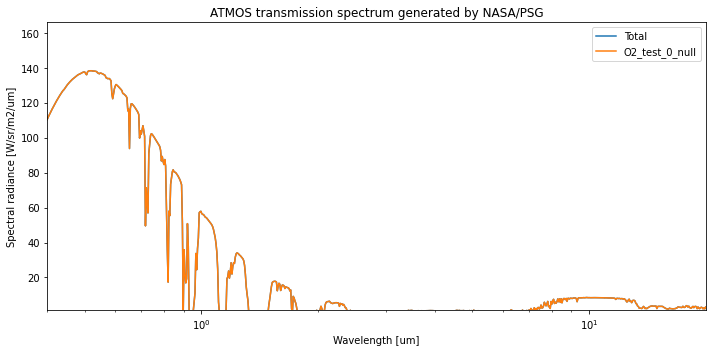

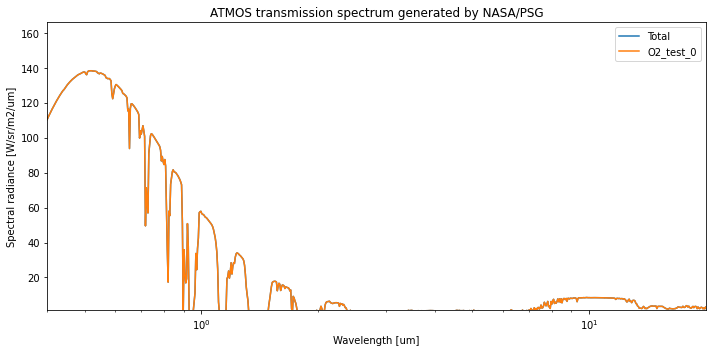

Required exposure time for O2_test_0: 8223.4 hr


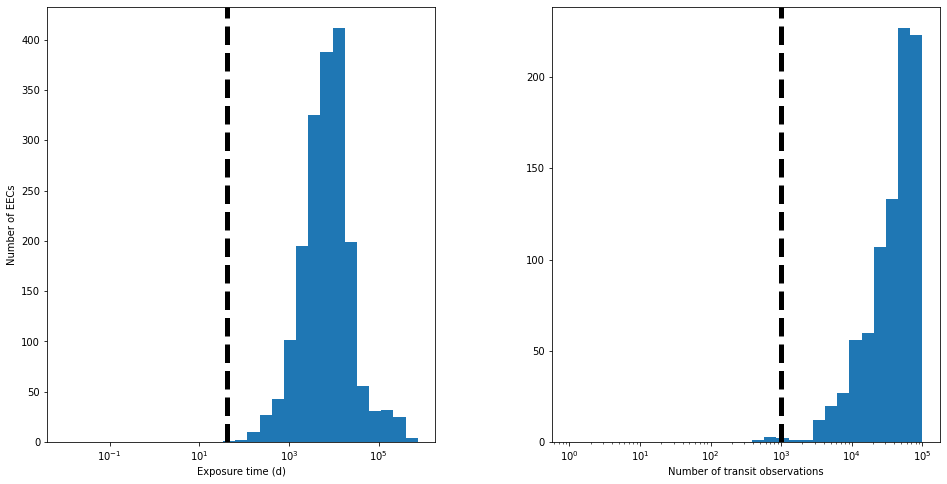

O2_test_1 with O2 flux of 5.00e+08


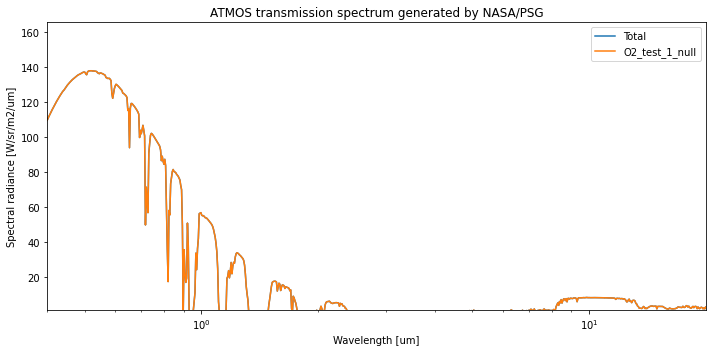

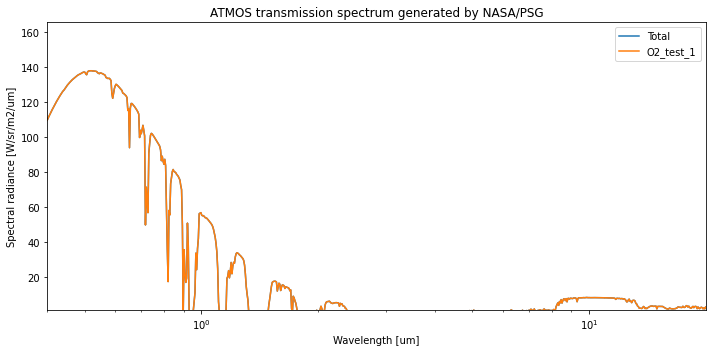

Required exposure time for O2_test_1: 13770037.1 hr


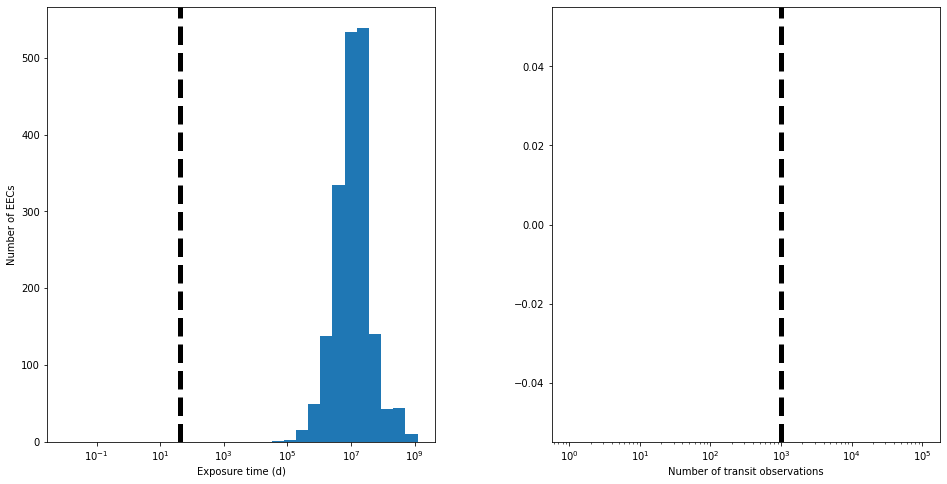

O2_test_2 with O2 flux of 8.00e+08


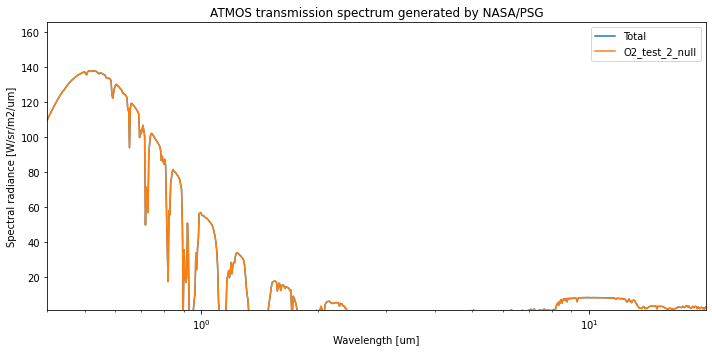

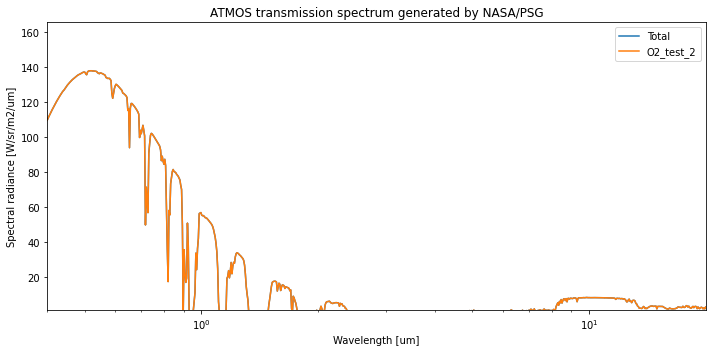

Required exposure time for O2_test_2: 11823252.0 hr


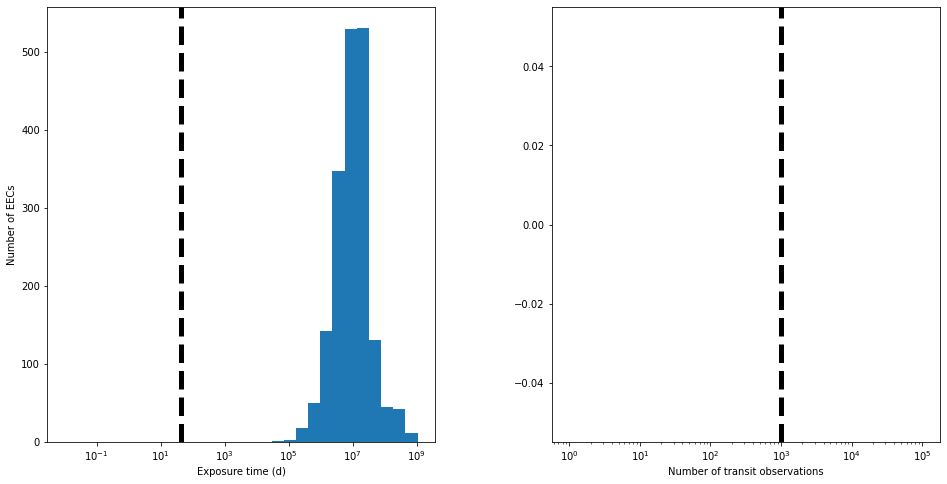

O2_test_3 with O2 flux of 1.00e+09


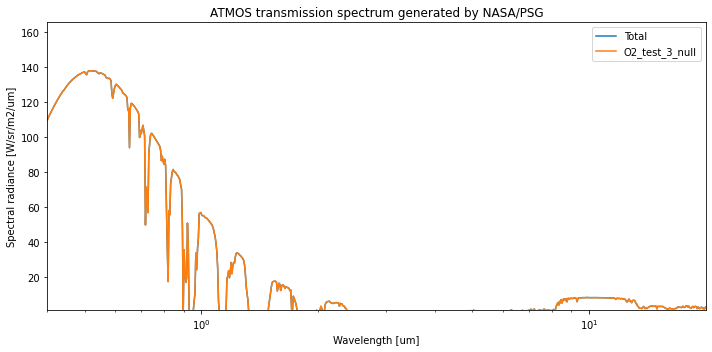

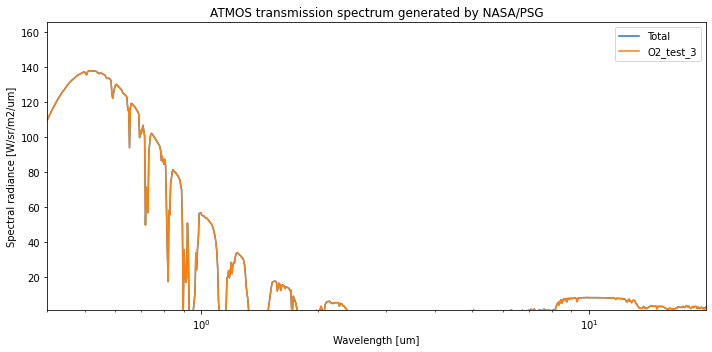

Required exposure time for O2_test_3: 11823252.0 hr


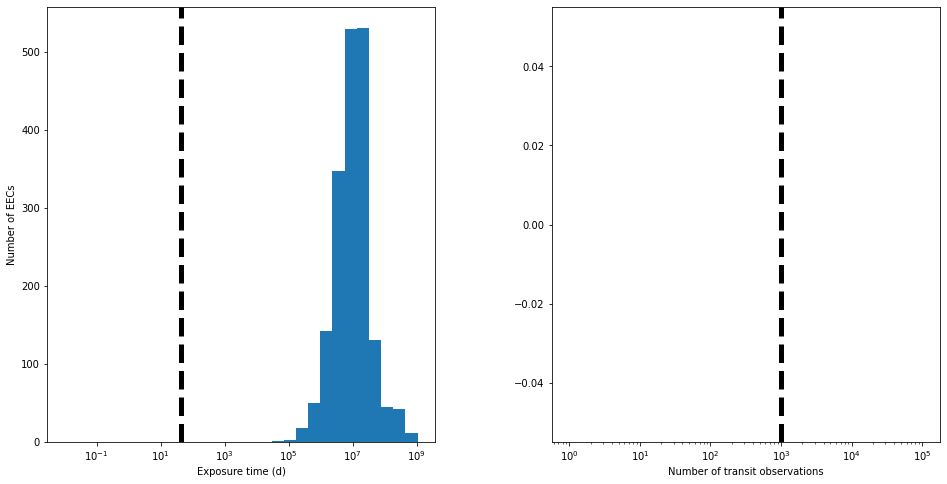

O2_test_4 with O2 flux of 2.50e+09


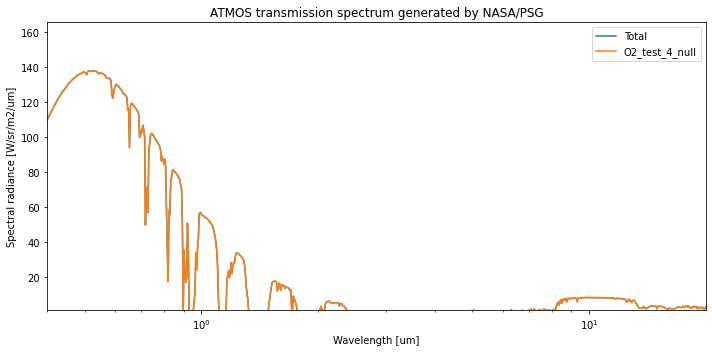

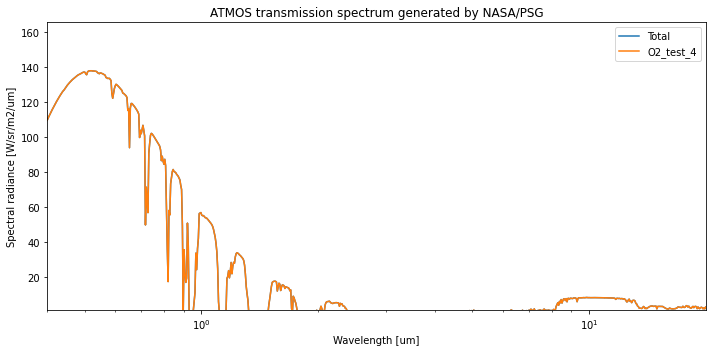

Required exposure time for O2_test_4: 11193078.4 hr


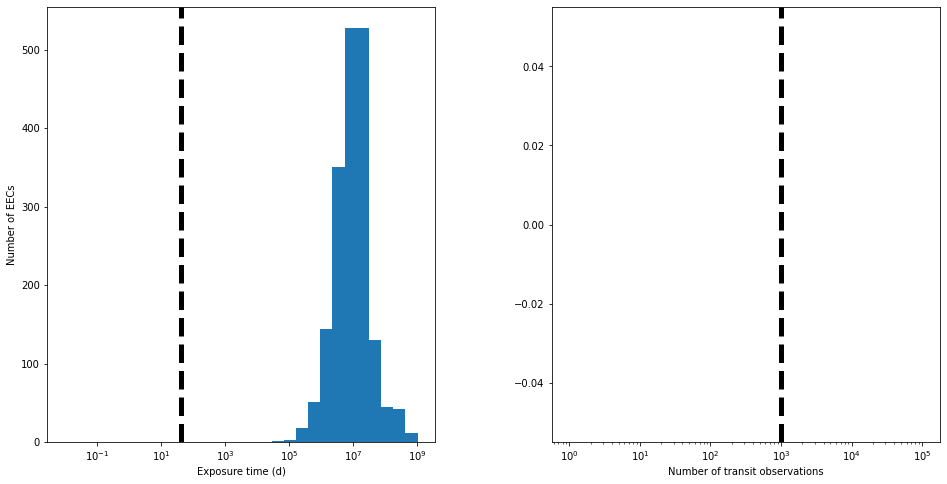

O2_test_5 with O2 flux of 3.50e+09


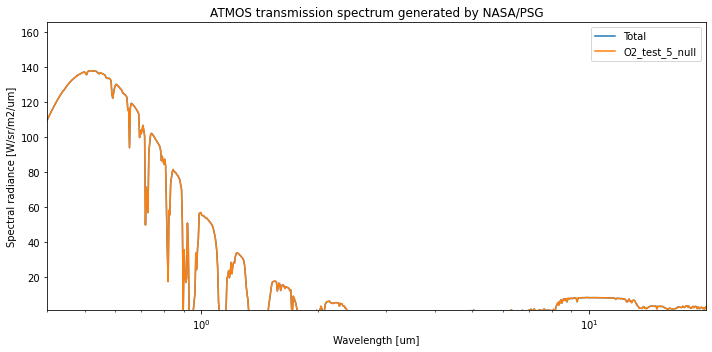

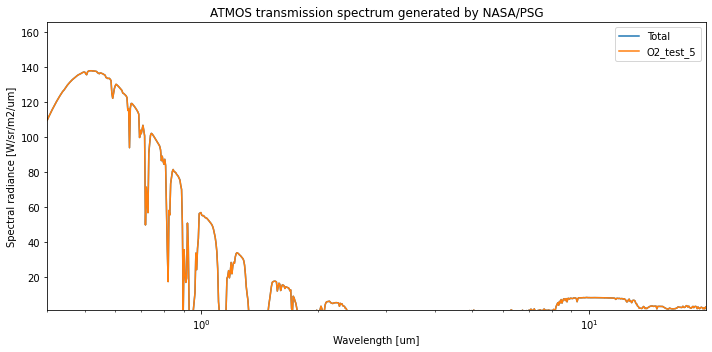

Required exposure time for O2_test_5: 11395370.0 hr


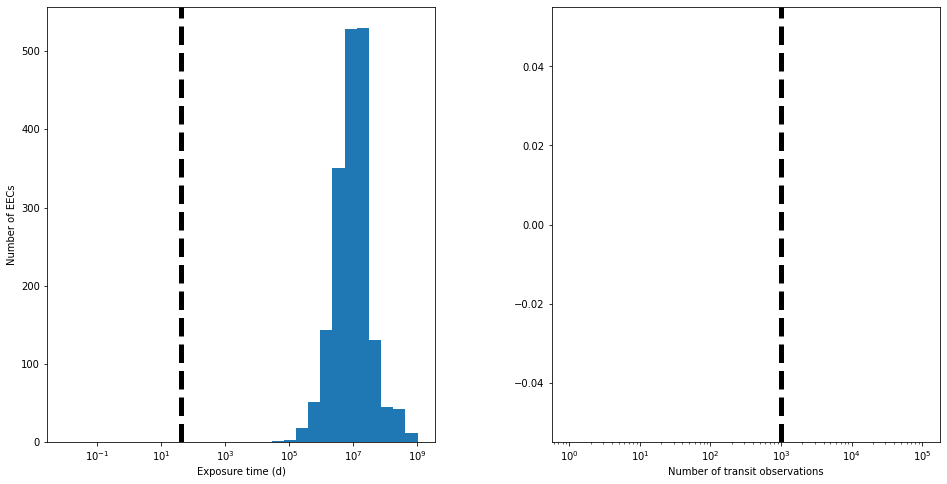

O2_test_6 with O2 flux of 5.00e+09


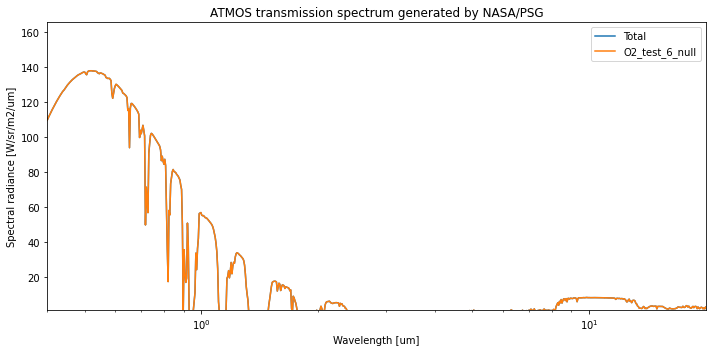

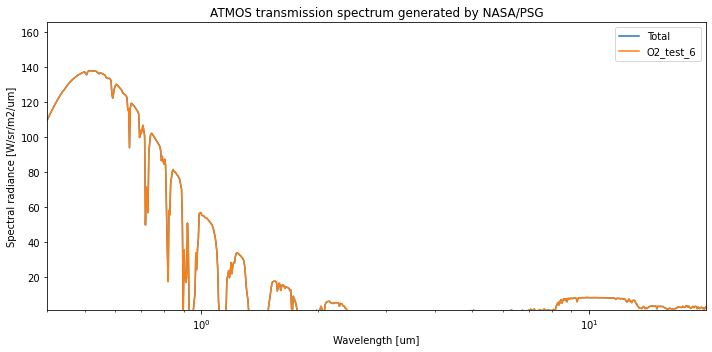

Required exposure time for O2_test_6: 10797636.7 hr


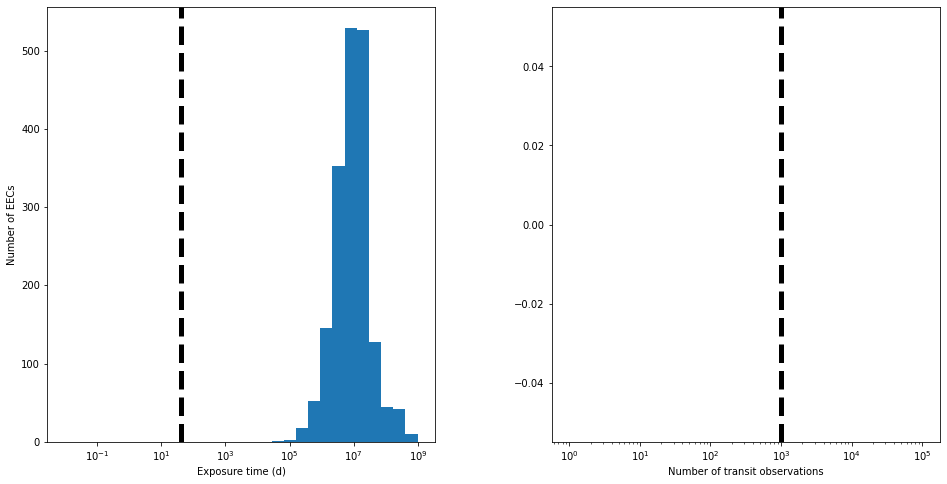

O2_test_7 with O2 flux of 6.00e+09


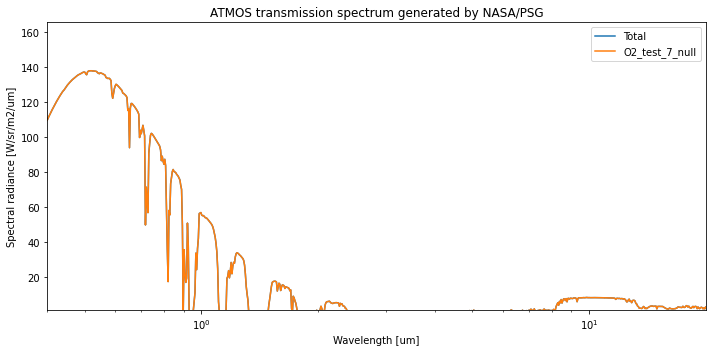

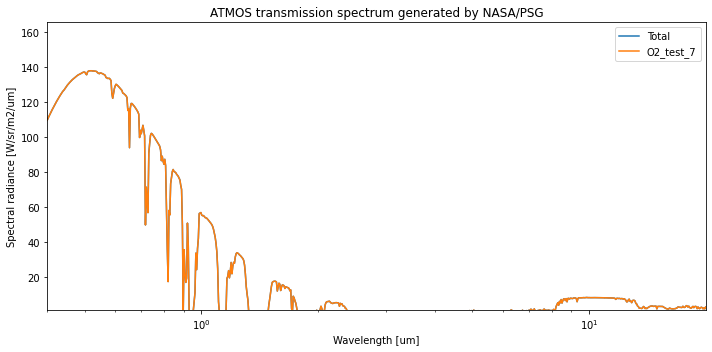

Required exposure time for O2_test_7: 10738794.3 hr


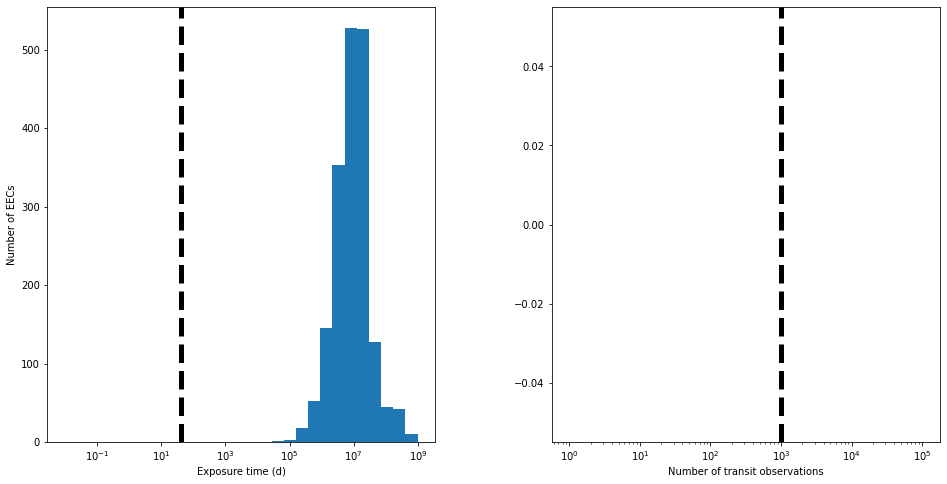

O2_test_8 with O2 flux of 7.50e+09


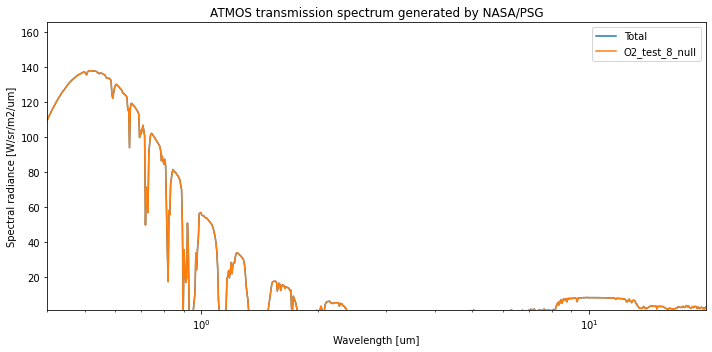

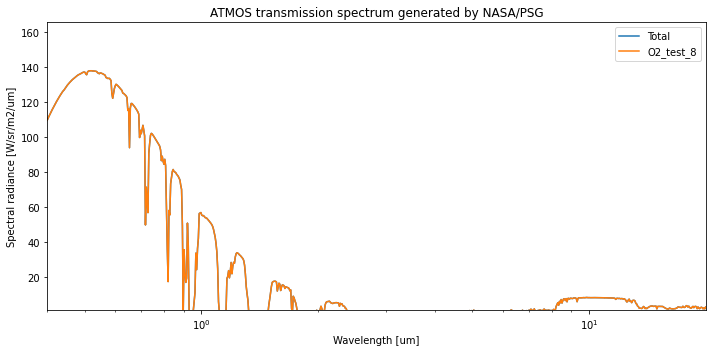

Required exposure time for O2_test_8: 11084813.0 hr


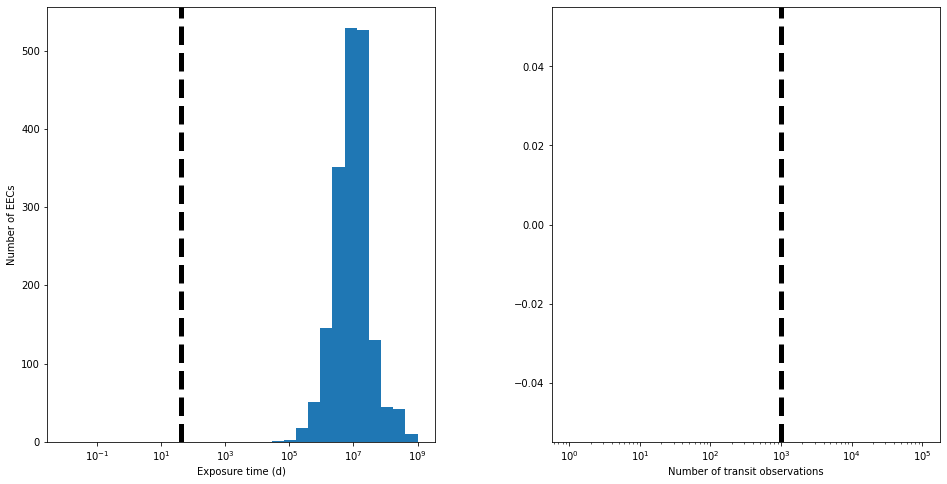

O2_test_9 with O2 flux of 8.50e+09


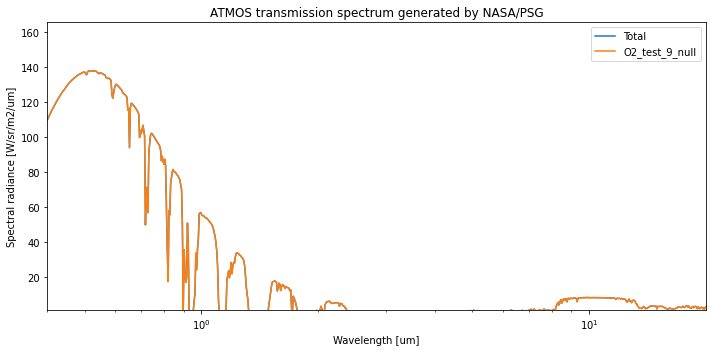

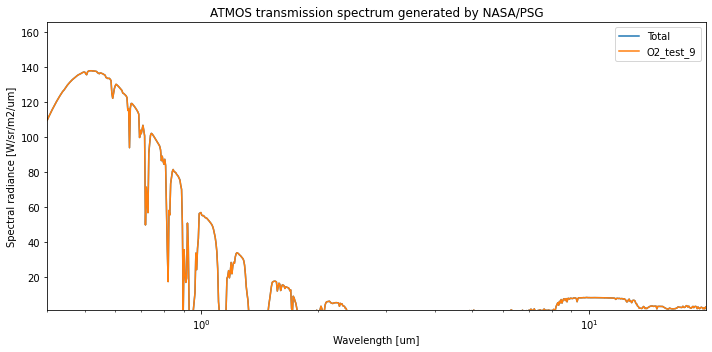

Required exposure time for O2_test_9: 10647708.7 hr


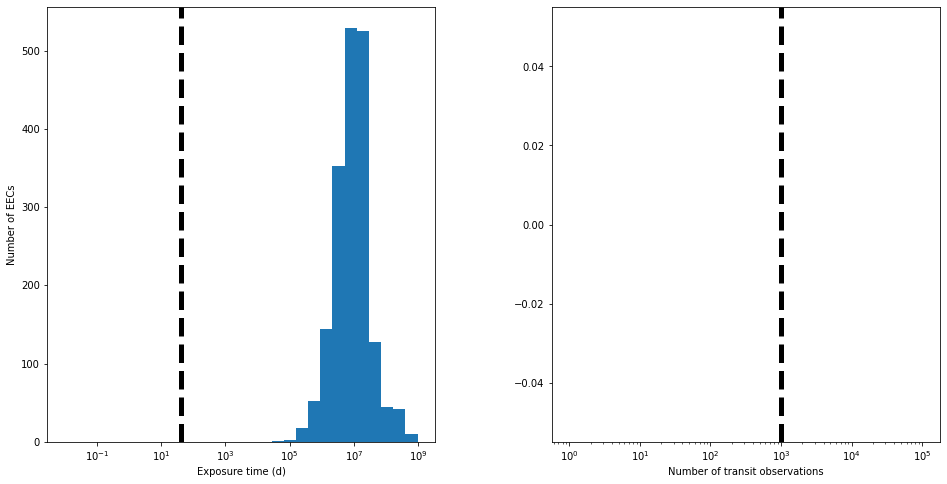

O2_test_10 with O2 flux of 1.00e+10


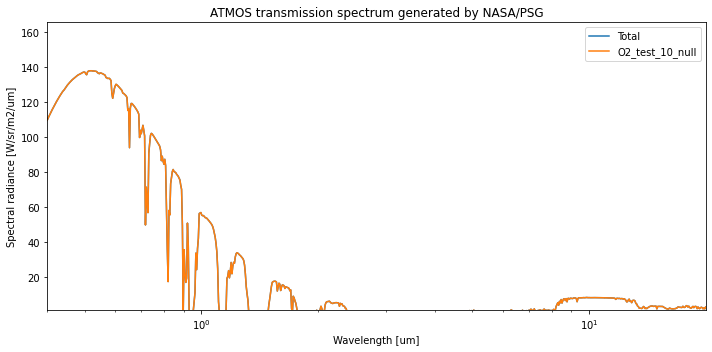

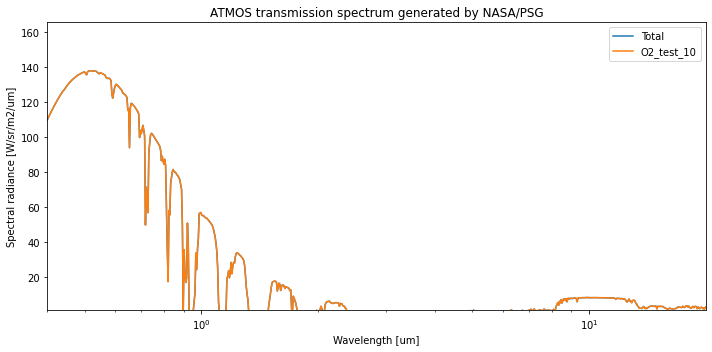

Required exposure time for O2_test_10: 10693465.4 hr


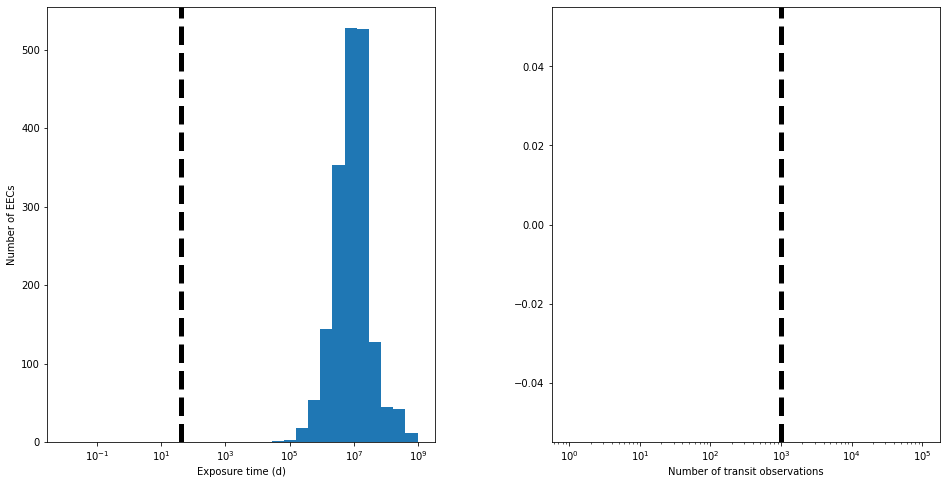

O2_test_11 with O2 flux of 5.00e+10


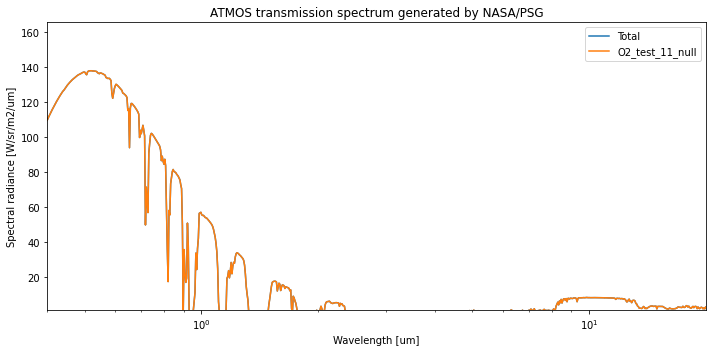

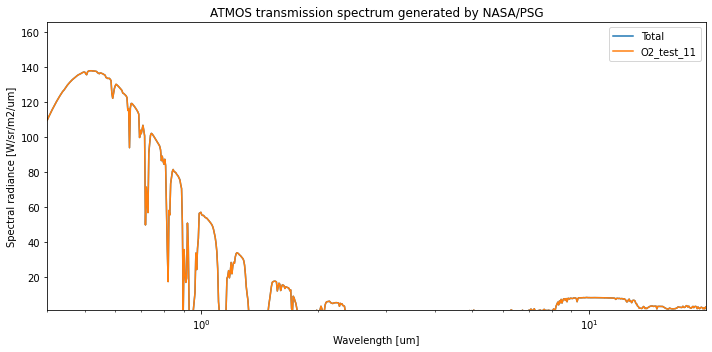

Required exposure time for O2_test_11: 6651644.7 hr


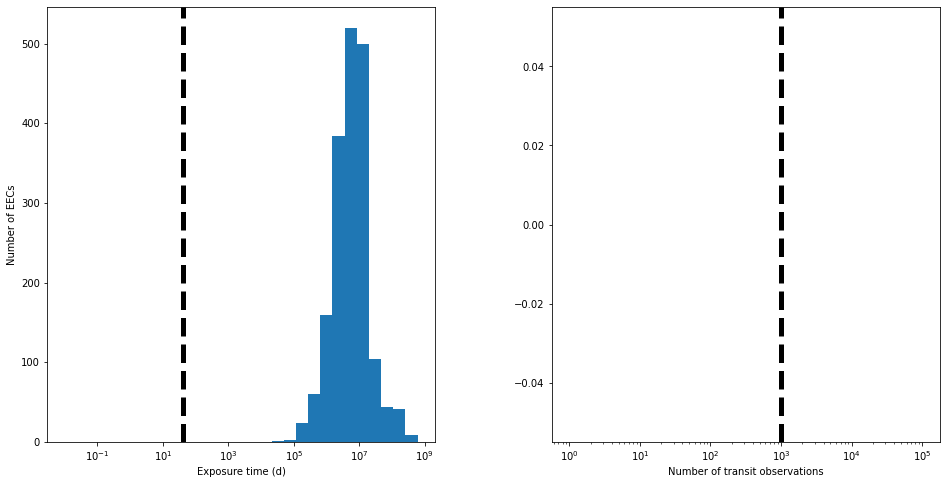

O2_test_12 with O2 flux of 9.00e+10


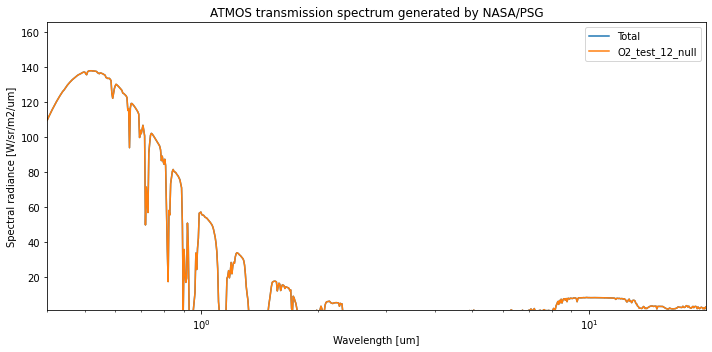

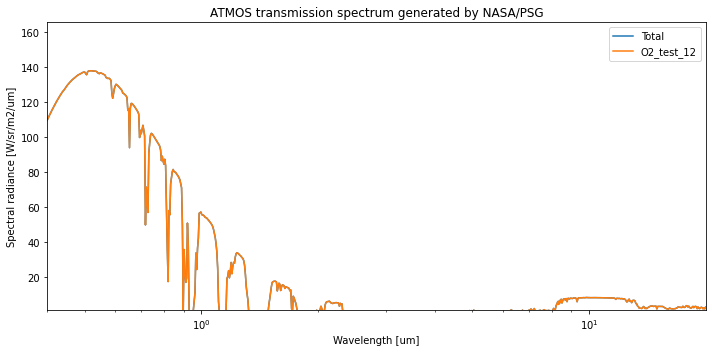

Required exposure time for O2_test_12: 4149258.9 hr


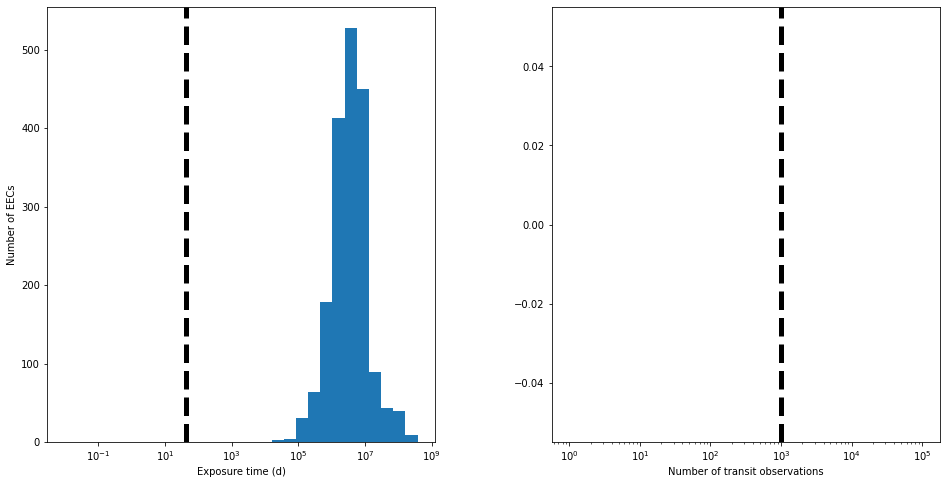

O2_test_13 with O2 flux of 1.50e+11


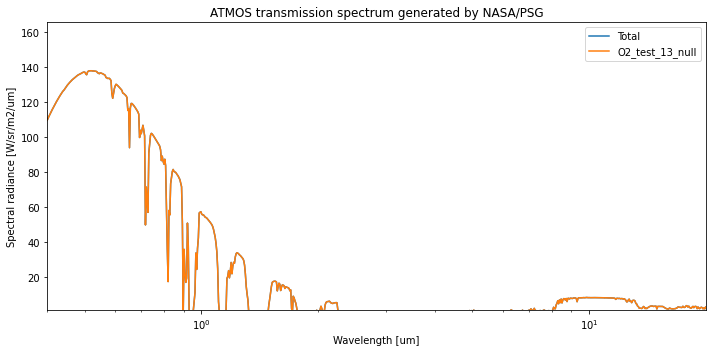

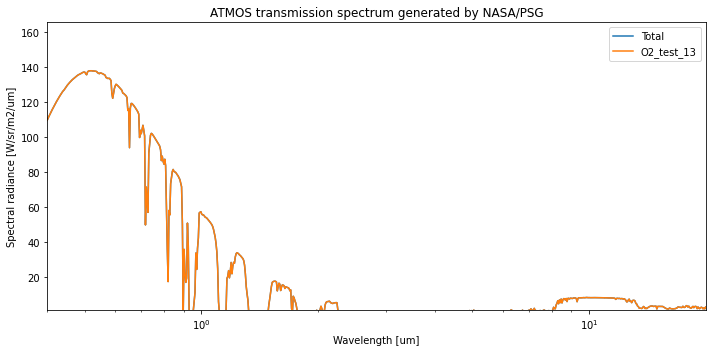

Required exposure time for O2_test_13: 2336902.5 hr


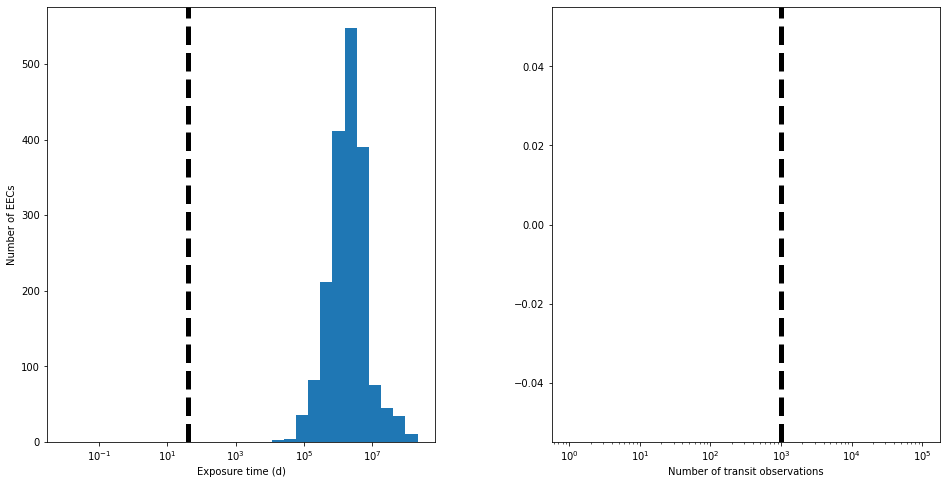

O2_test_14 with O2 flux of 2.50e+11


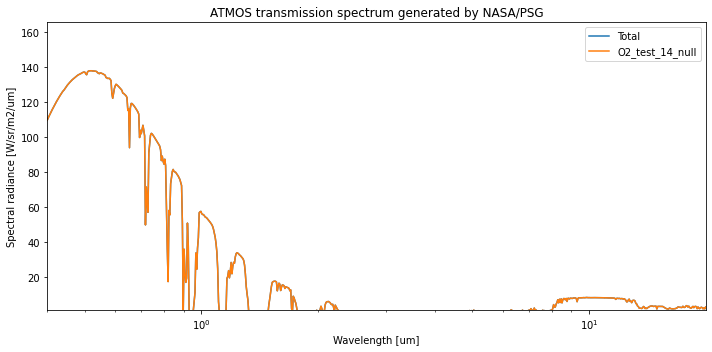

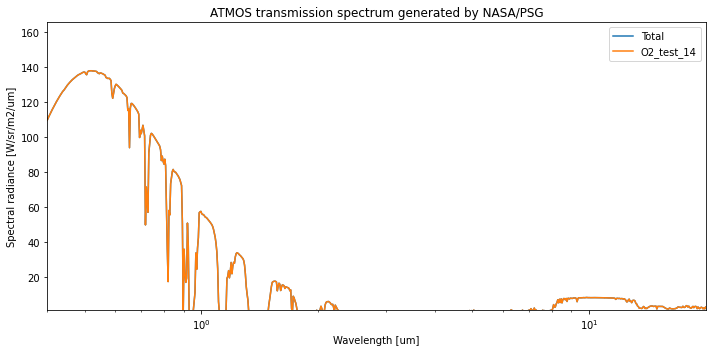

Required exposure time for O2_test_14: 920313.7 hr


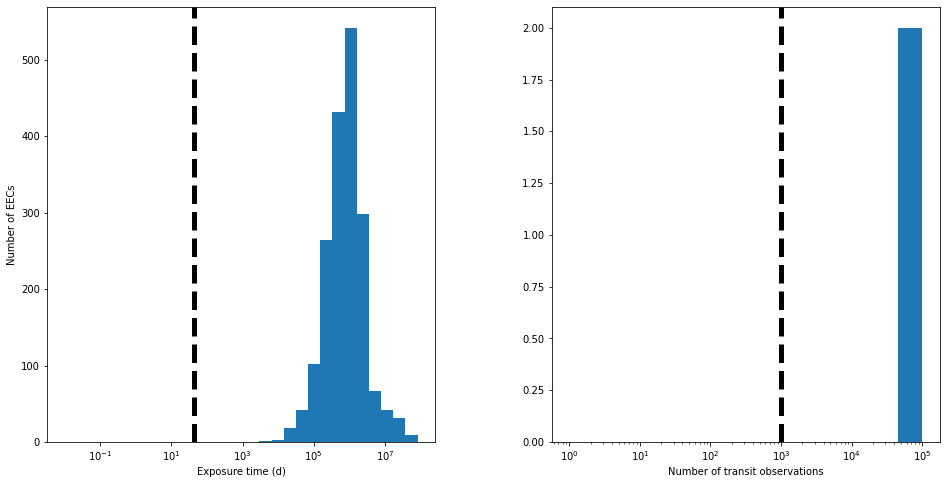

O2_test_15 with O2 flux of 3.00e+11


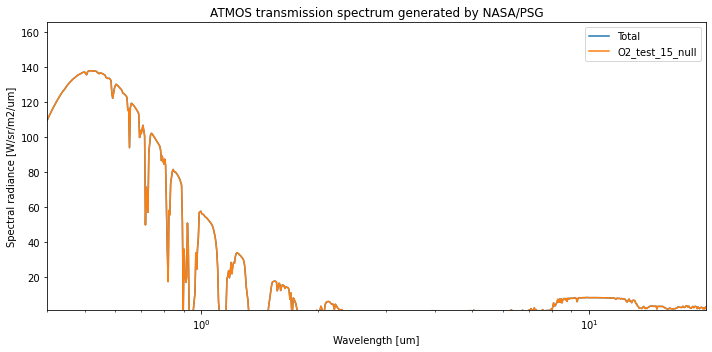

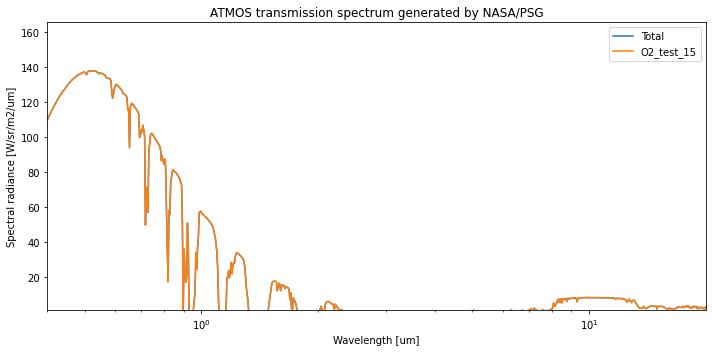

Required exposure time for O2_test_15: 560015.8 hr


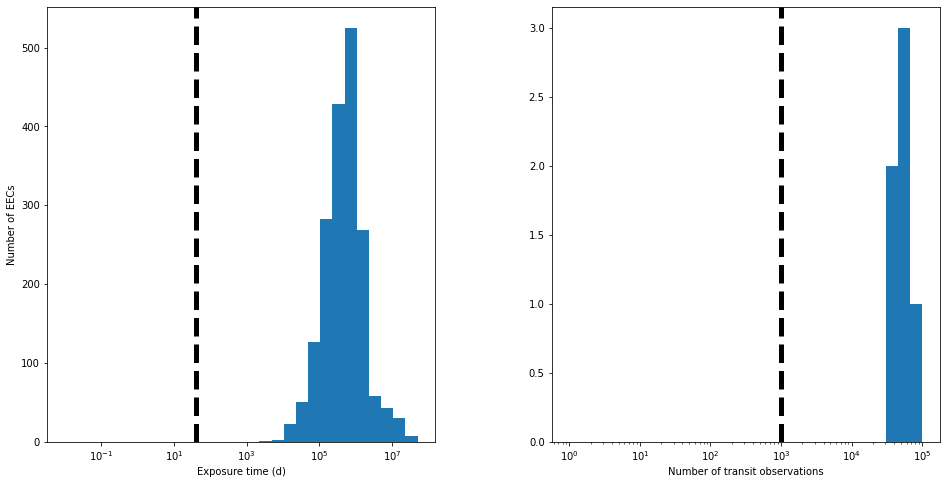

O2_test_16 with O2 flux of 3.25e+11


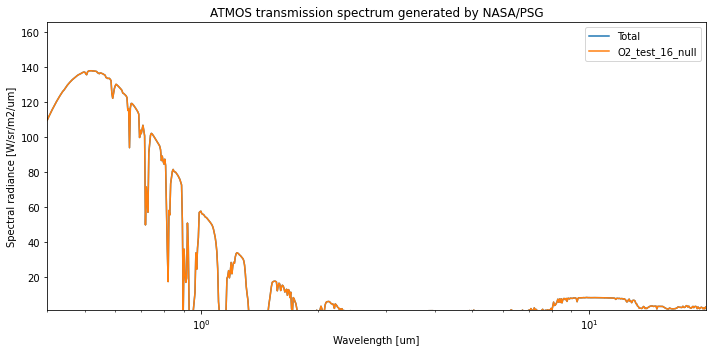

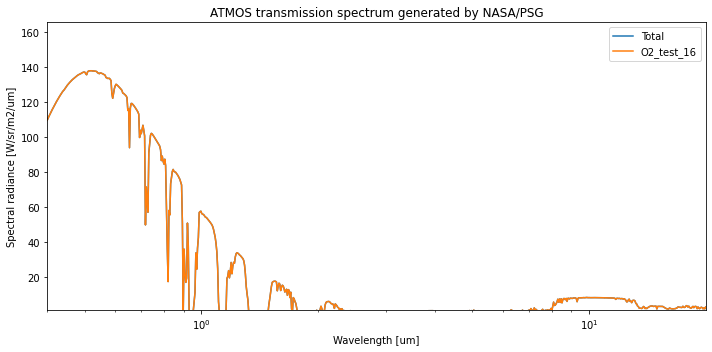

Required exposure time for O2_test_16: 436107.7 hr


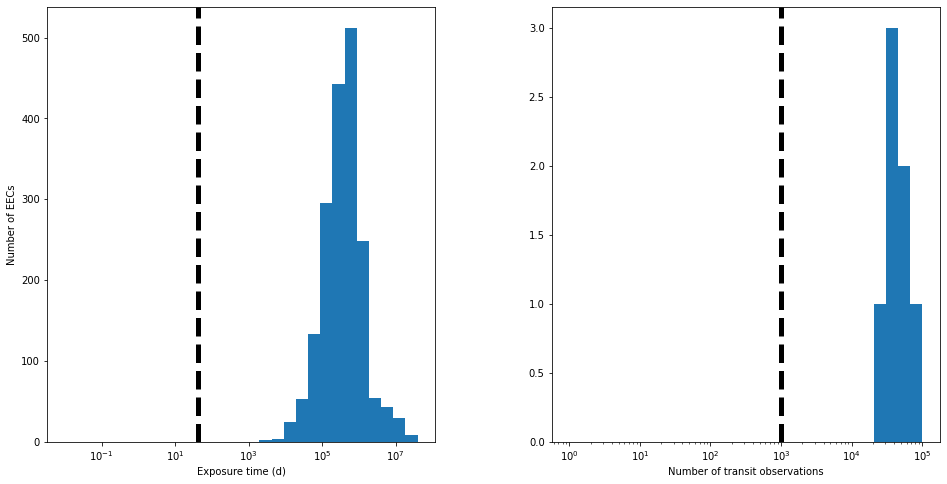

O2_test_17 with O2 flux of 3.50e+11


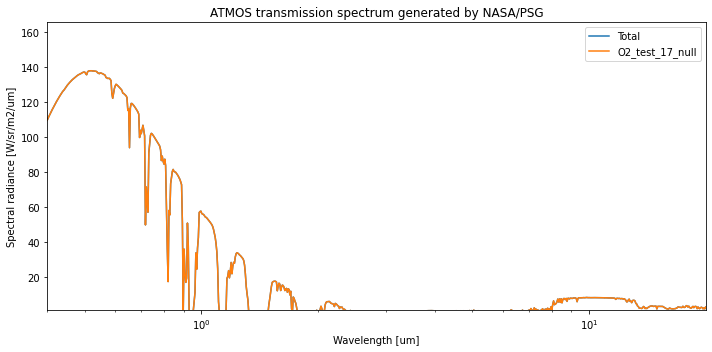

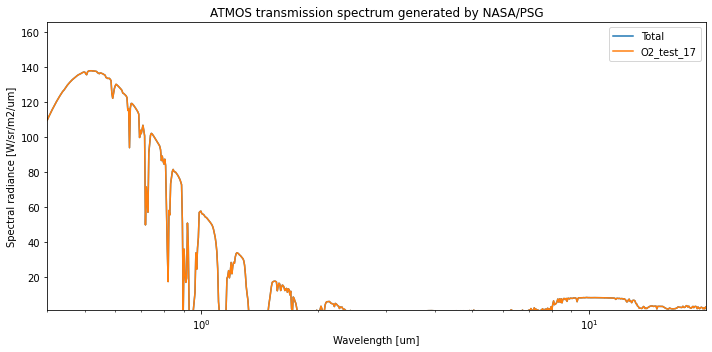

Required exposure time for O2_test_17: 289335.6 hr


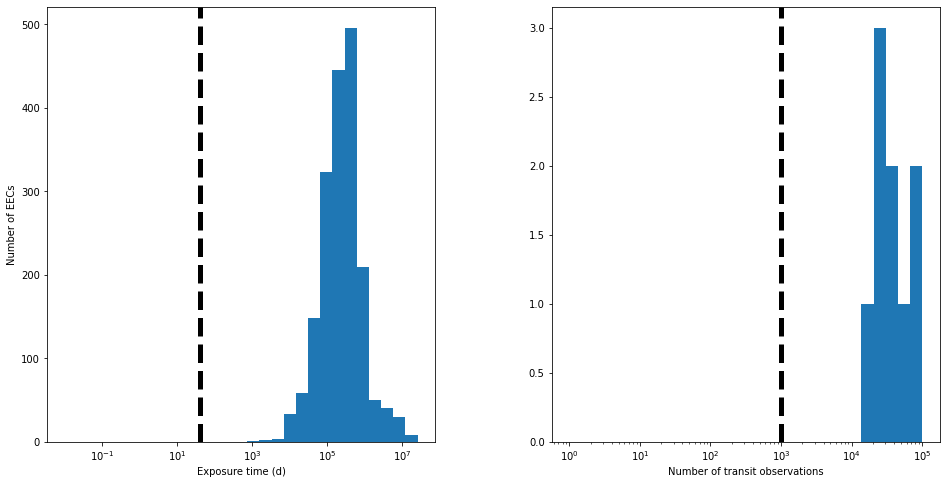

O2_test_18 with O2 flux of 3.95e+11


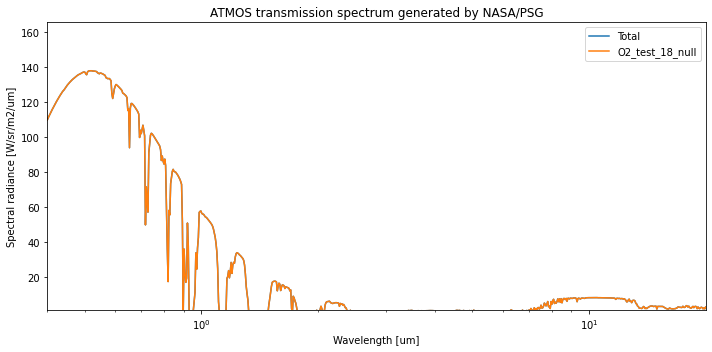

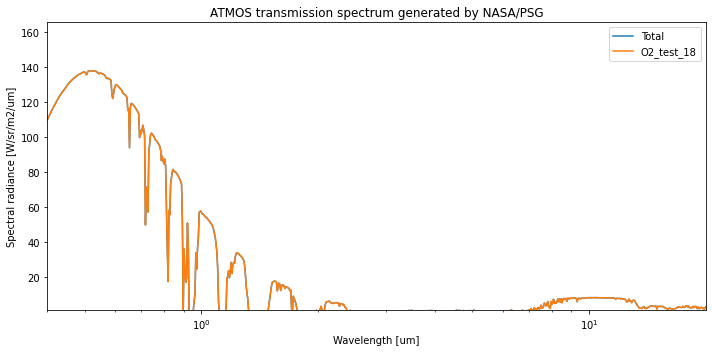

Required exposure time for O2_test_18: 0.0 hr


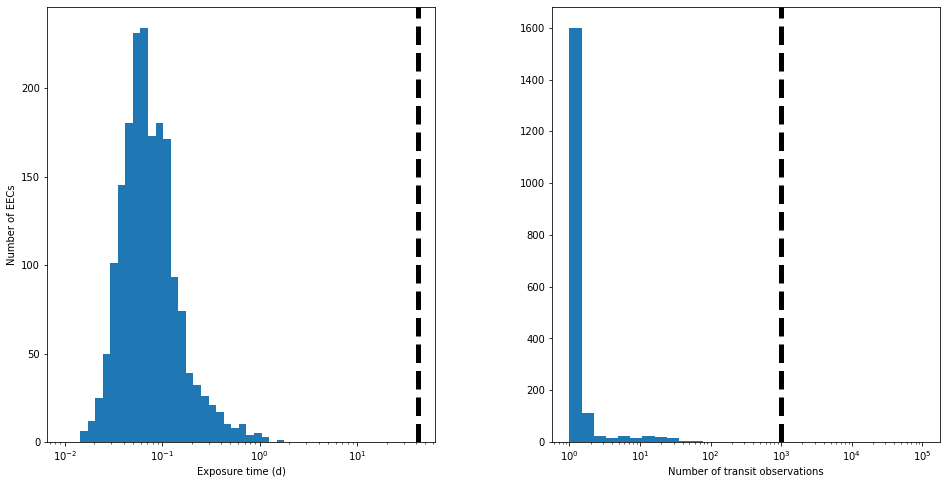

O2_test_19 with O2 flux of 4.20e+11


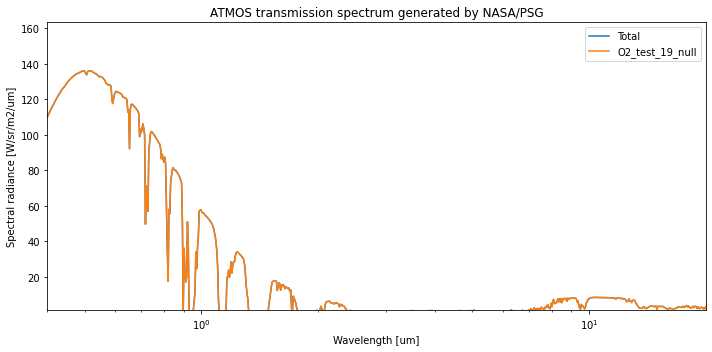

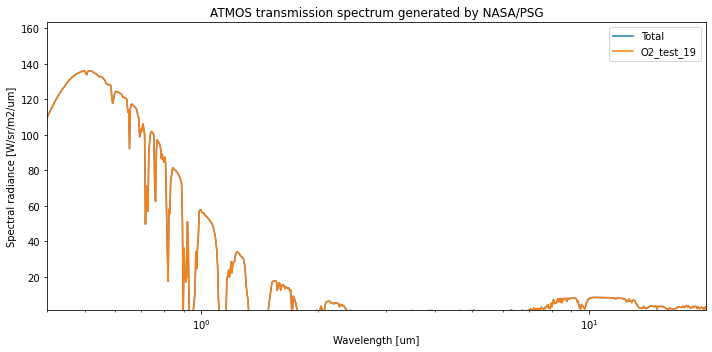

Required exposure time for O2_test_19: 0.0 hr


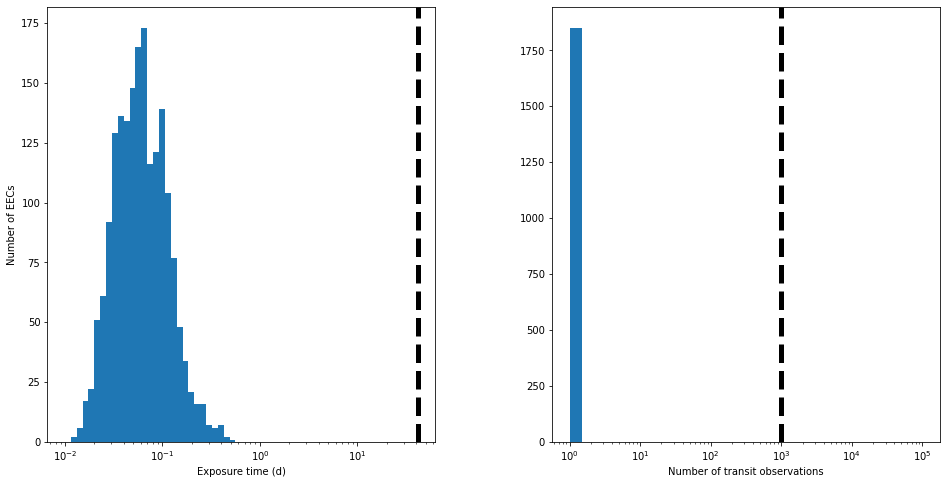

O2_test_20 with O2 flux of 5.50e+11


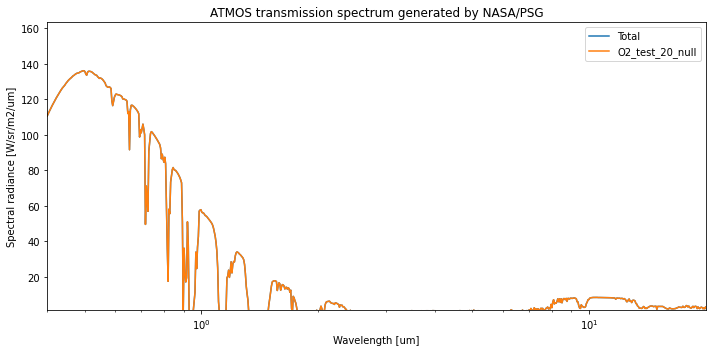

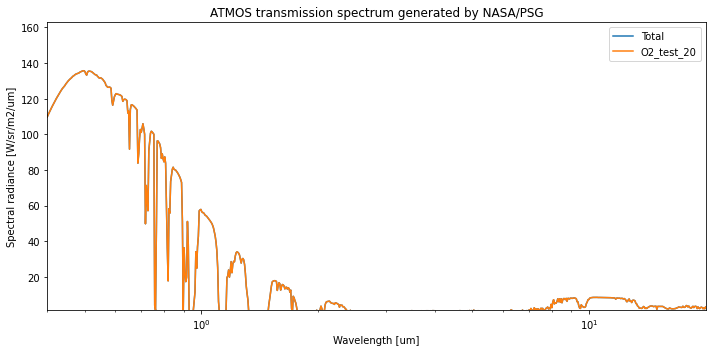

Required exposure time for O2_test_20: 0.0 hr


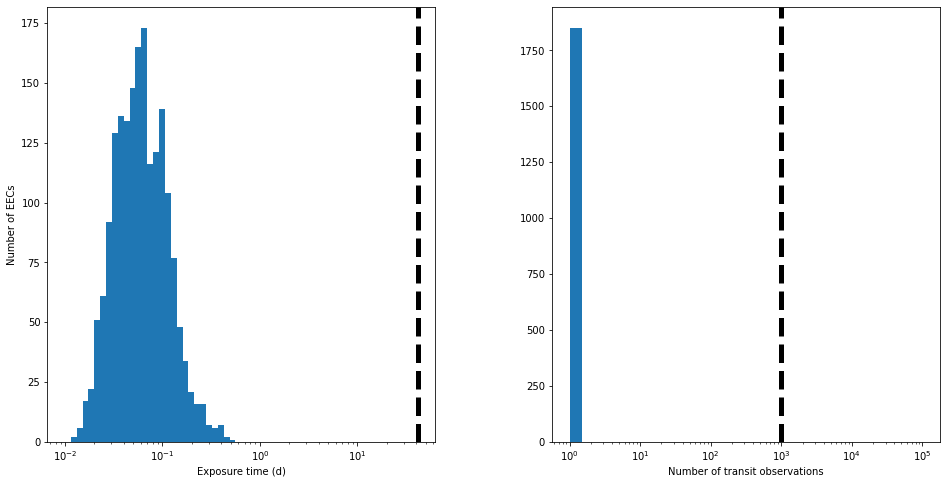

O2_test_21 with O2 flux of 1.00e+12


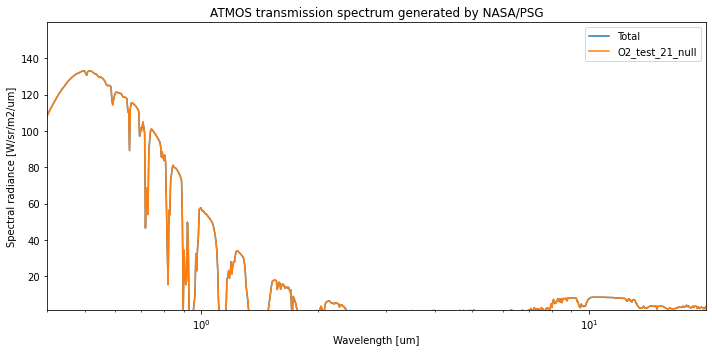

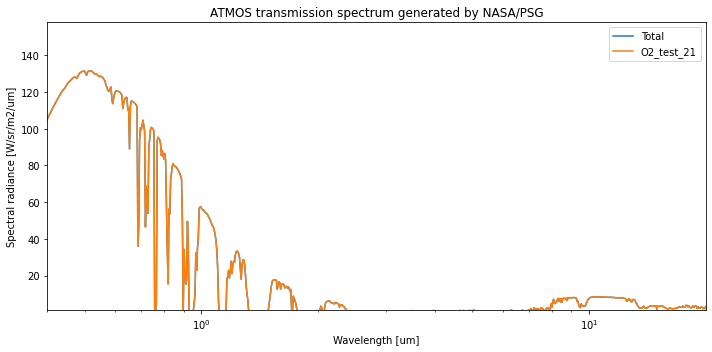

Required exposure time for O2_test_21: 0.0 hr


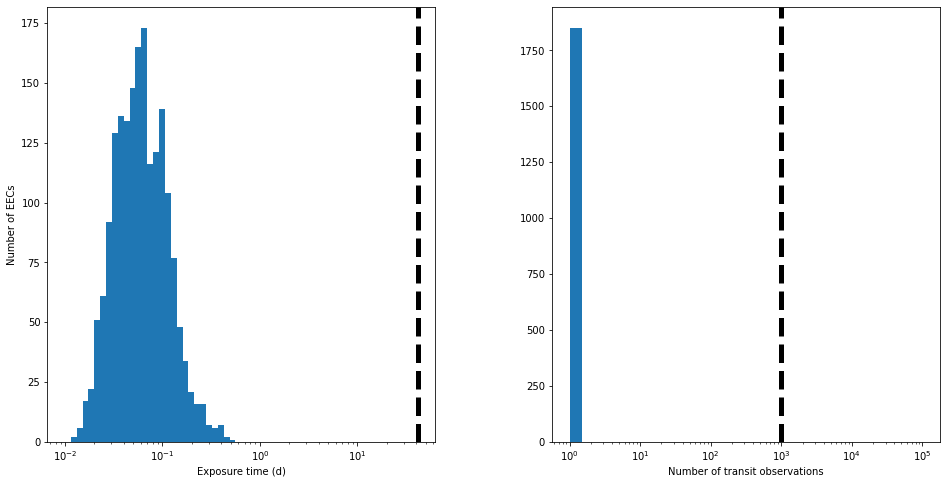

O2_test_22 with O2 flux of 5.00e+12


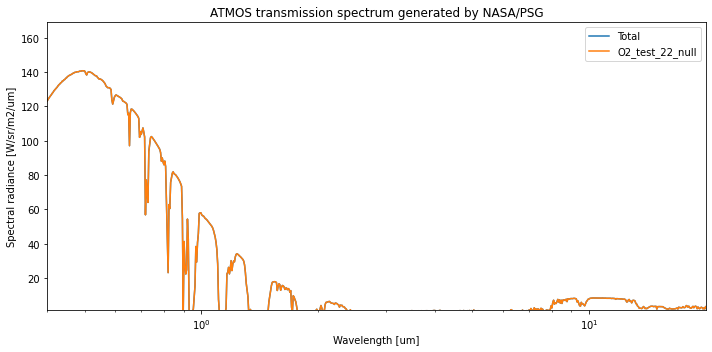

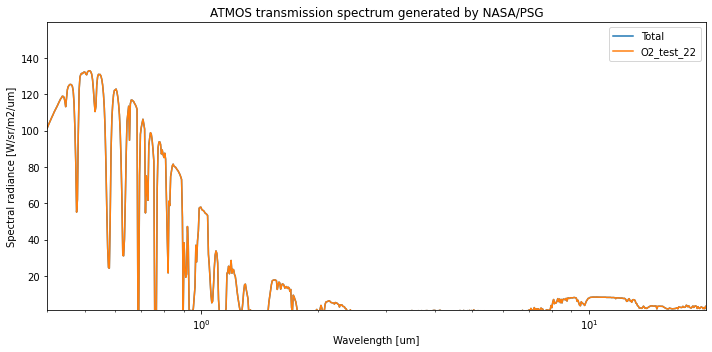

Required exposure time for O2_test_22: 0.0 hr


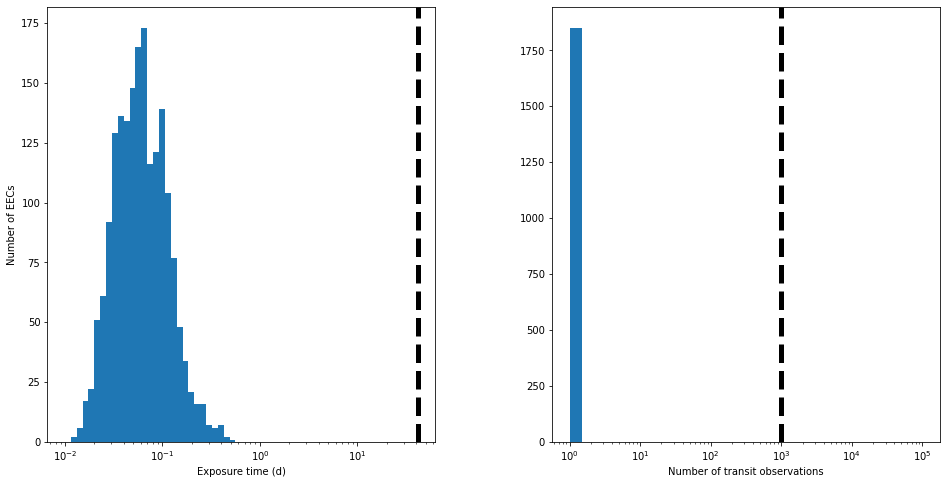

O2_test_23 with O2 flux of 9.00e+12


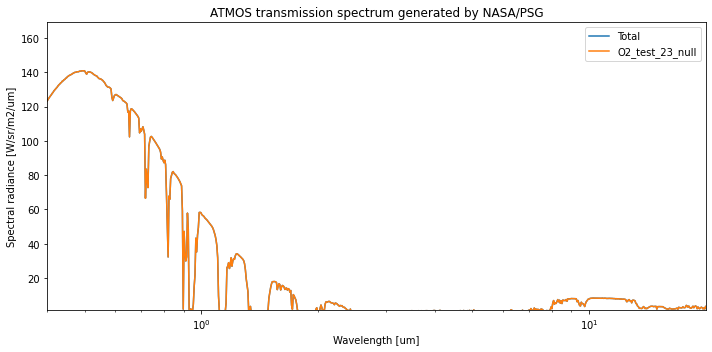

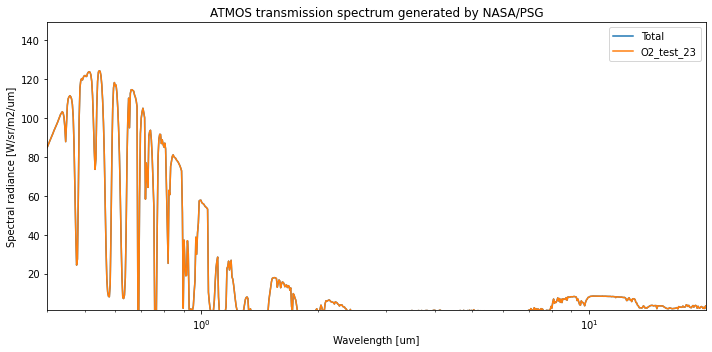

Required exposure time for O2_test_23: 0.0 hr


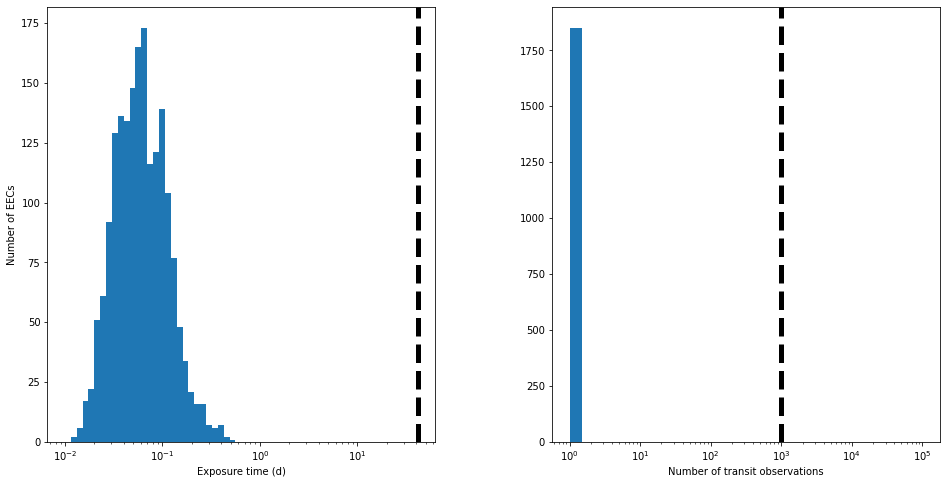

O2_test_24 with O2 flux of 2.40e+13


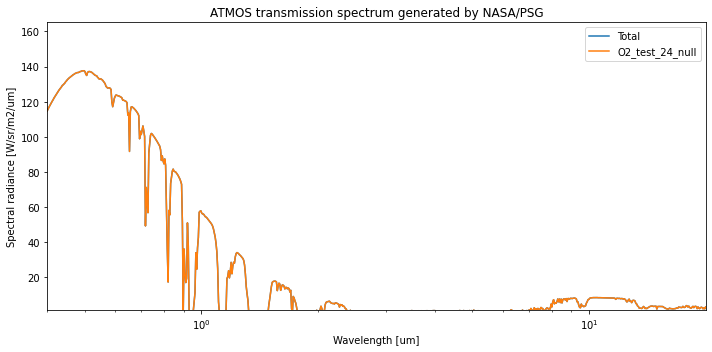

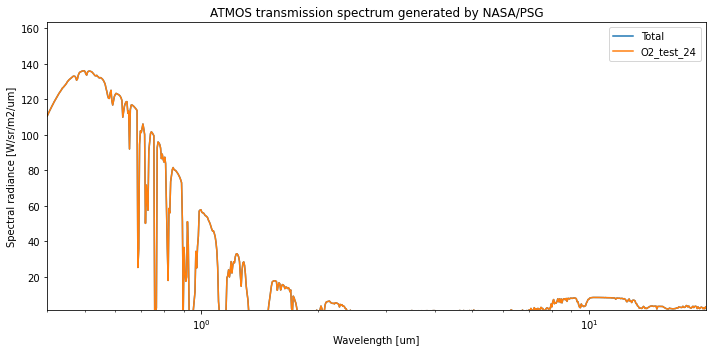

Required exposure time for O2_test_24: 0.0 hr


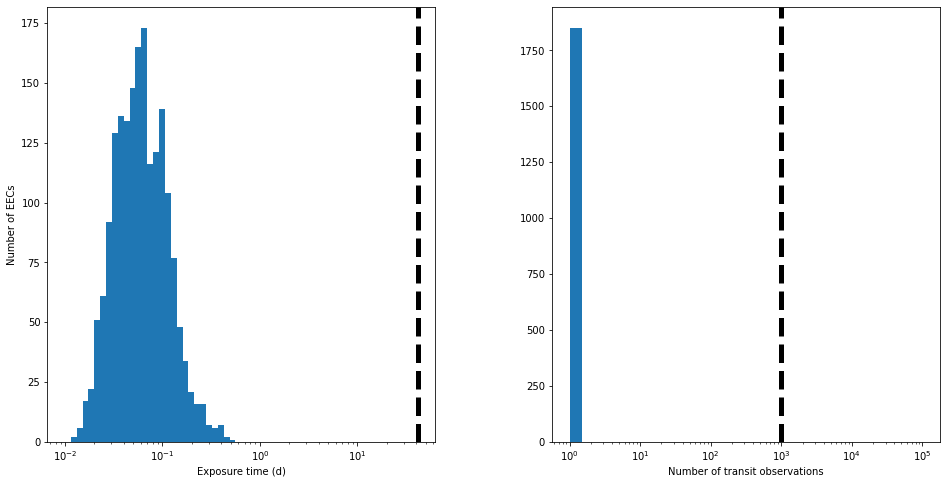

O2_test_25 with O2 flux of 5.00e+13


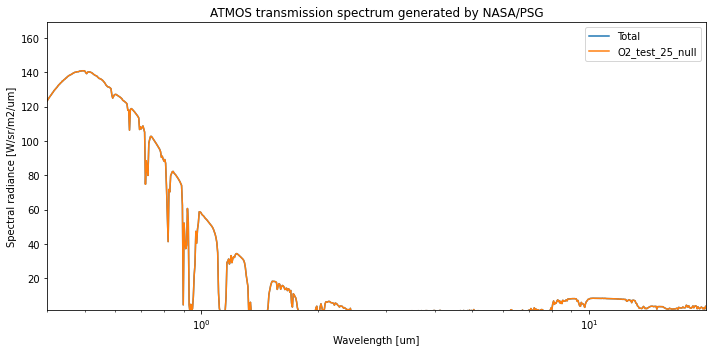

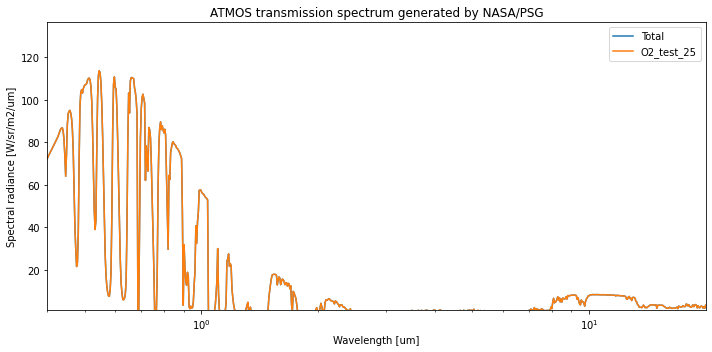

Required exposure time for O2_test_25: 0.0 hr


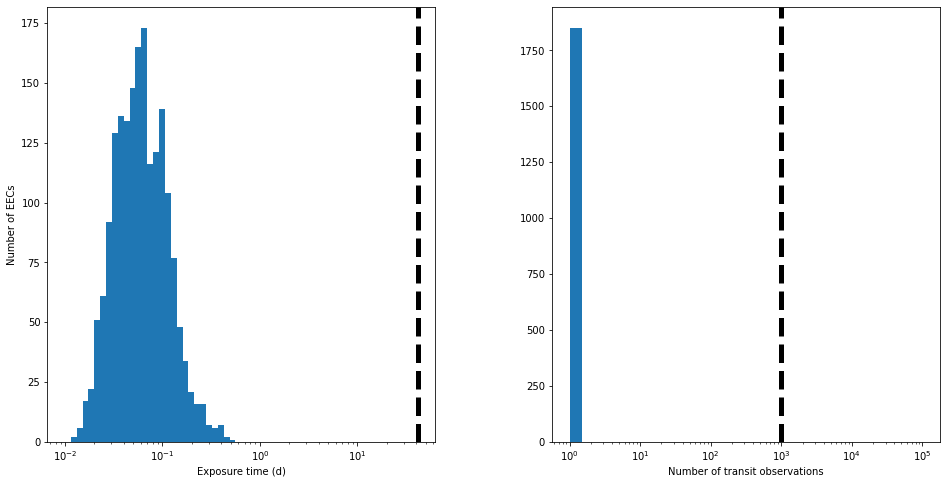

O2_test_26 with O2 flux of 6.00e+13


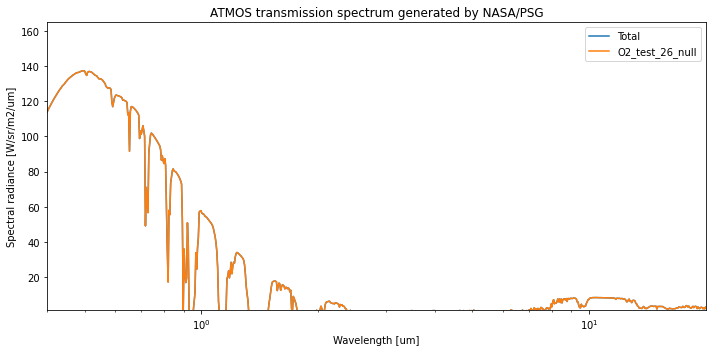

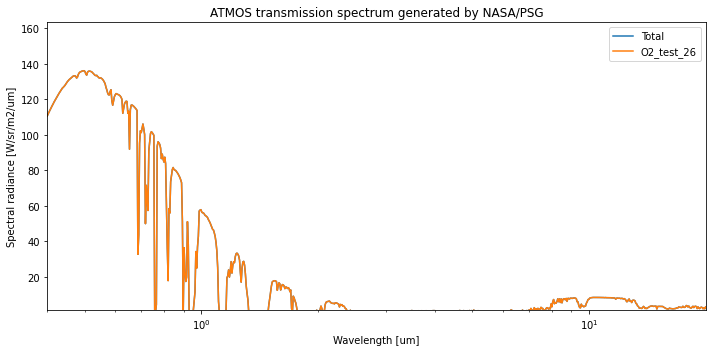

Required exposure time for O2_test_26: 0.0 hr


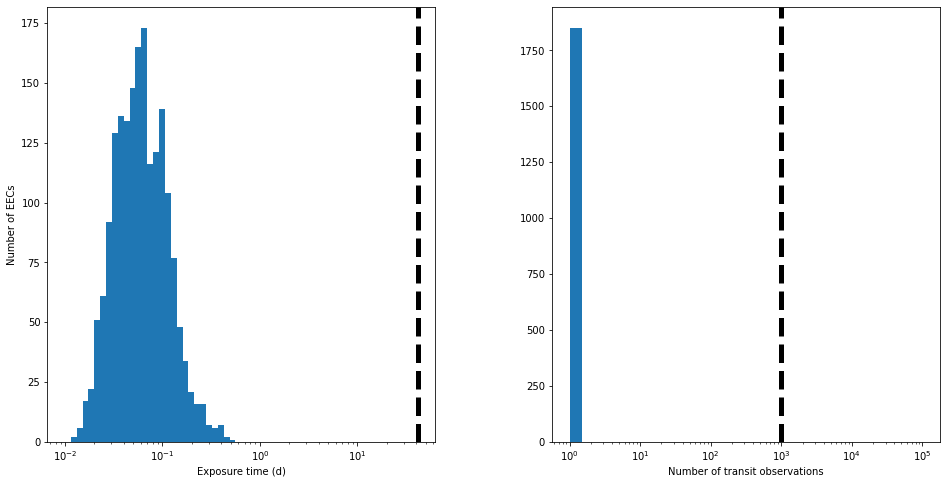

In [6]:
tel='JWST'
t_ref_list=[]

# generate spectra and then calculate t_ref
for i in range(len(model_list)):
    model=model_list[i].split('/')[1]
    print(model+ ' with O2 flux of '+"{:.2e}".format(O2_flux_list[i]))

    #create the null spectrum for t_ref
    
    null_newf=atmosatm(model_list[i],tel=tel,filebase=model,null_spec=True,removed_gas="O2",star='G')
    psgspec(model,null_newf,showplot=True,null_spec=True)
    null_rad=curr_dir+'/psg_output/%s_null_rad.txt' % model

    #create radiance spectrum

    newf=atmosatm(model_list[i],tel=tel,filebase=model,star='G')
    psgspec(model,newf,showplot=True)
    model_rad=curr_dir+'/psg_output/%s_rad.txt' % model
    t_ref = compute_t_ref(filenames=(model_rad,null_rad), t_exp=10, wl_min=0.4, wl_max=0.9,)
    t_ref_list.append(t_ref)
    print("Required exposure time for %s: {:.1f} hr".format(t_ref) % model)
    survey.measurements['has_O2'].t_ref=t_ref/24
    survey.save()
    
    
    t_exp, N_obs = survey.measurements['has_O2'].compute_exposure_time(data[detected['EEC']])

    fig, ax = plt.subplots(ncols=2, figsize=(16,8))

    bins = np.logspace(np.log10(0.01), np.log10(np.amax(t_exp)), 30)
    ax[0].hist(t_exp, bins=bins)
    ax[0].set_xscale('log')
    ax[0].set_xlabel('Exposure time (d)')
    ax[0].set_ylabel('Number of EECs')
    ax[0].axvline(1000/24, linestyle='dashed', lw=5, c='black')

    bins = np.logspace(0, 5, 30)
    ax[1].hist(N_obs, bins=bins)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Number of transit observations')
    ax[1].axvline(survey.N_obs_max, linestyle='dashed', lw=5, c='black')

    plt.subplots_adjust(wspace=0.3)

    plt.show()


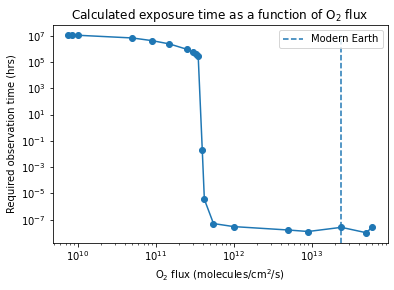

In [14]:
O2_flux_list.pop(0)
t_ref_list.pop(0) #since the first entry of this list always seem weirdly low
plt.plot(O2_flux_list,t_ref_list)
plt.scatter(O2_flux_list,t_ref_list)
plt.xscale('log')
plt.yscale('log')
plt.vlines(2.39e13,0,max(t_ref_list),linestyles='dashed',label='Modern Earth')
plt.ylabel('Required observation time (hrs)')
plt.xlabel(r'O$_2$ flux (molecules/cm$^2$/s)')
plt.title(r'Calculated exposure time as a function of O$_2$ flux')
plt.legend()
#plt.show()
plt.savefig('/home/tessa/Alien_Earths/bioverse-atmos-integration/figures/O2 vs obs time.jpg')